In [1]:
import pickle
from os import listdir
from os.path import isfile, join
import sys
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [2]:
# mypath =  "../../Downloads/298_Dataset-master/malware_dict/"

In [3]:
# directories = listdir("../../Downloads/298_Dataset-master/malware_dict/")

In [4]:
# onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [5]:
# for directory in directories:
#     pathToDir = mypath+directory+"/"
#     with open(pathToDir+"top.txt",'rb') as f:
#         dictionary = pickle.load(f,encoding='latin1')
#         print(len(dictionary))
        

In [6]:
# print(directories)

In [7]:
# count = 0
# for directory in directories:
#     pathToDir = mypath+directory+"/"
#     onlyfiles = [f for f in listdir(pathToDir) if isfile(join(pathToDir, f))]
#     count = count+len(onlyfiles)
# print(count)

In [8]:
# Dictionary = {}
# flag = 0
# for directory in directories:
#     pathToDir = mypath+directory+"/"
#     with open(pathToDir+"top.txt",'rb') as f:
#         d = pickle.load(f,encoding='latin1')
#         if flag == 0:
#             Dictionary = d
#             flag = 1
#         else :
#             for key,value in d.items():
#                 if key in Dictionary:
#                     Dictionary[key] = Dictionary[key] + value
#                 else :
#                     Dictionary[key] = value

In [9]:
# K = 1000

In [10]:
# featureVectorTopK = sorted(Dictionary.items(), key=lambda kv: kv[1],reverse=True)[:K]

In [11]:
# print(featureVectorTopK)

In [12]:
# dataset = []
# for directory in directories:
#     pathToDir = mypath+directory+"/"
#     fileName = [pathToDir+f for f in listdir(pathToDir) if isfile(join(pathToDir, f))]
#     for filePath in fileName:
#         dictionaryOfNgram = {}
#         with open(filePath,"rb") as f:
#             dictionaryOfNgram = pickle.load(f,encoding='latin1')
#         vectorForSample = []
#         for ngram_tuple in featureVectorTopK:
#             if (ngram_tuple[0] in dictionaryOfNgram.keys()):
#                 vectorForSample.append(dictionaryOfNgram[ngram_tuple[0]])
#             else:
#                 vectorForSample.append(0)
#         sumOfRow = sum(vectorForSample)
#         for i in range(0,len(vectorForSample)):
#             vectorForSample[i] = float(vectorForSample[i]) / sumOfRow
#         vectorForSample = [directory] + vectorForSample
#         dataset.append(vectorForSample)

In [13]:
# print(len(dataset))

In [14]:
# print(dataset[0])

In [15]:
# print(dataset)

In [16]:
# dataset_Tmp = pd.DataFrame(dataset,columns=["Family Name"]+[i for i in range(1,K+1)])
# dataset_Tmp.to_csv("../dataset/bigdata1/top1000_bigdata1.csv",sep="\t")

In [17]:
dataset_dataframe = pd.read_csv("../dataset/bigdata1/top1000_bigdata1.csv",sep="\t")
dataset_dataframe.head()

,Unnamed: 0,Family Name,1,2,3,4,5,6,7,8,...,991,992,993,994,995,996,997,998,999,1000
0,0,vobfus,0.161217,0.142666,0.058180,0.008559,0.000000,0.004410,0.007263,0.013166,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,vobfus,0.335831,0.111819,0.023257,0.002638,0.003637,0.007130,0.008142,0.016115,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,vobfus,0.215399,0.103113,0.067630,0.014031,0.005303,0.005638,0.013526,0.011528,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,vobfus,0.259472,0.080973,0.059598,0.010809,0.009412,0.008873,0.011053,0.013322,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,vobfus,0.222228,0.120731,0.012010,0.000000,0.004476,0.003771,0.005539,0.013656,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
dataset = np.array(dataset_dataframe.iloc[:,2:])

In [19]:
y = np.array(dataset_dataframe.loc[:,"Family Name"])

In [20]:
TopFamilyName = ['vobfus', 'lolyda', 'ceeinject', 'cycbot', 'bho', 'fakerean', 'alureon', 'renos', 'vundo', 'hotbar', 'adload', 'agent', 'startpage', 'delfinject', 'obfuscator', 'rbot', 'onlinegames']
topfam = set(TopFamilyName) 
label = []
for familyname in y:
    if familyname in topfam:
        for name_index in range(0,len(TopFamilyName)):
            if familyname == TopFamilyName[name_index]:
                label.append(name_index)
    else :
        label.append(len(TopFamilyName))
label = np.array(label)

In [21]:
print(len(TopFamilyName))

17


In [22]:
# avg_scores_knn = [0 for i in range(0,10)]
# n_itr = 5
# for itr in range(0,n_itr):
#     # Dividing the dataset into various sub-dataset
#     skf = StratifiedKFold(n_splits=10,shuffle=True)
#     subDatasetIndex = []
#     for train_index, test_index in skf.split(dataset,label):
#         subDatasetIndex.append(test_index)
#     # Verifying the whether the total is equal to total dataset
#     sum = 0;
#     for elem in subDatasetIndex:
#         print(len(elem))
#         sum = sum+len(elem)

#     MeanScoreForAll = []
#     sizeOfEachDataset = []
#     for i in range(1,11):
#         X = []
#         Y = []
#         tmp_sizeOfEachDataset_sum = 0;
#         for j in range (0,i):
#             tmp_sizeOfEachDataset_sum = tmp_sizeOfEachDataset_sum + len(subDatasetIndex[j])
#             for rowIndex in subDatasetIndex[j]:
#                 X.append(dataset[rowIndex])
#                 Y.append(label[rowIndex])
#         sizeOfEachDataset.append(tmp_sizeOfEachDataset_sum)
#         X = np.array(X)
#         Y = np.array(Y)
#         mean_accuracy_array = []
#         k_range = range(1, 31)
#         k_scores = []
#         # 1. we will loop through reasonable values of k
#         for k in k_range:
#             # 2. run KNeighborsClassifier with k neighbours
#             knn = KNeighborsClassifier(n_neighbors=k)
#             # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
#             cv = StratifiedKFold(n_splits=10,shuffle=True)
#             scores = cross_val_score(knn, X, Y, cv=cv, scoring='accuracy')
#             # 4. append mean of scores for k neighbors to k_scores list
#             k_scores.append(scores.mean())
#         print("For i = " + str(i))
#         print("Scores For K ranging from 1 to 30 \n" + str(k_scores))
#         highestAccuracy_k = (k_scores.index(max(k_scores))+1)
#         print("K with highest accuracy and its accuracy : " + str(highestAccuracy_k) +" , " + str(k_scores[highestAccuracy_k-1]))
#         mean_accuracy_array.append(k_scores[highestAccuracy_k-1])
#         mean = np.mean(mean_accuracy_array)
#         MeanScoreForAll.append(mean)
#         print("Mean Accuracy : " + str(mean))
#         print("\n\n")
#     for i in range(0,len(MeanScoreForAll)):
#         avg_scores_knn[i] = avg_scores_knn[i]+MeanScoreForAll[i]

In [23]:
# for score in avg_scores_knn:
#     print((score*100)/5)

In [24]:
# tmp = avg_scores_knn
# for i in range(0,len(avg_scores_knn)):
#     avg_scores_knn[i] = avg_scores_knn[i] / n_itr
# print(avg_scores_knn)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size=0.1)

In [26]:
print(len(X_train[0]))

1000


In [27]:
# Trial and error
# valuesOfEpochs = [5,10,50,100,200,500,1000]
# valuesOfTestSize = [0.1,0.2,0.3]
valuesOfEpochs = [200]
valuesOfTestSize = [0.1,0.2,0.3]
overAllY = []
n_itr = 5
for v in valuesOfTestSize:
    for e in valuesOfEpochs:
        sizeOfEachDataset = []
        accForVariousSize = [0 for i in range (0,10)]
        lossForVariousSize = [0 for i in range(0,10)]
        for itr in range(0,n_itr):
            print(str(v) + ", "+str(e) + ", "+str(itr))
            # Dividing the dataset into various sub-dataset
            skf = StratifiedKFold(n_splits=10,shuffle=True)
            subDatasetIndex = []
            for train_index, test_index in skf.split(dataset,label):
                subDatasetIndex.append(test_index)
                
            for i in range(1,11):
                print("------" + str(i) + "--------")
                X = []
                Y = []
                tmp_sizeOfEachDataset_sum = 0;
                for j in range (0,i):
                    tmp_sizeOfEachDataset_sum = tmp_sizeOfEachDataset_sum + len(subDatasetIndex[j])
                    for rowIndex in subDatasetIndex[j]:
                        X.append(dataset[rowIndex])
                        Y.append(label[rowIndex])
                sizeOfEachDataset.append(tmp_sizeOfEachDataset_sum)
                X = np.array(X)
                Y = np.array(Y)
                X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=v)
                model = keras.Sequential()
                model.add(keras.layers.Dense(128,activation='relu',kernel_initializer='random_normal',input_dim=1000))
                model.add(keras.layers.Dense(128,activation='relu',kernel_initializer='random_normal'))
                model.add(keras.layers.Dense(17, activation='sigmoid', kernel_initializer='random_normal'))
                model.compile(optimizer='adam', 
                          loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])
                model.fit(X_train, y_train, epochs=e)
                loss, acc = model.evaluate(X_test,y_test)
                accForVariousSize[i-1] = accForVariousSize[i-1] + acc
                lossForVariousSize[i-1] = lossForVariousSize[i-1] + loss
        print(accForVariousSize)
            
        for i in range(0,10):
            accForVariousSize[i] = accForVariousSize[i] / n_itr
            lossForVariousSize[i] = lossForVariousSize[i] / n_itr
        overAllY.append(accForVariousSize)

0.1, 200, 0
------1--------
Instructions for updating:
Colocations handled automatically by placer.
Epoch 1/200
1545/1545 [==============================] - 1s 775us/sample - loss: 2.8262 - acc: 0.1450
Epoch 2/200
1545/1545 [==============================] - 1s 433us/sample - loss: 2.6937 - acc: 0.1715
Epoch 3/200
1545/1545 [==============================] - 1s 485us/sample - loss: 2.3895 - acc: 0.1916
Epoch 4/200
1545/1545 [==============================] - 1s 496us/sample - loss: 2.2075 - acc: 0.2790
Epoch 5/200
1545/1545 [==============================] - 1s 503us/sample - loss: 2.0057 - acc: 0.3981
Epoch 6/200
1545/1545 [==============================] - 1s 443us/sample - loss: 1.8228 - acc: 0.4246
Epoch 7/200
1545/1545 [==============================] - 1s 607us/sample - loss: 1.6702 - acc: 0.4583
Epoch 8/200
1545/1545 [==============================] - 1s 574us/sample - loss: 1.5895 - acc: 0.4654s - loss: 1.6080 - acc: 0.4
Epoch 9/200
1545/1545 [==============================] - 

1545/1545 [==============================] - 1s 487us/sample - loss: 0.2504 - acc: 0.9314
Epoch 77/200
1545/1545 [==============================] - 1s 413us/sample - loss: 0.2399 - acc: 0.9333
Epoch 78/200
1545/1545 [==============================] - 1s 445us/sample - loss: 0.2324 - acc: 0.9379
Epoch 79/200
1545/1545 [==============================] - 1s 533us/sample - loss: 0.2346 - acc: 0.9353
Epoch 80/200
1545/1545 [==============================] - 1s 603us/sample - loss: 0.2261 - acc: 0.9463
Epoch 81/200
1545/1545 [==============================] - 1s 467us/sample - loss: 0.2197 - acc: 0.9398
Epoch 82/200
1545/1545 [==============================] - 1s 524us/sample - loss: 0.2138 - acc: 0.9469
Epoch 83/200
1545/1545 [==============================] - 1s 454us/sample - loss: 0.2097 - acc: 0.9450
Epoch 84/200
1545/1545 [==============================] - 1s 520us/sample - loss: 0.2054 - acc: 0.9456
Epoch 85/200
1545/1545 [==============================] - 1s 554us/sample - loss: 0.20

Epoch 155/200
1545/1545 [==============================] - 1s 566us/sample - loss: 0.0580 - acc: 0.9864
Epoch 156/200
1545/1545 [==============================] - 1s 440us/sample - loss: 0.0586 - acc: 0.9858
Epoch 157/200
1545/1545 [==============================] - 1s 468us/sample - loss: 0.0554 - acc: 0.9871
Epoch 158/200
1545/1545 [==============================] - 1s 491us/sample - loss: 0.0526 - acc: 0.9896
Epoch 159/200
1545/1545 [==============================] - 1s 496us/sample - loss: 0.0553 - acc: 0.9877
Epoch 160/200
1545/1545 [==============================] - 1s 621us/sample - loss: 0.0531 - acc: 0.9851
Epoch 161/200
1545/1545 [==============================] - 1s 486us/sample - loss: 0.0497 - acc: 0.9896
Epoch 162/200
1545/1545 [==============================] - 1s 548us/sample - loss: 0.0494 - acc: 0.9903
Epoch 163/200
1545/1545 [==============================] - 1s 591us/sample - loss: 0.0504 - acc: 0.9871
Epoch 164/200
1545/1545 [==============================] - 1s 42

3075/3075 [==============================] - 1s 458us/sample - loss: 0.4532 - acc: 0.8709
Epoch 33/200
3075/3075 [==============================] - 1s 476us/sample - loss: 0.4456 - acc: 0.8732
Epoch 34/200
3075/3075 [==============================] - 2s 491us/sample - loss: 0.4416 - acc: 0.8741
Epoch 35/200
3075/3075 [==============================] - 2s 495us/sample - loss: 0.4223 - acc: 0.8784
Epoch 36/200
3075/3075 [==============================] - 2s 488us/sample - loss: 0.4147 - acc: 0.8829
Epoch 37/200
3075/3075 [==============================] - 2s 539us/sample - loss: 0.4037 - acc: 0.8839
Epoch 38/200
3075/3075 [==============================] - 2s 562us/sample - loss: 0.3919 - acc: 0.8881
Epoch 39/200
3075/3075 [==============================] - 2s 489us/sample - loss: 0.3849 - acc: 0.8878
Epoch 40/200
3075/3075 [==============================] - 2s 519us/sample - loss: 0.3822 - acc: 0.8904
Epoch 41/200
3075/3075 [==============================] - 2s 583us/sample - loss: 0.36

3075/3075 [==============================] - 2s 489us/sample - loss: 0.1014 - acc: 0.9724
Epoch 112/200
3075/3075 [==============================] - 1s 416us/sample - loss: 0.0971 - acc: 0.9756
Epoch 113/200
3075/3075 [==============================] - 1s 459us/sample - loss: 0.0997 - acc: 0.9724
Epoch 114/200
3075/3075 [==============================] - 2s 490us/sample - loss: 0.1114 - acc: 0.9681
Epoch 115/200
3075/3075 [==============================] - 1s 449us/sample - loss: 0.0936 - acc: 0.9769
Epoch 116/200
3075/3075 [==============================] - 1s 413us/sample - loss: 0.0917 - acc: 0.9759
Epoch 117/200
3075/3075 [==============================] - 1s 459us/sample - loss: 0.0897 - acc: 0.9785
Epoch 118/200
3075/3075 [==============================] - 1s 481us/sample - loss: 0.0905 - acc: 0.9743
Epoch 119/200
3075/3075 [==============================] - 1s 441us/sample - loss: 0.0884 - acc: 0.9753
Epoch 120/200
3075/3075 [==============================] - 1s 420us/sample - l

3075/3075 [==============================] - 1s 469us/sample - loss: 0.0550 - acc: 0.9818
Epoch 190/200
3075/3075 [==============================] - 2s 508us/sample - loss: 0.0543 - acc: 0.9828
Epoch 191/200
3075/3075 [==============================] - 1s 478us/sample - loss: 0.0479 - acc: 0.9847
Epoch 192/200
3075/3075 [==============================] - 1s 466us/sample - loss: 0.0438 - acc: 0.9850
Epoch 193/200
3075/3075 [==============================] - 1s 435us/sample - loss: 0.0441 - acc: 0.9844
Epoch 194/200
3075/3075 [==============================] - 1s 439us/sample - loss: 0.0415 - acc: 0.9867
Epoch 195/200
3075/3075 [==============================] - 1s 411us/sample - loss: 0.0422 - acc: 0.9873
Epoch 196/200
3075/3075 [==============================] - 1s 404us/sample - loss: 0.0452 - acc: 0.9837
Epoch 197/200
3075/3075 [==============================] - 1s 423us/sample - loss: 0.0469 - acc: 0.9831
Epoch 198/200
3075/3075 [==============================] - 2s 514us/sample - l

4605/4605 [==============================] - 2s 487us/sample - loss: 0.1811 - acc: 0.9514
Epoch 68/200
4605/4605 [==============================] - 2s 503us/sample - loss: 0.1752 - acc: 0.9553
Epoch 69/200
4605/4605 [==============================] - 2s 483us/sample - loss: 0.1747 - acc: 0.9540
Epoch 70/200
4605/4605 [==============================] - 2s 506us/sample - loss: 0.1691 - acc: 0.9561
Epoch 71/200
4605/4605 [==============================] - 2s 466us/sample - loss: 0.1671 - acc: 0.9570
Epoch 72/200
4605/4605 [==============================] - 2s 506us/sample - loss: 0.1652 - acc: 0.9555
Epoch 73/200
4605/4605 [==============================] - 2s 491us/sample - loss: 0.1653 - acc: 0.9548
Epoch 74/200
4605/4605 [==============================] - 2s 493us/sample - loss: 0.1580 - acc: 0.9583
Epoch 75/200
4605/4605 [==============================] - 2s 533us/sample - loss: 0.1544 - acc: 0.9594
Epoch 76/200
4605/4605 [==============================] - 2s 497us/sample - loss: 0.14

4605/4605 [==============================] - 2s 513us/sample - loss: 0.0643 - acc: 0.9805
Epoch 147/200
4605/4605 [==============================] - 2s 481us/sample - loss: 0.0658 - acc: 0.9796
Epoch 148/200
4605/4605 [==============================] - 2s 517us/sample - loss: 0.0637 - acc: 0.9805
Epoch 149/200
4605/4605 [==============================] - 2s 530us/sample - loss: 0.0639 - acc: 0.9805
Epoch 150/200
4605/4605 [==============================] - 3s 575us/sample - loss: 0.0680 - acc: 0.9805
Epoch 151/200
4605/4605 [==============================] - 2s 527us/sample - loss: 0.0695 - acc: 0.9792
Epoch 152/200
4605/4605 [==============================] - 2s 490us/sample - loss: 0.0612 - acc: 0.9822
Epoch 153/200
4605/4605 [==============================] - 2s 425us/sample - loss: 0.0610 - acc: 0.9813
Epoch 154/200
4605/4605 [==============================] - 2s 377us/sample - loss: 0.0595 - acc: 0.9820
Epoch 155/200
4605/4605 [==============================] - 2s 385us/sample - l

6135/6135 [==============================] - 2s 371us/sample - loss: 0.4515 - acc: 0.8628
Epoch 25/200
6135/6135 [==============================] - 2s 366us/sample - loss: 0.4404 - acc: 0.8613
Epoch 26/200
6135/6135 [==============================] - 3s 458us/sample - loss: 0.4259 - acc: 0.8703
Epoch 27/200
6135/6135 [==============================] - 3s 480us/sample - loss: 0.4124 - acc: 0.8733
Epoch 28/200
6135/6135 [==============================] - 3s 474us/sample - loss: 0.4052 - acc: 0.8781
Epoch 29/200
6135/6135 [==============================] - 3s 515us/sample - loss: 0.3930 - acc: 0.8822
Epoch 30/200
6135/6135 [==============================] - 3s 495us/sample - loss: 0.3834 - acc: 0.8859
Epoch 31/200
6135/6135 [==============================] - 3s 516us/sample - loss: 0.3757 - acc: 0.8882
Epoch 32/200
6135/6135 [==============================] - 3s 507us/sample - loss: 0.3642 - acc: 0.8901
Epoch 33/200
6135/6135 [==============================] - 3s 492us/sample - loss: 0.35

6135/6135 [==============================] - 3s 492us/sample - loss: 0.0914 - acc: 0.9718
Epoch 104/200
6135/6135 [==============================] - 3s 512us/sample - loss: 0.0888 - acc: 0.9736
Epoch 105/200
6135/6135 [==============================] - 3s 492us/sample - loss: 0.0861 - acc: 0.9744
Epoch 106/200
6135/6135 [==============================] - 3s 532us/sample - loss: 0.0854 - acc: 0.9749
Epoch 107/200
6135/6135 [==============================] - 3s 513us/sample - loss: 0.0842 - acc: 0.9759
Epoch 108/200
6135/6135 [==============================] - 3s 512us/sample - loss: 0.0860 - acc: 0.9742
Epoch 109/200
6135/6135 [==============================] - 3s 487us/sample - loss: 0.0826 - acc: 0.9762
Epoch 110/200
6135/6135 [==============================] - 3s 487us/sample - loss: 0.0826 - acc: 0.9747
Epoch 111/200
6135/6135 [==============================] - 3s 526us/sample - loss: 0.0827 - acc: 0.9762
Epoch 112/200
6135/6135 [==============================] - 3s 525us/sample - l

6135/6135 [==============================] - 3s 487us/sample - loss: 0.0472 - acc: 0.9826
Epoch 182/200
6135/6135 [==============================] - 3s 484us/sample - loss: 0.0525 - acc: 0.9821
Epoch 183/200
6135/6135 [==============================] - 3s 412us/sample - loss: 0.0494 - acc: 0.9829
Epoch 184/200
6135/6135 [==============================] - 2s 404us/sample - loss: 0.0502 - acc: 0.9822
Epoch 185/200
6135/6135 [==============================] - 2s 400us/sample - loss: 0.0495 - acc: 0.9824
Epoch 186/200
6135/6135 [==============================] - 2s 392us/sample - loss: 0.0514 - acc: 0.9816
Epoch 187/200
6135/6135 [==============================] - 3s 418us/sample - loss: 0.0436 - acc: 0.9839
Epoch 188/200
6135/6135 [==============================] - 3s 468us/sample - loss: 0.0450 - acc: 0.9834
Epoch 189/200
6135/6135 [==============================] - 3s 488us/sample - loss: 0.0439 - acc: 0.9844
Epoch 190/200
6135/6135 [==============================] - 3s 491us/sample - l

7665/7665 [==============================] - 4s 486us/sample - loss: 0.1657 - acc: 0.9541
Epoch 60/200
7665/7665 [==============================] - 3s 454us/sample - loss: 0.1624 - acc: 0.9556
Epoch 61/200
7665/7665 [==============================] - 4s 459us/sample - loss: 0.1597 - acc: 0.9545
Epoch 62/200
7665/7665 [==============================] - 4s 464us/sample - loss: 0.1594 - acc: 0.9546
Epoch 63/200
7665/7665 [==============================] - 4s 461us/sample - loss: 0.1573 - acc: 0.9539
Epoch 64/200
7665/7665 [==============================] - 4s 493us/sample - loss: 0.1493 - acc: 0.9571
Epoch 65/200
7665/7665 [==============================] - 4s 467us/sample - loss: 0.1483 - acc: 0.9583
Epoch 66/200
7665/7665 [==============================] - 4s 472us/sample - loss: 0.1464 - acc: 0.9585
Epoch 67/200
7665/7665 [==============================] - 4s 482us/sample - loss: 0.1397 - acc: 0.9606
Epoch 68/200
7665/7665 [==============================] - 3s 448us/sample - loss: 0.13

7665/7665 [==============================] - 4s 489us/sample - loss: 0.0578 - acc: 0.9823
Epoch 139/200
7665/7665 [==============================] - 4s 501us/sample - loss: 0.0548 - acc: 0.9813
Epoch 140/200
7665/7665 [==============================] - 4s 524us/sample - loss: 0.0556 - acc: 0.9811
Epoch 141/200
7665/7665 [==============================] - 4s 496us/sample - loss: 0.0520 - acc: 0.9828
Epoch 142/200
7665/7665 [==============================] - 3s 401us/sample - loss: 0.0526 - acc: 0.9834
Epoch 143/200
7665/7665 [==============================] - 3s 400us/sample - loss: 0.0576 - acc: 0.9812
Epoch 144/200
7665/7665 [==============================] - 3s 399us/sample - loss: 0.0520 - acc: 0.9834
Epoch 145/200
7665/7665 [==============================] - 3s 377us/sample - loss: 0.0540 - acc: 0.9837
Epoch 146/200
7665/7665 [==============================] - 3s 425us/sample - loss: 0.0536 - acc: 0.9829
Epoch 147/200
7665/7665 [==============================] - 4s 478us/sample - l

9195/9195 [==============================] - 4s 484us/sample - loss: 0.4750 - acc: 0.8572
Epoch 17/200
9195/9195 [==============================] - 4s 446us/sample - loss: 0.4548 - acc: 0.8639
Epoch 18/200
9195/9195 [==============================] - 4s 468us/sample - loss: 0.4426 - acc: 0.8696
Epoch 19/200
9195/9195 [==============================] - 4s 480us/sample - loss: 0.4255 - acc: 0.8730
Epoch 20/200
9195/9195 [==============================] - 5s 499us/sample - loss: 0.4102 - acc: 0.8782
Epoch 21/200
9195/9195 [==============================] - 5s 491us/sample - loss: 0.3997 - acc: 0.8785
Epoch 22/200
9195/9195 [==============================] - 4s 450us/sample - loss: 0.3862 - acc: 0.8858
Epoch 23/200
9195/9195 [==============================] - 4s 412us/sample - loss: 0.3736 - acc: 0.8879
Epoch 24/200
9195/9195 [==============================] - 3s 371us/sample - loss: 0.3621 - acc: 0.8909
Epoch 25/200
9195/9195 [==============================] - 4s 394us/sample - loss: 0.35

9195/9195 [==============================] - 4s 460us/sample - loss: 0.0784 - acc: 0.9772
Epoch 96/200
9195/9195 [==============================] - 4s 389us/sample - loss: 0.0840 - acc: 0.9763
Epoch 97/200
9195/9195 [==============================] - 4s 385us/sample - loss: 0.0795 - acc: 0.9775
Epoch 98/200
9195/9195 [==============================] - 3s 376us/sample - loss: 0.0753 - acc: 0.9785
Epoch 99/200
9195/9195 [==============================] - 4s 396us/sample - loss: 0.0757 - acc: 0.9787
Epoch 100/200
9195/9195 [==============================] - 3s 377us/sample - loss: 0.0759 - acc: 0.9769
Epoch 101/200
9195/9195 [==============================] - 4s 408us/sample - loss: 0.0759 - acc: 0.9778
Epoch 102/200
9195/9195 [==============================] - 4s 477us/sample - loss: 0.0731 - acc: 0.9776
Epoch 103/200
9195/9195 [==============================] - 4s 486us/sample - loss: 0.0734 - acc: 0.9785
Epoch 104/200
9195/9195 [==============================] - 4s 468us/sample - loss:

9195/9195 [==============================] - 4s 484us/sample - loss: 0.0442 - acc: 0.9844
Epoch 174/200
9195/9195 [==============================] - 5s 493us/sample - loss: 0.0471 - acc: 0.9831
Epoch 175/200
9195/9195 [==============================] - 4s 487us/sample - loss: 0.0495 - acc: 0.9835
Epoch 176/200
9195/9195 [==============================] - 5s 513us/sample - loss: 0.0486 - acc: 0.9839
Epoch 177/200
9195/9195 [==============================] - 4s 465us/sample - loss: 0.0462 - acc: 0.9840
Epoch 178/200
9195/9195 [==============================] - 4s 391us/sample - loss: 0.0470 - acc: 0.9830
Epoch 179/200
9195/9195 [==============================] - 4s 408us/sample - loss: 0.0463 - acc: 0.9833
Epoch 180/200
9195/9195 [==============================] - 3s 380us/sample - loss: 0.0473 - acc: 0.9838
Epoch 181/200
9195/9195 [==============================] - 3s 379us/sample - loss: 0.0459 - acc: 0.9836
Epoch 182/200
9195/9195 [==============================] - 4s 384us/sample - l

10725/10725 [==============================] - 5s 431us/sample - loss: 0.1795 - acc: 0.9484
Epoch 51/200
10725/10725 [==============================] - 5s 480us/sample - loss: 0.1746 - acc: 0.9488
Epoch 52/200
10725/10725 [==============================] - 5s 495us/sample - loss: 0.1724 - acc: 0.9506
Epoch 53/200
10725/10725 [==============================] - 5s 450us/sample - loss: 0.1663 - acc: 0.9521
Epoch 54/200
10725/10725 [==============================] - 4s 417us/sample - loss: 0.1647 - acc: 0.9523
Epoch 55/200
10725/10725 [==============================] - 4s 409us/sample - loss: 0.1595 - acc: 0.9538
Epoch 56/200
10725/10725 [==============================] - 4s 380us/sample - loss: 0.1566 - acc: 0.9539
Epoch 57/200
10725/10725 [==============================] - 4s 383us/sample - loss: 0.1557 - acc: 0.9562
Epoch 58/200
10725/10725 [==============================] - 4s 387us/sample - loss: 0.1554 - acc: 0.9558
Epoch 59/200
10725/10725 [==============================] - 4s 400us

10725/10725 [==============================] - 4s 395us/sample - loss: 0.0709 - acc: 0.9796
Epoch 128/200
10725/10725 [==============================] - 4s 375us/sample - loss: 0.0663 - acc: 0.9793
Epoch 129/200
10725/10725 [==============================] - 5s 422us/sample - loss: 0.0678 - acc: 0.9796
Epoch 130/200
10725/10725 [==============================] - 5s 466us/sample - loss: 0.0680 - acc: 0.9786
Epoch 131/200
10725/10725 [==============================] - 5s 462us/sample - loss: 0.0674 - acc: 0.9793
Epoch 132/200
10725/10725 [==============================] - 5s 457us/sample - loss: 0.0700 - acc: 0.9800
Epoch 133/200
10725/10725 [==============================] - 5s 467us/sample - loss: 0.0699 - acc: 0.9786
Epoch 134/200
10725/10725 [==============================] - 5s 474us/sample - loss: 0.0685 - acc: 0.9786
Epoch 135/200
10725/10725 [==============================] - 5s 462us/sample - loss: 0.0652 - acc: 0.9793
Epoch 136/200
10725/10725 [==============================] -

12255/12255 [==============================] - 5s 413us/sample - loss: 1.0925 - acc: 0.6826
Epoch 4/200
12255/12255 [==============================] - 5s 403us/sample - loss: 0.9228 - acc: 0.7333
Epoch 5/200
12255/12255 [==============================] - 5s 384us/sample - loss: 0.8193 - acc: 0.7607
Epoch 6/200
12255/12255 [==============================] - 5s 381us/sample - loss: 0.7353 - acc: 0.7851
Epoch 7/200
12255/12255 [==============================] - 5s 402us/sample - loss: 0.6783 - acc: 0.8035
Epoch 8/200
12255/12255 [==============================] - 5s 396us/sample - loss: 0.6321 - acc: 0.8127
Epoch 9/200
12255/12255 [==============================] - 5s 373us/sample - loss: 0.5949 - acc: 0.8235
Epoch 10/200
12255/12255 [==============================] - 6s 480us/sample - loss: 0.5608 - acc: 0.8375
Epoch 11/200
12255/12255 [==============================] - 6s 476us/sample - loss: 0.5339 - acc: 0.8446
Epoch 12/200
12255/12255 [==============================] - 5s 438us/sampl

12255/12255 [==============================] - 6s 462us/sample - loss: 0.0943 - acc: 0.9731
Epoch 82/200
12255/12255 [==============================] - 6s 510us/sample - loss: 0.0938 - acc: 0.9731
Epoch 83/200
12255/12255 [==============================] - 6s 501us/sample - loss: 0.0942 - acc: 0.9715
Epoch 84/200
12255/12255 [==============================] - 6s 496us/sample - loss: 0.0910 - acc: 0.9734
Epoch 85/200
12255/12255 [==============================] - 6s 484us/sample - loss: 0.0868 - acc: 0.9752
Epoch 86/200
12255/12255 [==============================] - 6s 491us/sample - loss: 0.0856 - acc: 0.9750
Epoch 87/200
12255/12255 [==============================] - 6s 485us/sample - loss: 0.0917 - acc: 0.9724
Epoch 88/200
12255/12255 [==============================] - 6s 475us/sample - loss: 0.0835 - acc: 0.9764
Epoch 89/200
12255/12255 [==============================] - 6s 478us/sample - loss: 0.0831 - acc: 0.9764
Epoch 90/200
12255/12255 [==============================] - 5s 419us

12255/12255 [==============================] - 5s 371us/sample - loss: 0.0520 - acc: 0.9838
Epoch 159/200
12255/12255 [==============================] - 6s 506us/sample - loss: 0.0520 - acc: 0.9834
Epoch 160/200
12255/12255 [==============================] - 6s 461us/sample - loss: 0.0508 - acc: 0.9829
Epoch 161/200
12255/12255 [==============================] - 6s 474us/sample - loss: 0.0524 - acc: 0.9831
Epoch 162/200
12255/12255 [==============================] - 6s 488us/sample - loss: 0.0521 - acc: 0.9830
Epoch 163/200
12255/12255 [==============================] - 5s 397us/sample - loss: 0.0508 - acc: 0.9835
Epoch 164/200
12255/12255 [==============================] - 5s 397us/sample - loss: 0.0516 - acc: 0.9836
Epoch 165/200
12255/12255 [==============================] - 5s 395us/sample - loss: 0.0503 - acc: 0.9829
Epoch 166/200
12255/12255 [==============================] - 5s 395us/sample - loss: 0.0545 - acc: 0.9827
Epoch 167/200
12255/12255 [==============================] -

13785/13785 [==============================] - 6s 463us/sample - loss: 0.2578 - acc: 0.9239
Epoch 35/200
13785/13785 [==============================] - 7s 492us/sample - loss: 0.2522 - acc: 0.9246
Epoch 36/200
13785/13785 [==============================] - 6s 469us/sample - loss: 0.2435 - acc: 0.9280
Epoch 37/200
13785/13785 [==============================] - 7s 472us/sample - loss: 0.2410 - acc: 0.9294
Epoch 38/200
13785/13785 [==============================] - 7s 481us/sample - loss: 0.2358 - acc: 0.9309
Epoch 39/200
13785/13785 [==============================] - 6s 466us/sample - loss: 0.2280 - acc: 0.9323
Epoch 40/200
13785/13785 [==============================] - 7s 482us/sample - loss: 0.2221 - acc: 0.9348
Epoch 41/200
13785/13785 [==============================] - 6s 402us/sample - loss: 0.2153 - acc: 0.9364
Epoch 42/200
13785/13785 [==============================] - 6s 405us/sample - loss: 0.2141 - acc: 0.9362
Epoch 43/200
13785/13785 [==============================] - 6s 415us

13785/13785 [==============================] - 5s 398us/sample - loss: 0.0792 - acc: 0.9759
Epoch 113/200
13785/13785 [==============================] - 6s 454us/sample - loss: 0.0783 - acc: 0.9761
Epoch 114/200
13785/13785 [==============================] - 7s 501us/sample - loss: 0.0724 - acc: 0.9777
Epoch 115/200
13785/13785 [==============================] - 7s 488us/sample - loss: 0.0705 - acc: 0.9784
Epoch 116/200
13785/13785 [==============================] - 7s 498us/sample - loss: 0.0722 - acc: 0.9771
Epoch 117/200
13785/13785 [==============================] - 6s 442us/sample - loss: 0.0725 - acc: 0.9771
Epoch 118/200
13785/13785 [==============================] - 5s 383us/sample - loss: 0.0697 - acc: 0.9786
Epoch 119/200
13785/13785 [==============================] - 6s 408us/sample - loss: 0.0725 - acc: 0.9771
Epoch 120/200
13785/13785 [==============================] - 6s 409us/sample - loss: 0.0714 - acc: 0.9774
Epoch 121/200
13785/13785 [==============================] -

13785/13785 [==============================] - 5s 386us/sample - loss: 0.0535 - acc: 0.9824
Epoch 190/200
13785/13785 [==============================] - 5s 396us/sample - loss: 0.0511 - acc: 0.9835
Epoch 191/200
13785/13785 [==============================] - 5s 393us/sample - loss: 0.0514 - acc: 0.9832
Epoch 192/200
13785/13785 [==============================] - 7s 481us/sample - loss: 0.0492 - acc: 0.9835
Epoch 193/200
13785/13785 [==============================] - 7s 474us/sample - loss: 0.0517 - acc: 0.9830
Epoch 194/200
13785/13785 [==============================] - 7s 494us/sample - loss: 0.0518 - acc: 0.9828
Epoch 195/200
13785/13785 [==============================] - 6s 461us/sample - loss: 0.0515 - acc: 0.9831
Epoch 196/200
13785/13785 [==============================] - 7s 491us/sample - loss: 0.0533 - acc: 0.9830
Epoch 197/200
13785/13785 [==============================] - 7s 476us/sample - loss: 0.0499 - acc: 0.9835
Epoch 198/200
13785/13785 [==============================] -

15315/15315 [==============================] - 6s 392us/sample - loss: 0.1300 - acc: 0.9625
Epoch 66/200
15315/15315 [==============================] - 6s 401us/sample - loss: 0.1332 - acc: 0.9604
Epoch 67/200
15315/15315 [==============================] - 6s 393us/sample - loss: 0.1279 - acc: 0.9629
Epoch 68/200
15315/15315 [==============================] - 6s 385us/sample - loss: 0.1261 - acc: 0.9638
Epoch 69/200
15315/15315 [==============================] - 6s 390us/sample - loss: 0.1252 - acc: 0.9628
Epoch 70/200
15315/15315 [==============================] - 6s 418us/sample - loss: 0.1197 - acc: 0.9652
Epoch 71/200
15315/15315 [==============================] - 6s 385us/sample - loss: 0.1199 - acc: 0.9657
Epoch 72/200
15315/15315 [==============================] - 6s 401us/sample - loss: 0.1203 - acc: 0.9657
Epoch 73/200
15315/15315 [==============================] - 7s 445us/sample - loss: 0.1181 - acc: 0.9656
Epoch 74/200
15315/15315 [==============================] - 7s 463us

15315/15315 [==============================] - 6s 391us/sample - loss: 0.0700 - acc: 0.9784
Epoch 143/200
15315/15315 [==============================] - 6s 391us/sample - loss: 0.0653 - acc: 0.9792
Epoch 144/200
15315/15315 [==============================] - 6s 412us/sample - loss: 0.0670 - acc: 0.9790
Epoch 145/200
15315/15315 [==============================] - 6s 399us/sample - loss: 0.0666 - acc: 0.9790
Epoch 146/200
15315/15315 [==============================] - 6s 393us/sample - loss: 0.0710 - acc: 0.9774
Epoch 147/200
15315/15315 [==============================] - 6s 414us/sample - loss: 0.0688 - acc: 0.9786
Epoch 148/200
15315/15315 [==============================] - 6s 400us/sample - loss: 0.0669 - acc: 0.9783
Epoch 149/200
15315/15315 [==============================] - 6s 412us/sample - loss: 0.0651 - acc: 0.9794
Epoch 150/200
15315/15315 [==============================] - 6s 392us/sample - loss: 0.0691 - acc: 0.9770
Epoch 151/200
15315/15315 [==============================] -

1545/1545 [==============================] - 1s 398us/sample - loss: 1.0096 - acc: 0.6951
Epoch 19/200
1545/1545 [==============================] - 1s 372us/sample - loss: 0.9689 - acc: 0.7197
Epoch 20/200
1545/1545 [==============================] - 1s 464us/sample - loss: 0.9443 - acc: 0.7243
Epoch 21/200
1545/1545 [==============================] - 1s 372us/sample - loss: 0.9126 - acc: 0.7288
Epoch 22/200
1545/1545 [==============================] - 1s 432us/sample - loss: 0.8843 - acc: 0.7405
Epoch 23/200
1545/1545 [==============================] - 1s 476us/sample - loss: 0.8595 - acc: 0.7424
Epoch 24/200
1545/1545 [==============================] - 1s 432us/sample - loss: 0.8306 - acc: 0.7638
Epoch 25/200
1545/1545 [==============================] - 1s 403us/sample - loss: 0.8120 - acc: 0.7631
Epoch 26/200
1545/1545 [==============================] - 1s 423us/sample - loss: 0.7905 - acc: 0.7709
Epoch 27/200
1545/1545 [==============================] - 1s 412us/sample - loss: 0.78

1545/1545 [==============================] - 1s 426us/sample - loss: 0.1843 - acc: 0.9553
Epoch 98/200
1545/1545 [==============================] - 1s 382us/sample - loss: 0.1756 - acc: 0.9586
Epoch 99/200
1545/1545 [==============================] - 1s 390us/sample - loss: 0.1797 - acc: 0.9573
Epoch 100/200
1545/1545 [==============================] - 1s 435us/sample - loss: 0.1773 - acc: 0.9547
Epoch 101/200
1545/1545 [==============================] - 1s 386us/sample - loss: 0.1632 - acc: 0.9605
Epoch 102/200
1545/1545 [==============================] - 1s 436us/sample - loss: 0.1660 - acc: 0.9592
Epoch 103/200
1545/1545 [==============================] - 1s 386us/sample - loss: 0.1640 - acc: 0.9586
Epoch 104/200
1545/1545 [==============================] - 1s 358us/sample - loss: 0.1544 - acc: 0.9644
Epoch 105/200
1545/1545 [==============================] - 1s 421us/sample - loss: 0.1573 - acc: 0.9605
Epoch 106/200
1545/1545 [==============================] - 1s 433us/sample - los

Epoch 176/200
1545/1545 [==============================] - 1s 445us/sample - loss: 0.0654 - acc: 0.9858
Epoch 177/200
1545/1545 [==============================] - 1s 418us/sample - loss: 0.0642 - acc: 0.9832
Epoch 178/200
1545/1545 [==============================] - 1s 429us/sample - loss: 0.0629 - acc: 0.9832
Epoch 179/200
1545/1545 [==============================] - 1s 401us/sample - loss: 0.0603 - acc: 0.9832
Epoch 180/200
1545/1545 [==============================] - 1s 366us/sample - loss: 0.0628 - acc: 0.9832
Epoch 181/200
1545/1545 [==============================] - 1s 426us/sample - loss: 0.0609 - acc: 0.9825
Epoch 182/200
1545/1545 [==============================] - 1s 407us/sample - loss: 0.0629 - acc: 0.9838
Epoch 183/200
1545/1545 [==============================] - 1s 421us/sample - loss: 0.0638 - acc: 0.9825
Epoch 184/200
1545/1545 [==============================] - 1s 377us/sample - loss: 0.0583 - acc: 0.9832
Epoch 185/200
1545/1545 [==============================] - 1s 40

3075/3075 [==============================] - 1s 463us/sample - loss: 0.3001 - acc: 0.9076
Epoch 55/200
3075/3075 [==============================] - 1s 424us/sample - loss: 0.2926 - acc: 0.9112
Epoch 56/200
3075/3075 [==============================] - 1s 393us/sample - loss: 0.2786 - acc: 0.9216
Epoch 57/200
3075/3075 [==============================] - 1s 393us/sample - loss: 0.2762 - acc: 0.9200
Epoch 58/200
3075/3075 [==============================] - 1s 384us/sample - loss: 0.2696 - acc: 0.9259
Epoch 59/200
3075/3075 [==============================] - 1s 396us/sample - loss: 0.2626 - acc: 0.9275
Epoch 60/200
3075/3075 [==============================] - 1s 365us/sample - loss: 0.2579 - acc: 0.9226
Epoch 61/200
3075/3075 [==============================] - 1s 393us/sample - loss: 0.2555 - acc: 0.9285
Epoch 62/200
3075/3075 [==============================] - 1s 364us/sample - loss: 0.2482 - acc: 0.9304
Epoch 63/200
3075/3075 [==============================] - 1s 374us/sample - loss: 0.24

3075/3075 [==============================] - 1s 412us/sample - loss: 0.0880 - acc: 0.9746
Epoch 134/200
3075/3075 [==============================] - 1s 389us/sample - loss: 0.0862 - acc: 0.9756
Epoch 135/200
3075/3075 [==============================] - 1s 376us/sample - loss: 0.0833 - acc: 0.9759
Epoch 136/200
3075/3075 [==============================] - 1s 387us/sample - loss: 0.0799 - acc: 0.9769
Epoch 137/200
3075/3075 [==============================] - 1s 400us/sample - loss: 0.0813 - acc: 0.9785
Epoch 138/200
3075/3075 [==============================] - 1s 400us/sample - loss: 0.0799 - acc: 0.9776
Epoch 139/200
3075/3075 [==============================] - 1s 443us/sample - loss: 0.0776 - acc: 0.9798
Epoch 140/200
3075/3075 [==============================] - 1s 351us/sample - loss: 0.0797 - acc: 0.9769
Epoch 141/200
3075/3075 [==============================] - 1s 420us/sample - loss: 0.0809 - acc: 0.9792
Epoch 142/200
3075/3075 [==============================] - 1s 382us/sample - l

4605/4605 [==============================] - 2s 402us/sample - loss: 0.8767 - acc: 0.7435
Epoch 11/200
4605/4605 [==============================] - 2s 395us/sample - loss: 0.8349 - acc: 0.7537
Epoch 12/200
4605/4605 [==============================] - 2s 404us/sample - loss: 0.7934 - acc: 0.7663
Epoch 13/200
4605/4605 [==============================] - 2s 391us/sample - loss: 0.7496 - acc: 0.7800
Epoch 14/200
4605/4605 [==============================] - 2s 394us/sample - loss: 0.7196 - acc: 0.7915
Epoch 15/200
4605/4605 [==============================] - 2s 385us/sample - loss: 0.6808 - acc: 0.7976
Epoch 16/200
4605/4605 [==============================] - 2s 382us/sample - loss: 0.6530 - acc: 0.8126
Epoch 17/200
4605/4605 [==============================] - 2s 425us/sample - loss: 0.6285 - acc: 0.8176
Epoch 18/200
4605/4605 [==============================] - 2s 384us/sample - loss: 0.6042 - acc: 0.8224
Epoch 19/200
4605/4605 [==============================] - 2s 388us/sample - loss: 0.58

4605/4605 [==============================] - 2s 393us/sample - loss: 0.1221 - acc: 0.9663
Epoch 90/200
4605/4605 [==============================] - 2s 403us/sample - loss: 0.1197 - acc: 0.9666
Epoch 91/200
4605/4605 [==============================] - 2s 398us/sample - loss: 0.1199 - acc: 0.9683
Epoch 92/200
4605/4605 [==============================] - 2s 431us/sample - loss: 0.1208 - acc: 0.9670
Epoch 93/200
4605/4605 [==============================] - 2s 444us/sample - loss: 0.1186 - acc: 0.9668
Epoch 94/200
4605/4605 [==============================] - 2s 478us/sample - loss: 0.1123 - acc: 0.9696
Epoch 95/200
4605/4605 [==============================] - 2s 498us/sample - loss: 0.1092 - acc: 0.9700
Epoch 96/200
4605/4605 [==============================] - 2s 493us/sample - loss: 0.1097 - acc: 0.9716
Epoch 97/200
4605/4605 [==============================] - 2s 473us/sample - loss: 0.1044 - acc: 0.9735
Epoch 98/200
4605/4605 [==============================] - 2s 459us/sample - loss: 0.10

4605/4605 [==============================] - 2s 419us/sample - loss: 0.0550 - acc: 0.9828
Epoch 169/200
4605/4605 [==============================] - 2s 449us/sample - loss: 0.0594 - acc: 0.9820
Epoch 170/200
4605/4605 [==============================] - 2s 444us/sample - loss: 0.0556 - acc: 0.9815
Epoch 171/200
4605/4605 [==============================] - 2s 457us/sample - loss: 0.0564 - acc: 0.9805
Epoch 172/200
4605/4605 [==============================] - 2s 424us/sample - loss: 0.0581 - acc: 0.9820
Epoch 173/200
4605/4605 [==============================] - 2s 473us/sample - loss: 0.0572 - acc: 0.9835
Epoch 174/200
4605/4605 [==============================] - 2s 449us/sample - loss: 0.0527 - acc: 0.9831
Epoch 175/200
4605/4605 [==============================] - 2s 458us/sample - loss: 0.0532 - acc: 0.9837
Epoch 176/200
4605/4605 [==============================] - 2s 475us/sample - loss: 0.0593 - acc: 0.9813
Epoch 177/200
4605/4605 [==============================] - 2s 468us/sample - l

6135/6135 [==============================] - 3s 476us/sample - loss: 0.2428 - acc: 0.9293
Epoch 47/200
6135/6135 [==============================] - 3s 415us/sample - loss: 0.2354 - acc: 0.9311
Epoch 48/200
6135/6135 [==============================] - 3s 408us/sample - loss: 0.2282 - acc: 0.9296
Epoch 49/200
6135/6135 [==============================] - 3s 434us/sample - loss: 0.2250 - acc: 0.9338
Epoch 50/200
6135/6135 [==============================] - 2s 391us/sample - loss: 0.2138 - acc: 0.9348
Epoch 51/200
6135/6135 [==============================] - 2s 393us/sample - loss: 0.2164 - acc: 0.9346
Epoch 52/200
6135/6135 [==============================] - 2s 399us/sample - loss: 0.2109 - acc: 0.9384
Epoch 53/200
6135/6135 [==============================] - 2s 371us/sample - loss: 0.2015 - acc: 0.9426
Epoch 54/200
6135/6135 [==============================] - 3s 434us/sample - loss: 0.1975 - acc: 0.9420
Epoch 55/200
6135/6135 [==============================] - 3s 435us/sample - loss: 0.19

6135/6135 [==============================] - 3s 438us/sample - loss: 0.0630 - acc: 0.9811
Epoch 126/200
6135/6135 [==============================] - 2s 384us/sample - loss: 0.0643 - acc: 0.9804
Epoch 127/200
6135/6135 [==============================] - 2s 380us/sample - loss: 0.0660 - acc: 0.9808
Epoch 128/200
6135/6135 [==============================] - 3s 420us/sample - loss: 0.0617 - acc: 0.9822
Epoch 129/200
6135/6135 [==============================] - 3s 424us/sample - loss: 0.0641 - acc: 0.9800
Epoch 130/200
6135/6135 [==============================] - 2s 395us/sample - loss: 0.0611 - acc: 0.9813
Epoch 131/200
6135/6135 [==============================] - 2s 403us/sample - loss: 0.0597 - acc: 0.9832
Epoch 132/200
6135/6135 [==============================] - 2s 399us/sample - loss: 0.0590 - acc: 0.9827
Epoch 133/200
6135/6135 [==============================] - 2s 401us/sample - loss: 0.0604 - acc: 0.9817
Epoch 134/200
6135/6135 [==============================] - 3s 514us/sample - l

Epoch 3/200
7665/7665 [==============================] - 3s 386us/sample - loss: 1.3603 - acc: 0.5853
Epoch 4/200
7665/7665 [==============================] - 3s 414us/sample - loss: 1.1490 - acc: 0.6669
Epoch 5/200
7665/7665 [==============================] - 3s 389us/sample - loss: 1.0061 - acc: 0.7058
Epoch 6/200
7665/7665 [==============================] - 3s 411us/sample - loss: 0.9061 - acc: 0.7358
Epoch 7/200
7665/7665 [==============================] - 3s 404us/sample - loss: 0.8382 - acc: 0.7558
Epoch 8/200
7665/7665 [==============================] - 3s 385us/sample - loss: 0.7875 - acc: 0.7688
Epoch 9/200
7665/7665 [==============================] - 3s 383us/sample - loss: 0.7385 - acc: 0.7917
Epoch 10/200
7665/7665 [==============================] - 3s 372us/sample - loss: 0.6980 - acc: 0.7984
Epoch 11/200
7665/7665 [==============================] - 3s 401us/sample - loss: 0.6598 - acc: 0.8044
Epoch 12/200
7665/7665 [==============================] - 3s 432us/sample - loss

7665/7665 [==============================] - 3s 372us/sample - loss: 0.1192 - acc: 0.9693
Epoch 83/200
7665/7665 [==============================] - 3s 391us/sample - loss: 0.1145 - acc: 0.9674
Epoch 84/200
7665/7665 [==============================] - 3s 410us/sample - loss: 0.1147 - acc: 0.9687
Epoch 85/200
7665/7665 [==============================] - 3s 412us/sample - loss: 0.1119 - acc: 0.9678
Epoch 86/200
7665/7665 [==============================] - 3s 417us/sample - loss: 0.1130 - acc: 0.9662
Epoch 87/200
7665/7665 [==============================] - 3s 415us/sample - loss: 0.1127 - acc: 0.9671
Epoch 88/200
7665/7665 [==============================] - 3s 380us/sample - loss: 0.1084 - acc: 0.9670
Epoch 89/200
7665/7665 [==============================] - 3s 398us/sample - loss: 0.1091 - acc: 0.9692
Epoch 90/200
7665/7665 [==============================] - 3s 403us/sample - loss: 0.1030 - acc: 0.9708
Epoch 91/200
7665/7665 [==============================] - 4s 506us/sample - loss: 0.10

7665/7665 [==============================] - 3s 408us/sample - loss: 0.0543 - acc: 0.9826
Epoch 162/200
7665/7665 [==============================] - 3s 399us/sample - loss: 0.0534 - acc: 0.9826
Epoch 163/200
7665/7665 [==============================] - 3s 386us/sample - loss: 0.0594 - acc: 0.9813
Epoch 164/200
7665/7665 [==============================] - 3s 400us/sample - loss: 0.0541 - acc: 0.9830
Epoch 165/200
7665/7665 [==============================] - 3s 400us/sample - loss: 0.0551 - acc: 0.9833
Epoch 166/200
7665/7665 [==============================] - 3s 388us/sample - loss: 0.0540 - acc: 0.9828
Epoch 167/200
7665/7665 [==============================] - 3s 399us/sample - loss: 0.0532 - acc: 0.9840
Epoch 168/200
7665/7665 [==============================] - 3s 456us/sample - loss: 0.0518 - acc: 0.9821
Epoch 169/200
7665/7665 [==============================] - 4s 465us/sample - loss: 0.0549 - acc: 0.9821
Epoch 170/200
7665/7665 [==============================] - 4s 458us/sample - l

9195/9195 [==============================] - 3s 352us/sample - loss: 0.2622 - acc: 0.9246
Epoch 40/200
9195/9195 [==============================] - 3s 361us/sample - loss: 0.2546 - acc: 0.9276
Epoch 41/200
9195/9195 [==============================] - 4s 402us/sample - loss: 0.2520 - acc: 0.9265
Epoch 42/200
9195/9195 [==============================] - 3s 380us/sample - loss: 0.2461 - acc: 0.9274
Epoch 43/200
9195/9195 [==============================] - 4s 423us/sample - loss: 0.2403 - acc: 0.9307
Epoch 44/200
9195/9195 [==============================] - 4s 388us/sample - loss: 0.2359 - acc: 0.9321
Epoch 45/200
9195/9195 [==============================] - 4s 401us/sample - loss: 0.2363 - acc: 0.9313
Epoch 46/200
9195/9195 [==============================] - 4s 405us/sample - loss: 0.2289 - acc: 0.9339
Epoch 47/200
9195/9195 [==============================] - 5s 497us/sample - loss: 0.2250 - acc: 0.9358
Epoch 48/200
9195/9195 [==============================] - 4s 482us/sample - loss: 0.21

9195/9195 [==============================] - 4s 391us/sample - loss: 0.0799 - acc: 0.9764
Epoch 119/200
9195/9195 [==============================] - 4s 410us/sample - loss: 0.0811 - acc: 0.9748
Epoch 120/200
9195/9195 [==============================] - 4s 405us/sample - loss: 0.0812 - acc: 0.9743
Epoch 121/200
9195/9195 [==============================] - 4s 396us/sample - loss: 0.0791 - acc: 0.9761
Epoch 122/200
9195/9195 [==============================] - 4s 412us/sample - loss: 0.0760 - acc: 0.9774
Epoch 123/200
9195/9195 [==============================] - 4s 401us/sample - loss: 0.0785 - acc: 0.9762
Epoch 124/200
9195/9195 [==============================] - 4s 384us/sample - loss: 0.0760 - acc: 0.9767
Epoch 125/200
9195/9195 [==============================] - 4s 381us/sample - loss: 0.0800 - acc: 0.9750
Epoch 126/200
9195/9195 [==============================] - 4s 417us/sample - loss: 0.0734 - acc: 0.9785
Epoch 127/200
9195/9195 [==============================] - 4s 410us/sample - l

9195/9195 [==============================] - 5s 553us/sample - loss: 0.0573 - acc: 0.9805
Epoch 197/200
9195/9195 [==============================] - 4s 484us/sample - loss: 0.0586 - acc: 0.9813
Epoch 198/200
9195/9195 [==============================] - 5s 492us/sample - loss: 0.0585 - acc: 0.9810
Epoch 199/200
9195/9195 [==============================] - 4s 479us/sample - loss: 0.0567 - acc: 0.9806
Epoch 200/200
1022/1022 [==============================] - 0s 470us/sample - loss: 0.8224 - acc: 0.8787
------7--------
Epoch 1/200
10725/10725 [==============================] - 6s 534us/sample - loss: 2.2769 - acc: 0.2762
Epoch 2/200
10725/10725 [==============================] - 5s 474us/sample - loss: 1.4802 - acc: 0.5451
Epoch 3/200
10725/10725 [==============================] - 6s 538us/sample - loss: 1.1796 - acc: 0.6485
Epoch 4/200
10725/10725 [==============================] - 5s 471us/sample - loss: 1.0054 - acc: 0.7064
Epoch 5/200
10725/10725 [==============================] - 5s 

10725/10725 [==============================] - 5s 489us/sample - loss: 0.1133 - acc: 0.9662
Epoch 74/200
10725/10725 [==============================] - 5s 471us/sample - loss: 0.1121 - acc: 0.9677
Epoch 75/200
10725/10725 [==============================] - 5s 492us/sample - loss: 0.1089 - acc: 0.9679
Epoch 76/200
10725/10725 [==============================] - 5s 479us/sample - loss: 0.1174 - acc: 0.9655
Epoch 77/200
10725/10725 [==============================] - 5s 487us/sample - loss: 0.1087 - acc: 0.9678
Epoch 78/200
10725/10725 [==============================] - 5s 467us/sample - loss: 0.1084 - acc: 0.9672
Epoch 79/200
10725/10725 [==============================] - 5s 452us/sample - loss: 0.1033 - acc: 0.9701
Epoch 80/200
10725/10725 [==============================] - 5s 508us/sample - loss: 0.1035 - acc: 0.9693
Epoch 81/200
10725/10725 [==============================] - 5s 482us/sample - loss: 0.1013 - acc: 0.9697
Epoch 82/200
10725/10725 [==============================] - 5s 469us

Epoch 150/200
10725/10725 [==============================] - 5s 469us/sample - loss: 0.0604 - acc: 0.9806
Epoch 151/200
10725/10725 [==============================] - 5s 453us/sample - loss: 0.0594 - acc: 0.9800
Epoch 152/200
10725/10725 [==============================] - 5s 484us/sample - loss: 0.0628 - acc: 0.9800
Epoch 153/200
10725/10725 [==============================] - 5s 461us/sample - loss: 0.0623 - acc: 0.9798
Epoch 154/200
10725/10725 [==============================] - 5s 496us/sample - loss: 0.0607 - acc: 0.9808
Epoch 155/200
10725/10725 [==============================] - 5s 458us/sample - loss: 0.0603 - acc: 0.9801
Epoch 156/200
10725/10725 [==============================] - 5s 432us/sample - loss: 0.0581 - acc: 0.9809
Epoch 157/200
10725/10725 [==============================] - 5s 469us/sample - loss: 0.0593 - acc: 0.9797
Epoch 158/200
10725/10725 [==============================] - 5s 494us/sample - loss: 0.0594 - acc: 0.9804
Epoch 159/200
10725/10725 [===================

12255/12255 [==============================] - 5s 395us/sample - loss: 0.3262 - acc: 0.9066
Epoch 27/200
12255/12255 [==============================] - 5s 442us/sample - loss: 0.3189 - acc: 0.9065
Epoch 28/200
12255/12255 [==============================] - 6s 472us/sample - loss: 0.3100 - acc: 0.9080
Epoch 29/200
12255/12255 [==============================] - 6s 460us/sample - loss: 0.3054 - acc: 0.9109
Epoch 30/200
12255/12255 [==============================] - 6s 472us/sample - loss: 0.2941 - acc: 0.9153
Epoch 31/200
12255/12255 [==============================] - 6s 482us/sample - loss: 0.2881 - acc: 0.9163
Epoch 32/200
12255/12255 [==============================] - 6s 474us/sample - loss: 0.2801 - acc: 0.9171
Epoch 33/200
12255/12255 [==============================] - 6s 502us/sample - loss: 0.2757 - acc: 0.9195
Epoch 34/200
12255/12255 [==============================] - 6s 480us/sample - loss: 0.2670 - acc: 0.9224
Epoch 35/200
12255/12255 [==============================] - 6s 474us

12255/12255 [==============================] - 6s 463us/sample - loss: 0.0858 - acc: 0.9732
Epoch 105/200
12255/12255 [==============================] - 6s 463us/sample - loss: 0.0832 - acc: 0.9741
Epoch 106/200
12255/12255 [==============================] - 5s 428us/sample - loss: 0.0830 - acc: 0.9740
Epoch 107/200
12255/12255 [==============================] - 5s 445us/sample - loss: 0.0832 - acc: 0.9745
Epoch 108/200
12255/12255 [==============================] - 6s 508us/sample - loss: 0.0841 - acc: 0.9741
Epoch 109/200
12255/12255 [==============================] - 6s 473us/sample - loss: 0.0780 - acc: 0.9754
Epoch 110/200
12255/12255 [==============================] - 6s 483us/sample - loss: 0.0807 - acc: 0.9750
Epoch 111/200
12255/12255 [==============================] - 6s 452us/sample - loss: 0.0808 - acc: 0.9749
Epoch 112/200
12255/12255 [==============================] - 6s 470us/sample - loss: 0.0805 - acc: 0.9756
Epoch 113/200
12255/12255 [==============================] -

12255/12255 [==============================] - 6s 463us/sample - loss: 0.0613 - acc: 0.9799
Epoch 182/200
12255/12255 [==============================] - 6s 449us/sample - loss: 0.0586 - acc: 0.9802
Epoch 183/200
12255/12255 [==============================] - 6s 460us/sample - loss: 0.0561 - acc: 0.9809
Epoch 184/200
12255/12255 [==============================] - 6s 485us/sample - loss: 0.0570 - acc: 0.9815
Epoch 185/200
12255/12255 [==============================] - 5s 438us/sample - loss: 0.0615 - acc: 0.9796
Epoch 186/200
12255/12255 [==============================] - 6s 463us/sample - loss: 0.0561 - acc: 0.9812
Epoch 187/200
12255/12255 [==============================] - 6s 474us/sample - loss: 0.0573 - acc: 0.9798
Epoch 188/200
12255/12255 [==============================] - 6s 472us/sample - loss: 0.0577 - acc: 0.9805
Epoch 189/200
12255/12255 [==============================] - 6s 502us/sample - loss: 0.0586 - acc: 0.9803
Epoch 190/200
12255/12255 [==============================] -

13785/13785 [==============================] - 7s 492us/sample - loss: 0.1458 - acc: 0.9572
Epoch 58/200
13785/13785 [==============================] - 6s 454us/sample - loss: 0.1396 - acc: 0.9600
Epoch 59/200
13785/13785 [==============================] - 7s 514us/sample - loss: 0.1380 - acc: 0.9600
Epoch 60/200
13785/13785 [==============================] - 7s 472us/sample - loss: 0.1341 - acc: 0.9596
Epoch 61/200
13785/13785 [==============================] - 6s 411us/sample - loss: 0.1293 - acc: 0.9619
Epoch 62/200
13785/13785 [==============================] - 4s 267us/sample - loss: 0.1277 - acc: 0.9627
Epoch 63/200
13785/13785 [==============================] - 5s 373us/sample - loss: 0.1298 - acc: 0.9605
Epoch 64/200
13785/13785 [==============================] - 6s 409us/sample - loss: 0.1238 - acc: 0.9645
Epoch 65/200
13785/13785 [==============================] - 6s 460us/sample - loss: 0.1219 - acc: 0.9656
Epoch 66/200
13785/13785 [==============================] - 7s 493us

13785/13785 [==============================] - 5s 349us/sample - loss: 0.0632 - acc: 0.9798
Epoch 135/200
13785/13785 [==============================] - 5s 339us/sample - loss: 0.0625 - acc: 0.9800
Epoch 136/200
13785/13785 [==============================] - 5s 353us/sample - loss: 0.0607 - acc: 0.9814
Epoch 137/200
13785/13785 [==============================] - 5s 329us/sample - loss: 0.0638 - acc: 0.9807
Epoch 138/200
13785/13785 [==============================] - 4s 298us/sample - loss: 0.0620 - acc: 0.9808
Epoch 139/200
13785/13785 [==============================] - 4s 318us/sample - loss: 0.0609 - acc: 0.9808
Epoch 140/200
13785/13785 [==============================] - 5s 334us/sample - loss: 0.0591 - acc: 0.9818
Epoch 141/200
13785/13785 [==============================] - 5s 352us/sample - loss: 0.0597 - acc: 0.9809
Epoch 142/200
13785/13785 [==============================] - 5s 351us/sample - loss: 0.0614 - acc: 0.9811
Epoch 143/200
13785/13785 [==============================] -

15315/15315 [==============================] - 5s 352us/sample - loss: 0.5027 - acc: 0.8549
Epoch 11/200
15315/15315 [==============================] - 5s 345us/sample - loss: 0.4805 - acc: 0.8609
Epoch 12/200
15315/15315 [==============================] - 5s 343us/sample - loss: 0.4600 - acc: 0.8652
Epoch 13/200
15315/15315 [==============================] - 5s 349us/sample - loss: 0.4388 - acc: 0.8723
Epoch 14/200
15315/15315 [==============================] - 5s 358us/sample - loss: 0.4221 - acc: 0.8756
Epoch 15/200
15315/15315 [==============================] - 5s 351us/sample - loss: 0.4093 - acc: 0.8782
Epoch 16/200
15315/15315 [==============================] - 5s 331us/sample - loss: 0.3933 - acc: 0.8849
Epoch 17/200
15315/15315 [==============================] - 5s 310us/sample - loss: 0.3799 - acc: 0.8891
Epoch 18/200
15315/15315 [==============================] - 5s 320us/sample - loss: 0.3646 - acc: 0.8932
Epoch 19/200
15315/15315 [==============================] - 5s 337us

15315/15315 [==============================] - 5s 344us/sample - loss: 0.1021 - acc: 0.9691
Epoch 89/200
15315/15315 [==============================] - 6s 360us/sample - loss: 0.0983 - acc: 0.9704
Epoch 90/200
15315/15315 [==============================] - 5s 352us/sample - loss: 0.0964 - acc: 0.9715
Epoch 91/200
15315/15315 [==============================] - 5s 355us/sample - loss: 0.0970 - acc: 0.9711
Epoch 92/200
15315/15315 [==============================] - 5s 355us/sample - loss: 0.0963 - acc: 0.9711
Epoch 93/200
15315/15315 [==============================] - 5s 356us/sample - loss: 0.0974 - acc: 0.9692
Epoch 94/200
15315/15315 [==============================] - 5s 338us/sample - loss: 0.0970 - acc: 0.9694
Epoch 95/200
15315/15315 [==============================] - 5s 335us/sample - loss: 0.0945 - acc: 0.9706
Epoch 96/200
15315/15315 [==============================] - 4s 288us/sample - loss: 0.0943 - acc: 0.9709
Epoch 97/200
15315/15315 [==============================] - 5s 326us

15315/15315 [==============================] - 5s 327us/sample - loss: 0.0669 - acc: 0.9785
Epoch 166/200
15315/15315 [==============================] - 5s 318us/sample - loss: 0.0681 - acc: 0.9779
Epoch 167/200
15315/15315 [==============================] - 5s 326us/sample - loss: 0.0669 - acc: 0.9787
Epoch 168/200
15315/15315 [==============================] - 5s 316us/sample - loss: 0.0653 - acc: 0.9786
Epoch 169/200
15315/15315 [==============================] - 5s 329us/sample - loss: 0.0680 - acc: 0.9783
Epoch 170/200
15315/15315 [==============================] - 5s 339us/sample - loss: 0.0656 - acc: 0.9784
Epoch 171/200
15315/15315 [==============================] - 5s 356us/sample - loss: 0.0667 - acc: 0.9785
Epoch 172/200
15315/15315 [==============================] - 5s 350us/sample - loss: 0.0724 - acc: 0.9768
Epoch 173/200
15315/15315 [==============================] - 5s 353us/sample - loss: 0.0645 - acc: 0.9786
Epoch 174/200
15315/15315 [==============================] -

1545/1545 [==============================] - 1s 353us/sample - loss: 0.4901 - acc: 0.8557
Epoch 43/200
1545/1545 [==============================] - 0s 309us/sample - loss: 0.4756 - acc: 0.8647
Epoch 44/200
1545/1545 [==============================] - 1s 348us/sample - loss: 0.4702 - acc: 0.8595
Epoch 45/200
1545/1545 [==============================] - 1s 335us/sample - loss: 0.4521 - acc: 0.8667
Epoch 46/200
1545/1545 [==============================] - 0s 307us/sample - loss: 0.4386 - acc: 0.8738
Epoch 47/200
1545/1545 [==============================] - 0s 251us/sample - loss: 0.4241 - acc: 0.8770
Epoch 48/200
1545/1545 [==============================] - 0s 249us/sample - loss: 0.4211 - acc: 0.8634
Epoch 49/200
1545/1545 [==============================] - 0s 284us/sample - loss: 0.4110 - acc: 0.8874
Epoch 50/200
1545/1545 [==============================] - 0s 288us/sample - loss: 0.3995 - acc: 0.8900
Epoch 51/200
1545/1545 [==============================] - 0s 286us/sample - loss: 0.38

1545/1545 [==============================] - 1s 350us/sample - loss: 0.0923 - acc: 0.9748
Epoch 122/200
1545/1545 [==============================] - 1s 364us/sample - loss: 0.0932 - acc: 0.9767
Epoch 123/200
1545/1545 [==============================] - 1s 355us/sample - loss: 0.0902 - acc: 0.9780
Epoch 124/200
1545/1545 [==============================] - 1s 384us/sample - loss: 0.0878 - acc: 0.9748
Epoch 125/200
1545/1545 [==============================] - 1s 358us/sample - loss: 0.0905 - acc: 0.9780
Epoch 126/200
1545/1545 [==============================] - 1s 350us/sample - loss: 0.0838 - acc: 0.9812
Epoch 127/200
1545/1545 [==============================] - 1s 364us/sample - loss: 0.0819 - acc: 0.9812
Epoch 128/200
1545/1545 [==============================] - 1s 348us/sample - loss: 0.0841 - acc: 0.9812
Epoch 129/200
1545/1545 [==============================] - 1s 360us/sample - loss: 0.0799 - acc: 0.9799
Epoch 130/200
1545/1545 [==============================] - 1s 363us/sample - l

1545/1545 [==============================] - 1s 368us/sample - loss: 0.0312 - acc: 0.9909
Epoch 200/200
172/172 [==============================] - 0s 2ms/sample - loss: 1.4391 - acc: 0.7907
------2--------
Epoch 1/200
3075/3075 [==============================] - 2s 582us/sample - loss: 2.7707 - acc: 0.1714
Epoch 2/200
3075/3075 [==============================] - 1s 346us/sample - loss: 2.3425 - acc: 0.2309
Epoch 3/200
3075/3075 [==============================] - 1s 373us/sample - loss: 1.9485 - acc: 0.3909
Epoch 4/200
3075/3075 [==============================] - 1s 363us/sample - loss: 1.6547 - acc: 0.4563
Epoch 5/200
3075/3075 [==============================] - 1s 372us/sample - loss: 1.4732 - acc: 0.5304
Epoch 6/200
3075/3075 [==============================] - 1s 372us/sample - loss: 1.3394 - acc: 0.5954
Epoch 7/200
3075/3075 [==============================] - 1s 359us/sample - loss: 1.2346 - acc: 0.6140
Epoch 8/200
3075/3075 [==============================] - 1s 367us/sample - loss:

3075/3075 [==============================] - 1s 354us/sample - loss: 0.1466 - acc: 0.9607
Epoch 78/200
3075/3075 [==============================] - 1s 349us/sample - loss: 0.1409 - acc: 0.9600
Epoch 79/200
3075/3075 [==============================] - 1s 359us/sample - loss: 0.1403 - acc: 0.9587
Epoch 80/200
3075/3075 [==============================] - 1s 347us/sample - loss: 0.1344 - acc: 0.9616
Epoch 81/200
3075/3075 [==============================] - 1s 350us/sample - loss: 0.1448 - acc: 0.9551
Epoch 82/200
3075/3075 [==============================] - 1s 349us/sample - loss: 0.1301 - acc: 0.9642
Epoch 83/200
3075/3075 [==============================] - 1s 368us/sample - loss: 0.1287 - acc: 0.9662
Epoch 84/200
3075/3075 [==============================] - 1s 379us/sample - loss: 0.1410 - acc: 0.9574
Epoch 85/200
3075/3075 [==============================] - 1s 389us/sample - loss: 0.1280 - acc: 0.9636
Epoch 86/200
3075/3075 [==============================] - 1s 357us/sample - loss: 0.11

3075/3075 [==============================] - 1s 371us/sample - loss: 0.0430 - acc: 0.9870
Epoch 157/200
3075/3075 [==============================] - 1s 353us/sample - loss: 0.0442 - acc: 0.9857
Epoch 158/200
3075/3075 [==============================] - 1s 360us/sample - loss: 0.0437 - acc: 0.9876
Epoch 159/200
3075/3075 [==============================] - 1s 363us/sample - loss: 0.0430 - acc: 0.9867
Epoch 160/200
3075/3075 [==============================] - 1s 362us/sample - loss: 0.0454 - acc: 0.9847
Epoch 161/200
3075/3075 [==============================] - 1s 341us/sample - loss: 0.0393 - acc: 0.9863
Epoch 162/200
3075/3075 [==============================] - 1s 343us/sample - loss: 0.0409 - acc: 0.9886
Epoch 163/200
3075/3075 [==============================] - 1s 347us/sample - loss: 0.0391 - acc: 0.9889
Epoch 164/200
3075/3075 [==============================] - 1s 326us/sample - loss: 0.0432 - acc: 0.9850
Epoch 165/200
3075/3075 [==============================] - 1s 351us/sample - l

4605/4605 [==============================] - 2s 352us/sample - loss: 0.3793 - acc: 0.8838
Epoch 35/200
4605/4605 [==============================] - 2s 349us/sample - loss: 0.3676 - acc: 0.8910
Epoch 36/200
4605/4605 [==============================] - 2s 362us/sample - loss: 0.3578 - acc: 0.8932
Epoch 37/200
4605/4605 [==============================] - 2s 350us/sample - loss: 0.3470 - acc: 0.8955
Epoch 38/200
4605/4605 [==============================] - 2s 361us/sample - loss: 0.3402 - acc: 0.8960
Epoch 39/200
4605/4605 [==============================] - 2s 385us/sample - loss: 0.3314 - acc: 0.9018
Epoch 40/200
4605/4605 [==============================] - 2s 366us/sample - loss: 0.3220 - acc: 0.9036
Epoch 41/200
4605/4605 [==============================] - 2s 328us/sample - loss: 0.3153 - acc: 0.9051
Epoch 42/200
4605/4605 [==============================] - 2s 332us/sample - loss: 0.3097 - acc: 0.9055
Epoch 43/200
4605/4605 [==============================] - 1s 306us/sample - loss: 0.30

4605/4605 [==============================] - 1s 316us/sample - loss: 0.0761 - acc: 0.9763
Epoch 114/200
4605/4605 [==============================] - 1s 283us/sample - loss: 0.0743 - acc: 0.9779
Epoch 115/200
4605/4605 [==============================] - 1s 297us/sample - loss: 0.0764 - acc: 0.9763
Epoch 116/200
4605/4605 [==============================] - 1s 287us/sample - loss: 0.0779 - acc: 0.9759
Epoch 117/200
4605/4605 [==============================] - 1s 279us/sample - loss: 0.0739 - acc: 0.9794
Epoch 118/200
4605/4605 [==============================] - 1s 309us/sample - loss: 0.0717 - acc: 0.9805
Epoch 119/200
4605/4605 [==============================] - 2s 328us/sample - loss: 0.0732 - acc: 0.9787
Epoch 120/200
4605/4605 [==============================] - 2s 341us/sample - loss: 0.0704 - acc: 0.9811
Epoch 121/200
4605/4605 [==============================] - 1s 316us/sample - loss: 0.0727 - acc: 0.9815
Epoch 122/200
4605/4605 [==============================] - 1s 300us/sample - l

4605/4605 [==============================] - 1s 318us/sample - loss: 0.0385 - acc: 0.9874
Epoch 192/200
4605/4605 [==============================] - 1s 308us/sample - loss: 0.0420 - acc: 0.9868
Epoch 193/200
4605/4605 [==============================] - 2s 344us/sample - loss: 0.0451 - acc: 0.9846
Epoch 194/200
4605/4605 [==============================] - 1s 325us/sample - loss: 0.0421 - acc: 0.9857
Epoch 195/200
4605/4605 [==============================] - 2s 328us/sample - loss: 0.0381 - acc: 0.9874
Epoch 196/200
4605/4605 [==============================] - 1s 308us/sample - loss: 0.0391 - acc: 0.9865
Epoch 197/200
4605/4605 [==============================] - 2s 353us/sample - loss: 0.0461 - acc: 0.9850
Epoch 198/200
4605/4605 [==============================] - 2s 354us/sample - loss: 0.0394 - acc: 0.9870
Epoch 199/200
4605/4605 [==============================] - 1s 322us/sample - loss: 0.0544 - acc: 0.9807
Epoch 200/200
512/512 [==============================] - 1s 1ms/sample - loss:

6135/6135 [==============================] - 2s 359us/sample - loss: 0.1509 - acc: 0.9570
Epoch 70/200
6135/6135 [==============================] - 2s 372us/sample - loss: 0.1499 - acc: 0.9575
Epoch 71/200
6135/6135 [==============================] - 2s 370us/sample - loss: 0.1496 - acc: 0.9557
Epoch 72/200
6135/6135 [==============================] - 2s 355us/sample - loss: 0.1453 - acc: 0.9571
Epoch 73/200
6135/6135 [==============================] - 2s 367us/sample - loss: 0.1451 - acc: 0.9581
Epoch 74/200
6135/6135 [==============================] - 2s 340us/sample - loss: 0.1407 - acc: 0.9578
Epoch 75/200
6135/6135 [==============================] - 2s 375us/sample - loss: 0.1361 - acc: 0.9599
Epoch 76/200
6135/6135 [==============================] - 2s 363us/sample - loss: 0.1323 - acc: 0.9604
Epoch 77/200
6135/6135 [==============================] - 2s 344us/sample - loss: 0.1345 - acc: 0.9589
Epoch 78/200
6135/6135 [==============================] - 2s 378us/sample - loss: 0.12

6135/6135 [==============================] - 2s 362us/sample - loss: 0.0609 - acc: 0.9804
Epoch 149/200
6135/6135 [==============================] - 2s 353us/sample - loss: 0.0583 - acc: 0.9800
Epoch 150/200
6135/6135 [==============================] - 2s 358us/sample - loss: 0.0569 - acc: 0.9814
Epoch 151/200
6135/6135 [==============================] - 2s 358us/sample - loss: 0.0601 - acc: 0.9809
Epoch 152/200
6135/6135 [==============================] - 2s 353us/sample - loss: 0.0559 - acc: 0.9819
Epoch 153/200
6135/6135 [==============================] - 2s 359us/sample - loss: 0.0528 - acc: 0.9821
Epoch 154/200
6135/6135 [==============================] - 2s 343us/sample - loss: 0.0550 - acc: 0.9821
Epoch 155/200
6135/6135 [==============================] - 2s 345us/sample - loss: 0.0586 - acc: 0.9803
Epoch 156/200
6135/6135 [==============================] - 2s 366us/sample - loss: 0.0543 - acc: 0.9809
Epoch 157/200
6135/6135 [==============================] - 2s 366us/sample - l

7665/7665 [==============================] - 3s 349us/sample - loss: 0.3730 - acc: 0.8896
Epoch 27/200
7665/7665 [==============================] - 3s 348us/sample - loss: 0.3653 - acc: 0.8935
Epoch 28/200
7665/7665 [==============================] - 3s 347us/sample - loss: 0.3568 - acc: 0.8977
Epoch 29/200
7665/7665 [==============================] - 3s 350us/sample - loss: 0.3455 - acc: 0.8980
Epoch 30/200
7665/7665 [==============================] - 3s 361us/sample - loss: 0.3365 - acc: 0.9002
Epoch 31/200
7665/7665 [==============================] - 3s 353us/sample - loss: 0.3270 - acc: 0.9045
Epoch 32/200
7665/7665 [==============================] - 3s 370us/sample - loss: 0.3236 - acc: 0.9059
Epoch 33/200
7665/7665 [==============================] - 3s 362us/sample - loss: 0.3130 - acc: 0.9097
Epoch 34/200
7665/7665 [==============================] - 3s 345us/sample - loss: 0.3047 - acc: 0.9125
Epoch 35/200
7665/7665 [==============================] - 3s 345us/sample - loss: 0.29

7665/7665 [==============================] - 3s 365us/sample - loss: 0.0821 - acc: 0.9763
Epoch 106/200
7665/7665 [==============================] - 3s 357us/sample - loss: 0.0783 - acc: 0.9766
Epoch 107/200
7665/7665 [==============================] - 3s 342us/sample - loss: 0.0772 - acc: 0.9787
Epoch 108/200
7665/7665 [==============================] - 3s 346us/sample - loss: 0.0815 - acc: 0.9755
Epoch 109/200
7665/7665 [==============================] - 3s 372us/sample - loss: 0.0751 - acc: 0.9776
Epoch 110/200
7665/7665 [==============================] - 3s 369us/sample - loss: 0.0766 - acc: 0.9772
Epoch 111/200
7665/7665 [==============================] - 3s 362us/sample - loss: 0.0795 - acc: 0.9753
Epoch 112/200
7665/7665 [==============================] - 3s 374us/sample - loss: 0.0781 - acc: 0.9756
Epoch 113/200
7665/7665 [==============================] - 3s 349us/sample - loss: 0.0725 - acc: 0.9782
Epoch 114/200
7665/7665 [==============================] - 3s 359us/sample - l

7665/7665 [==============================] - 3s 360us/sample - loss: 0.0452 - acc: 0.9847
Epoch 184/200
7665/7665 [==============================] - 3s 365us/sample - loss: 0.0451 - acc: 0.9850
Epoch 185/200
7665/7665 [==============================] - 3s 352us/sample - loss: 0.0492 - acc: 0.9832
Epoch 186/200
7665/7665 [==============================] - 3s 352us/sample - loss: 0.0545 - acc: 0.9821
Epoch 187/200
7665/7665 [==============================] - 3s 348us/sample - loss: 0.0462 - acc: 0.9853
Epoch 188/200
7665/7665 [==============================] - 3s 340us/sample - loss: 0.0445 - acc: 0.9851
Epoch 189/200
7665/7665 [==============================] - 3s 344us/sample - loss: 0.0419 - acc: 0.9850
Epoch 190/200
7665/7665 [==============================] - 3s 365us/sample - loss: 0.0435 - acc: 0.9851
Epoch 191/200
7665/7665 [==============================] - 3s 362us/sample - loss: 0.0466 - acc: 0.9838
Epoch 192/200
7665/7665 [==============================] - 3s 337us/sample - l

9195/9195 [==============================] - 3s 352us/sample - loss: 0.1638 - acc: 0.9526
Epoch 62/200
9195/9195 [==============================] - 3s 356us/sample - loss: 0.1604 - acc: 0.9537
Epoch 63/200
9195/9195 [==============================] - 3s 369us/sample - loss: 0.1605 - acc: 0.9531
Epoch 64/200
9195/9195 [==============================] - 3s 367us/sample - loss: 0.1602 - acc: 0.9532
Epoch 65/200
9195/9195 [==============================] - 3s 370us/sample - loss: 0.1517 - acc: 0.9581
Epoch 66/200
9195/9195 [==============================] - 3s 370us/sample - loss: 0.1519 - acc: 0.9554
Epoch 67/200
9195/9195 [==============================] - 3s 352us/sample - loss: 0.1526 - acc: 0.9554
Epoch 68/200
9195/9195 [==============================] - 3s 374us/sample - loss: 0.1432 - acc: 0.9592
Epoch 69/200
9195/9195 [==============================] - 3s 342us/sample - loss: 0.1436 - acc: 0.9591
Epoch 70/200
9195/9195 [==============================] - 3s 323us/sample - loss: 0.14

9195/9195 [==============================] - 4s 400us/sample - loss: 0.0748 - acc: 0.9754
Epoch 141/200
9195/9195 [==============================] - 3s 363us/sample - loss: 0.0765 - acc: 0.9752
Epoch 142/200
9195/9195 [==============================] - ETA: 0s - loss: 0.0737 - acc: 0.975 - 4s 388us/sample - loss: 0.0737 - acc: 0.9760
Epoch 143/200
9195/9195 [==============================] - 4s 415us/sample - loss: 0.0761 - acc: 0.9753
Epoch 144/200
9195/9195 [==============================] - 4s 424us/sample - loss: 0.0721 - acc: 0.9767
Epoch 145/200
9195/9195 [==============================] - 4s 403us/sample - loss: 0.0771 - acc: 0.9743
Epoch 146/200
9195/9195 [==============================] - 3s 370us/sample - loss: 0.0721 - acc: 0.9765
Epoch 147/200
9195/9195 [==============================] - 3s 360us/sample - loss: 0.0696 - acc: 0.9778
Epoch 148/200
9195/9195 [==============================] - 3s 371us/sample - loss: 0.0738 - acc: 0.9765
Epoch 149/200
9195/9195 [===============

10725/10725 [==============================] - 4s 357us/sample - loss: 0.4376 - acc: 0.8703
Epoch 18/200
10725/10725 [==============================] - 4s 362us/sample - loss: 0.4232 - acc: 0.8752
Epoch 19/200
10725/10725 [==============================] - 4s 351us/sample - loss: 0.4083 - acc: 0.8819
Epoch 20/200
10725/10725 [==============================] - 4s 352us/sample - loss: 0.3981 - acc: 0.8812
Epoch 21/200
10725/10725 [==============================] - 4s 365us/sample - loss: 0.3842 - acc: 0.8891
Epoch 22/200
10725/10725 [==============================] - 4s 377us/sample - loss: 0.3704 - acc: 0.8918
Epoch 23/200
10725/10725 [==============================] - 4s 355us/sample - loss: 0.3552 - acc: 0.8957
Epoch 24/200
10725/10725 [==============================] - 4s 355us/sample - loss: 0.3483 - acc: 0.8972
Epoch 25/200
10725/10725 [==============================] - 4s 366us/sample - loss: 0.3373 - acc: 0.9007
Epoch 26/200
10725/10725 [==============================] - 4s 371us

10725/10725 [==============================] - 4s 378us/sample - loss: 0.0851 - acc: 0.9739
Epoch 96/200
10725/10725 [==============================] - 4s 363us/sample - loss: 0.0846 - acc: 0.9754
Epoch 97/200
10725/10725 [==============================] - 4s 354us/sample - loss: 0.0837 - acc: 0.9744
Epoch 98/200
10725/10725 [==============================] - 4s 361us/sample - loss: 0.0838 - acc: 0.9743
Epoch 99/200
10725/10725 [==============================] - 4s 358us/sample - loss: 0.0818 - acc: 0.9764
Epoch 100/200
10725/10725 [==============================] - 4s 365us/sample - loss: 0.0849 - acc: 0.9750
Epoch 101/200
10725/10725 [==============================] - 4s 332us/sample - loss: 0.0840 - acc: 0.9765
Epoch 102/200
10725/10725 [==============================] - 4s 346us/sample - loss: 0.0809 - acc: 0.9758
Epoch 103/200
10725/10725 [==============================] - 4s 349us/sample - loss: 0.0788 - acc: 0.9767
Epoch 104/200
10725/10725 [==============================] - 4s 

10725/10725 [==============================] - 4s 375us/sample - loss: 0.0480 - acc: 0.9851
Epoch 173/200
10725/10725 [==============================] - 4s 352us/sample - loss: 0.0509 - acc: 0.9831
Epoch 174/200
10725/10725 [==============================] - 4s 340us/sample - loss: 0.0481 - acc: 0.9849
Epoch 175/200
10725/10725 [==============================] - 3s 324us/sample - loss: 0.0488 - acc: 0.9847
Epoch 176/200
10725/10725 [==============================] - 4s 345us/sample - loss: 0.0530 - acc: 0.9837
Epoch 177/200
10725/10725 [==============================] - 4s 343us/sample - loss: 0.0469 - acc: 0.9845
Epoch 178/200
10725/10725 [==============================] - 4s 326us/sample - loss: 0.0490 - acc: 0.9846
Epoch 179/200
10725/10725 [==============================] - 4s 336us/sample - loss: 0.0453 - acc: 0.9850
Epoch 180/200
10725/10725 [==============================] - 4s 347us/sample - loss: 0.0475 - acc: 0.9849
Epoch 181/200
10725/10725 [==============================] -

12255/12255 [==============================] - 4s 327us/sample - loss: 0.1963 - acc: 0.9434
Epoch 49/200
12255/12255 [==============================] - 4s 339us/sample - loss: 0.1941 - acc: 0.9426
Epoch 50/200
12255/12255 [==============================] - 4s 332us/sample - loss: 0.1865 - acc: 0.9466
Epoch 51/200
12255/12255 [==============================] - 4s 347us/sample - loss: 0.1841 - acc: 0.9459
Epoch 52/200
12255/12255 [==============================] - 4s 329us/sample - loss: 0.1835 - acc: 0.9461
Epoch 53/200
12255/12255 [==============================] - 4s 337us/sample - loss: 0.1768 - acc: 0.9483
Epoch 54/200
12255/12255 [==============================] - 4s 357us/sample - loss: 0.1765 - acc: 0.9487
Epoch 55/200
12255/12255 [==============================] - 4s 333us/sample - loss: 0.1706 - acc: 0.9508
Epoch 56/200
12255/12255 [==============================] - 4s 331us/sample - loss: 0.1679 - acc: 0.9531
Epoch 57/200
12255/12255 [==============================] - 4s 335us

12255/12255 [==============================] - 4s 294us/sample - loss: 0.0782 - acc: 0.9746
Epoch 126/200
12255/12255 [==============================] - 4s 339us/sample - loss: 0.0713 - acc: 0.9763
Epoch 127/200
12255/12255 [==============================] - 4s 321us/sample - loss: 0.0671 - acc: 0.9783
Epoch 128/200
12255/12255 [==============================] - 4s 338us/sample - loss: 0.0670 - acc: 0.9784
Epoch 129/200
12255/12255 [==============================] - 4s 328us/sample - loss: 0.0706 - acc: 0.9778
Epoch 130/200
12255/12255 [==============================] - 4s 332us/sample - loss: 0.0659 - acc: 0.9785
Epoch 131/200
12255/12255 [==============================] - 4s 337us/sample - loss: 0.0657 - acc: 0.9783
Epoch 132/200
12255/12255 [==============================] - 4s 336us/sample - loss: 0.0656 - acc: 0.9788
Epoch 133/200
12255/12255 [==============================] - 4s 319us/sample - loss: 0.0677 - acc: 0.9786
Epoch 134/200
12255/12255 [==============================] -

13785/13785 [==============================] - 5s 388us/sample - loss: 2.1546 - acc: 0.3172
Epoch 2/200
13785/13785 [==============================] - 4s 324us/sample - loss: 1.3689 - acc: 0.5737
Epoch 3/200
13785/13785 [==============================] - 5s 347us/sample - loss: 1.0789 - acc: 0.6791
Epoch 4/200
13785/13785 [==============================] - 5s 327us/sample - loss: 0.9083 - acc: 0.7320
Epoch 5/200
13785/13785 [==============================] - 5s 371us/sample - loss: 0.8074 - acc: 0.7673
Epoch 6/200
13785/13785 [==============================] - 5s 374us/sample - loss: 0.7322 - acc: 0.7913
Epoch 7/200
13785/13785 [==============================] - 5s 350us/sample - loss: 0.6770 - acc: 0.8059
Epoch 8/200
13785/13785 [==============================] - 5s 341us/sample - loss: 0.6256 - acc: 0.8209
Epoch 9/200
13785/13785 [==============================] - 5s 331us/sample - loss: 0.5928 - acc: 0.8284
Epoch 10/200
13785/13785 [==============================] - 4s 326us/sample 

13785/13785 [==============================] - 4s 293us/sample - loss: 0.1015 - acc: 0.9700
Epoch 80/200
13785/13785 [==============================] - 4s 272us/sample - loss: 0.0991 - acc: 0.9717
Epoch 81/200
13785/13785 [==============================] - 4s 274us/sample - loss: 0.0960 - acc: 0.9721
Epoch 82/200
13785/13785 [==============================] - 4s 284us/sample - loss: 0.0968 - acc: 0.9725
Epoch 83/200
13785/13785 [==============================] - 4s 273us/sample - loss: 0.0976 - acc: 0.9711
Epoch 84/200
13785/13785 [==============================] - 4s 299us/sample - loss: 0.0956 - acc: 0.9715
Epoch 85/200
13785/13785 [==============================] - 4s 317us/sample - loss: 0.0925 - acc: 0.9730
Epoch 86/200
13785/13785 [==============================] - 4s 310us/sample - loss: 0.0944 - acc: 0.9713
Epoch 87/200
13785/13785 [==============================] - 4s 307us/sample - loss: 0.0882 - acc: 0.9737
Epoch 88/200
13785/13785 [==============================] - 4s 312us

13785/13785 [==============================] - 4s 324us/sample - loss: 0.0562 - acc: 0.9822
Epoch 157/200
13785/13785 [==============================] - 4s 309us/sample - loss: 0.0532 - acc: 0.9829
Epoch 158/200
13785/13785 [==============================] - 4s 301us/sample - loss: 0.0611 - acc: 0.9809
Epoch 159/200
13785/13785 [==============================] - 4s 314us/sample - loss: 0.0563 - acc: 0.9821
Epoch 160/200
13785/13785 [==============================] - 4s 314us/sample - loss: 0.0551 - acc: 0.9826
Epoch 161/200
13785/13785 [==============================] - 4s 306us/sample - loss: 0.0578 - acc: 0.9814
Epoch 162/200
13785/13785 [==============================] - 4s 319us/sample - loss: 0.0539 - acc: 0.9827
Epoch 163/200
13785/13785 [==============================] - 4s 312us/sample - loss: 0.0559 - acc: 0.9819
Epoch 164/200
13785/13785 [==============================] - 5s 342us/sample - loss: 0.0546 - acc: 0.9818s -
Epoch 165/200
13785/13785 [==============================

15315/15315 [==============================] - 5s 312us/sample - loss: 0.2371 - acc: 0.9301
Epoch 33/200
15315/15315 [==============================] - 5s 308us/sample - loss: 0.2305 - acc: 0.9322
Epoch 34/200
15315/15315 [==============================] - 5s 315us/sample - loss: 0.2264 - acc: 0.9331
Epoch 35/200
15315/15315 [==============================] - 5s 297us/sample - loss: 0.2169 - acc: 0.9368
Epoch 36/200
15315/15315 [==============================] - 4s 279us/sample - loss: 0.2156 - acc: 0.9357
Epoch 37/200
15315/15315 [==============================] - 4s 274us/sample - loss: 0.2078 - acc: 0.9384
Epoch 38/200
15315/15315 [==============================] - 4s 265us/sample - loss: 0.2046 - acc: 0.9411
Epoch 39/200
15315/15315 [==============================] - 4s 283us/sample - loss: 0.1999 - acc: 0.9388
Epoch 40/200
15315/15315 [==============================] - 4s 275us/sample - loss: 0.1950 - acc: 0.9432
Epoch 41/200
15315/15315 [==============================] - 4s 278us

15315/15315 [==============================] - 5s 317us/sample - loss: 0.0694 - acc: 0.9784
Epoch 111/200
15315/15315 [==============================] - 5s 309us/sample - loss: 0.0684 - acc: 0.9783
Epoch 112/200
15315/15315 [==============================] - 5s 318us/sample - loss: 0.0687 - acc: 0.9788
Epoch 113/200
15315/15315 [==============================] - 5s 315us/sample - loss: 0.0655 - acc: 0.9792
Epoch 114/200
15315/15315 [==============================] - 5s 309us/sample - loss: 0.0703 - acc: 0.9773
Epoch 115/200
15315/15315 [==============================] - 5s 302us/sample - loss: 0.0668 - acc: 0.9788
Epoch 116/200
15315/15315 [==============================] - 5s 313us/sample - loss: 0.0647 - acc: 0.9794
Epoch 117/200
15315/15315 [==============================] - 5s 308us/sample - loss: 0.0639 - acc: 0.9790
Epoch 118/200
15315/15315 [==============================] - 5s 311us/sample - loss: 0.0633 - acc: 0.9792
Epoch 119/200
15315/15315 [==============================] -

15315/15315 [==============================] - 5s 301us/sample - loss: 0.0448 - acc: 0.9847
Epoch 188/200
15315/15315 [==============================] - 4s 289us/sample - loss: 0.0556 - acc: 0.9824
Epoch 189/200
15315/15315 [==============================] - 4s 282us/sample - loss: 0.0476 - acc: 0.9843
Epoch 190/200
15315/15315 [==============================] - 5s 294us/sample - loss: 0.0466 - acc: 0.9841
Epoch 191/200
15315/15315 [==============================] - 4s 282us/sample - loss: 0.0507 - acc: 0.9841
Epoch 192/200
15315/15315 [==============================] - 5s 295us/sample - loss: 0.0471 - acc: 0.9847
Epoch 193/200
15315/15315 [==============================] - 4s 292us/sample - loss: 0.0473 - acc: 0.9835
Epoch 194/200
15315/15315 [==============================] - 4s 283us/sample - loss: 0.0441 - acc: 0.9848
Epoch 195/200
15315/15315 [==============================] - 5s 323us/sample - loss: 0.0459 - acc: 0.9844
Epoch 196/200
15315/15315 [==============================] -

1545/1545 [==============================] - 1s 576us/sample - loss: 0.3324 - acc: 0.9152
Epoch 65/200
1545/1545 [==============================] - 1s 560us/sample - loss: 0.3229 - acc: 0.9139
Epoch 66/200
1545/1545 [==============================] - 1s 529us/sample - loss: 0.3255 - acc: 0.9230
Epoch 67/200
1545/1545 [==============================] - 1s 587us/sample - loss: 0.3212 - acc: 0.9159
Epoch 68/200
1545/1545 [==============================] - 1s 524us/sample - loss: 0.3097 - acc: 0.9159
Epoch 69/200
1545/1545 [==============================] - 1s 481us/sample - loss: 0.3054 - acc: 0.9269
Epoch 70/200
1545/1545 [==============================] - 1s 483us/sample - loss: 0.2960 - acc: 0.9243
Epoch 71/200
1545/1545 [==============================] - 1s 483us/sample - loss: 0.2950 - acc: 0.9236
Epoch 72/200
1545/1545 [==============================] - 1s 623us/sample - loss: 0.2926 - acc: 0.9249
Epoch 73/200
1545/1545 [==============================] - 1s 626us/sample - loss: 0.28

1545/1545 [==============================] - 1s 535us/sample - loss: 0.0882 - acc: 0.9761
Epoch 143/200
1545/1545 [==============================] - 1s 575us/sample - loss: 0.0915 - acc: 0.9741
Epoch 144/200
1545/1545 [==============================] - 1s 548us/sample - loss: 0.0913 - acc: 0.9748
Epoch 145/200
1545/1545 [==============================] - 1s 532us/sample - loss: 0.0884 - acc: 0.9761
Epoch 146/200
1545/1545 [==============================] - 1s 547us/sample - loss: 0.0841 - acc: 0.9819
Epoch 147/200
1545/1545 [==============================] - 1s 478us/sample - loss: 0.0899 - acc: 0.9748
Epoch 148/200
1545/1545 [==============================] - 1s 534us/sample - loss: 0.0855 - acc: 0.9767
Epoch 149/200
1545/1545 [==============================] - 1s 493us/sample - loss: 0.0863 - acc: 0.9754
Epoch 150/200
1545/1545 [==============================] - 1s 501us/sample - loss: 0.0852 - acc: 0.9761
Epoch 151/200
1545/1545 [==============================] - 1s 516us/sample - l

3075/3075 [==============================] - 1s 464us/sample - loss: 0.6972 - acc: 0.8003
Epoch 21/200
3075/3075 [==============================] - 1s 482us/sample - loss: 0.6676 - acc: 0.8055
Epoch 22/200
3075/3075 [==============================] - 2s 493us/sample - loss: 0.6414 - acc: 0.8137
Epoch 23/200
3075/3075 [==============================] - 1s 463us/sample - loss: 0.6258 - acc: 0.8075
Epoch 24/200
3075/3075 [==============================] - 1s 484us/sample - loss: 0.6084 - acc: 0.8163
Epoch 25/200
3075/3075 [==============================] - 1s 475us/sample - loss: 0.5906 - acc: 0.8328
Epoch 26/200
3075/3075 [==============================] - 2s 491us/sample - loss: 0.5682 - acc: 0.8351
Epoch 27/200
3075/3075 [==============================] - 2s 544us/sample - loss: 0.5519 - acc: 0.8397
Epoch 28/200
3075/3075 [==============================] - 2s 534us/sample - loss: 0.5375 - acc: 0.8481s - lo
Epoch 29/200
3075/3075 [==============================] - 2s 509us/sample - loss

3075/3075 [==============================] - 1s 471us/sample - loss: 0.1187 - acc: 0.9678
Epoch 100/200
3075/3075 [==============================] - 1s 440us/sample - loss: 0.1256 - acc: 0.9678
Epoch 101/200
3075/3075 [==============================] - 1s 472us/sample - loss: 0.1158 - acc: 0.9675
Epoch 102/200
3075/3075 [==============================] - 2s 536us/sample - loss: 0.1098 - acc: 0.9727
Epoch 103/200
3075/3075 [==============================] - 1s 485us/sample - loss: 0.1095 - acc: 0.9727
Epoch 104/200
3075/3075 [==============================] - 1s 481us/sample - loss: 0.1120 - acc: 0.9720
Epoch 105/200
3075/3075 [==============================] - 2s 524us/sample - loss: 0.1047 - acc: 0.9763s - loss: 0.1000 - 
Epoch 106/200
3075/3075 [==============================] - 2s 635us/sample - loss: 0.1068 - acc: 0.9701
Epoch 107/200
3075/3075 [==============================] - 2s 563us/sample - loss: 0.1060 - acc: 0.9730
Epoch 108/200
3075/3075 [==============================] - 

3075/3075 [==============================] - 1s 420us/sample - loss: 0.0425 - acc: 0.9857
Epoch 178/200
3075/3075 [==============================] - 1s 438us/sample - loss: 0.0494 - acc: 0.9854
Epoch 179/200
3075/3075 [==============================] - 1s 415us/sample - loss: 0.0465 - acc: 0.9850
Epoch 180/200
3075/3075 [==============================] - 1s 412us/sample - loss: 0.0447 - acc: 0.9850
Epoch 181/200
3075/3075 [==============================] - 1s 396us/sample - loss: 0.0432 - acc: 0.9863
Epoch 182/200
3075/3075 [==============================] - 1s 433us/sample - loss: 0.0405 - acc: 0.9886
Epoch 183/200
3075/3075 [==============================] - 1s 482us/sample - loss: 0.0431 - acc: 0.9863
Epoch 184/200
3075/3075 [==============================] - 1s 428us/sample - loss: 0.0422 - acc: 0.9857
Epoch 185/200
3075/3075 [==============================] - 1s 397us/sample - loss: 0.0399 - acc: 0.9870
Epoch 186/200
3075/3075 [==============================] - 1s 432us/sample - l

4605/4605 [==============================] - 2s 520us/sample - loss: 0.2187 - acc: 0.9407
Epoch 56/200
4605/4605 [==============================] - 2s 491us/sample - loss: 0.2153 - acc: 0.9416
Epoch 57/200
4605/4605 [==============================] - 2s 534us/sample - loss: 0.2121 - acc: 0.9425
Epoch 58/200
4605/4605 [==============================] - 3s 544us/sample - loss: 0.2074 - acc: 0.9418
Epoch 59/200
4605/4605 [==============================] - 2s 517us/sample - loss: 0.1983 - acc: 0.9494
Epoch 60/200
4605/4605 [==============================] - 2s 541us/sample - loss: 0.1937 - acc: 0.9501
Epoch 61/200
4605/4605 [==============================] - 2s 469us/sample - loss: 0.1907 - acc: 0.9472
Epoch 62/200
4605/4605 [==============================] - 2s 473us/sample - loss: 0.1817 - acc: 0.9516
Epoch 63/200
4605/4605 [==============================] - 2s 471us/sample - loss: 0.1833 - acc: 0.9527
Epoch 64/200
4605/4605 [==============================] - 2s 539us/sample - loss: 0.17

4605/4605 [==============================] - 2s 521us/sample - loss: 0.0669 - acc: 0.9800
Epoch 134/200
4605/4605 [==============================] - 2s 502us/sample - loss: 0.0660 - acc: 0.9796
Epoch 135/200
4605/4605 [==============================] - 2s 527us/sample - loss: 0.0674 - acc: 0.9785
Epoch 136/200
4605/4605 [==============================] - 2s 481us/sample - loss: 0.0654 - acc: 0.9800
Epoch 137/200
4605/4605 [==============================] - 2s 480us/sample - loss: 0.0626 - acc: 0.9811
Epoch 138/200
4605/4605 [==============================] - 2s 491us/sample - loss: 0.0646 - acc: 0.9800
Epoch 139/200
4605/4605 [==============================] - 2s 480us/sample - loss: 0.0645 - acc: 0.9800
Epoch 140/200
4605/4605 [==============================] - 2s 498us/sample - loss: 0.0664 - acc: 0.9789
Epoch 141/200
4605/4605 [==============================] - 2s 529us/sample - loss: 0.0658 - acc: 0.9798
Epoch 142/200
4605/4605 [==============================] - 2s 482us/sample - l

6135/6135 [==============================] - 3s 506us/sample - loss: 0.7376 - acc: 0.7793
Epoch 11/200
6135/6135 [==============================] - 3s 501us/sample - loss: 0.6938 - acc: 0.7976
Epoch 12/200
6135/6135 [==============================] - 3s 499us/sample - loss: 0.6570 - acc: 0.8090
Epoch 13/200
6135/6135 [==============================] - 3s 490us/sample - loss: 0.6230 - acc: 0.8197
Epoch 14/200
6135/6135 [==============================] - 3s 483us/sample - loss: 0.5967 - acc: 0.8244
Epoch 15/200
6135/6135 [==============================] - 3s 490us/sample - loss: 0.5727 - acc: 0.8341
Epoch 16/200
6135/6135 [==============================] - 3s 524us/sample - loss: 0.5490 - acc: 0.8375
Epoch 17/200
6135/6135 [==============================] - 3s 514us/sample - loss: 0.5288 - acc: 0.8450
Epoch 18/200
6135/6135 [==============================] - 3s 520us/sample - loss: 0.5082 - acc: 0.8566
Epoch 19/200
6135/6135 [==============================] - 3s 523us/sample - loss: 0.49

6135/6135 [==============================] - 3s 506us/sample - loss: 0.0932 - acc: 0.9731
Epoch 90/200
6135/6135 [==============================] - 3s 480us/sample - loss: 0.0902 - acc: 0.9731
Epoch 91/200
6135/6135 [==============================] - 3s 531us/sample - loss: 0.0921 - acc: 0.9726
Epoch 92/200
6135/6135 [==============================] - 3s 530us/sample - loss: 0.0870 - acc: 0.9749
Epoch 93/200
6135/6135 [==============================] - 3s 493us/sample - loss: 0.0876 - acc: 0.9741
Epoch 94/200
6135/6135 [==============================] - 3s 527us/sample - loss: 0.0840 - acc: 0.9772
Epoch 95/200
6135/6135 [==============================] - 3s 516us/sample - loss: 0.0873 - acc: 0.9721
Epoch 96/200
6135/6135 [==============================] - 3s 492us/sample - loss: 0.0881 - acc: 0.9742
Epoch 97/200
6135/6135 [==============================] - 3s 547us/sample - loss: 0.0806 - acc: 0.9756
Epoch 98/200
6135/6135 [==============================] - 4s 586us/sample - loss: 0.08

6135/6135 [==============================] - 3s 482us/sample - loss: 0.0474 - acc: 0.9847
Epoch 169/200
6135/6135 [==============================] - 3s 507us/sample - loss: 0.0430 - acc: 0.9853
Epoch 170/200
6135/6135 [==============================] - 3s 478us/sample - loss: 0.0411 - acc: 0.9866
Epoch 171/200
6135/6135 [==============================] - 3s 512us/sample - loss: 0.0438 - acc: 0.9840
Epoch 172/200
6135/6135 [==============================] - 3s 460us/sample - loss: 0.0437 - acc: 0.9860
Epoch 173/200
6135/6135 [==============================] - 3s 461us/sample - loss: 0.0447 - acc: 0.9852
Epoch 174/200
6135/6135 [==============================] - 3s 474us/sample - loss: 0.0423 - acc: 0.9858
Epoch 175/200
6135/6135 [==============================] - 3s 510us/sample - loss: 0.0404 - acc: 0.9852
Epoch 176/200
6135/6135 [==============================] - 3s 490us/sample - loss: 0.0414 - acc: 0.9848
Epoch 177/200
6135/6135 [==============================] - 3s 539us/sample - l

7665/7665 [==============================] - 3s 429us/sample - loss: 0.2429 - acc: 0.9305
Epoch 47/200
7665/7665 [==============================] - 3s 425us/sample - loss: 0.2371 - acc: 0.9319
Epoch 48/200
7665/7665 [==============================] - 3s 408us/sample - loss: 0.2348 - acc: 0.9302
Epoch 49/200
7665/7665 [==============================] - 3s 421us/sample - loss: 0.2309 - acc: 0.9327
Epoch 50/200
7665/7665 [==============================] - 4s 462us/sample - loss: 0.2243 - acc: 0.9372s - loss: 0.2231 - acc: 0.9
Epoch 51/200
7665/7665 [==============================] - 4s 548us/sample - loss: 0.2209 - acc: 0.9337
Epoch 52/200
7665/7665 [==============================] - 4s 506us/sample - loss: 0.2114 - acc: 0.9399
Epoch 53/200
7665/7665 [==============================] - 4s 526us/sample - loss: 0.2135 - acc: 0.9352
Epoch 54/200
7665/7665 [==============================] - 4s 516us/sample - loss: 0.2064 - acc: 0.9422
Epoch 55/200
7665/7665 [==============================] - 4

7665/7665 [==============================] - 4s 578us/sample - loss: 0.0762 - acc: 0.9768
Epoch 125/200
7665/7665 [==============================] - 4s 471us/sample - loss: 0.0733 - acc: 0.9773s - loss: 0.0732 - acc: 0.
Epoch 126/200
7665/7665 [==============================] - 4s 489us/sample - loss: 0.0780 - acc: 0.9753
Epoch 127/200
7665/7665 [==============================] - 4s 535us/sample - loss: 0.0727 - acc: 0.9769
Epoch 128/200
7665/7665 [==============================] - 4s 534us/sample - loss: 0.0726 - acc: 0.9766
Epoch 129/200
7665/7665 [==============================] - 4s 515us/sample - loss: 0.0735 - acc: 0.9769
Epoch 130/200
7665/7665 [==============================] - 4s 507us/sample - loss: 0.0741 - acc: 0.9770
Epoch 131/200
7665/7665 [==============================] - 4s 536us/sample - loss: 0.0703 - acc: 0.9793
Epoch 132/200
7665/7665 [==============================] - 4s 466us/sample - loss: 0.0754 - acc: 0.9766
Epoch 133/200
7665/7665 [===========================

9195/9195 [==============================] - 6s 614us/sample - loss: 2.3636 - acc: 0.2515
Epoch 2/200
9195/9195 [==============================] - 5s 506us/sample - loss: 1.5530 - acc: 0.5069
Epoch 3/200
9195/9195 [==============================] - 5s 501us/sample - loss: 1.2727 - acc: 0.6088
Epoch 4/200
9195/9195 [==============================] - 5s 543us/sample - loss: 1.0701 - acc: 0.7024
Epoch 5/200
9195/9195 [==============================] - 4s 477us/sample - loss: 0.9247 - acc: 0.7333
Epoch 6/200
9195/9195 [==============================] - 5s 510us/sample - loss: 0.8252 - acc: 0.7623
Epoch 7/200
9195/9195 [==============================] - 5s 492us/sample - loss: 0.7512 - acc: 0.7833
Epoch 8/200
9195/9195 [==============================] - 5s 535us/sample - loss: 0.6949 - acc: 0.8010
Epoch 9/200
9195/9195 [==============================] - 5s 509us/sample - loss: 0.6487 - acc: 0.8092
Epoch 10/200
9195/9195 [==============================] - 5s 507us/sample - loss: 0.6050 - acc

9195/9195 [==============================] - 5s 520us/sample - loss: 0.1103 - acc: 0.9681
Epoch 81/200
9195/9195 [==============================] - 5s 515us/sample - loss: 0.1107 - acc: 0.9679
Epoch 82/200
9195/9195 [==============================] - 4s 445us/sample - loss: 0.1088 - acc: 0.9673
Epoch 83/200
9195/9195 [==============================] - 4s 456us/sample - loss: 0.1026 - acc: 0.9709
Epoch 84/200
9195/9195 [==============================] - 5s 526us/sample - loss: 0.1060 - acc: 0.9688
Epoch 85/200
9195/9195 [==============================] - 4s 411us/sample - loss: 0.1055 - acc: 0.9687
Epoch 86/200
9195/9195 [==============================] - 5s 563us/sample - loss: 0.1029 - acc: 0.9710
Epoch 87/200
9195/9195 [==============================] - 4s 473us/sample - loss: 0.1022 - acc: 0.9699
Epoch 88/200
9195/9195 [==============================] - 5s 499us/sample - loss: 0.0985 - acc: 0.9723
Epoch 89/200
9195/9195 [==============================] - 4s 458us/sample - loss: 0.09

9195/9195 [==============================] - 5s 526us/sample - loss: 0.0555 - acc: 0.9822
Epoch 160/200
9195/9195 [==============================] - 5s 500us/sample - loss: 0.0529 - acc: 0.9822
Epoch 161/200
9195/9195 [==============================] - 5s 507us/sample - loss: 0.0578 - acc: 0.9818
Epoch 162/200
9195/9195 [==============================] - 5s 518us/sample - loss: 0.0520 - acc: 0.9828
Epoch 163/200
9195/9195 [==============================] - 5s 520us/sample - loss: 0.0551 - acc: 0.9817
Epoch 164/200
9195/9195 [==============================] - 5s 521us/sample - loss: 0.0535 - acc: 0.9825
Epoch 165/200
9195/9195 [==============================] - 5s 511us/sample - loss: 0.0530 - acc: 0.9828
Epoch 166/200
9195/9195 [==============================] - 4s 485us/sample - loss: 0.0536 - acc: 0.9821
Epoch 167/200
9195/9195 [==============================] - 4s 484us/sample - loss: 0.0580 - acc: 0.9813
Epoch 168/200
9195/9195 [==============================] - 4s 469us/sample - l

10725/10725 [==============================] - 6s 514us/sample - loss: 0.2578 - acc: 0.9248
Epoch 37/200
10725/10725 [==============================] - 5s 508us/sample - loss: 0.2517 - acc: 0.9268
Epoch 38/200
10725/10725 [==============================] - 6s 532us/sample - loss: 0.2481 - acc: 0.9270
Epoch 39/200
10725/10725 [==============================] - 5s 507us/sample - loss: 0.2406 - acc: 0.9293
Epoch 40/200
10725/10725 [==============================] - 6s 513us/sample - loss: 0.2336 - acc: 0.9317
Epoch 41/200
10725/10725 [==============================] - 5s 482us/sample - loss: 0.2311 - acc: 0.9317
Epoch 42/200
10725/10725 [==============================] - 4s 339us/sample - loss: 0.2248 - acc: 0.9347
Epoch 43/200
10725/10725 [==============================] - 4s 341us/sample - loss: 0.2197 - acc: 0.9368
Epoch 44/200
10725/10725 [==============================] - 3s 291us/sample - loss: 0.2174 - acc: 0.9380
Epoch 45/200
10725/10725 [==============================] - 4s 342us

10725/10725 [==============================] - 6s 537us/sample - loss: 0.0793 - acc: 0.9761
Epoch 114/200
10725/10725 [==============================] - 6s 522us/sample - loss: 0.0789 - acc: 0.9751
Epoch 115/200
10725/10725 [==============================] - 6s 519us/sample - loss: 0.0798 - acc: 0.9761
Epoch 116/200
10725/10725 [==============================] - 6s 542us/sample - loss: 0.0773 - acc: 0.9759
Epoch 117/200
10725/10725 [==============================] - 6s 546us/sample - loss: 0.0840 - acc: 0.9736
Epoch 118/200
10725/10725 [==============================] - 5s 495us/sample - loss: 0.0791 - acc: 0.9754
Epoch 119/200
10725/10725 [==============================] - 6s 514us/sample - loss: 0.0764 - acc: 0.9759s - loss: 0.0751 - acc: 0
Epoch 120/200
10725/10725 [==============================] - 6s 545us/sample - loss: 0.0747 - acc: 0.9771
Epoch 121/200
10725/10725 [==============================] - 6s 531us/sample - loss: 0.0767 - acc: 0.9764
Epoch 122/200
10725/10725 [========

Epoch 190/200
10725/10725 [==============================] - 5s 493us/sample - loss: 0.0567 - acc: 0.9814
Epoch 191/200
10725/10725 [==============================] - 6s 528us/sample - loss: 0.0601 - acc: 0.9788
Epoch 192/200
10725/10725 [==============================] - 6s 527us/sample - loss: 0.0568 - acc: 0.9814
Epoch 193/200
10725/10725 [==============================] - 6s 513us/sample - loss: 0.0595 - acc: 0.9800
Epoch 194/200
10725/10725 [==============================] - 6s 520us/sample - loss: 0.0556 - acc: 0.9815
Epoch 195/200
10725/10725 [==============================] - 5s 507us/sample - loss: 0.0538 - acc: 0.9814
Epoch 196/200
10725/10725 [==============================] - 5s 506us/sample - loss: 0.0559 - acc: 0.9821
Epoch 197/200
10725/10725 [==============================] - 6s 520us/sample - loss: 0.0588 - acc: 0.9806
Epoch 198/200
10725/10725 [==============================] - 6s 535us/sample - loss: 0.0576 - acc: 0.9808
Epoch 199/200
10725/10725 [===================

12255/12255 [==============================] - 6s 512us/sample - loss: 0.1329 - acc: 0.9626
Epoch 67/200
12255/12255 [==============================] - 6s 496us/sample - loss: 0.1266 - acc: 0.9630
Epoch 68/200
12255/12255 [==============================] - 6s 500us/sample - loss: 0.1234 - acc: 0.9652
Epoch 69/200
12255/12255 [==============================] - 6s 502us/sample - loss: 0.1222 - acc: 0.9648
Epoch 70/200
12255/12255 [==============================] - 6s 520us/sample - loss: 0.1235 - acc: 0.9643
Epoch 71/200
12255/12255 [==============================] - 6s 501us/sample - loss: 0.1241 - acc: 0.9643
Epoch 72/200
12255/12255 [==============================] - 6s 495us/sample - loss: 0.1168 - acc: 0.9659
Epoch 73/200
12255/12255 [==============================] - 6s 516us/sample - loss: 0.1177 - acc: 0.9661
Epoch 74/200
12255/12255 [==============================] - 6s 511us/sample - loss: 0.1142 - acc: 0.9664
Epoch 75/200
12255/12255 [==============================] - 6s 513us

12255/12255 [==============================] - 6s 516us/sample - loss: 0.0543 - acc: 0.9813
Epoch 144/200
12255/12255 [==============================] - 7s 537us/sample - loss: 0.0573 - acc: 0.9807
Epoch 145/200
12255/12255 [==============================] - 7s 531us/sample - loss: 0.0530 - acc: 0.9824
Epoch 146/200
12255/12255 [==============================] - 6s 515us/sample - loss: 0.0576 - acc: 0.9811
Epoch 147/200
12255/12255 [==============================] - 6s 517us/sample - loss: 0.0551 - acc: 0.9820
Epoch 148/200
12255/12255 [==============================] - 6s 516us/sample - loss: 0.0570 - acc: 0.9817
Epoch 149/200
12255/12255 [==============================] - 6s 515us/sample - loss: 0.0534 - acc: 0.9825
Epoch 150/200
12255/12255 [==============================] - 7s 531us/sample - loss: 0.0541 - acc: 0.9825
Epoch 151/200
12255/12255 [==============================] - 6s 516us/sample - loss: 0.0530 - acc: 0.9823
Epoch 152/200
12255/12255 [==============================] -

13785/13785 [==============================] - 5s 355us/sample - loss: 0.3767 - acc: 0.8915
Epoch 20/200
13785/13785 [==============================] - 5s 333us/sample - loss: 0.3673 - acc: 0.8940
Epoch 21/200
13785/13785 [==============================] - 4s 291us/sample - loss: 0.3510 - acc: 0.8993
Epoch 22/200
13785/13785 [==============================] - 4s 261us/sample - loss: 0.3416 - acc: 0.9010
Epoch 23/200
13785/13785 [==============================] - 4s 276us/sample - loss: 0.3375 - acc: 0.9005
Epoch 24/200
13785/13785 [==============================] - 4s 288us/sample - loss: 0.3241 - acc: 0.9052
Epoch 25/200
13785/13785 [==============================] - 4s 260us/sample - loss: 0.3140 - acc: 0.9081
Epoch 26/200
13785/13785 [==============================] - 4s 255us/sample - loss: 0.3049 - acc: 0.9106
Epoch 27/200
13785/13785 [==============================] - 3s 251us/sample - loss: 0.2961 - acc: 0.9127
Epoch 28/200
13785/13785 [==============================] - 4s 296us

13785/13785 [==============================] - 7s 540us/sample - loss: 0.0806 - acc: 0.9754
Epoch 98/200
13785/13785 [==============================] - 7s 519us/sample - loss: 0.0773 - acc: 0.9773
Epoch 99/200
13785/13785 [==============================] - 7s 535us/sample - loss: 0.0765 - acc: 0.9771
Epoch 100/200
13785/13785 [==============================] - 8s 545us/sample - loss: 0.0764 - acc: 0.9771
Epoch 101/200
13785/13785 [==============================] - 7s 540us/sample - loss: 0.0731 - acc: 0.9777
Epoch 102/200
13785/13785 [==============================] - 8s 553us/sample - loss: 0.0776 - acc: 0.9773
Epoch 103/200
13785/13785 [==============================] - 7s 530us/sample - loss: 0.0722 - acc: 0.9788
Epoch 104/200
13785/13785 [==============================] - 7s 539us/sample - loss: 0.0746 - acc: 0.9769
Epoch 105/200
13785/13785 [==============================] - 8s 549us/sample - loss: 0.0744 - acc: 0.9774
Epoch 106/200
13785/13785 [==============================] - 7

13785/13785 [==============================] - 7s 472us/sample - loss: 0.0528 - acc: 0.9838
Epoch 175/200
13785/13785 [==============================] - 7s 516us/sample - loss: 0.0504 - acc: 0.9843
Epoch 176/200
13785/13785 [==============================] - 7s 511us/sample - loss: 0.0506 - acc: 0.9848
Epoch 177/200
13785/13785 [==============================] - 7s 517us/sample - loss: 0.0539 - acc: 0.9830
Epoch 178/200
13785/13785 [==============================] - 7s 532us/sample - loss: 0.0516 - acc: 0.9832
Epoch 179/200
13785/13785 [==============================] - 7s 526us/sample - loss: 0.0486 - acc: 0.9843
Epoch 180/200
13785/13785 [==============================] - 7s 508us/sample - loss: 0.0483 - acc: 0.9847
Epoch 181/200
13785/13785 [==============================] - 8s 551us/sample - loss: 0.0510 - acc: 0.9843
Epoch 182/200
13785/13785 [==============================] - 8s 548us/sample - loss: 0.0489 - acc: 0.9842
Epoch 183/200
13785/13785 [==============================] -

Epoch 51/200
15315/15315 [==============================] - ETA: 0s - loss: 0.1751 - acc: 0.949 - 8s 525us/sample - loss: 0.1750 - acc: 0.9491
Epoch 52/200
15315/15315 [==============================] - 8s 492us/sample - loss: 0.1740 - acc: 0.9479
Epoch 53/200
15315/15315 [==============================] - 8s 514us/sample - loss: 0.1701 - acc: 0.9488
Epoch 54/200
15315/15315 [==============================] - 8s 513us/sample - loss: 0.1681 - acc: 0.9509
Epoch 55/200
15315/15315 [==============================] - 8s 528us/sample - loss: 0.1617 - acc: 0.9529
Epoch 56/200
15315/15315 [==============================] - 7s 480us/sample - loss: 0.1580 - acc: 0.9544
Epoch 57/200
15315/15315 [==============================] - 8s 508us/sample - loss: 0.1565 - acc: 0.9539
Epoch 58/200
15315/15315 [==============================] - 8s 530us/sample - loss: 0.1514 - acc: 0.9551
Epoch 59/200
15315/15315 [==============================] - 8s 514us/sample - loss: 0.1484 - acc: 0.9555
Epoch 60/200
1531

15315/15315 [==============================] - 7s 460us/sample - loss: 0.0747 - acc: 0.9769
Epoch 129/200
15315/15315 [==============================] - 6s 418us/sample - loss: 0.0716 - acc: 0.9773
Epoch 130/200
15315/15315 [==============================] - 7s 425us/sample - loss: 0.0696 - acc: 0.9781
Epoch 131/200
15315/15315 [==============================] - 6s 419us/sample - loss: 0.0707 - acc: 0.9771
Epoch 132/200
15315/15315 [==============================] - 7s 438us/sample - loss: 0.0698 - acc: 0.9777
Epoch 133/200
15315/15315 [==============================] - 7s 434us/sample - loss: 0.0676 - acc: 0.9780
Epoch 134/200
15315/15315 [==============================] - 7s 427us/sample - loss: 0.0707 - acc: 0.9771
Epoch 135/200
15315/15315 [==============================] - 6s 419us/sample - loss: 0.0708 - acc: 0.9769
Epoch 136/200
15315/15315 [==============================] - 7s 441us/sample - loss: 0.0696 - acc: 0.9786
Epoch 137/200
15315/15315 [==============================] -

1545/1545 [==============================] - 0s 312us/sample - loss: 2.2822 - acc: 0.1948
Epoch 5/200
1545/1545 [==============================] - 0s 289us/sample - loss: 2.1478 - acc: 0.2466
Epoch 6/200
1545/1545 [==============================] - 0s 295us/sample - loss: 1.9916 - acc: 0.3392
Epoch 7/200
1545/1545 [==============================] - 0s 291us/sample - loss: 1.8094 - acc: 0.4220
Epoch 8/200
1545/1545 [==============================] - 0s 303us/sample - loss: 1.6598 - acc: 0.4518
Epoch 9/200
1545/1545 [==============================] - 0s 299us/sample - loss: 1.5621 - acc: 0.4887
Epoch 10/200
1545/1545 [==============================] - 0s 295us/sample - loss: 1.4872 - acc: 0.5087
Epoch 11/200
1545/1545 [==============================] - 0s 301us/sample - loss: 1.4139 - acc: 0.5489
Epoch 12/200
1545/1545 [==============================] - 0s 297us/sample - loss: 1.3451 - acc: 0.5890
Epoch 13/200
1545/1545 [==============================] - 0s 290us/sample - loss: 1.2951 - 

1545/1545 [==============================] - 0s 302us/sample - loss: 0.2294 - acc: 0.9353
Epoch 84/200
1545/1545 [==============================] - 0s 301us/sample - loss: 0.2377 - acc: 0.9353
Epoch 85/200
1545/1545 [==============================] - 0s 297us/sample - loss: 0.2231 - acc: 0.9405
Epoch 86/200
1545/1545 [==============================] - 0s 277us/sample - loss: 0.2166 - acc: 0.9437
Epoch 87/200
1545/1545 [==============================] - 0s 322us/sample - loss: 0.2099 - acc: 0.9443
Epoch 88/200
1545/1545 [==============================] - 0s 303us/sample - loss: 0.2111 - acc: 0.9417
Epoch 89/200
1545/1545 [==============================] - 0s 289us/sample - loss: 0.2104 - acc: 0.9424
Epoch 90/200
1545/1545 [==============================] - 0s 300us/sample - loss: 0.2041 - acc: 0.9456
Epoch 91/200
1545/1545 [==============================] - 0s 298us/sample - loss: 0.1944 - acc: 0.9528
Epoch 92/200
1545/1545 [==============================] - 0s 305us/sample - loss: 0.19

1545/1545 [==============================] - 0s 305us/sample - loss: 0.0604 - acc: 0.9858
Epoch 163/200
1545/1545 [==============================] - 0s 314us/sample - loss: 0.0584 - acc: 0.9877
Epoch 164/200
1545/1545 [==============================] - 0s 307us/sample - loss: 0.0565 - acc: 0.9883
Epoch 165/200
1545/1545 [==============================] - 0s 281us/sample - loss: 0.0566 - acc: 0.9883
Epoch 166/200
1545/1545 [==============================] - 0s 301us/sample - loss: 0.0621 - acc: 0.9858
Epoch 167/200
1545/1545 [==============================] - 0s 263us/sample - loss: 0.0555 - acc: 0.9883
Epoch 168/200
1545/1545 [==============================] - 0s 299us/sample - loss: 0.0531 - acc: 0.9896
Epoch 169/200
1545/1545 [==============================] - 0s 294us/sample - loss: 0.0568 - acc: 0.9883
Epoch 170/200
1545/1545 [==============================] - 0s 321us/sample - loss: 0.0559 - acc: 0.9858
Epoch 171/200
1545/1545 [==============================] - 0s 269us/sample - l

3075/3075 [==============================] - 1s 388us/sample - loss: 0.3994 - acc: 0.8820
Epoch 41/200
3075/3075 [==============================] - 1s 404us/sample - loss: 0.3880 - acc: 0.8839
Epoch 42/200
3075/3075 [==============================] - 1s 381us/sample - loss: 0.3840 - acc: 0.8888
Epoch 43/200
3075/3075 [==============================] - 1s 390us/sample - loss: 0.3681 - acc: 0.8937
Epoch 44/200
3075/3075 [==============================] - 1s 406us/sample - loss: 0.3661 - acc: 0.8940
Epoch 45/200
3075/3075 [==============================] - 1s 390us/sample - loss: 0.3541 - acc: 0.8943
Epoch 46/200
3075/3075 [==============================] - 1s 398us/sample - loss: 0.3518 - acc: 0.8956
Epoch 47/200
3075/3075 [==============================] - 1s 425us/sample - loss: 0.3407 - acc: 0.9028
Epoch 48/200
3075/3075 [==============================] - 1s 404us/sample - loss: 0.3261 - acc: 0.9070
Epoch 49/200
3075/3075 [==============================] - 1s 388us/sample - loss: 0.32

3075/3075 [==============================] - 1s 295us/sample - loss: 0.0814 - acc: 0.9789
Epoch 120/200
3075/3075 [==============================] - 1s 287us/sample - loss: 0.0851 - acc: 0.9779
Epoch 121/200
3075/3075 [==============================] - 1s 276us/sample - loss: 0.0770 - acc: 0.9792
Epoch 122/200
3075/3075 [==============================] - 1s 287us/sample - loss: 0.0790 - acc: 0.9821
Epoch 123/200
3075/3075 [==============================] - 1s 284us/sample - loss: 0.0757 - acc: 0.9811
Epoch 124/200
3075/3075 [==============================] - 1s 286us/sample - loss: 0.0763 - acc: 0.9821
Epoch 125/200
3075/3075 [==============================] - 1s 291us/sample - loss: 0.0767 - acc: 0.9802
Epoch 126/200
3075/3075 [==============================] - 1s 345us/sample - loss: 0.0955 - acc: 0.9740
Epoch 127/200
3075/3075 [==============================] - 1s 332us/sample - loss: 0.0701 - acc: 0.9824
Epoch 128/200
3075/3075 [==============================] - 1s 257us/sample - l

3075/3075 [==============================] - 1s 257us/sample - loss: 0.0495 - acc: 0.9844
Epoch 198/200
3075/3075 [==============================] - 1s 254us/sample - loss: 0.0445 - acc: 0.9860
Epoch 199/200
3075/3075 [==============================] - 1s 243us/sample - loss: 0.0386 - acc: 0.9899
Epoch 200/200
342/342 [==============================] - 1s 2ms/sample - loss: 1.2123 - acc: 0.8158
------3--------
Epoch 1/200
4605/4605 [==============================] - 3s 657us/sample - loss: 2.6472 - acc: 0.1466
Epoch 2/200
4605/4605 [==============================] - 2s 372us/sample - loss: 2.1090 - acc: 0.3127
Epoch 3/200
4605/4605 [==============================] - 2s 378us/sample - loss: 1.6701 - acc: 0.4686
Epoch 4/200
4605/4605 [==============================] - 2s 346us/sample - loss: 1.4644 - acc: 0.5494
Epoch 5/200
4605/4605 [==============================] - 2s 354us/sample - loss: 1.3093 - acc: 0.6102
Epoch 6/200
4605/4605 [==============================] - 2s 378us/sample - l

4605/4605 [==============================] - 2s 395us/sample - loss: 0.1541 - acc: 0.9550
Epoch 76/200
4605/4605 [==============================] - 2s 386us/sample - loss: 0.1494 - acc: 0.9581
Epoch 77/200
4605/4605 [==============================] - 2s 391us/sample - loss: 0.1492 - acc: 0.9546
Epoch 78/200
4605/4605 [==============================] - 2s 390us/sample - loss: 0.1480 - acc: 0.9546
Epoch 79/200
4605/4605 [==============================] - 2s 378us/sample - loss: 0.1411 - acc: 0.9587
Epoch 80/200
4605/4605 [==============================] - 2s 385us/sample - loss: 0.1430 - acc: 0.9603
Epoch 81/200
4605/4605 [==============================] - 2s 375us/sample - loss: 0.1328 - acc: 0.9603
Epoch 82/200
4605/4605 [==============================] - 2s 392us/sample - loss: 0.1365 - acc: 0.9605
Epoch 83/200
4605/4605 [==============================] - 2s 431us/sample - loss: 0.1338 - acc: 0.9618
Epoch 84/200
4605/4605 [==============================] - 2s 377us/sample - loss: 0.12

4605/4605 [==============================] - 1s 268us/sample - loss: 0.0586 - acc: 0.9826
Epoch 155/200
4605/4605 [==============================] - 1s 313us/sample - loss: 0.0558 - acc: 0.9828
Epoch 156/200
4605/4605 [==============================] - 2s 371us/sample - loss: 0.0548 - acc: 0.9846
Epoch 157/200
4605/4605 [==============================] - 1s 318us/sample - loss: 0.0540 - acc: 0.9835
Epoch 158/200
4605/4605 [==============================] - 1s 325us/sample - loss: 0.0548 - acc: 0.9837
Epoch 159/200
4605/4605 [==============================] - 1s 304us/sample - loss: 0.0551 - acc: 0.9820
Epoch 160/200
4605/4605 [==============================] - 2s 331us/sample - loss: 0.0593 - acc: 0.9828
Epoch 161/200
4605/4605 [==============================] - 1s 286us/sample - loss: 0.0565 - acc: 0.9835
Epoch 162/200
4605/4605 [==============================] - 1s 291us/sample - loss: 0.0556 - acc: 0.9824
Epoch 163/200
4605/4605 [==============================] - 1s 287us/sample - l

6135/6135 [==============================] - 3s 560us/sample - loss: 0.3594 - acc: 0.8945
Epoch 32/200
6135/6135 [==============================] - 4s 590us/sample - loss: 0.3480 - acc: 0.8937
Epoch 33/200
6135/6135 [==============================] - 3s 511us/sample - loss: 0.3395 - acc: 0.8965
Epoch 34/200
6135/6135 [==============================] - 4s 606us/sample - loss: 0.3329 - acc: 0.8996
Epoch 35/200
6135/6135 [==============================] - 3s 487us/sample - loss: 0.3249 - acc: 0.9046
Epoch 36/200
6135/6135 [==============================] - 3s 501us/sample - loss: 0.3136 - acc: 0.9076
Epoch 37/200
6135/6135 [==============================] - 3s 542us/sample - loss: 0.3072 - acc: 0.9064
Epoch 38/200
6135/6135 [==============================] - 3s 515us/sample - loss: 0.2985 - acc: 0.9102
Epoch 39/200
6135/6135 [==============================] - 3s 509us/sample - loss: 0.2936 - acc: 0.9113
Epoch 40/200
6135/6135 [==============================] - 3s 552us/sample - loss: 0.28

6135/6135 [==============================] - 3s 567us/sample - loss: 0.0794 - acc: 0.9770
Epoch 111/200
6135/6135 [==============================] - 3s 541us/sample - loss: 0.0797 - acc: 0.9762
Epoch 112/200
6135/6135 [==============================] - 3s 509us/sample - loss: 0.0727 - acc: 0.9796
Epoch 113/200
6135/6135 [==============================] - 3s 521us/sample - loss: 0.0729 - acc: 0.9791
Epoch 114/200
6135/6135 [==============================] - 3s 511us/sample - loss: 0.0763 - acc: 0.9785
Epoch 115/200
6135/6135 [==============================] - 3s 540us/sample - loss: 0.0733 - acc: 0.9793
Epoch 116/200
6135/6135 [==============================] - 3s 527us/sample - loss: 0.0704 - acc: 0.9798
Epoch 117/200
6135/6135 [==============================] - 3s 526us/sample - loss: 0.0735 - acc: 0.9782
Epoch 118/200
6135/6135 [==============================] - 3s 537us/sample - loss: 0.0700 - acc: 0.9790
Epoch 119/200
6135/6135 [==============================] - 3s 524us/sample - l

6135/6135 [==============================] - 3s 509us/sample - loss: 0.0430 - acc: 0.9844
Epoch 189/200
6135/6135 [==============================] - 3s 508us/sample - loss: 0.0454 - acc: 0.9845
Epoch 190/200
6135/6135 [==============================] - 3s 536us/sample - loss: 0.0453 - acc: 0.9847
Epoch 191/200
6135/6135 [==============================] - 4s 622us/sample - loss: 0.0446 - acc: 0.9861
Epoch 192/200
6135/6135 [==============================] - 3s 552us/sample - loss: 0.0463 - acc: 0.9850
Epoch 193/200
6135/6135 [==============================] - 3s 518us/sample - loss: 0.0477 - acc: 0.9832
Epoch 194/200
6135/6135 [==============================] - 3s 522us/sample - loss: 0.0460 - acc: 0.9850
Epoch 195/200
6135/6135 [==============================] - 3s 495us/sample - loss: 0.0433 - acc: 0.9855
Epoch 196/200
6135/6135 [==============================] - 3s 533us/sample - loss: 0.0435 - acc: 0.9855
Epoch 197/200
6135/6135 [==============================] - 3s 521us/sample - l

7665/7665 [==============================] - 4s 524us/sample - loss: 0.1673 - acc: 0.9539
Epoch 67/200
7665/7665 [==============================] - 4s 558us/sample - loss: 0.1656 - acc: 0.9523
Epoch 68/200
7665/7665 [==============================] - 4s 490us/sample - loss: 0.1666 - acc: 0.9513
Epoch 69/200
7665/7665 [==============================] - 4s 512us/sample - loss: 0.1625 - acc: 0.9546
Epoch 70/200
7665/7665 [==============================] - 4s 541us/sample - loss: 0.1591 - acc: 0.9555
Epoch 71/200
7665/7665 [==============================] - 4s 505us/sample - loss: 0.1570 - acc: 0.9571
Epoch 72/200
7665/7665 [==============================] - 4s 497us/sample - loss: 0.1515 - acc: 0.9579
Epoch 73/200
7665/7665 [==============================] - 4s 516us/sample - loss: 0.1506 - acc: 0.9571
Epoch 74/200
7665/7665 [==============================] - 4s 506us/sample - loss: 0.1499 - acc: 0.9585
Epoch 75/200
7665/7665 [==============================] - 4s 514us/sample - loss: 0.14

7665/7665 [==============================] - 3s 393us/sample - loss: 0.0769 - acc: 0.9751
Epoch 146/200
7665/7665 [==============================] - 3s 378us/sample - loss: 0.0782 - acc: 0.9769
Epoch 147/200
7665/7665 [==============================] - 3s 381us/sample - loss: 0.0761 - acc: 0.9752
Epoch 148/200
7665/7665 [==============================] - 3s 373us/sample - loss: 0.0792 - acc: 0.9752
Epoch 149/200
7665/7665 [==============================] - 4s 503us/sample - loss: 0.0793 - acc: 0.9759
Epoch 150/200
7665/7665 [==============================] - 4s 541us/sample - loss: 0.0756 - acc: 0.9751
Epoch 151/200
7665/7665 [==============================] - 4s 484us/sample - loss: 0.0767 - acc: 0.9759
Epoch 152/200
7665/7665 [==============================] - 4s 582us/sample - loss: 0.0761 - acc: 0.9776
Epoch 153/200
7665/7665 [==============================] - 4s 563us/sample - loss: 0.0741 - acc: 0.9772
Epoch 154/200
7665/7665 [==============================] - 4s 538us/sample - l

9195/9195 [==============================] - 5s 514us/sample - loss: 0.4260 - acc: 0.8768
Epoch 24/200
9195/9195 [==============================] - 5s 553us/sample - loss: 0.4176 - acc: 0.8803
Epoch 25/200
9195/9195 [==============================] - 5s 560us/sample - loss: 0.4054 - acc: 0.8820
Epoch 26/200
9195/9195 [==============================] - 5s 577us/sample - loss: 0.3906 - acc: 0.8861
Epoch 27/200
9195/9195 [==============================] - 5s 516us/sample - loss: 0.3827 - acc: 0.8861
Epoch 28/200
9195/9195 [==============================] - 5s 501us/sample - loss: 0.3731 - acc: 0.8918
Epoch 29/200
9195/9195 [==============================] - 5s 505us/sample - loss: 0.3607 - acc: 0.8955
Epoch 30/200
9195/9195 [==============================] - 5s 508us/sample - loss: 0.3567 - acc: 0.8960
Epoch 31/200
9195/9195 [==============================] - 4s 398us/sample - loss: 0.3452 - acc: 0.9009
Epoch 32/200
9195/9195 [==============================] - 4s 408us/sample - loss: 0.34

9195/9195 [==============================] - 3s 339us/sample - loss: 0.1086 - acc: 0.9691
Epoch 103/200
9195/9195 [==============================] - 3s 347us/sample - loss: 0.1132 - acc: 0.9648
Epoch 104/200
9195/9195 [==============================] - 3s 335us/sample - loss: 0.1090 - acc: 0.9673
Epoch 105/200
9195/9195 [==============================] - 3s 328us/sample - loss: 0.1068 - acc: 0.9686
Epoch 106/200
9195/9195 [==============================] - 3s 333us/sample - loss: 0.1064 - acc: 0.9674
Epoch 107/200
9195/9195 [==============================] - 4s 395us/sample - loss: 0.1056 - acc: 0.9681
Epoch 108/200
9195/9195 [==============================] - 4s 415us/sample - loss: 0.1030 - acc: 0.9692
Epoch 109/200
9195/9195 [==============================] - 4s 421us/sample - loss: 0.1084 - acc: 0.9661
Epoch 110/200
9195/9195 [==============================] - 4s 433us/sample - loss: 0.1027 - acc: 0.9680
Epoch 111/200
9195/9195 [==============================] - 4s 460us/sample - l

9195/9195 [==============================] - 5s 516us/sample - loss: 0.0734 - acc: 0.9764
Epoch 181/200
9195/9195 [==============================] - 4s 456us/sample - loss: 0.0730 - acc: 0.9764
Epoch 182/200
9195/9195 [==============================] - 4s 457us/sample - loss: 0.0742 - acc: 0.9765
Epoch 183/200
9195/9195 [==============================] - 4s 427us/sample - loss: 0.0752 - acc: 0.9757
Epoch 184/200
9195/9195 [==============================] - 4s 435us/sample - loss: 0.0786 - acc: 0.9757
Epoch 185/200
9195/9195 [==============================] - 4s 416us/sample - loss: 0.0755 - acc: 0.9769
Epoch 186/200
9195/9195 [==============================] - 4s 424us/sample - loss: 0.0755 - acc: 0.9759
Epoch 187/200
9195/9195 [==============================] - 4s 407us/sample - loss: 0.0727 - acc: 0.9769
Epoch 188/200
9195/9195 [==============================] - 4s 431us/sample - loss: 0.0742 - acc: 0.9766
Epoch 189/200
9195/9195 [==============================] - 4s 442us/sample - l

10725/10725 [==============================] - 3s 326us/sample - loss: 0.1498 - acc: 0.9569
Epoch 58/200
10725/10725 [==============================] - 2s 155us/sample - loss: 0.1500 - acc: 0.9565
Epoch 59/200
10725/10725 [==============================] - 1s 139us/sample - loss: 0.1461 - acc: 0.9572
Epoch 60/200
10725/10725 [==============================] - 1s 139us/sample - loss: 0.1396 - acc: 0.9595
Epoch 61/200
10725/10725 [==============================] - 2s 200us/sample - loss: 0.1393 - acc: 0.9604
Epoch 62/200
10725/10725 [==============================] - 2s 202us/sample - loss: 0.1377 - acc: 0.9611
Epoch 63/200
10725/10725 [==============================] - 2s 206us/sample - loss: 0.1330 - acc: 0.9630
Epoch 64/200
10725/10725 [==============================] - 2s 208us/sample - loss: 0.1297 - acc: 0.9619
Epoch 65/200
10725/10725 [==============================] - 2s 209us/sample - loss: 0.1290 - acc: 0.9627
Epoch 66/200
10725/10725 [==============================] - 2s 215us

10725/10725 [==============================] - 2s 211us/sample - loss: 0.0694 - acc: 0.9786
Epoch 135/200
10725/10725 [==============================] - 2s 197us/sample - loss: 0.0655 - acc: 0.9793
Epoch 136/200
10725/10725 [==============================] - 2s 204us/sample - loss: 0.0625 - acc: 0.9801
Epoch 137/200
10725/10725 [==============================] - 2s 208us/sample - loss: 0.0667 - acc: 0.9788
Epoch 138/200
10725/10725 [==============================] - 2s 219us/sample - loss: 0.0655 - acc: 0.9795
Epoch 139/200
10725/10725 [==============================] - 2s 233us/sample - loss: 0.0618 - acc: 0.9804
Epoch 140/200
10725/10725 [==============================] - 3s 276us/sample - loss: 0.0633 - acc: 0.9805
Epoch 141/200
10725/10725 [==============================] - 3s 275us/sample - loss: 0.0627 - acc: 0.9807
Epoch 142/200
10725/10725 [==============================] - 3s 271us/sample - loss: 0.0616 - acc: 0.9803
Epoch 143/200
10725/10725 [==============================] -

12255/12255 [==============================] - 4s 296us/sample - loss: 0.5653 - acc: 0.8368
Epoch 11/200
12255/12255 [==============================] - 4s 293us/sample - loss: 0.5366 - acc: 0.8444
Epoch 12/200
12255/12255 [==============================] - 3s 285us/sample - loss: 0.5120 - acc: 0.8512
Epoch 13/200
12255/12255 [==============================] - 4s 295us/sample - loss: 0.4903 - acc: 0.8585
Epoch 14/200
12255/12255 [==============================] - 4s 290us/sample - loss: 0.4687 - acc: 0.8614
Epoch 15/200
12255/12255 [==============================] - 4s 290us/sample - loss: 0.4501 - acc: 0.8688
Epoch 16/200
12255/12255 [==============================] - 4s 293us/sample - loss: 0.4308 - acc: 0.8749
Epoch 17/200
12255/12255 [==============================] - 4s 303us/sample - loss: 0.4189 - acc: 0.8774
Epoch 18/200
12255/12255 [==============================] - 4s 301us/sample - loss: 0.4035 - acc: 0.8812
Epoch 19/200
12255/12255 [==============================] - 4s 290us

12255/12255 [==============================] - 4s 297us/sample - loss: 0.1086 - acc: 0.9683
Epoch 89/200
12255/12255 [==============================] - 4s 295us/sample - loss: 0.1051 - acc: 0.9695
Epoch 90/200
12255/12255 [==============================] - 4s 296us/sample - loss: 0.1054 - acc: 0.9692
Epoch 91/200
12255/12255 [==============================] - 4s 349us/sample - loss: 0.1027 - acc: 0.9692
Epoch 92/200
12255/12255 [==============================] - 5s 377us/sample - loss: 0.1023 - acc: 0.9691
Epoch 93/200
12255/12255 [==============================] - 5s 396us/sample - loss: 0.1041 - acc: 0.9683
Epoch 94/200
12255/12255 [==============================] - 5s 392us/sample - loss: 0.0988 - acc: 0.9711
Epoch 95/200
12255/12255 [==============================] - 5s 380us/sample - loss: 0.0962 - acc: 0.9711
Epoch 96/200
12255/12255 [==============================] - 5s 380us/sample - loss: 0.0971 - acc: 0.9701
Epoch 97/200
12255/12255 [==============================] - 5s 402us

12255/12255 [==============================] - 5s 406us/sample - loss: 0.0620 - acc: 0.9803
Epoch 166/200
12255/12255 [==============================] - 5s 407us/sample - loss: 0.0603 - acc: 0.9807
Epoch 167/200
12255/12255 [==============================] - 5s 400us/sample - loss: 0.0624 - acc: 0.9802
Epoch 168/200
12255/12255 [==============================] - 5s 413us/sample - loss: 0.0604 - acc: 0.9805
Epoch 169/200
12255/12255 [==============================] - 5s 414us/sample - loss: 0.0617 - acc: 0.9799
Epoch 170/200
12255/12255 [==============================] - 5s 429us/sample - loss: 0.0598 - acc: 0.9808
Epoch 171/200
12255/12255 [==============================] - 5s 404us/sample - loss: 0.0606 - acc: 0.9803
Epoch 172/200
12255/12255 [==============================] - 5s 434us/sample - loss: 0.0593 - acc: 0.9811
Epoch 173/200
12255/12255 [==============================] - 5s 419us/sample - loss: 0.0616 - acc: 0.9807
Epoch 174/200
12255/12255 [==============================] -

13785/13785 [==============================] - 2s 175us/sample - loss: 0.2301 - acc: 0.9330
Epoch 42/200
13785/13785 [==============================] - 2s 141us/sample - loss: 0.2246 - acc: 0.9354
Epoch 43/200
13785/13785 [==============================] - 2s 165us/sample - loss: 0.2227 - acc: 0.9354
Epoch 44/200
13785/13785 [==============================] - 2s 141us/sample - loss: 0.2159 - acc: 0.9386
Epoch 45/200
13785/13785 [==============================] - 2s 142us/sample - loss: 0.2094 - acc: 0.9392
Epoch 46/200
13785/13785 [==============================] - 2s 141us/sample - loss: 0.2064 - acc: 0.9414
Epoch 47/200
13785/13785 [==============================] - 2s 145us/sample - loss: 0.2056 - acc: 0.9410
Epoch 48/200
13785/13785 [==============================] - 2s 149us/sample - loss: 0.1987 - acc: 0.9430
Epoch 49/200
13785/13785 [==============================] - 2s 140us/sample - loss: 0.1947 - acc: 0.9425
Epoch 50/200
13785/13785 [==============================] - 2s 140us

Epoch 119/200
13785/13785 [==============================] - 2s 140us/sample - loss: 0.0850 - acc: 0.9734
Epoch 120/200
13785/13785 [==============================] - 2s 146us/sample - loss: 0.0856 - acc: 0.9736
Epoch 121/200
13785/13785 [==============================] - 2s 141us/sample - loss: 0.0850 - acc: 0.9732
Epoch 122/200
13785/13785 [==============================] - 2s 140us/sample - loss: 0.0845 - acc: 0.9744
Epoch 123/200
13785/13785 [==============================] - 2s 141us/sample - loss: 0.0849 - acc: 0.9726
Epoch 124/200
13785/13785 [==============================] - 2s 142us/sample - loss: 0.0832 - acc: 0.9737
Epoch 125/200
13785/13785 [==============================] - 2s 140us/sample - loss: 0.0831 - acc: 0.9736
Epoch 126/200
13785/13785 [==============================] - 2s 141us/sample - loss: 0.0834 - acc: 0.9733
Epoch 127/200
13785/13785 [==============================] - 2s 141us/sample - loss: 0.0814 - acc: 0.9738
Epoch 128/200
13785/13785 [===================

13785/13785 [==============================] - 2s 141us/sample - loss: 0.0683 - acc: 0.9782
Epoch 197/200
13785/13785 [==============================] - 2s 140us/sample - loss: 0.0693 - acc: 0.9776
Epoch 198/200
13785/13785 [==============================] - 2s 140us/sample - loss: 0.0679 - acc: 0.9782
Epoch 199/200
13785/13785 [==============================] - 2s 141us/sample - loss: 0.0712 - acc: 0.9774
Epoch 200/200
1532/1532 [==============================] - 26s 17ms/sample - loss: 0.7698 - acc: 0.8845
------10--------
Epoch 1/200
15315/15315 [==============================] - 5s 297us/sample - loss: 2.0782 - acc: 0.3462
Epoch 2/200
15315/15315 [==============================] - 2s 142us/sample - loss: 1.2357 - acc: 0.6274
Epoch 3/200
15315/15315 [==============================] - 2s 139us/sample - loss: 0.9847 - acc: 0.7105
Epoch 4/200
15315/15315 [==============================] - 2s 139us/sample - loss: 0.8370 - acc: 0.7556
Epoch 5/200
15315/15315 [============================

15315/15315 [==============================] - 3s 222us/sample - loss: 0.1142 - acc: 0.9660
Epoch 74/200
15315/15315 [==============================] - 3s 225us/sample - loss: 0.1126 - acc: 0.9672
Epoch 75/200
15315/15315 [==============================] - 3s 228us/sample - loss: 0.1134 - acc: 0.9677
Epoch 76/200
15315/15315 [==============================] - 3s 225us/sample - loss: 0.1139 - acc: 0.9659
Epoch 77/200
15315/15315 [==============================] - 3s 222us/sample - loss: 0.1107 - acc: 0.9666
Epoch 78/200
15315/15315 [==============================] - 3s 227us/sample - loss: 0.1087 - acc: 0.9687
Epoch 79/200
15315/15315 [==============================] - 4s 230us/sample - loss: 0.1084 - acc: 0.9688
Epoch 80/200
15315/15315 [==============================] - 3s 224us/sample - loss: 0.1052 - acc: 0.9681
Epoch 81/200
15315/15315 [==============================] - 3s 219us/sample - loss: 0.1061 - acc: 0.9680
Epoch 82/200
15315/15315 [==============================] - 3s 227us

15315/15315 [==============================] - 2s 151us/sample - loss: 0.0645 - acc: 0.9792
Epoch 151/200
15315/15315 [==============================] - 3s 181us/sample - loss: 0.0692 - acc: 0.9786
Epoch 152/200
15315/15315 [==============================] - 3s 179us/sample - loss: 0.0673 - acc: 0.9787
Epoch 153/200
15315/15315 [==============================] - 3s 173us/sample - loss: 0.0653 - acc: 0.9785
Epoch 154/200
15315/15315 [==============================] - 3s 175us/sample - loss: 0.0706 - acc: 0.9775
Epoch 155/200
15315/15315 [==============================] - 3s 188us/sample - loss: 0.0639 - acc: 0.9791
Epoch 156/200
15315/15315 [==============================] - 3s 179us/sample - loss: 0.0646 - acc: 0.9790
Epoch 157/200
15315/15315 [==============================] - 3s 185us/sample - loss: 0.0643 - acc: 0.9795
Epoch 158/200
15315/15315 [==============================] - 3s 188us/sample - loss: 0.0631 - acc: 0.9791
Epoch 159/200
15315/15315 [==============================] -

1373/1373 [==============================] - 0s 313us/sample - loss: 0.7469 - acc: 0.7786
Epoch 26/200
1373/1373 [==============================] - 0s 312us/sample - loss: 0.7290 - acc: 0.7815
Epoch 27/200
1373/1373 [==============================] - 0s 292us/sample - loss: 0.6957 - acc: 0.7961
Epoch 28/200
1373/1373 [==============================] - 0s 321us/sample - loss: 0.6791 - acc: 0.7983
Epoch 29/200
1373/1373 [==============================] - 0s 288us/sample - loss: 0.6536 - acc: 0.7997
Epoch 30/200
1373/1373 [==============================] - 0s 295us/sample - loss: 0.6413 - acc: 0.8034
Epoch 31/200
1373/1373 [==============================] - 0s 289us/sample - loss: 0.6198 - acc: 0.8070
Epoch 32/200
1373/1373 [==============================] - 0s 301us/sample - loss: 0.6122 - acc: 0.8128
Epoch 33/200
1373/1373 [==============================] - 0s 312us/sample - loss: 0.5817 - acc: 0.8237
Epoch 34/200
1373/1373 [==============================] - 0s 304us/sample - loss: 0.55

1373/1373 [==============================] - 0s 295us/sample - loss: 0.1287 - acc: 0.9701
Epoch 105/200
1373/1373 [==============================] - 0s 276us/sample - loss: 0.1345 - acc: 0.9650
Epoch 106/200
1373/1373 [==============================] - 0s 282us/sample - loss: 0.1329 - acc: 0.9680
Epoch 107/200
1373/1373 [==============================] - 0s 284us/sample - loss: 0.1227 - acc: 0.9694
Epoch 108/200
1373/1373 [==============================] - 0s 282us/sample - loss: 0.1253 - acc: 0.9680
Epoch 109/200
1373/1373 [==============================] - 0s 307us/sample - loss: 0.1209 - acc: 0.9701
Epoch 110/200
1373/1373 [==============================] - 0s 295us/sample - loss: 0.1200 - acc: 0.9738
Epoch 111/200
1373/1373 [==============================] - 0s 276us/sample - loss: 0.1148 - acc: 0.9752
Epoch 112/200
1373/1373 [==============================] - 0s 237us/sample - loss: 0.1186 - acc: 0.9731
Epoch 113/200
1373/1373 [==============================] - 0s 233us/sample - l

1373/1373 [==============================] - 0s 323us/sample - loss: 0.0445 - acc: 0.9891
Epoch 183/200
1373/1373 [==============================] - 0s 331us/sample - loss: 0.0447 - acc: 0.9891
Epoch 184/200
1373/1373 [==============================] - 0s 318us/sample - loss: 0.0453 - acc: 0.9891
Epoch 185/200
1373/1373 [==============================] - 0s 346us/sample - loss: 0.0424 - acc: 0.9898
Epoch 186/200
1373/1373 [==============================] - 0s 335us/sample - loss: 0.0476 - acc: 0.9876
Epoch 187/200
1373/1373 [==============================] - 0s 360us/sample - loss: 0.0468 - acc: 0.9840
Epoch 188/200
1373/1373 [==============================] - 0s 295us/sample - loss: 0.0480 - acc: 0.9883
Epoch 189/200
1373/1373 [==============================] - 0s 347us/sample - loss: 0.0424 - acc: 0.9898
Epoch 190/200
1373/1373 [==============================] - 0s 325us/sample - loss: 0.0388 - acc: 0.9905
Epoch 191/200
1373/1373 [==============================] - 0s 345us/sample - l

2733/2733 [==============================] - 1s 345us/sample - loss: 0.2466 - acc: 0.9283
Epoch 61/200
2733/2733 [==============================] - 1s 333us/sample - loss: 0.2344 - acc: 0.9276
Epoch 62/200
2733/2733 [==============================] - 1s 351us/sample - loss: 0.2269 - acc: 0.9323
Epoch 63/200
2733/2733 [==============================] - 1s 327us/sample - loss: 0.2229 - acc: 0.9338
Epoch 64/200
2733/2733 [==============================] - 1s 341us/sample - loss: 0.2126 - acc: 0.9429
Epoch 65/200
2733/2733 [==============================] - 1s 305us/sample - loss: 0.2082 - acc: 0.9396
Epoch 66/200
2733/2733 [==============================] - 1s 329us/sample - loss: 0.2115 - acc: 0.9400
Epoch 67/200
2733/2733 [==============================] - 1s 324us/sample - loss: 0.2030 - acc: 0.9426
Epoch 68/200
2733/2733 [==============================] - 1s 326us/sample - loss: 0.2041 - acc: 0.9440
Epoch 69/200
2733/2733 [==============================] - 1s 350us/sample - loss: 0.19

2733/2733 [==============================] - 1s 321us/sample - loss: 0.0601 - acc: 0.9832
Epoch 140/200
2733/2733 [==============================] - 1s 336us/sample - loss: 0.0571 - acc: 0.9850
Epoch 141/200
2733/2733 [==============================] - 1s 296us/sample - loss: 0.0565 - acc: 0.9846
Epoch 142/200
2733/2733 [==============================] - 1s 296us/sample - loss: 0.0623 - acc: 0.9817
Epoch 143/200
2733/2733 [==============================] - 1s 286us/sample - loss: 0.0615 - acc: 0.9824
Epoch 144/200
2733/2733 [==============================] - 1s 305us/sample - loss: 0.0554 - acc: 0.9846
Epoch 145/200
2733/2733 [==============================] - 1s 291us/sample - loss: 0.0529 - acc: 0.9846
Epoch 146/200
2733/2733 [==============================] - 1s 288us/sample - loss: 0.0572 - acc: 0.9850
Epoch 147/200
2733/2733 [==============================] - 1s 296us/sample - loss: 0.0626 - acc: 0.9802
Epoch 148/200
2733/2733 [==============================] - 1s 290us/sample - l

4093/4093 [==============================] - 1s 333us/sample - loss: 0.6192 - acc: 0.8136
Epoch 18/200
4093/4093 [==============================] - 1s 336us/sample - loss: 0.5922 - acc: 0.8229
Epoch 19/200
4093/4093 [==============================] - 1s 322us/sample - loss: 0.5758 - acc: 0.8263
Epoch 20/200
4093/4093 [==============================] - 1s 340us/sample - loss: 0.5573 - acc: 0.8312
Epoch 21/200
4093/4093 [==============================] - 1s 337us/sample - loss: 0.5397 - acc: 0.8368
Epoch 22/200
4093/4093 [==============================] - 1s 338us/sample - loss: 0.5191 - acc: 0.8436
Epoch 23/200
4093/4093 [==============================] - 1s 354us/sample - loss: 0.5039 - acc: 0.8446
Epoch 24/200
4093/4093 [==============================] - 1s 320us/sample - loss: 0.4840 - acc: 0.8519
Epoch 25/200
4093/4093 [==============================] - 1s 360us/sample - loss: 0.4712 - acc: 0.8588
Epoch 26/200
4093/4093 [==============================] - 1s 321us/sample - loss: 0.45

4093/4093 [==============================] - 1s 333us/sample - loss: 0.0925 - acc: 0.9761
Epoch 97/200
4093/4093 [==============================] - 1s 349us/sample - loss: 0.0915 - acc: 0.9734
Epoch 98/200
4093/4093 [==============================] - 1s 315us/sample - loss: 0.0921 - acc: 0.9746
Epoch 99/200
4093/4093 [==============================] - 1s 336us/sample - loss: 0.0841 - acc: 0.9775
Epoch 100/200
4093/4093 [==============================] - 1s 350us/sample - loss: 0.0816 - acc: 0.9792
Epoch 101/200
4093/4093 [==============================] - 1s 343us/sample - loss: 0.0837 - acc: 0.9768
Epoch 102/200
4093/4093 [==============================] - 1s 346us/sample - loss: 0.0842 - acc: 0.9758
Epoch 103/200
4093/4093 [==============================] - 1s 349us/sample - loss: 0.0810 - acc: 0.9773
Epoch 104/200
4093/4093 [==============================] - 1s 336us/sample - loss: 0.0779 - acc: 0.9797
Epoch 105/200
4093/4093 [==============================] - 1s 342us/sample - loss

Epoch 175/200
4093/4093 [==============================] - 1s 333us/sample - loss: 0.0353 - acc: 0.9885
Epoch 176/200
4093/4093 [==============================] - 1s 346us/sample - loss: 0.0389 - acc: 0.9875
Epoch 177/200
4093/4093 [==============================] - 1s 343us/sample - loss: 0.0366 - acc: 0.9892
Epoch 178/200
4093/4093 [==============================] - 1s 353us/sample - loss: 0.0396 - acc: 0.9878
Epoch 179/200
4093/4093 [==============================] - 1s 348us/sample - loss: 0.0343 - acc: 0.9883
Epoch 180/200
4093/4093 [==============================] - 1s 325us/sample - loss: 0.0372 - acc: 0.9885
Epoch 181/200
4093/4093 [==============================] - 1s 342us/sample - loss: 0.0361 - acc: 0.9885
Epoch 182/200
4093/4093 [==============================] - 1s 332us/sample - loss: 0.0406 - acc: 0.9875
Epoch 183/200
4093/4093 [==============================] - 1s 299us/sample - loss: 0.0394 - acc: 0.9880
Epoch 184/200
4093/4093 [==============================] - 1s 34

5453/5453 [==============================] - 2s 338us/sample - loss: 0.2339 - acc: 0.9332
Epoch 54/200
5453/5453 [==============================] - 2s 340us/sample - loss: 0.2313 - acc: 0.9298
Epoch 55/200
5453/5453 [==============================] - 2s 341us/sample - loss: 0.2248 - acc: 0.9318
Epoch 56/200
5453/5453 [==============================] - 2s 333us/sample - loss: 0.2186 - acc: 0.9356
Epoch 57/200
5453/5453 [==============================] - 2s 330us/sample - loss: 0.2197 - acc: 0.9332
Epoch 58/200
5453/5453 [==============================] - 2s 340us/sample - loss: 0.2118 - acc: 0.9362
Epoch 59/200
5453/5453 [==============================] - 2s 337us/sample - loss: 0.2118 - acc: 0.9393
Epoch 60/200
5453/5453 [==============================] - 2s 337us/sample - loss: 0.2024 - acc: 0.9375
Epoch 61/200
5453/5453 [==============================] - 2s 330us/sample - loss: 0.2053 - acc: 0.9378
Epoch 62/200
5453/5453 [==============================] - 2s 345us/sample - loss: 0.19

5453/5453 [==============================] - 2s 338us/sample - loss: 0.0726 - acc: 0.9784
Epoch 133/200
5453/5453 [==============================] - 2s 330us/sample - loss: 0.0688 - acc: 0.9802
Epoch 134/200
5453/5453 [==============================] - 2s 327us/sample - loss: 0.0731 - acc: 0.9776
Epoch 135/200
5453/5453 [==============================] - 2s 333us/sample - loss: 0.0688 - acc: 0.9806
Epoch 136/200
5453/5453 [==============================] - 2s 334us/sample - loss: 0.0679 - acc: 0.9791
Epoch 137/200
5453/5453 [==============================] - 2s 324us/sample - loss: 0.0661 - acc: 0.9796
Epoch 138/200
5453/5453 [==============================] - 2s 333us/sample - loss: 0.0665 - acc: 0.9807
Epoch 139/200
5453/5453 [==============================] - 2s 328us/sample - loss: 0.0676 - acc: 0.9793
Epoch 140/200
5453/5453 [==============================] - 2s 342us/sample - loss: 0.0644 - acc: 0.9806
Epoch 141/200
5453/5453 [==============================] - 2s 330us/sample - l

6813/6813 [==============================] - 2s 288us/sample - loss: 0.7223 - acc: 0.7823
Epoch 11/200
6813/6813 [==============================] - 2s 293us/sample - loss: 0.6846 - acc: 0.7945
Epoch 12/200
6813/6813 [==============================] - 2s 288us/sample - loss: 0.6512 - acc: 0.8079
Epoch 13/200
6813/6813 [==============================] - 2s 306us/sample - loss: 0.6172 - acc: 0.8221
Epoch 14/200
6813/6813 [==============================] - 2s 344us/sample - loss: 0.5941 - acc: 0.8262
Epoch 15/200
6813/6813 [==============================] - 2s 330us/sample - loss: 0.5642 - acc: 0.8363
Epoch 16/200
6813/6813 [==============================] - 2s 348us/sample - loss: 0.5459 - acc: 0.8416
Epoch 17/200
6813/6813 [==============================] - 2s 333us/sample - loss: 0.5181 - acc: 0.8491
Epoch 18/200
6813/6813 [==============================] - 2s 337us/sample - loss: 0.5002 - acc: 0.8540
Epoch 19/200
6813/6813 [==============================] - 2s 345us/sample - loss: 0.48

6813/6813 [==============================] - 2s 358us/sample - loss: 0.1178 - acc: 0.9673
Epoch 90/200
6813/6813 [==============================] - 2s 341us/sample - loss: 0.1089 - acc: 0.9696
Epoch 91/200
6813/6813 [==============================] - 2s 345us/sample - loss: 0.1061 - acc: 0.9726
Epoch 92/200
6813/6813 [==============================] - 2s 350us/sample - loss: 0.1063 - acc: 0.9696
Epoch 93/200
6813/6813 [==============================] - 2s 342us/sample - loss: 0.1039 - acc: 0.9701
Epoch 94/200
6813/6813 [==============================] - 2s 338us/sample - loss: 0.1033 - acc: 0.9711
Epoch 95/200
6813/6813 [==============================] - 2s 345us/sample - loss: 0.1023 - acc: 0.9712
Epoch 96/200
6813/6813 [==============================] - 2s 329us/sample - loss: 0.0996 - acc: 0.9709
Epoch 97/200
6813/6813 [==============================] - 2s 350us/sample - loss: 0.0989 - acc: 0.9712
Epoch 98/200
6813/6813 [==============================] - 2s 343us/sample - loss: 0.09

6813/6813 [==============================] - 3s 376us/sample - loss: 0.0525 - acc: 0.9828
Epoch 169/200
6813/6813 [==============================] - 2s 347us/sample - loss: 0.0494 - acc: 0.9846
Epoch 170/200
6813/6813 [==============================] - 2s 348us/sample - loss: 0.0453 - acc: 0.9850
Epoch 171/200
6813/6813 [==============================] - 2s 342us/sample - loss: 0.0490 - acc: 0.9840
Epoch 172/200
6813/6813 [==============================] - 2s 341us/sample - loss: 0.0499 - acc: 0.9837
Epoch 173/200
6813/6813 [==============================] - 2s 339us/sample - loss: 0.0500 - acc: 0.9844
Epoch 174/200
6813/6813 [==============================] - 2s 347us/sample - loss: 0.0466 - acc: 0.9853
Epoch 175/200
6813/6813 [==============================] - 2s 341us/sample - loss: 0.0549 - acc: 0.9831
Epoch 176/200
6813/6813 [==============================] - 2s 340us/sample - loss: 0.0508 - acc: 0.9841
Epoch 177/200
6813/6813 [==============================] - 2s 342us/sample - l

8173/8173 [==============================] - 3s 336us/sample - loss: 0.2370 - acc: 0.9292
Epoch 47/200
8173/8173 [==============================] - 3s 343us/sample - loss: 0.2346 - acc: 0.9289
Epoch 48/200
8173/8173 [==============================] - 3s 357us/sample - loss: 0.2247 - acc: 0.9348
Epoch 49/200
8173/8173 [==============================] - 3s 327us/sample - loss: 0.2235 - acc: 0.9343
Epoch 50/200
8173/8173 [==============================] - 3s 336us/sample - loss: 0.2177 - acc: 0.9378
Epoch 51/200
8173/8173 [==============================] - 3s 335us/sample - loss: 0.2146 - acc: 0.9392
Epoch 52/200
8173/8173 [==============================] - 3s 355us/sample - loss: 0.2135 - acc: 0.9339
Epoch 53/200
8173/8173 [==============================] - 3s 339us/sample - loss: 0.2099 - acc: 0.9389
Epoch 54/200
8173/8173 [==============================] - 3s 341us/sample - loss: 0.2011 - acc: 0.9409
Epoch 55/200
8173/8173 [==============================] - 3s 339us/sample - loss: 0.20

8173/8173 [==============================] - 3s 336us/sample - loss: 0.0717 - acc: 0.9793
Epoch 126/200
8173/8173 [==============================] - 3s 345us/sample - loss: 0.0741 - acc: 0.9786
Epoch 127/200
8173/8173 [==============================] - 3s 343us/sample - loss: 0.0721 - acc: 0.9776
Epoch 128/200
8173/8173 [==============================] - 3s 333us/sample - loss: 0.0735 - acc: 0.9779
Epoch 129/200
8173/8173 [==============================] - 3s 341us/sample - loss: 0.0703 - acc: 0.9790
Epoch 130/200
8173/8173 [==============================] - 3s 340us/sample - loss: 0.0684 - acc: 0.9801
Epoch 131/200
8173/8173 [==============================] - 3s 333us/sample - loss: 0.0702 - acc: 0.9791
Epoch 132/200
8173/8173 [==============================] - 3s 332us/sample - loss: 0.0693 - acc: 0.9785
Epoch 133/200
8173/8173 [==============================] - 3s 341us/sample - loss: 0.0715 - acc: 0.9786
Epoch 134/200
8173/8173 [==============================] - 3s 335us/sample - l

Epoch 3/200
9533/9533 [==============================] - 3s 338us/sample - loss: 1.2357 - acc: 0.6265
Epoch 4/200
9533/9533 [==============================] - 3s 348us/sample - loss: 1.0689 - acc: 0.6832
Epoch 5/200
9533/9533 [==============================] - 3s 343us/sample - loss: 0.9552 - acc: 0.7185
Epoch 6/200
9533/9533 [==============================] - 3s 334us/sample - loss: 0.8711 - acc: 0.7424
Epoch 7/200
9533/9533 [==============================] - 3s 341us/sample - loss: 0.8061 - acc: 0.7596
Epoch 8/200
9533/9533 [==============================] - 3s 344us/sample - loss: 0.7490 - acc: 0.7811
Epoch 9/200
9533/9533 [==============================] - 3s 338us/sample - loss: 0.7112 - acc: 0.7899
Epoch 10/200
9533/9533 [==============================] - 3s 329us/sample - loss: 0.6711 - acc: 0.8061
Epoch 11/200
9533/9533 [==============================] - 3s 344us/sample - loss: 0.6402 - acc: 0.8145
Epoch 12/200
9533/9533 [==============================] - 3s 352us/sample - loss

9533/9533 [==============================] - 3s 351us/sample - loss: 0.1078 - acc: 0.9689
Epoch 83/200
9533/9533 [==============================] - 3s 351us/sample - loss: 0.1039 - acc: 0.9709
Epoch 84/200
9533/9533 [==============================] - 3s 341us/sample - loss: 0.1024 - acc: 0.9701
Epoch 85/200
9533/9533 [==============================] - 3s 363us/sample - loss: 0.0977 - acc: 0.9728
Epoch 86/200
9533/9533 [==============================] - 3s 351us/sample - loss: 0.1009 - acc: 0.9725
Epoch 87/200
9533/9533 [==============================] - 3s 346us/sample - loss: 0.0969 - acc: 0.9724
Epoch 88/200
9533/9533 [==============================] - 3s 345us/sample - loss: 0.0960 - acc: 0.9716
Epoch 89/200
9533/9533 [==============================] - 3s 346us/sample - loss: 0.0939 - acc: 0.9744
Epoch 90/200
9533/9533 [==============================] - 3s 342us/sample - loss: 0.0939 - acc: 0.9725
Epoch 91/200
9533/9533 [==============================] - 3s 312us/sample - loss: 0.09

9533/9533 [==============================] - 2s 262us/sample - loss: 0.0470 - acc: 0.9864
Epoch 162/200
9533/9533 [==============================] - 2s 262us/sample - loss: 0.0491 - acc: 0.9837
Epoch 163/200
9533/9533 [==============================] - 3s 274us/sample - loss: 0.0498 - acc: 0.9856
Epoch 164/200
9533/9533 [==============================] - 3s 275us/sample - loss: 0.0506 - acc: 0.9836
Epoch 165/200
9533/9533 [==============================] - 2s 226us/sample - loss: 0.0471 - acc: 0.9848
Epoch 166/200
9533/9533 [==============================] - 2s 214us/sample - loss: 0.0478 - acc: 0.9856
Epoch 167/200
9533/9533 [==============================] - 3s 278us/sample - loss: 0.0468 - acc: 0.9854
Epoch 168/200
9533/9533 [==============================] - 3s 273us/sample - loss: 0.0496 - acc: 0.9850
Epoch 169/200
9533/9533 [==============================] - 2s 242us/sample - loss: 0.0529 - acc: 0.9834
Epoch 170/200
9533/9533 [==============================] - 2s 254us/sample - l

10893/10893 [==============================] - 4s 347us/sample - loss: 0.2365 - acc: 0.9315
Epoch 39/200
10893/10893 [==============================] - 4s 356us/sample - loss: 0.2283 - acc: 0.9346
Epoch 40/200
10893/10893 [==============================] - 4s 352us/sample - loss: 0.2215 - acc: 0.9382
Epoch 41/200
10893/10893 [==============================] - 4s 342us/sample - loss: 0.2177 - acc: 0.9382
Epoch 42/200
10893/10893 [==============================] - 4s 341us/sample - loss: 0.2138 - acc: 0.9394
Epoch 43/200
10893/10893 [==============================] - 4s 345us/sample - loss: 0.2076 - acc: 0.9412
Epoch 44/200
10893/10893 [==============================] - 4s 347us/sample - loss: 0.2036 - acc: 0.9413
Epoch 45/200
10893/10893 [==============================] - 4s 350us/sample - loss: 0.2004 - acc: 0.9414
Epoch 46/200
10893/10893 [==============================] - 4s 344us/sample - loss: 0.1924 - acc: 0.9441
Epoch 47/200
10893/10893 [==============================] - 4s 354us

Epoch 116/200
10893/10893 [==============================] - 4s 353us/sample - loss: 0.0619 - acc: 0.9813
Epoch 117/200
10893/10893 [==============================] - 4s 352us/sample - loss: 0.0657 - acc: 0.9817
Epoch 118/200
10893/10893 [==============================] - 4s 348us/sample - loss: 0.0648 - acc: 0.9810
Epoch 119/200
10893/10893 [==============================] - 4s 355us/sample - loss: 0.0657 - acc: 0.9803
Epoch 120/200
10893/10893 [==============================] - 4s 348us/sample - loss: 0.0635 - acc: 0.9807
Epoch 121/200
10893/10893 [==============================] - 4s 347us/sample - loss: 0.0598 - acc: 0.9825
Epoch 122/200
10893/10893 [==============================] - 4s 354us/sample - loss: 0.0634 - acc: 0.9824
Epoch 123/200
10893/10893 [==============================] - 4s 341us/sample - loss: 0.0636 - acc: 0.9801
Epoch 124/200
10893/10893 [==============================] - 4s 343us/sample - loss: 0.0569 - acc: 0.9832
Epoch 125/200
10893/10893 [===================

10893/10893 [==============================] - 4s 343us/sample - loss: 0.0486 - acc: 0.9847
Epoch 194/200
10893/10893 [==============================] - 4s 336us/sample - loss: 0.0466 - acc: 0.9861
Epoch 195/200
10893/10893 [==============================] - 4s 340us/sample - loss: 0.0465 - acc: 0.9859
Epoch 196/200
10893/10893 [==============================] - 4s 346us/sample - loss: 0.0452 - acc: 0.9853
Epoch 197/200
10893/10893 [==============================] - 4s 344us/sample - loss: 0.0412 - acc: 0.9871
Epoch 198/200
10893/10893 [==============================] - 4s 345us/sample - loss: 0.0446 - acc: 0.9852
Epoch 199/200
10893/10893 [==============================] - 4s 338us/sample - loss: 0.0453 - acc: 0.9851
Epoch 200/200
2724/2724 [==============================] - 2s 586us/sample - loss: 0.8685 - acc: 0.8840
------9--------
Epoch 1/200
12253/12253 [==============================] - 6s 468us/sample - loss: 2.1967 - acc: 0.2838
Epoch 2/200
12253/12253 [=======================

12253/12253 [==============================] - 4s 341us/sample - loss: 0.1211 - acc: 0.9639
Epoch 71/200
12253/12253 [==============================] - 4s 350us/sample - loss: 0.1166 - acc: 0.9663
Epoch 72/200
12253/12253 [==============================] - 4s 347us/sample - loss: 0.1163 - acc: 0.9650
Epoch 73/200
12253/12253 [==============================] - 4s 351us/sample - loss: 0.1148 - acc: 0.9652
Epoch 74/200
12253/12253 [==============================] - 4s 347us/sample - loss: 0.1139 - acc: 0.9666
Epoch 75/200
12253/12253 [==============================] - 4s 342us/sample - loss: 0.1117 - acc: 0.9671
Epoch 76/200
12253/12253 [==============================] - 4s 352us/sample - loss: 0.1099 - acc: 0.9673
Epoch 77/200
12253/12253 [==============================] - 4s 349us/sample - loss: 0.1068 - acc: 0.9674
Epoch 78/200
12253/12253 [==============================] - 4s 346us/sample - loss: 0.1053 - acc: 0.9690
Epoch 79/200
12253/12253 [==============================] - 4s 341us

12253/12253 [==============================] - 4s 353us/sample - loss: 0.0604 - acc: 0.9807
Epoch 148/200
12253/12253 [==============================] - 4s 351us/sample - loss: 0.0576 - acc: 0.9809
Epoch 149/200
12253/12253 [==============================] - 4s 353us/sample - loss: 0.0563 - acc: 0.9820
Epoch 150/200
12253/12253 [==============================] - 4s 356us/sample - loss: 0.0521 - acc: 0.9830
Epoch 151/200
12253/12253 [==============================] - 4s 350us/sample - loss: 0.0550 - acc: 0.9824
Epoch 152/200
12253/12253 [==============================] - 4s 343us/sample - loss: 0.0544 - acc: 0.9829
Epoch 153/200
12253/12253 [==============================] - 4s 350us/sample - loss: 0.0584 - acc: 0.9812
Epoch 154/200
12253/12253 [==============================] - 4s 348us/sample - loss: 0.0514 - acc: 0.9830
Epoch 155/200
12253/12253 [==============================] - 4s 344us/sample - loss: 0.0555 - acc: 0.9820
Epoch 156/200
12253/12253 [==============================] -

13613/13613 [==============================] - 4s 304us/sample - loss: 0.3383 - acc: 0.9020
Epoch 24/200
13613/13613 [==============================] - 4s 302us/sample - loss: 0.3305 - acc: 0.9046
Epoch 25/200
13613/13613 [==============================] - 4s 303us/sample - loss: 0.3235 - acc: 0.9084
Epoch 26/200
13613/13613 [==============================] - 4s 306us/sample - loss: 0.3118 - acc: 0.9110
Epoch 27/200
13613/13613 [==============================] - 4s 297us/sample - loss: 0.3044 - acc: 0.9132
Epoch 28/200
13613/13613 [==============================] - 4s 299us/sample - loss: 0.2971 - acc: 0.9149
Epoch 29/200
13613/13613 [==============================] - 5s 337us/sample - loss: 0.2888 - acc: 0.9158
Epoch 30/200
13613/13613 [==============================] - 5s 343us/sample - loss: 0.2809 - acc: 0.9207
Epoch 31/200
13613/13613 [==============================] - 5s 342us/sample - loss: 0.2757 - acc: 0.9236
Epoch 32/200
13613/13613 [==============================] - 5s 340us

13613/13613 [==============================] - 5s 341us/sample - loss: 0.0912 - acc: 0.9720
Epoch 102/200
13613/13613 [==============================] - 5s 344us/sample - loss: 0.0941 - acc: 0.9708
Epoch 103/200
13613/13613 [==============================] - 5s 345us/sample - loss: 0.0938 - acc: 0.9716
Epoch 104/200
13613/13613 [==============================] - 5s 350us/sample - loss: 0.0951 - acc: 0.9702
Epoch 105/200
13613/13613 [==============================] - 5s 348us/sample - loss: 0.0921 - acc: 0.9708
Epoch 106/200
13613/13613 [==============================] - 5s 333us/sample - loss: 0.0896 - acc: 0.9725
Epoch 107/200
13613/13613 [==============================] - 5s 335us/sample - loss: 0.0917 - acc: 0.9714
Epoch 108/200
13613/13613 [==============================] - 5s 343us/sample - loss: 0.0890 - acc: 0.9721
Epoch 109/200
13613/13613 [==============================] - 5s 334us/sample - loss: 0.0868 - acc: 0.9742
Epoch 110/200
13613/13613 [==============================] -

13613/13613 [==============================] - 3s 231us/sample - loss: 0.0665 - acc: 0.9781
Epoch 179/200
13613/13613 [==============================] - 3s 231us/sample - loss: 0.0661 - acc: 0.9788
Epoch 180/200
13613/13613 [==============================] - 3s 233us/sample - loss: 0.0707 - acc: 0.9769
Epoch 181/200
13613/13613 [==============================] - 3s 230us/sample - loss: 0.0671 - acc: 0.9783
Epoch 182/200
13613/13613 [==============================] - 3s 232us/sample - loss: 0.0676 - acc: 0.9784
Epoch 183/200
13613/13613 [==============================] - 3s 238us/sample - loss: 0.0679 - acc: 0.9784
Epoch 184/200
13613/13613 [==============================] - 3s 232us/sample - loss: 0.0647 - acc: 0.9799
Epoch 185/200
13613/13613 [==============================] - 3s 233us/sample - loss: 0.0674 - acc: 0.9785
Epoch 186/200
13613/13613 [==============================] - 3s 232us/sample - loss: 0.0656 - acc: 0.9784
Epoch 187/200
13613/13613 [==============================] -

Epoch 56/200
1373/1373 [==============================] - 0s 311us/sample - loss: 0.3542 - acc: 0.9060
Epoch 57/200
1373/1373 [==============================] - 0s 315us/sample - loss: 0.3466 - acc: 0.9075
Epoch 58/200
1373/1373 [==============================] - 0s 305us/sample - loss: 0.3435 - acc: 0.9097
Epoch 59/200
1373/1373 [==============================] - 0s 307us/sample - loss: 0.3425 - acc: 0.9068
Epoch 60/200
1373/1373 [==============================] - 0s 317us/sample - loss: 0.3300 - acc: 0.9090
Epoch 61/200
1373/1373 [==============================] - 0s 301us/sample - loss: 0.3142 - acc: 0.9148
Epoch 62/200
1373/1373 [==============================] - 0s 320us/sample - loss: 0.3144 - acc: 0.9235
Epoch 63/200
1373/1373 [==============================] - 0s 300us/sample - loss: 0.3032 - acc: 0.9206
Epoch 64/200
1373/1373 [==============================] - 0s 245us/sample - loss: 0.2969 - acc: 0.9184
Epoch 65/200
1373/1373 [==============================] - 0s 245us/sample

1373/1373 [==============================] - 0s 275us/sample - loss: 0.0867 - acc: 0.9782
Epoch 135/200
1373/1373 [==============================] - 0s 288us/sample - loss: 0.0857 - acc: 0.9782
Epoch 136/200
1373/1373 [==============================] - 0s 295us/sample - loss: 0.0837 - acc: 0.9811
Epoch 137/200
1373/1373 [==============================] - 0s 295us/sample - loss: 0.0804 - acc: 0.9767
Epoch 138/200
1373/1373 [==============================] - 0s 278us/sample - loss: 0.0802 - acc: 0.9789
Epoch 139/200
1373/1373 [==============================] - 0s 302us/sample - loss: 0.0799 - acc: 0.9796
Epoch 140/200
1373/1373 [==============================] - 0s 330us/sample - loss: 0.0781 - acc: 0.9789
Epoch 141/200
1373/1373 [==============================] - 0s 315us/sample - loss: 0.0781 - acc: 0.9811
Epoch 142/200
1373/1373 [==============================] - 0s 306us/sample - loss: 0.0772 - acc: 0.9811
Epoch 143/200
1373/1373 [==============================] - 0s 301us/sample - l

2733/2733 [==============================] - 1s 295us/sample - loss: 0.9481 - acc: 0.7289
Epoch 13/200
2733/2733 [==============================] - 1s 295us/sample - loss: 0.8819 - acc: 0.7567
Epoch 14/200
2733/2733 [==============================] - 1s 316us/sample - loss: 0.8465 - acc: 0.7596
Epoch 15/200
2733/2733 [==============================] - 1s 306us/sample - loss: 0.8021 - acc: 0.7684
Epoch 16/200
2733/2733 [==============================] - 1s 290us/sample - loss: 0.7693 - acc: 0.7790
Epoch 17/200
2733/2733 [==============================] - 1s 287us/sample - loss: 0.7391 - acc: 0.7797
Epoch 18/200
2733/2733 [==============================] - 1s 336us/sample - loss: 0.7123 - acc: 0.7940
Epoch 19/200
2733/2733 [==============================] - 1s 352us/sample - loss: 0.6788 - acc: 0.8017
Epoch 20/200
2733/2733 [==============================] - 1s 352us/sample - loss: 0.6531 - acc: 0.8061
Epoch 21/200
2733/2733 [==============================] - 1s 366us/sample - loss: 0.62

2733/2733 [==============================] - 1s 354us/sample - loss: 0.1106 - acc: 0.9711
Epoch 92/200
2733/2733 [==============================] - 1s 297us/sample - loss: 0.1070 - acc: 0.9704
Epoch 93/200
2733/2733 [==============================] - 1s 309us/sample - loss: 0.1081 - acc: 0.9715
Epoch 94/200
2733/2733 [==============================] - 1s 284us/sample - loss: 0.0992 - acc: 0.9759
Epoch 95/200
2733/2733 [==============================] - 1s 310us/sample - loss: 0.1052 - acc: 0.9740
Epoch 96/200
2733/2733 [==============================] - 1s 298us/sample - loss: 0.0995 - acc: 0.9751
Epoch 97/200
2733/2733 [==============================] - 1s 284us/sample - loss: 0.0975 - acc: 0.9726s - loss: 0.0950 -
Epoch 98/200
2733/2733 [==============================] - 1s 307us/sample - loss: 0.0969 - acc: 0.9740
Epoch 99/200
2733/2733 [==============================] - 1s 300us/sample - loss: 0.1031 - acc: 0.9715
Epoch 100/200
2733/2733 [==============================] - 1s 309us/

2733/2733 [==============================] - 1s 285us/sample - loss: 0.0385 - acc: 0.9887
Epoch 170/200
2733/2733 [==============================] - 1s 288us/sample - loss: 0.0360 - acc: 0.9898
Epoch 171/200
2733/2733 [==============================] - 1s 308us/sample - loss: 0.0358 - acc: 0.9901
Epoch 172/200
2733/2733 [==============================] - 1s 298us/sample - loss: 0.0358 - acc: 0.9898
Epoch 173/200
2733/2733 [==============================] - 1s 319us/sample - loss: 0.0360 - acc: 0.9883
Epoch 174/200
2733/2733 [==============================] - 1s 312us/sample - loss: 0.0382 - acc: 0.9887
Epoch 175/200
2733/2733 [==============================] - 1s 300us/sample - loss: 0.0356 - acc: 0.9872
Epoch 176/200
2733/2733 [==============================] - 1s 307us/sample - loss: 0.0411 - acc: 0.9876
Epoch 177/200
2733/2733 [==============================] - 1s 328us/sample - loss: 0.0384 - acc: 0.9879
Epoch 178/200
2733/2733 [==============================] - 1s 305us/sample - l

4093/4093 [==============================] - 1s 335us/sample - loss: 0.2796 - acc: 0.9238
Epoch 48/200
4093/4093 [==============================] - 1s 352us/sample - loss: 0.2751 - acc: 0.9247
Epoch 49/200
4093/4093 [==============================] - 1s 345us/sample - loss: 0.2663 - acc: 0.9279
Epoch 50/200
4093/4093 [==============================] - 1s 343us/sample - loss: 0.2684 - acc: 0.9228
Epoch 51/200
4093/4093 [==============================] - 1s 361us/sample - loss: 0.2548 - acc: 0.9262
Epoch 52/200
4093/4093 [==============================] - 1s 334us/sample - loss: 0.2508 - acc: 0.9277
Epoch 53/200
4093/4093 [==============================] - 1s 336us/sample - loss: 0.2439 - acc: 0.9313
Epoch 54/200
4093/4093 [==============================] - 1s 354us/sample - loss: 0.2392 - acc: 0.9338
Epoch 55/200
4093/4093 [==============================] - 1s 349us/sample - loss: 0.2395 - acc: 0.9282
Epoch 56/200
4093/4093 [==============================] - 1s 360us/sample - loss: 0.23

4093/4093 [==============================] - 1s 349us/sample - loss: 0.0729 - acc: 0.9792
Epoch 127/200
4093/4093 [==============================] - 1s 332us/sample - loss: 0.0717 - acc: 0.9787
Epoch 128/200
4093/4093 [==============================] - 1s 343us/sample - loss: 0.0711 - acc: 0.9797
Epoch 129/200
4093/4093 [==============================] - 1s 346us/sample - loss: 0.0711 - acc: 0.9795
Epoch 130/200
4093/4093 [==============================] - 1s 346us/sample - loss: 0.0694 - acc: 0.9805
Epoch 131/200
4093/4093 [==============================] - 1s 347us/sample - loss: 0.0664 - acc: 0.9809
Epoch 132/200
4093/4093 [==============================] - 1s 340us/sample - loss: 0.0689 - acc: 0.9790
Epoch 133/200
4093/4093 [==============================] - 1s 357us/sample - loss: 0.0677 - acc: 0.9785
Epoch 134/200
4093/4093 [==============================] - 1s 343us/sample - loss: 0.0667 - acc: 0.9805
Epoch 135/200
4093/4093 [==============================] - 1s 344us/sample - l

Epoch 4/200
5453/5453 [==============================] - 2s 299us/sample - loss: 1.3375 - acc: 0.5911
Epoch 5/200
5453/5453 [==============================] - 2s 299us/sample - loss: 1.1702 - acc: 0.6662
Epoch 6/200
5453/5453 [==============================] - 2s 291us/sample - loss: 1.0484 - acc: 0.6959
Epoch 7/200
5453/5453 [==============================] - 1s 235us/sample - loss: 0.9498 - acc: 0.7271
Epoch 8/200
5453/5453 [==============================] - 1s 233us/sample - loss: 0.8852 - acc: 0.7400
Epoch 9/200
5453/5453 [==============================] - 1s 231us/sample - loss: 0.8315 - acc: 0.7632
Epoch 10/200
5453/5453 [==============================] - 1s 233us/sample - loss: 0.7846 - acc: 0.7675
Epoch 11/200
5453/5453 [==============================] - 1s 235us/sample - loss: 0.7440 - acc: 0.7831
Epoch 12/200
5453/5453 [==============================] - 3s 562us/sample - loss: 0.7021 - acc: 0.7968
Epoch 13/200
5453/5453 [==============================] - 1s 249us/sample - los

5453/5453 [==============================] - 2s 352us/sample - loss: 0.1131 - acc: 0.9672
Epoch 84/200
5453/5453 [==============================] - 2s 351us/sample - loss: 0.1114 - acc: 0.9696
Epoch 85/200
5453/5453 [==============================] - 2s 357us/sample - loss: 0.1086 - acc: 0.9719
Epoch 86/200
5453/5453 [==============================] - 2s 344us/sample - loss: 0.1072 - acc: 0.9696
Epoch 87/200
5453/5453 [==============================] - 2s 345us/sample - loss: 0.1067 - acc: 0.9694
Epoch 88/200
5453/5453 [==============================] - 2s 344us/sample - loss: 0.1041 - acc: 0.9710
Epoch 89/200
5453/5453 [==============================] - 2s 340us/sample - loss: 0.1048 - acc: 0.9712
Epoch 90/200
5453/5453 [==============================] - 2s 335us/sample - loss: 0.0992 - acc: 0.9727
Epoch 91/200
5453/5453 [==============================] - 2s 352us/sample - loss: 0.0965 - acc: 0.9732
Epoch 92/200
5453/5453 [==============================] - 2s 355us/sample - loss: 0.09

5453/5453 [==============================] - 2s 315us/sample - loss: 0.0464 - acc: 0.9857
Epoch 163/200
5453/5453 [==============================] - 2s 303us/sample - loss: 0.0448 - acc: 0.9868
Epoch 164/200
5453/5453 [==============================] - 2s 319us/sample - loss: 0.0466 - acc: 0.9857
Epoch 165/200
5453/5453 [==============================] - 2s 317us/sample - loss: 0.0465 - acc: 0.9861
Epoch 166/200
5453/5453 [==============================] - 2s 311us/sample - loss: 0.0471 - acc: 0.9861
Epoch 167/200
5453/5453 [==============================] - 2s 307us/sample - loss: 0.0464 - acc: 0.9859
Epoch 168/200
5453/5453 [==============================] - 2s 305us/sample - loss: 0.0456 - acc: 0.9853
Epoch 169/200
5453/5453 [==============================] - 2s 304us/sample - loss: 0.0473 - acc: 0.9853
Epoch 170/200
5453/5453 [==============================] - 2s 308us/sample - loss: 0.0455 - acc: 0.9853
Epoch 171/200
5453/5453 [==============================] - 2s 330us/sample - l

6813/6813 [==============================] - 2s 342us/sample - loss: 0.2572 - acc: 0.9272
Epoch 41/200
6813/6813 [==============================] - 2s 353us/sample - loss: 0.2507 - acc: 0.9291
Epoch 42/200
6813/6813 [==============================] - 2s 349us/sample - loss: 0.2466 - acc: 0.9304
Epoch 43/200
6813/6813 [==============================] - 2s 364us/sample - loss: 0.2421 - acc: 0.9316
Epoch 44/200
6813/6813 [==============================] - 2s 330us/sample - loss: 0.2409 - acc: 0.9322
Epoch 45/200
6813/6813 [==============================] - 2s 348us/sample - loss: 0.2284 - acc: 0.9375
Epoch 46/200
6813/6813 [==============================] - 2s 346us/sample - loss: 0.2239 - acc: 0.9339
Epoch 47/200
6813/6813 [==============================] - 2s 350us/sample - loss: 0.2247 - acc: 0.9353
Epoch 48/200
6813/6813 [==============================] - 2s 341us/sample - loss: 0.2159 - acc: 0.9403
Epoch 49/200
6813/6813 [==============================] - 2s 346us/sample - loss: 0.21

6813/6813 [==============================] - 2s 354us/sample - loss: 0.0681 - acc: 0.9781
Epoch 120/200
6813/6813 [==============================] - 2s 341us/sample - loss: 0.0650 - acc: 0.9815
Epoch 121/200
6813/6813 [==============================] - 2s 352us/sample - loss: 0.0659 - acc: 0.9797
Epoch 122/200
6813/6813 [==============================] - 2s 360us/sample - loss: 0.0678 - acc: 0.9796
Epoch 123/200
6813/6813 [==============================] - 2s 342us/sample - loss: 0.0661 - acc: 0.9797
Epoch 124/200
6813/6813 [==============================] - 2s 359us/sample - loss: 0.0641 - acc: 0.9792
Epoch 125/200
6813/6813 [==============================] - 2s 351us/sample - loss: 0.0660 - acc: 0.9784
Epoch 126/200
6813/6813 [==============================] - 2s 360us/sample - loss: 0.0638 - acc: 0.9812
Epoch 127/200
6813/6813 [==============================] - 2s 356us/sample - loss: 0.0623 - acc: 0.9817
Epoch 128/200
6813/6813 [==============================] - 2s 353us/sample - l

6813/6813 [==============================] - 2s 345us/sample - loss: 0.0436 - acc: 0.9855
Epoch 198/200
6813/6813 [==============================] - 2s 338us/sample - loss: 0.0436 - acc: 0.9855
Epoch 199/200
6813/6813 [==============================] - 2s 340us/sample - loss: 0.0449 - acc: 0.9850
Epoch 200/200
1704/1704 [==============================] - 2s 923us/sample - loss: 1.0424 - acc: 0.8621
------6--------
Epoch 1/200
8173/8173 [==============================] - 5s 560us/sample - loss: 2.4577 - acc: 0.2231
Epoch 2/200
8173/8173 [==============================] - 3s 365us/sample - loss: 1.6452 - acc: 0.4820
Epoch 3/200
8173/8173 [==============================] - 3s 356us/sample - loss: 1.3414 - acc: 0.5899
Epoch 4/200
8173/8173 [==============================] - 3s 353us/sample - loss: 1.1492 - acc: 0.6517
Epoch 5/200
8173/8173 [==============================] - 3s 343us/sample - loss: 1.0361 - acc: 0.6940
Epoch 6/200
8173/8173 [==============================] - 3s 359us/sample

8173/8173 [==============================] - 3s 354us/sample - loss: 0.1477 - acc: 0.9578
Epoch 76/200
8173/8173 [==============================] - 3s 356us/sample - loss: 0.1436 - acc: 0.9574
Epoch 77/200
8173/8173 [==============================] - 3s 347us/sample - loss: 0.1382 - acc: 0.9605
Epoch 78/200
8173/8173 [==============================] - 3s 359us/sample - loss: 0.1413 - acc: 0.9595
Epoch 79/200
8173/8173 [==============================] - 3s 359us/sample - loss: 0.1346 - acc: 0.9622
Epoch 80/200
8173/8173 [==============================] - 3s 352us/sample - loss: 0.1320 - acc: 0.9618
Epoch 81/200
8173/8173 [==============================] - 3s 361us/sample - loss: 0.1362 - acc: 0.9604
Epoch 82/200
8173/8173 [==============================] - 3s 369us/sample - loss: 0.1278 - acc: 0.9639
Epoch 83/200
8173/8173 [==============================] - 3s 359us/sample - loss: 0.1275 - acc: 0.9630
Epoch 84/200
8173/8173 [==============================] - 3s 363us/sample - loss: 0.12

8173/8173 [==============================] - 3s 360us/sample - loss: 0.0676 - acc: 0.9776
Epoch 155/200
8173/8173 [==============================] - 3s 359us/sample - loss: 0.0690 - acc: 0.9782
Epoch 156/200
8173/8173 [==============================] - 3s 351us/sample - loss: 0.0727 - acc: 0.9765
Epoch 157/200
8173/8173 [==============================] - 3s 355us/sample - loss: 0.0662 - acc: 0.9785
Epoch 158/200
8173/8173 [==============================] - 3s 352us/sample - loss: 0.0667 - acc: 0.9777
Epoch 159/200
8173/8173 [==============================] - 3s 360us/sample - loss: 0.0685 - acc: 0.9776
Epoch 160/200
8173/8173 [==============================] - 3s 385us/sample - loss: 0.0699 - acc: 0.9775
Epoch 161/200
8173/8173 [==============================] - 3s 365us/sample - loss: 0.0670 - acc: 0.9781
Epoch 162/200
8173/8173 [==============================] - 3s 351us/sample - loss: 0.0687 - acc: 0.9776
Epoch 163/200
8173/8173 [==============================] - 3s 349us/sample - l

9533/9533 [==============================] - 3s 348us/sample - loss: 0.2834 - acc: 0.9162
Epoch 33/200
9533/9533 [==============================] - 3s 356us/sample - loss: 0.2727 - acc: 0.9213
Epoch 34/200
9533/9533 [==============================] - 3s 362us/sample - loss: 0.2712 - acc: 0.9229
Epoch 35/200
9533/9533 [==============================] - 3s 360us/sample - loss: 0.2617 - acc: 0.9225
Epoch 36/200
9533/9533 [==============================] - 3s 354us/sample - loss: 0.2573 - acc: 0.9280
Epoch 37/200
9533/9533 [==============================] - 3s 350us/sample - loss: 0.2485 - acc: 0.9294
Epoch 38/200
9533/9533 [==============================] - 3s 353us/sample - loss: 0.2455 - acc: 0.9297
Epoch 39/200
9533/9533 [==============================] - 3s 342us/sample - loss: 0.2370 - acc: 0.9312
Epoch 40/200
9533/9533 [==============================] - 3s 361us/sample - loss: 0.2306 - acc: 0.9346
Epoch 41/200
9533/9533 [==============================] - 3s 354us/sample - loss: 0.22

9533/9533 [==============================] - 3s 276us/sample - loss: 0.0872 - acc: 0.9734
Epoch 112/200
9533/9533 [==============================] - 3s 311us/sample - loss: 0.0820 - acc: 0.9758
Epoch 113/200
9533/9533 [==============================] - 3s 300us/sample - loss: 0.0783 - acc: 0.9761
Epoch 114/200
9533/9533 [==============================] - 3s 315us/sample - loss: 0.0796 - acc: 0.9773
Epoch 115/200
9533/9533 [==============================] - 3s 311us/sample - loss: 0.0836 - acc: 0.9739
Epoch 116/200
9533/9533 [==============================] - 3s 308us/sample - loss: 0.0821 - acc: 0.9752
Epoch 117/200
9533/9533 [==============================] - 3s 314us/sample - loss: 0.0817 - acc: 0.9753
Epoch 118/200
9533/9533 [==============================] - 3s 299us/sample - loss: 0.0775 - acc: 0.9763
Epoch 119/200
9533/9533 [==============================] - 3s 328us/sample - loss: 0.0812 - acc: 0.9746
Epoch 120/200
9533/9533 [==============================] - 3s 310us/sample - l

9533/9533 [==============================] - 3s 353us/sample - loss: 0.0617 - acc: 0.9804
Epoch 190/200
9533/9533 [==============================] - 3s 357us/sample - loss: 0.0577 - acc: 0.9817
Epoch 191/200
9533/9533 [==============================] - 3s 347us/sample - loss: 0.0585 - acc: 0.9806
Epoch 192/200
9533/9533 [==============================] - 3s 353us/sample - loss: 0.0568 - acc: 0.9820
Epoch 193/200
9533/9533 [==============================] - 3s 350us/sample - loss: 0.0559 - acc: 0.9823
Epoch 194/200
9533/9533 [==============================] - 3s 355us/sample - loss: 0.0574 - acc: 0.9812
Epoch 195/200
9533/9533 [==============================] - 3s 350us/sample - loss: 0.0609 - acc: 0.9806
Epoch 196/200
9533/9533 [==============================] - 3s 339us/sample - loss: 0.0590 - acc: 0.9813
Epoch 197/200
9533/9533 [==============================] - 3s 350us/sample - loss: 0.0637 - acc: 0.9786
Epoch 198/200
9533/9533 [==============================] - 3s 354us/sample - l

10893/10893 [==============================] - 3s 305us/sample - loss: 0.1315 - acc: 0.9602
Epoch 67/200
10893/10893 [==============================] - 3s 319us/sample - loss: 0.1273 - acc: 0.9619
Epoch 68/200
10893/10893 [==============================] - 4s 348us/sample - loss: 0.1286 - acc: 0.9627
Epoch 69/200
10893/10893 [==============================] - 4s 354us/sample - loss: 0.1232 - acc: 0.9625
Epoch 70/200
10893/10893 [==============================] - 4s 360us/sample - loss: 0.1186 - acc: 0.9647
Epoch 71/200
10893/10893 [==============================] - 4s 371us/sample - loss: 0.1225 - acc: 0.9628
Epoch 72/200
10893/10893 [==============================] - 4s 356us/sample - loss: 0.1148 - acc: 0.9659
Epoch 73/200
10893/10893 [==============================] - 4s 362us/sample - loss: 0.1160 - acc: 0.9634
Epoch 74/200
10893/10893 [==============================] - 4s 350us/sample - loss: 0.1162 - acc: 0.9642
Epoch 75/200
10893/10893 [==============================] - 4s 337us

10893/10893 [==============================] - 3s 239us/sample - loss: 0.0563 - acc: 0.9819
Epoch 144/200
10893/10893 [==============================] - 3s 243us/sample - loss: 0.0625 - acc: 0.9798
Epoch 145/200
10893/10893 [==============================] - 3s 237us/sample - loss: 0.0589 - acc: 0.9807
Epoch 146/200
10893/10893 [==============================] - 3s 247us/sample - loss: 0.0573 - acc: 0.9804
Epoch 147/200
10893/10893 [==============================] - 3s 242us/sample - loss: 0.0572 - acc: 0.9815
Epoch 148/200
10893/10893 [==============================] - 3s 236us/sample - loss: 0.0607 - acc: 0.9793
Epoch 149/200
10893/10893 [==============================] - 3s 240us/sample - loss: 0.0560 - acc: 0.9822
Epoch 150/200
10893/10893 [==============================] - 3s 238us/sample - loss: 0.0569 - acc: 0.9808
Epoch 151/200
10893/10893 [==============================] - 3s 241us/sample - loss: 0.0534 - acc: 0.9815
Epoch 152/200
10893/10893 [==============================] -

12253/12253 [==============================] - 3s 241us/sample - loss: 0.4008 - acc: 0.8840
Epoch 20/200
12253/12253 [==============================] - 3s 240us/sample - loss: 0.3907 - acc: 0.8859
Epoch 21/200
12253/12253 [==============================] - 2s 196us/sample - loss: 0.3751 - acc: 0.8919
Epoch 22/200
12253/12253 [==============================] - 2s 196us/sample - loss: 0.3661 - acc: 0.8941
Epoch 23/200
12253/12253 [==============================] - 3s 224us/sample - loss: 0.3558 - acc: 0.8952
Epoch 24/200
12253/12253 [==============================] - 3s 212us/sample - loss: 0.3484 - acc: 0.8972
Epoch 25/200
12253/12253 [==============================] - 3s 268us/sample - loss: 0.3363 - acc: 0.9035
Epoch 26/200
12253/12253 [==============================] - 3s 281us/sample - loss: 0.3266 - acc: 0.9073
Epoch 27/200
12253/12253 [==============================] - 3s 264us/sample - loss: 0.3210 - acc: 0.9065
Epoch 28/200
12253/12253 [==============================] - 4s 287us

12253/12253 [==============================] - 4s 363us/sample - loss: 0.0875 - acc: 0.9726
Epoch 98/200
12253/12253 [==============================] - 4s 351us/sample - loss: 0.0846 - acc: 0.9743
Epoch 99/200
12253/12253 [==============================] - 4s 358us/sample - loss: 0.0815 - acc: 0.9754
Epoch 100/200
12253/12253 [==============================] - 4s 352us/sample - loss: 0.0812 - acc: 0.9760
Epoch 101/200
12253/12253 [==============================] - 4s 350us/sample - loss: 0.0825 - acc: 0.9750
Epoch 102/200
12253/12253 [==============================] - 4s 349us/sample - loss: 0.0808 - acc: 0.9757
Epoch 103/200
12253/12253 [==============================] - 4s 353us/sample - loss: 0.0794 - acc: 0.9766
Epoch 104/200
12253/12253 [==============================] - 4s 351us/sample - loss: 0.0806 - acc: 0.9752
Epoch 105/200
12253/12253 [==============================] - 4s 350us/sample - loss: 0.0800 - acc: 0.9758
Epoch 106/200
12253/12253 [==============================] - 4

12253/12253 [==============================] - 4s 357us/sample - loss: 0.0541 - acc: 0.9825
Epoch 175/200
12253/12253 [==============================] - 4s 352us/sample - loss: 0.0565 - acc: 0.9816
Epoch 176/200
12253/12253 [==============================] - 4s 349us/sample - loss: 0.0578 - acc: 0.9815
Epoch 177/200
12253/12253 [==============================] - 4s 353us/sample - loss: 0.0587 - acc: 0.9804
Epoch 178/200
12253/12253 [==============================] - 4s 362us/sample - loss: 0.0564 - acc: 0.9824
Epoch 179/200
12253/12253 [==============================] - 4s 348us/sample - loss: 0.0551 - acc: 0.9820
Epoch 180/200
12253/12253 [==============================] - 4s 360us/sample - loss: 0.0545 - acc: 0.9829
Epoch 181/200
12253/12253 [==============================] - 4s 348us/sample - loss: 0.0554 - acc: 0.9828
Epoch 182/200
12253/12253 [==============================] - 4s 351us/sample - loss: 0.0551 - acc: 0.9827
Epoch 183/200
12253/12253 [==============================] -

Epoch 51/200
13613/13613 [==============================] - 4s 315us/sample - loss: 0.1712 - acc: 0.9506
Epoch 52/200
13613/13613 [==============================] - 4s 319us/sample - loss: 0.1695 - acc: 0.9516
Epoch 53/200
13613/13613 [==============================] - 4s 322us/sample - loss: 0.1629 - acc: 0.9526
Epoch 54/200
13613/13613 [==============================] - 4s 308us/sample - loss: 0.1604 - acc: 0.9534
Epoch 55/200
13613/13613 [==============================] - 3s 240us/sample - loss: 0.1578 - acc: 0.9550
Epoch 56/200
13613/13613 [==============================] - 3s 245us/sample - loss: 0.1520 - acc: 0.9564
Epoch 57/200
13613/13613 [==============================] - 3s 244us/sample - loss: 0.1506 - acc: 0.9568
Epoch 58/200
13613/13613 [==============================] - 3s 239us/sample - loss: 0.1517 - acc: 0.9568
Epoch 59/200
13613/13613 [==============================] - 3s 238us/sample - loss: 0.1481 - acc: 0.9568
Epoch 60/200
13613/13613 [=============================

13613/13613 [==============================] - 5s 353us/sample - loss: 0.0643 - acc: 0.9791
Epoch 129/200
13613/13613 [==============================] - 5s 361us/sample - loss: 0.0677 - acc: 0.9788
Epoch 130/200
13613/13613 [==============================] - 5s 357us/sample - loss: 0.0657 - acc: 0.9799
Epoch 131/200
13613/13613 [==============================] - 5s 355us/sample - loss: 0.0638 - acc: 0.9797
Epoch 132/200
13613/13613 [==============================] - 5s 353us/sample - loss: 0.0642 - acc: 0.9797
Epoch 133/200
13613/13613 [==============================] - 5s 365us/sample - loss: 0.0638 - acc: 0.9797
Epoch 134/200
13613/13613 [==============================] - 5s 357us/sample - loss: 0.0613 - acc: 0.9808
Epoch 135/200
13613/13613 [==============================] - 5s 358us/sample - loss: 0.0618 - acc: 0.9807
Epoch 136/200
13613/13613 [==============================] - 5s 346us/sample - loss: 0.0621 - acc: 0.9809
Epoch 137/200
13613/13613 [==============================] -

1373/1373 [==============================] - 0s 353us/sample - loss: 2.2531 - acc: 0.2775
Epoch 5/200
1373/1373 [==============================] - 0s 331us/sample - loss: 2.0205 - acc: 0.3882
Epoch 6/200
1373/1373 [==============================] - 0s 336us/sample - loss: 1.8198 - acc: 0.4224
Epoch 7/200
1373/1373 [==============================] - 1s 382us/sample - loss: 1.7007 - acc: 0.4443
Epoch 8/200
1373/1373 [==============================] - 1s 374us/sample - loss: 1.6203 - acc: 0.4800
Epoch 9/200
1373/1373 [==============================] - 1s 417us/sample - loss: 1.5388 - acc: 0.4894
Epoch 10/200
1373/1373 [==============================] - 0s 355us/sample - loss: 1.4888 - acc: 0.5324
Epoch 11/200
1373/1373 [==============================] - 1s 431us/sample - loss: 1.4104 - acc: 0.5725
Epoch 12/200
1373/1373 [==============================] - 0s 327us/sample - loss: 1.3726 - acc: 0.5798
Epoch 13/200
1373/1373 [==============================] - 0s 356us/sample - loss: 1.3077 - 

1373/1373 [==============================] - 0s 363us/sample - loss: 0.2311 - acc: 0.9381
Epoch 84/200
1373/1373 [==============================] - 1s 376us/sample - loss: 0.2232 - acc: 0.9403
Epoch 85/200
1373/1373 [==============================] - 0s 353us/sample - loss: 0.2129 - acc: 0.9410
Epoch 86/200
1373/1373 [==============================] - 0s 346us/sample - loss: 0.2113 - acc: 0.9417
Epoch 87/200
1373/1373 [==============================] - 1s 377us/sample - loss: 0.2094 - acc: 0.9446
Epoch 88/200
1373/1373 [==============================] - 1s 383us/sample - loss: 0.2041 - acc: 0.9505
Epoch 89/200
1373/1373 [==============================] - 0s 362us/sample - loss: 0.2030 - acc: 0.9490
Epoch 90/200
1373/1373 [==============================] - 1s 378us/sample - loss: 0.2036 - acc: 0.9352
Epoch 91/200
1373/1373 [==============================] - 0s 346us/sample - loss: 0.2032 - acc: 0.9439
Epoch 92/200
1373/1373 [==============================] - 0s 355us/sample - loss: 0.19

1373/1373 [==============================] - 0s 354us/sample - loss: 0.0612 - acc: 0.9825
Epoch 162/200
1373/1373 [==============================] - 1s 394us/sample - loss: 0.0609 - acc: 0.9862
Epoch 163/200
1373/1373 [==============================] - 1s 369us/sample - loss: 0.0616 - acc: 0.9803
Epoch 164/200
1373/1373 [==============================] - 0s 349us/sample - loss: 0.0591 - acc: 0.9862
Epoch 165/200
1373/1373 [==============================] - 1s 385us/sample - loss: 0.0642 - acc: 0.9854
Epoch 166/200
1373/1373 [==============================] - 0s 353us/sample - loss: 0.0626 - acc: 0.9825
Epoch 167/200
1373/1373 [==============================] - 1s 391us/sample - loss: 0.0612 - acc: 0.9811
Epoch 168/200
1373/1373 [==============================] - 0s 360us/sample - loss: 0.0560 - acc: 0.9847
Epoch 169/200
1373/1373 [==============================] - 1s 377us/sample - loss: 0.0581 - acc: 0.9832
Epoch 170/200
1373/1373 [==============================] - 1s 365us/sample - l

2733/2733 [==============================] - 1s 302us/sample - loss: 0.3591 - acc: 0.8924
Epoch 40/200
2733/2733 [==============================] - 1s 303us/sample - loss: 0.3529 - acc: 0.8950
Epoch 41/200
2733/2733 [==============================] - 1s 324us/sample - loss: 0.3397 - acc: 0.8965
Epoch 42/200
2733/2733 [==============================] - 1s 314us/sample - loss: 0.3368 - acc: 0.8975
Epoch 43/200
2733/2733 [==============================] - 1s 304us/sample - loss: 0.3292 - acc: 0.9045
Epoch 44/200
2733/2733 [==============================] - 1s 313us/sample - loss: 0.3255 - acc: 0.9030
Epoch 45/200
2733/2733 [==============================] - 1s 323us/sample - loss: 0.3096 - acc: 0.9093
Epoch 46/200
2733/2733 [==============================] - 1s 304us/sample - loss: 0.3046 - acc: 0.9093
Epoch 47/200
2733/2733 [==============================] - 1s 381us/sample - loss: 0.2941 - acc: 0.9129
Epoch 48/200
2733/2733 [==============================] - 1s 356us/sample - loss: 0.28

2733/2733 [==============================] - 1s 348us/sample - loss: 0.0723 - acc: 0.9810
Epoch 119/200
2733/2733 [==============================] - 1s 374us/sample - loss: 0.0699 - acc: 0.9835
Epoch 120/200
2733/2733 [==============================] - 1s 363us/sample - loss: 0.0719 - acc: 0.9795
Epoch 121/200
2733/2733 [==============================] - 1s 370us/sample - loss: 0.0688 - acc: 0.9806
Epoch 122/200
2733/2733 [==============================] - 1s 339us/sample - loss: 0.0643 - acc: 0.9828
Epoch 123/200
2733/2733 [==============================] - 1s 362us/sample - loss: 0.0691 - acc: 0.9802
Epoch 124/200
2733/2733 [==============================] - 1s 370us/sample - loss: 0.0635 - acc: 0.9835
Epoch 125/200
2733/2733 [==============================] - 1s 356us/sample - loss: 0.0668 - acc: 0.9813
Epoch 126/200
2733/2733 [==============================] - 1s 332us/sample - loss: 0.0605 - acc: 0.9835
Epoch 127/200
2733/2733 [==============================] - 1s 365us/sample - l

2733/2733 [==============================] - 1s 402us/sample - loss: 0.0381 - acc: 0.9876
Epoch 197/200
2733/2733 [==============================] - 1s 343us/sample - loss: 0.0405 - acc: 0.9857
Epoch 198/200
2733/2733 [==============================] - 1s 379us/sample - loss: 0.0352 - acc: 0.9876
Epoch 199/200
2733/2733 [==============================] - 1s 365us/sample - loss: 0.0305 - acc: 0.9901
Epoch 200/200
684/684 [==============================] - 2s 2ms/sample - loss: 1.1360 - acc: 0.8596
------3--------
Epoch 1/200
4093/4093 [==============================] - 3s 814us/sample - loss: 2.6841 - acc: 0.1852
Epoch 2/200
4093/4093 [==============================] - 2s 372us/sample - loss: 2.1100 - acc: 0.3479
Epoch 3/200
4093/4093 [==============================] - 1s 354us/sample - loss: 1.6968 - acc: 0.4613
Epoch 4/200
4093/4093 [==============================] - 1s 357us/sample - loss: 1.4864 - acc: 0.5434
Epoch 5/200
4093/4093 [==============================] - 1s 357us/sample -

4093/4093 [==============================] - 1s 352us/sample - loss: 0.1643 - acc: 0.9536
Epoch 75/200
4093/4093 [==============================] - 1s 342us/sample - loss: 0.1650 - acc: 0.9548
Epoch 76/200
4093/4093 [==============================] - 1s 344us/sample - loss: 0.1584 - acc: 0.9541
Epoch 77/200
4093/4093 [==============================] - 1s 352us/sample - loss: 0.1585 - acc: 0.9553
Epoch 78/200
4093/4093 [==============================] - 1s 338us/sample - loss: 0.1584 - acc: 0.9541
Epoch 79/200
4093/4093 [==============================] - 1s 351us/sample - loss: 0.1519 - acc: 0.9560
Epoch 80/200
4093/4093 [==============================] - 1s 360us/sample - loss: 0.1496 - acc: 0.9563
Epoch 81/200
4093/4093 [==============================] - 1s 365us/sample - loss: 0.1450 - acc: 0.9594
Epoch 82/200
4093/4093 [==============================] - 2s 376us/sample - loss: 0.1428 - acc: 0.9582
Epoch 83/200
4093/4093 [==============================] - 1s 337us/sample - loss: 0.13

4093/4093 [==============================] - 1s 332us/sample - loss: 0.0454 - acc: 0.9851
Epoch 154/200
4093/4093 [==============================] - 1s 328us/sample - loss: 0.0503 - acc: 0.9839
Epoch 155/200
4093/4093 [==============================] - 1s 318us/sample - loss: 0.0495 - acc: 0.9851
Epoch 156/200
4093/4093 [==============================] - 1s 296us/sample - loss: 0.0427 - acc: 0.9873
Epoch 157/200
4093/4093 [==============================] - 1s 342us/sample - loss: 0.0457 - acc: 0.9873
Epoch 158/200
4093/4093 [==============================] - 1s 326us/sample - loss: 0.0470 - acc: 0.9858
Epoch 159/200
4093/4093 [==============================] - 1s 339us/sample - loss: 0.0453 - acc: 0.9868
Epoch 160/200
4093/4093 [==============================] - 1s 324us/sample - loss: 0.0494 - acc: 0.9834
Epoch 161/200
4093/4093 [==============================] - 1s 318us/sample - loss: 0.0468 - acc: 0.9856
Epoch 162/200
4093/4093 [==============================] - 1s 307us/sample - l

5453/5453 [==============================] - 2s 357us/sample - loss: 0.3649 - acc: 0.8891
Epoch 32/200
5453/5453 [==============================] - 2s 373us/sample - loss: 0.3547 - acc: 0.8902
Epoch 33/200
5453/5453 [==============================] - 2s 367us/sample - loss: 0.3452 - acc: 0.8940
Epoch 34/200
5453/5453 [==============================] - 2s 365us/sample - loss: 0.3331 - acc: 0.8960
Epoch 35/200
5453/5453 [==============================] - 2s 350us/sample - loss: 0.3262 - acc: 0.8997
Epoch 36/200
5453/5453 [==============================] - 2s 352us/sample - loss: 0.3185 - acc: 0.9052
Epoch 37/200
5453/5453 [==============================] - 2s 359us/sample - loss: 0.3084 - acc: 0.9076
Epoch 38/200
5453/5453 [==============================] - 2s 354us/sample - loss: 0.2996 - acc: 0.9101
Epoch 39/200
5453/5453 [==============================] - 2s 368us/sample - loss: 0.2972 - acc: 0.9114
Epoch 40/200
5453/5453 [==============================] - 2s 380us/sample - loss: 0.28

5453/5453 [==============================] - 2s 361us/sample - loss: 0.0795 - acc: 0.9741
Epoch 111/200
5453/5453 [==============================] - 2s 364us/sample - loss: 0.0768 - acc: 0.9778
Epoch 112/200
5453/5453 [==============================] - 2s 365us/sample - loss: 0.0672 - acc: 0.9798
Epoch 113/200
5453/5453 [==============================] - 2s 357us/sample - loss: 0.0756 - acc: 0.9785
Epoch 114/200
5453/5453 [==============================] - 2s 361us/sample - loss: 0.0715 - acc: 0.9789
Epoch 115/200
5453/5453 [==============================] - 2s 372us/sample - loss: 0.0682 - acc: 0.9802
Epoch 116/200
5453/5453 [==============================] - 2s 357us/sample - loss: 0.0698 - acc: 0.9784
Epoch 117/200
5453/5453 [==============================] - 2s 362us/sample - loss: 0.0690 - acc: 0.9796
Epoch 118/200
5453/5453 [==============================] - 2s 349us/sample - loss: 0.0647 - acc: 0.9824
Epoch 119/200
5453/5453 [==============================] - 2s 352us/sample - l

5453/5453 [==============================] - 2s 371us/sample - loss: 0.0410 - acc: 0.9870
Epoch 189/200
5453/5453 [==============================] - 2s 359us/sample - loss: 0.0411 - acc: 0.9861
Epoch 190/200
5453/5453 [==============================] - 2s 365us/sample - loss: 0.0367 - acc: 0.9872
Epoch 191/200
5453/5453 [==============================] - 2s 354us/sample - loss: 0.0384 - acc: 0.9864
Epoch 192/200
5453/5453 [==============================] - 2s 374us/sample - loss: 0.0399 - acc: 0.9872
Epoch 193/200
5453/5453 [==============================] - 2s 360us/sample - loss: 0.0423 - acc: 0.9859
Epoch 194/200
5453/5453 [==============================] - 2s 358us/sample - loss: 0.0423 - acc: 0.9861
Epoch 195/200
5453/5453 [==============================] - 2s 370us/sample - loss: 0.0392 - acc: 0.9881
Epoch 196/200
5453/5453 [==============================] - 2s 360us/sample - loss: 0.0382 - acc: 0.9866
Epoch 197/200
5453/5453 [==============================] - 2s 352us/sample - l

6813/6813 [==============================] - 2s 360us/sample - loss: 0.1701 - acc: 0.9497
Epoch 67/200
6813/6813 [==============================] - 2s 353us/sample - loss: 0.1663 - acc: 0.9529
Epoch 68/200
6813/6813 [==============================] - 3s 371us/sample - loss: 0.1641 - acc: 0.9526
Epoch 69/200
6813/6813 [==============================] - 2s 351us/sample - loss: 0.1594 - acc: 0.9541
Epoch 70/200
6813/6813 [==============================] - 2s 366us/sample - loss: 0.1612 - acc: 0.9504
Epoch 71/200
6813/6813 [==============================] - 2s 339us/sample - loss: 0.1565 - acc: 0.9523
Epoch 72/200
6813/6813 [==============================] - 2s 351us/sample - loss: 0.1523 - acc: 0.9545
Epoch 73/200
6813/6813 [==============================] - 3s 368us/sample - loss: 0.1513 - acc: 0.9555
Epoch 74/200
6813/6813 [==============================] - 2s 356us/sample - loss: 0.1462 - acc: 0.9586
Epoch 75/200
6813/6813 [==============================] - 2s 364us/sample - loss: 0.14

6813/6813 [==============================] - 2s 352us/sample - loss: 0.0651 - acc: 0.9796
Epoch 146/200
6813/6813 [==============================] - 2s 351us/sample - loss: 0.0639 - acc: 0.9802
Epoch 147/200
6813/6813 [==============================] - 2s 363us/sample - loss: 0.0645 - acc: 0.9800
Epoch 148/200
6813/6813 [==============================] - 2s 344us/sample - loss: 0.0667 - acc: 0.9800
Epoch 149/200
6813/6813 [==============================] - 3s 373us/sample - loss: 0.0649 - acc: 0.9792
Epoch 150/200
6813/6813 [==============================] - 2s 350us/sample - loss: 0.0639 - acc: 0.9795
Epoch 151/200
6813/6813 [==============================] - 2s 363us/sample - loss: 0.0653 - acc: 0.9795
Epoch 152/200
6813/6813 [==============================] - 2s 355us/sample - loss: 0.0614 - acc: 0.9805
Epoch 153/200
6813/6813 [==============================] - 2s 354us/sample - loss: 0.0680 - acc: 0.9789
Epoch 154/200
6813/6813 [==============================] - 2s 359us/sample - l

8173/8173 [==============================] - 3s 356us/sample - loss: 0.4046 - acc: 0.8796
Epoch 24/200
8173/8173 [==============================] - 3s 359us/sample - loss: 0.3936 - acc: 0.8832
Epoch 25/200
8173/8173 [==============================] - 3s 365us/sample - loss: 0.3838 - acc: 0.8878
Epoch 26/200
8173/8173 [==============================] - 3s 364us/sample - loss: 0.3718 - acc: 0.8876
Epoch 27/200
8173/8173 [==============================] - 3s 367us/sample - loss: 0.3633 - acc: 0.8942
Epoch 28/200
8173/8173 [==============================] - 3s 363us/sample - loss: 0.3512 - acc: 0.8973
Epoch 29/200
8173/8173 [==============================] - 3s 370us/sample - loss: 0.3437 - acc: 0.9008
Epoch 30/200
8173/8173 [==============================] - 3s 371us/sample - loss: 0.3330 - acc: 0.9031
Epoch 31/200
8173/8173 [==============================] - 3s 357us/sample - loss: 0.3240 - acc: 0.9027
Epoch 32/200
8173/8173 [==============================] - 3s 367us/sample - loss: 0.31

8173/8173 [==============================] - 3s 322us/sample - loss: 0.0828 - acc: 0.9755
Epoch 103/200
8173/8173 [==============================] - 3s 319us/sample - loss: 0.0884 - acc: 0.9736
Epoch 104/200
8173/8173 [==============================] - 3s 326us/sample - loss: 0.0792 - acc: 0.9779
Epoch 105/200
8173/8173 [==============================] - 3s 315us/sample - loss: 0.0794 - acc: 0.9770
Epoch 106/200
8173/8173 [==============================] - 3s 315us/sample - loss: 0.0816 - acc: 0.9770
Epoch 107/200
8173/8173 [==============================] - 3s 331us/sample - loss: 0.0789 - acc: 0.9770
Epoch 108/200
8173/8173 [==============================] - 3s 334us/sample - loss: 0.0788 - acc: 0.9774
Epoch 109/200
8173/8173 [==============================] - 3s 326us/sample - loss: 0.0760 - acc: 0.9779
Epoch 110/200
8173/8173 [==============================] - 3s 320us/sample - loss: 0.0839 - acc: 0.9746
Epoch 111/200
8173/8173 [==============================] - 3s 315us/sample - l

8173/8173 [==============================] - 3s 324us/sample - loss: 0.0511 - acc: 0.9834
Epoch 181/200
8173/8173 [==============================] - 3s 309us/sample - loss: 0.0472 - acc: 0.9840
Epoch 182/200
8173/8173 [==============================] - 2s 279us/sample - loss: 0.0449 - acc: 0.9856
Epoch 183/200
8173/8173 [==============================] - 2s 277us/sample - loss: 0.0506 - acc: 0.9830
Epoch 184/200
8173/8173 [==============================] - 2s 276us/sample - loss: 0.0477 - acc: 0.9847
Epoch 185/200
8173/8173 [==============================] - 2s 299us/sample - loss: 0.0490 - acc: 0.9829
Epoch 186/200
8173/8173 [==============================] - 3s 352us/sample - loss: 0.0454 - acc: 0.9843
Epoch 187/200
8173/8173 [==============================] - 3s 339us/sample - loss: 0.0487 - acc: 0.9837
Epoch 188/200
8173/8173 [==============================] - 3s 332us/sample - loss: 0.0471 - acc: 0.9842
Epoch 189/200
8173/8173 [==============================] - 3s 323us/sample - l

9533/9533 [==============================] - 4s 369us/sample - loss: 0.1557 - acc: 0.9535
Epoch 59/200
9533/9533 [==============================] - 4s 371us/sample - loss: 0.1557 - acc: 0.9528
Epoch 60/200
9533/9533 [==============================] - 3s 366us/sample - loss: 0.1556 - acc: 0.9519
Epoch 61/200
9533/9533 [==============================] - 3s 366us/sample - loss: 0.1491 - acc: 0.9564
Epoch 62/200
9533/9533 [==============================] - 3s 357us/sample - loss: 0.1492 - acc: 0.9562
Epoch 63/200
9533/9533 [==============================] - 3s 350us/sample - loss: 0.1407 - acc: 0.9595
Epoch 64/200
9533/9533 [==============================] - 3s 356us/sample - loss: 0.1421 - acc: 0.9583
Epoch 65/200
9533/9533 [==============================] - 3s 362us/sample - loss: 0.1367 - acc: 0.9610
Epoch 66/200
9533/9533 [==============================] - 3s 357us/sample - loss: 0.1368 - acc: 0.9600
Epoch 67/200
9533/9533 [==============================] - 3s 367us/sample - loss: 0.13

9533/9533 [==============================] - 3s 313us/sample - loss: 0.0576 - acc: 0.9822
Epoch 138/200
9533/9533 [==============================] - 3s 329us/sample - loss: 0.0555 - acc: 0.9824
Epoch 139/200
9533/9533 [==============================] - 3s 332us/sample - loss: 0.0602 - acc: 0.9809
Epoch 140/200
9533/9533 [==============================] - 3s 318us/sample - loss: 0.0566 - acc: 0.9815
Epoch 141/200
9533/9533 [==============================] - 3s 303us/sample - loss: 0.0517 - acc: 0.9840
Epoch 142/200
9533/9533 [==============================] - 3s 315us/sample - loss: 0.0510 - acc: 0.9847
Epoch 143/200
9533/9533 [==============================] - 3s 344us/sample - loss: 0.0563 - acc: 0.9831
Epoch 144/200
9533/9533 [==============================] - 3s 333us/sample - loss: 0.0563 - acc: 0.9829
Epoch 145/200
9533/9533 [==============================] - 3s 323us/sample - loss: 0.0540 - acc: 0.9829
Epoch 146/200
9533/9533 [==============================] - 3s 326us/sample - l

10893/10893 [==============================] - 3s 320us/sample - loss: 0.4991 - acc: 0.8495
Epoch 15/200
10893/10893 [==============================] - 3s 316us/sample - loss: 0.4799 - acc: 0.8583
Epoch 16/200
10893/10893 [==============================] - 4s 342us/sample - loss: 0.4650 - acc: 0.8612
Epoch 17/200
10893/10893 [==============================] - 3s 321us/sample - loss: 0.4488 - acc: 0.8648
Epoch 18/200
10893/10893 [==============================] - 3s 316us/sample - loss: 0.4296 - acc: 0.8702
Epoch 19/200
10893/10893 [==============================] - 3s 307us/sample - loss: 0.4110 - acc: 0.8763
Epoch 20/200
10893/10893 [==============================] - 3s 316us/sample - loss: 0.4024 - acc: 0.8779
Epoch 21/200
10893/10893 [==============================] - 3s 321us/sample - loss: 0.3885 - acc: 0.8839
Epoch 22/200
10893/10893 [==============================] - 4s 332us/sample - loss: 0.3745 - acc: 0.8861
Epoch 23/200
10893/10893 [==============================] - 4s 353us

10893/10893 [==============================] - 4s 358us/sample - loss: 0.0861 - acc: 0.9745
Epoch 93/200
10893/10893 [==============================] - 4s 372us/sample - loss: 0.0852 - acc: 0.9748
Epoch 94/200
10893/10893 [==============================] - 4s 366us/sample - loss: 0.0840 - acc: 0.9745
Epoch 95/200
10893/10893 [==============================] - 4s 368us/sample - loss: 0.0809 - acc: 0.9760
Epoch 96/200
10893/10893 [==============================] - 4s 357us/sample - loss: 0.0793 - acc: 0.9764
Epoch 97/200
10893/10893 [==============================] - 4s 361us/sample - loss: 0.0799 - acc: 0.9760
Epoch 98/200
10893/10893 [==============================] - 4s 371us/sample - loss: 0.0782 - acc: 0.9772
Epoch 99/200
10893/10893 [==============================] - 4s 356us/sample - loss: 0.0790 - acc: 0.9764
Epoch 100/200
10893/10893 [==============================] - 4s 356us/sample - loss: 0.0762 - acc: 0.9774
Epoch 101/200
10893/10893 [==============================] - 4s 366

10893/10893 [==============================] - 4s 325us/sample - loss: 0.0411 - acc: 0.9870
Epoch 170/200
10893/10893 [==============================] - 4s 350us/sample - loss: 0.0447 - acc: 0.9853
Epoch 171/200
10893/10893 [==============================] - 4s 363us/sample - loss: 0.0469 - acc: 0.9852
Epoch 172/200
10893/10893 [==============================] - 4s 368us/sample - loss: 0.0458 - acc: 0.9853
Epoch 173/200
10893/10893 [==============================] - 4s 366us/sample - loss: 0.0449 - acc: 0.9846
Epoch 174/200
10893/10893 [==============================] - 4s 370us/sample - loss: 0.0446 - acc: 0.9863
Epoch 175/200
10893/10893 [==============================] - 4s 370us/sample - loss: 0.0438 - acc: 0.9861
Epoch 176/200
10893/10893 [==============================] - 4s 381us/sample - loss: 0.0435 - acc: 0.9861
Epoch 177/200
10893/10893 [==============================] - 4s 373us/sample - loss: 0.0447 - acc: 0.9855
Epoch 178/200
10893/10893 [==============================] -

Epoch 46/200
12253/12253 [==============================] - 4s 366us/sample - loss: 0.1978 - acc: 0.9399
Epoch 47/200
12253/12253 [==============================] - 5s 368us/sample - loss: 0.1939 - acc: 0.9431
Epoch 48/200
12253/12253 [==============================] - 4s 359us/sample - loss: 0.1883 - acc: 0.9452
Epoch 49/200
12253/12253 [==============================] - 4s 363us/sample - loss: 0.1859 - acc: 0.9465
Epoch 50/200
12253/12253 [==============================] - 5s 368us/sample - loss: 0.1788 - acc: 0.9469
Epoch 51/200
12253/12253 [==============================] - 4s 351us/sample - loss: 0.1748 - acc: 0.9489
Epoch 52/200
12253/12253 [==============================] - 5s 368us/sample - loss: 0.1742 - acc: 0.9490
Epoch 53/200
12253/12253 [==============================] - 5s 367us/sample - loss: 0.1709 - acc: 0.9483
Epoch 54/200
12253/12253 [==============================] - 5s 380us/sample - loss: 0.1657 - acc: 0.9523
Epoch 55/200
12253/12253 [=============================

12253/12253 [==============================] - 5s 369us/sample - loss: 0.0737 - acc: 0.9763
Epoch 124/200
12253/12253 [==============================] - 5s 368us/sample - loss: 0.0710 - acc: 0.9763
Epoch 125/200
12253/12253 [==============================] - 4s 358us/sample - loss: 0.0729 - acc: 0.9771
Epoch 126/200
12253/12253 [==============================] - 4s 333us/sample - loss: 0.0672 - acc: 0.9782
Epoch 127/200
12253/12253 [==============================] - 4s 336us/sample - loss: 0.0684 - acc: 0.9781
Epoch 128/200
12253/12253 [==============================] - 5s 377us/sample - loss: 0.0716 - acc: 0.9773
Epoch 129/200
12253/12253 [==============================] - 4s 331us/sample - loss: 0.0691 - acc: 0.9780
Epoch 130/200
12253/12253 [==============================] - 4s 328us/sample - loss: 0.0676 - acc: 0.9785
Epoch 131/200
12253/12253 [==============================] - 4s 291us/sample - loss: 0.0677 - acc: 0.9786
Epoch 132/200
12253/12253 [==============================] -

3064/3064 [==============================] - 2s 708us/sample - loss: 0.8478 - acc: 0.8812
------10--------
Epoch 1/200
13613/13613 [==============================] - 6s 466us/sample - loss: 2.1163 - acc: 0.3436
Epoch 2/200
13613/13613 [==============================] - 4s 323us/sample - loss: 1.3363 - acc: 0.6059
Epoch 3/200
13613/13613 [==============================] - 5s 340us/sample - loss: 1.0348 - acc: 0.6990
Epoch 4/200
13613/13613 [==============================] - 5s 348us/sample - loss: 0.8686 - acc: 0.7452
Epoch 5/200
13613/13613 [==============================] - 4s 318us/sample - loss: 0.7701 - acc: 0.7778
Epoch 6/200
13613/13613 [==============================] - 4s 314us/sample - loss: 0.6968 - acc: 0.7968
Epoch 7/200
13613/13613 [==============================] - 4s 313us/sample - loss: 0.6419 - acc: 0.8107
Epoch 8/200
13613/13613 [==============================] - 5s 334us/sample - loss: 0.6036 - acc: 0.8237
Epoch 9/200
13613/13613 [==============================] - 4s

13613/13613 [==============================] - 5s 367us/sample - loss: 0.1035 - acc: 0.9687
Epoch 78/200
13613/13613 [==============================] - 5s 365us/sample - loss: 0.1000 - acc: 0.9700
Epoch 79/200
13613/13613 [==============================] - 5s 354us/sample - loss: 0.1016 - acc: 0.9689
Epoch 80/200
13613/13613 [==============================] - 5s 362us/sample - loss: 0.0977 - acc: 0.9707
Epoch 81/200
13613/13613 [==============================] - 5s 362us/sample - loss: 0.0959 - acc: 0.9711
Epoch 82/200
13613/13613 [==============================] - 5s 357us/sample - loss: 0.0929 - acc: 0.9722
Epoch 83/200
13613/13613 [==============================] - 5s 356us/sample - loss: 0.0947 - acc: 0.9708
Epoch 84/200
13613/13613 [==============================] - 5s 361us/sample - loss: 0.0918 - acc: 0.9716
Epoch 85/200
13613/13613 [==============================] - 5s 363us/sample - loss: 0.0916 - acc: 0.9733
Epoch 86/200
13613/13613 [==============================] - 5s 360us

13613/13613 [==============================] - 5s 365us/sample - loss: 0.0530 - acc: 0.9824
Epoch 155/200
13613/13613 [==============================] - 5s 365us/sample - loss: 0.0529 - acc: 0.9824
Epoch 156/200
13613/13613 [==============================] - 5s 359us/sample - loss: 0.0534 - acc: 0.9824
Epoch 157/200
13613/13613 [==============================] - 5s 383us/sample - loss: 0.0541 - acc: 0.9819
Epoch 158/200
13613/13613 [==============================] - 5s 399us/sample - loss: 0.0539 - acc: 0.9821
Epoch 159/200
13613/13613 [==============================] - 5s 399us/sample - loss: 0.0533 - acc: 0.9823
Epoch 160/200
13613/13613 [==============================] - 6s 422us/sample - loss: 0.0552 - acc: 0.9808
Epoch 161/200
13613/13613 [==============================] - 5s 358us/sample - loss: 0.0529 - acc: 0.9826
Epoch 162/200
13613/13613 [==============================] - 5s 365us/sample - loss: 0.0502 - acc: 0.9830
Epoch 163/200
13613/13613 [==============================] -

1373/1373 [==============================] - 0s 304us/sample - loss: 0.6701 - acc: 0.8055
Epoch 32/200
1373/1373 [==============================] - 0s 318us/sample - loss: 0.6570 - acc: 0.8070s - loss: 0.6261 - acc: 0
Epoch 33/200
1373/1373 [==============================] - 0s 333us/sample - loss: 0.6382 - acc: 0.8208
Epoch 34/200
1373/1373 [==============================] - 0s 342us/sample - loss: 0.6263 - acc: 0.8194
Epoch 35/200
1373/1373 [==============================] - 0s 349us/sample - loss: 0.6081 - acc: 0.8259
Epoch 36/200
1373/1373 [==============================] - 0s 314us/sample - loss: 0.5892 - acc: 0.8383
Epoch 37/200
1373/1373 [==============================] - 0s 313us/sample - loss: 0.5704 - acc: 0.8478
Epoch 38/200
1373/1373 [==============================] - 0s 347us/sample - loss: 0.5682 - acc: 0.8405
Epoch 39/200
1373/1373 [==============================] - 0s 362us/sample - loss: 0.5535 - acc: 0.8434
Epoch 40/200
1373/1373 [==============================] - 0s 

1373/1373 [==============================] - 0s 350us/sample - loss: 0.1452 - acc: 0.9629
Epoch 111/200
1373/1373 [==============================] - 0s 308us/sample - loss: 0.1461 - acc: 0.9614
Epoch 112/200
1373/1373 [==============================] - 0s 322us/sample - loss: 0.1455 - acc: 0.9599
Epoch 113/200
1373/1373 [==============================] - 0s 317us/sample - loss: 0.1430 - acc: 0.9607
Epoch 114/200
1373/1373 [==============================] - 0s 289us/sample - loss: 0.1356 - acc: 0.9665
Epoch 115/200
1373/1373 [==============================] - 0s 332us/sample - loss: 0.1344 - acc: 0.9672
Epoch 116/200
1373/1373 [==============================] - 0s 325us/sample - loss: 0.1346 - acc: 0.9658
Epoch 117/200
1373/1373 [==============================] - 0s 353us/sample - loss: 0.1281 - acc: 0.9672
Epoch 118/200
1373/1373 [==============================] - 0s 326us/sample - loss: 0.1282 - acc: 0.9658
Epoch 119/200
1373/1373 [==============================] - 0s 343us/sample - l

1373/1373 [==============================] - 0s 363us/sample - loss: 0.0519 - acc: 0.9854
Epoch 189/200
1373/1373 [==============================] - 1s 368us/sample - loss: 0.0511 - acc: 0.9883
Epoch 190/200
1373/1373 [==============================] - 1s 377us/sample - loss: 0.0509 - acc: 0.9862
Epoch 191/200
1373/1373 [==============================] - 1s 372us/sample - loss: 0.0508 - acc: 0.9862
Epoch 192/200
1373/1373 [==============================] - 1s 365us/sample - loss: 0.0507 - acc: 0.9832
Epoch 193/200
1373/1373 [==============================] - 0s 361us/sample - loss: 0.0507 - acc: 0.9847
Epoch 194/200
1373/1373 [==============================] - 1s 374us/sample - loss: 0.0522 - acc: 0.9869
Epoch 195/200
1373/1373 [==============================] - 1s 367us/sample - loss: 0.0573 - acc: 0.9847
Epoch 196/200
1373/1373 [==============================] - 0s 352us/sample - loss: 0.0478 - acc: 0.9883
Epoch 197/200
1373/1373 [==============================] - 0s 356us/sample - l

2733/2733 [==============================] - 1s 369us/sample - loss: 0.2385 - acc: 0.9290
Epoch 67/200
2733/2733 [==============================] - 1s 382us/sample - loss: 0.2318 - acc: 0.9341
Epoch 68/200
2733/2733 [==============================] - 1s 378us/sample - loss: 0.2267 - acc: 0.9396
Epoch 69/200
2733/2733 [==============================] - 1s 363us/sample - loss: 0.2245 - acc: 0.9356
Epoch 70/200
2733/2733 [==============================] - 1s 322us/sample - loss: 0.2274 - acc: 0.9286
Epoch 71/200
2733/2733 [==============================] - 1s 308us/sample - loss: 0.2239 - acc: 0.9345
Epoch 72/200
2733/2733 [==============================] - 1s 326us/sample - loss: 0.2117 - acc: 0.9426
Epoch 73/200
2733/2733 [==============================] - 1s 381us/sample - loss: 0.2054 - acc: 0.9433
Epoch 74/200
2733/2733 [==============================] - 1s 481us/sample - loss: 0.2051 - acc: 0.9426
Epoch 75/200
2733/2733 [==============================] - 1s 327us/sample - loss: 0.20

2733/2733 [==============================] - 1s 352us/sample - loss: 0.0697 - acc: 0.9817
Epoch 146/200
2733/2733 [==============================] - 1s 359us/sample - loss: 0.0713 - acc: 0.9806
Epoch 147/200
2733/2733 [==============================] - 1s 300us/sample - loss: 0.0783 - acc: 0.9773
Epoch 148/200
2733/2733 [==============================] - 1s 299us/sample - loss: 0.0692 - acc: 0.9817
Epoch 149/200
2733/2733 [==============================] - 1s 332us/sample - loss: 0.0669 - acc: 0.9828
Epoch 150/200
2733/2733 [==============================] - 1s 294us/sample - loss: 0.0661 - acc: 0.9806
Epoch 151/200
2733/2733 [==============================] - 1s 317us/sample - loss: 0.0662 - acc: 0.9813
Epoch 152/200
2733/2733 [==============================] - 1s 327us/sample - loss: 0.0654 - acc: 0.9824
Epoch 153/200
2733/2733 [==============================] - 1s 317us/sample - loss: 0.0638 - acc: 0.9835
Epoch 154/200
2733/2733 [==============================] - 1s 328us/sample - l

4093/4093 [==============================] - 2s 368us/sample - loss: 0.5150 - acc: 0.8517
Epoch 24/200
4093/4093 [==============================] - 1s 364us/sample - loss: 0.5084 - acc: 0.8507
Epoch 25/200
4093/4093 [==============================] - 1s 361us/sample - loss: 0.4901 - acc: 0.8563
Epoch 26/200
4093/4093 [==============================] - 1s 357us/sample - loss: 0.4783 - acc: 0.8620
Epoch 27/200
4093/4093 [==============================] - 1s 347us/sample - loss: 0.4663 - acc: 0.8637
Epoch 28/200
4093/4093 [==============================] - 1s 352us/sample - loss: 0.4526 - acc: 0.8690
Epoch 29/200
4093/4093 [==============================] - 1s 361us/sample - loss: 0.4366 - acc: 0.8737
Epoch 30/200
4093/4093 [==============================] - 1s 361us/sample - loss: 0.4298 - acc: 0.8769
Epoch 31/200
4093/4093 [==============================] - 2s 375us/sample - loss: 0.4166 - acc: 0.8803
Epoch 32/200
4093/4093 [==============================] - 1s 350us/sample - loss: 0.40

4093/4093 [==============================] - 1s 260us/sample - loss: 0.1011 - acc: 0.9724
Epoch 103/200
4093/4093 [==============================] - 1s 254us/sample - loss: 0.1021 - acc: 0.9719
Epoch 104/200
4093/4093 [==============================] - 1s 250us/sample - loss: 0.1106 - acc: 0.9687
Epoch 105/200
4093/4093 [==============================] - 1s 249us/sample - loss: 0.0974 - acc: 0.9734
Epoch 106/200
4093/4093 [==============================] - 1s 255us/sample - loss: 0.0939 - acc: 0.9731
Epoch 107/200
4093/4093 [==============================] - 1s 255us/sample - loss: 0.0977 - acc: 0.9729
Epoch 108/200
4093/4093 [==============================] - 1s 248us/sample - loss: 0.0957 - acc: 0.9724
Epoch 109/200
4093/4093 [==============================] - 1s 257us/sample - loss: 0.0978 - acc: 0.9743
Epoch 110/200
4093/4093 [==============================] - 1s 258us/sample - loss: 0.0925 - acc: 0.9746
Epoch 111/200
4093/4093 [==============================] - 1s 253us/sample - l

4093/4093 [==============================] - 1s 170us/sample - loss: 0.0534 - acc: 0.9834
Epoch 181/200
4093/4093 [==============================] - 1s 170us/sample - loss: 0.0510 - acc: 0.9839
Epoch 182/200
4093/4093 [==============================] - 1s 177us/sample - loss: 0.0546 - acc: 0.9839
Epoch 183/200
4093/4093 [==============================] - 1s 166us/sample - loss: 0.0494 - acc: 0.9834
Epoch 184/200
4093/4093 [==============================] - 1s 171us/sample - loss: 0.0508 - acc: 0.9844
Epoch 185/200
4093/4093 [==============================] - 1s 176us/sample - loss: 0.0465 - acc: 0.9853
Epoch 186/200
4093/4093 [==============================] - 1s 171us/sample - loss: 0.0522 - acc: 0.9844
Epoch 187/200
4093/4093 [==============================] - 1s 170us/sample - loss: 0.0483 - acc: 0.9851
Epoch 188/200
4093/4093 [==============================] - 1s 180us/sample - loss: 0.0481 - acc: 0.9861
Epoch 189/200
4093/4093 [==============================] - 1s 170us/sample - l

5453/5453 [==============================] - 1s 166us/sample - loss: 0.1904 - acc: 0.9470
Epoch 59/200
5453/5453 [==============================] - 1s 169us/sample - loss: 0.1873 - acc: 0.9465
Epoch 60/200
5453/5453 [==============================] - 1s 167us/sample - loss: 0.1820 - acc: 0.9488
Epoch 61/200
5453/5453 [==============================] - 1s 169us/sample - loss: 0.1771 - acc: 0.9485
Epoch 62/200
5453/5453 [==============================] - 1s 168us/sample - loss: 0.1749 - acc: 0.9514
Epoch 63/200
5453/5453 [==============================] - 1s 167us/sample - loss: 0.1726 - acc: 0.9514
Epoch 64/200
5453/5453 [==============================] - 1s 168us/sample - loss: 0.1654 - acc: 0.9547
Epoch 65/200
5453/5453 [==============================] - 1s 167us/sample - loss: 0.1669 - acc: 0.9512
Epoch 66/200
5453/5453 [==============================] - 1s 171us/sample - loss: 0.1577 - acc: 0.9567
Epoch 67/200
5453/5453 [==============================] - 1s 173us/sample - loss: 0.15

5453/5453 [==============================] - 1s 175us/sample - loss: 0.0526 - acc: 0.9831
Epoch 138/200
5453/5453 [==============================] - 1s 169us/sample - loss: 0.0519 - acc: 0.9840
Epoch 139/200
5453/5453 [==============================] - 1s 170us/sample - loss: 0.0535 - acc: 0.9844
Epoch 140/200
5453/5453 [==============================] - 1s 172us/sample - loss: 0.0548 - acc: 0.9837
Epoch 141/200
5453/5453 [==============================] - 1s 178us/sample - loss: 0.0510 - acc: 0.9840
Epoch 142/200
5453/5453 [==============================] - 1s 192us/sample - loss: 0.0508 - acc: 0.9848
Epoch 143/200
5453/5453 [==============================] - 1s 210us/sample - loss: 0.0513 - acc: 0.9862
Epoch 144/200
5453/5453 [==============================] - 1s 209us/sample - loss: 0.0498 - acc: 0.9850
Epoch 145/200
5453/5453 [==============================] - 1s 211us/sample - loss: 0.0503 - acc: 0.9829
Epoch 146/200
5453/5453 [==============================] - 1s 207us/sample - l

6813/6813 [==============================] - 2s 246us/sample - loss: 0.5730 - acc: 0.8312
Epoch 16/200
6813/6813 [==============================] - 2s 256us/sample - loss: 0.5525 - acc: 0.8429
Epoch 17/200
6813/6813 [==============================] - 2s 250us/sample - loss: 0.5352 - acc: 0.8429
Epoch 18/200
6813/6813 [==============================] - 2s 256us/sample - loss: 0.5169 - acc: 0.8490
Epoch 19/200
6813/6813 [==============================] - 2s 260us/sample - loss: 0.4946 - acc: 0.8589
Epoch 20/200
6813/6813 [==============================] - 2s 252us/sample - loss: 0.4833 - acc: 0.8616
Epoch 21/200
6813/6813 [==============================] - 2s 258us/sample - loss: 0.4661 - acc: 0.8670
Epoch 22/200
6813/6813 [==============================] - 2s 249us/sample - loss: 0.4476 - acc: 0.8714
Epoch 23/200
6813/6813 [==============================] - 2s 258us/sample - loss: 0.4382 - acc: 0.8708
Epoch 24/200
6813/6813 [==============================] - 2s 251us/sample - loss: 0.42

6813/6813 [==============================] - 2s 256us/sample - loss: 0.1069 - acc: 0.9699
Epoch 95/200
6813/6813 [==============================] - 2s 252us/sample - loss: 0.1059 - acc: 0.9689
Epoch 96/200
6813/6813 [==============================] - 2s 254us/sample - loss: 0.1060 - acc: 0.9693
Epoch 97/200
6813/6813 [==============================] - 2s 253us/sample - loss: 0.1026 - acc: 0.9704
Epoch 98/200
6813/6813 [==============================] - 2s 257us/sample - loss: 0.1033 - acc: 0.9726
Epoch 99/200
6813/6813 [==============================] - 2s 244us/sample - loss: 0.0969 - acc: 0.9730
Epoch 100/200
6813/6813 [==============================] - 1s 200us/sample - loss: 0.0995 - acc: 0.9704
Epoch 101/200
6813/6813 [==============================] - 1s 214us/sample - loss: 0.0970 - acc: 0.9718
Epoch 102/200
6813/6813 [==============================] - 1s 212us/sample - loss: 0.1015 - acc: 0.9701
Epoch 103/200
6813/6813 [==============================] - 1s 216us/sample - loss: 

Epoch 173/200
6813/6813 [==============================] - 2s 325us/sample - loss: 0.0574 - acc: 0.9817
Epoch 174/200
6813/6813 [==============================] - 2s 329us/sample - loss: 0.0641 - acc: 0.9795
Epoch 175/200
6813/6813 [==============================] - 2s 341us/sample - loss: 0.0592 - acc: 0.9815
Epoch 176/200
6813/6813 [==============================] - 2s 349us/sample - loss: 0.0568 - acc: 0.9824
Epoch 177/200
6813/6813 [==============================] - 2s 349us/sample - loss: 0.0594 - acc: 0.9814
Epoch 178/200
6813/6813 [==============================] - 2s 339us/sample - loss: 0.0574 - acc: 0.9819
Epoch 179/200
6813/6813 [==============================] - 2s 349us/sample - loss: 0.0579 - acc: 0.9806
Epoch 180/200
6813/6813 [==============================] - 2s 361us/sample - loss: 0.0602 - acc: 0.9815
Epoch 181/200
6813/6813 [==============================] - 2s 363us/sample - loss: 0.0588 - acc: 0.9811
Epoch 182/200
6813/6813 [==============================] - 2s 36

8173/8173 [==============================] - 3s 326us/sample - loss: 0.2008 - acc: 0.9410
Epoch 52/200
8173/8173 [==============================] - 3s 318us/sample - loss: 0.1992 - acc: 0.9404
Epoch 53/200
8173/8173 [==============================] - 3s 325us/sample - loss: 0.1907 - acc: 0.9451
Epoch 54/200
8173/8173 [==============================] - 3s 350us/sample - loss: 0.1914 - acc: 0.9436
Epoch 55/200
8173/8173 [==============================] - 3s 347us/sample - loss: 0.1855 - acc: 0.9457
Epoch 56/200
8173/8173 [==============================] - 3s 341us/sample - loss: 0.1797 - acc: 0.9467
Epoch 57/200
8173/8173 [==============================] - 3s 318us/sample - loss: 0.1803 - acc: 0.9480
Epoch 58/200
8173/8173 [==============================] - 3s 317us/sample - loss: 0.1759 - acc: 0.9501
Epoch 59/200
8173/8173 [==============================] - 3s 324us/sample - loss: 0.1743 - acc: 0.9498
Epoch 60/200
8173/8173 [==============================] - 3s 334us/sample - loss: 0.16

8173/8173 [==============================] - 3s 376us/sample - loss: 0.0736 - acc: 0.9776
Epoch 131/200
8173/8173 [==============================] - 3s 378us/sample - loss: 0.0714 - acc: 0.9788
Epoch 132/200
8173/8173 [==============================] - 3s 366us/sample - loss: 0.0760 - acc: 0.9764
Epoch 133/200
8173/8173 [==============================] - 3s 380us/sample - loss: 0.0682 - acc: 0.9798
Epoch 134/200
8173/8173 [==============================] - 3s 366us/sample - loss: 0.0724 - acc: 0.9783
Epoch 135/200
8173/8173 [==============================] - 3s 378us/sample - loss: 0.0699 - acc: 0.9785
Epoch 136/200
8173/8173 [==============================] - 3s 373us/sample - loss: 0.0669 - acc: 0.9790
Epoch 137/200
8173/8173 [==============================] - 3s 366us/sample - loss: 0.0724 - acc: 0.9777
Epoch 138/200
8173/8173 [==============================] - 3s 359us/sample - loss: 0.0700 - acc: 0.9779
Epoch 139/200
8173/8173 [==============================] - 3s 386us/sample - l

9533/9533 [==============================] - 3s 329us/sample - loss: 0.6772 - acc: 0.8030
Epoch 9/200
9533/9533 [==============================] - 3s 325us/sample - loss: 0.6423 - acc: 0.8102
Epoch 10/200
9533/9533 [==============================] - 3s 359us/sample - loss: 0.6052 - acc: 0.8209
Epoch 11/200
9533/9533 [==============================] - 3s 365us/sample - loss: 0.5722 - acc: 0.8293
Epoch 12/200
9533/9533 [==============================] - 3s 351us/sample - loss: 0.5510 - acc: 0.8381
Epoch 13/200
9533/9533 [==============================] - 3s 355us/sample - loss: 0.5231 - acc: 0.8452
Epoch 14/200
9533/9533 [==============================] - 3s 363us/sample - loss: 0.5003 - acc: 0.8513
Epoch 15/200
9533/9533 [==============================] - 3s 361us/sample - loss: 0.4831 - acc: 0.8591
Epoch 16/200
9533/9533 [==============================] - 4s 368us/sample - loss: 0.4722 - acc: 0.8627
Epoch 17/200
9533/9533 [==============================] - 3s 366us/sample - loss: 0.454

9533/9533 [==============================] - 3s 351us/sample - loss: 0.1073 - acc: 0.9692
Epoch 88/200
9533/9533 [==============================] - 4s 372us/sample - loss: 0.1108 - acc: 0.9656
Epoch 89/200
9533/9533 [==============================] - 4s 379us/sample - loss: 0.1088 - acc: 0.9673
Epoch 90/200
9533/9533 [==============================] - 3s 365us/sample - loss: 0.1038 - acc: 0.9704
Epoch 91/200
9533/9533 [==============================] - 4s 371us/sample - loss: 0.1018 - acc: 0.9712
Epoch 92/200
9533/9533 [==============================] - 4s 370us/sample - loss: 0.1001 - acc: 0.9704
Epoch 93/200
9533/9533 [==============================] - 3s 358us/sample - loss: 0.1024 - acc: 0.9698
Epoch 94/200
9533/9533 [==============================] - 4s 373us/sample - loss: 0.1035 - acc: 0.9689
Epoch 95/200
9533/9533 [==============================] - 3s 366us/sample - loss: 0.0970 - acc: 0.9712
Epoch 96/200
9533/9533 [==============================] - 4s 376us/sample - loss: 0.09

9533/9533 [==============================] - 3s 356us/sample - loss: 0.0641 - acc: 0.9802
Epoch 167/200
9533/9533 [==============================] - 3s 364us/sample - loss: 0.0612 - acc: 0.9802
Epoch 168/200
9533/9533 [==============================] - 4s 373us/sample - loss: 0.0624 - acc: 0.9796
Epoch 169/200
9533/9533 [==============================] - 3s 356us/sample - loss: 0.0598 - acc: 0.9805
Epoch 170/200
9533/9533 [==============================] - 4s 372us/sample - loss: 0.0625 - acc: 0.9800
Epoch 171/200
9533/9533 [==============================] - 3s 359us/sample - loss: 0.0604 - acc: 0.9804
Epoch 172/200
9533/9533 [==============================] - 4s 372us/sample - loss: 0.0638 - acc: 0.9799
Epoch 173/200
9533/9533 [==============================] - 3s 362us/sample - loss: 0.0605 - acc: 0.9811
Epoch 174/200
9533/9533 [==============================] - 4s 373us/sample - loss: 0.0586 - acc: 0.9812
Epoch 175/200
9533/9533 [==============================] - 3s 367us/sample - l

10893/10893 [==============================] - 4s 365us/sample - loss: 0.2141 - acc: 0.9384
Epoch 44/200
10893/10893 [==============================] - 4s 378us/sample - loss: 0.2092 - acc: 0.9379
Epoch 45/200
10893/10893 [==============================] - 4s 375us/sample - loss: 0.2072 - acc: 0.9377
Epoch 46/200
10893/10893 [==============================] - 4s 366us/sample - loss: 0.1975 - acc: 0.9416
Epoch 47/200
10893/10893 [==============================] - 4s 366us/sample - loss: 0.1993 - acc: 0.9384
Epoch 48/200
10893/10893 [==============================] - 4s 359us/sample - loss: 0.1939 - acc: 0.9416
Epoch 49/200
10893/10893 [==============================] - 4s 360us/sample - loss: 0.1873 - acc: 0.9429
Epoch 50/200
10893/10893 [==============================] - 4s 361us/sample - loss: 0.1869 - acc: 0.9446
Epoch 51/200
10893/10893 [==============================] - 4s 367us/sample - loss: 0.1791 - acc: 0.9471
Epoch 52/200
10893/10893 [==============================] - 4s 341us

Epoch 121/200
10893/10893 [==============================] - 4s 364us/sample - loss: 0.0704 - acc: 0.9784
Epoch 122/200
10893/10893 [==============================] - 4s 378us/sample - loss: 0.0732 - acc: 0.9767
Epoch 123/200
10893/10893 [==============================] - 4s 371us/sample - loss: 0.0715 - acc: 0.9781
Epoch 124/200
10893/10893 [==============================] - 4s 368us/sample - loss: 0.0709 - acc: 0.9779
Epoch 125/200
10893/10893 [==============================] - 4s 369us/sample - loss: 0.0681 - acc: 0.9788
Epoch 126/200
10893/10893 [==============================] - 4s 377us/sample - loss: 0.0710 - acc: 0.9769
Epoch 127/200
10893/10893 [==============================] - 4s 363us/sample - loss: 0.0731 - acc: 0.9768
Epoch 128/200
10893/10893 [==============================] - 4s 364us/sample - loss: 0.0717 - acc: 0.9774
Epoch 129/200
10893/10893 [==============================] - 4s 380us/sample - loss: 0.0672 - acc: 0.9783
Epoch 130/200
10893/10893 [===================

10893/10893 [==============================] - 4s 374us/sample - loss: 0.0553 - acc: 0.9809
Epoch 199/200
10893/10893 [==============================] - 4s 365us/sample - loss: 0.0504 - acc: 0.9827
Epoch 200/200
2724/2724 [==============================] - 2s 783us/sample - loss: 0.8244 - acc: 0.8851
------9--------
Epoch 1/200
12253/12253 [==============================] - 7s 545us/sample - loss: 2.1872 - acc: 0.2728
Epoch 2/200
12253/12253 [==============================] - 4s 363us/sample - loss: 1.4048 - acc: 0.5667
Epoch 3/200
12253/12253 [==============================] - 4s 331us/sample - loss: 1.1126 - acc: 0.6837
Epoch 4/200
12253/12253 [==============================] - 4s 324us/sample - loss: 0.9364 - acc: 0.7275
Epoch 5/200
12253/12253 [==============================] - 4s 330us/sample - loss: 0.8251 - acc: 0.7619
Epoch 6/200
12253/12253 [==============================] - 4s 326us/sample - loss: 0.7447 - acc: 0.7817
Epoch 7/200
12253/12253 [==============================] -

12253/12253 [==============================] - 4s 366us/sample - loss: 0.1024 - acc: 0.9705
Epoch 76/200
12253/12253 [==============================] - 5s 376us/sample - loss: 0.1033 - acc: 0.9701
Epoch 77/200
12253/12253 [==============================] - 5s 367us/sample - loss: 0.1022 - acc: 0.9706
Epoch 78/200
12253/12253 [==============================] - 5s 368us/sample - loss: 0.1030 - acc: 0.9681
Epoch 79/200
12253/12253 [==============================] - 5s 372us/sample - loss: 0.0998 - acc: 0.9705
Epoch 80/200
12253/12253 [==============================] - 4s 365us/sample - loss: 0.0967 - acc: 0.9715
Epoch 81/200
12253/12253 [==============================] - 4s 366us/sample - loss: 0.0946 - acc: 0.9727
Epoch 82/200
12253/12253 [==============================] - 5s 372us/sample - loss: 0.0936 - acc: 0.9720
Epoch 83/200
12253/12253 [==============================] - 4s 364us/sample - loss: 0.0893 - acc: 0.9727
Epoch 84/200
12253/12253 [==============================] - 4s 360us

12253/12253 [==============================] - 3s 271us/sample - loss: 0.0497 - acc: 0.9836
Epoch 153/200
12253/12253 [==============================] - 3s 266us/sample - loss: 0.0515 - acc: 0.9837
Epoch 154/200
12253/12253 [==============================] - 3s 258us/sample - loss: 0.0516 - acc: 0.9837
Epoch 155/200
12253/12253 [==============================] - 3s 256us/sample - loss: 0.0470 - acc: 0.9846
Epoch 156/200
12253/12253 [==============================] - 3s 257us/sample - loss: 0.0481 - acc: 0.9850
Epoch 157/200
12253/12253 [==============================] - 3s 259us/sample - loss: 0.0487 - acc: 0.9842
Epoch 158/200
12253/12253 [==============================] - 3s 261us/sample - loss: 0.0458 - acc: 0.9844
Epoch 159/200
12253/12253 [==============================] - 3s 267us/sample - loss: 0.0464 - acc: 0.9847
Epoch 160/200
12253/12253 [==============================] - 3s 260us/sample - loss: 0.0512 - acc: 0.9842
Epoch 161/200
12253/12253 [==============================] -

13613/13613 [==============================] - 4s 261us/sample - loss: 0.3005 - acc: 0.9137
Epoch 29/200
13613/13613 [==============================] - 3s 254us/sample - loss: 0.2974 - acc: 0.9140
Epoch 30/200
13613/13613 [==============================] - 3s 253us/sample - loss: 0.2886 - acc: 0.9143
Epoch 31/200
13613/13613 [==============================] - 3s 254us/sample - loss: 0.2806 - acc: 0.9185
Epoch 32/200
13613/13613 [==============================] - 3s 254us/sample - loss: 0.2782 - acc: 0.9195
Epoch 33/200
13613/13613 [==============================] - 3s 254us/sample - loss: 0.2696 - acc: 0.9217
Epoch 34/200
13613/13613 [==============================] - 3s 251us/sample - loss: 0.2651 - acc: 0.9213
Epoch 35/200
13613/13613 [==============================] - 3s 254us/sample - loss: 0.2581 - acc: 0.9236
Epoch 36/200
13613/13613 [==============================] - 3s 254us/sample - loss: 0.2515 - acc: 0.9268
Epoch 37/200
13613/13613 [==============================] - 3s 253us

13613/13613 [==============================] - 3s 255us/sample - loss: 0.0884 - acc: 0.9719
Epoch 107/200
13613/13613 [==============================] - 4s 258us/sample - loss: 0.0865 - acc: 0.9735
Epoch 108/200
13613/13613 [==============================] - 3s 254us/sample - loss: 0.0856 - acc: 0.9738
Epoch 109/200
13613/13613 [==============================] - 3s 256us/sample - loss: 0.0862 - acc: 0.9737
Epoch 110/200
13613/13613 [==============================] - 3s 253us/sample - loss: 0.0862 - acc: 0.9726
Epoch 111/200
13613/13613 [==============================] - 3s 254us/sample - loss: 0.0827 - acc: 0.9736
Epoch 112/200
13613/13613 [==============================] - 3s 252us/sample - loss: 0.0838 - acc: 0.9738
Epoch 113/200
13613/13613 [==============================] - 3s 256us/sample - loss: 0.0836 - acc: 0.9741
Epoch 114/200
13613/13613 [==============================] - 3s 256us/sample - loss: 0.0821 - acc: 0.9751
Epoch 115/200
13613/13613 [==============================] -

13613/13613 [==============================] - 2s 178us/sample - loss: 0.0608 - acc: 0.9802
Epoch 184/200
13613/13613 [==============================] - 2s 174us/sample - loss: 0.0599 - acc: 0.9800
Epoch 185/200
13613/13613 [==============================] - 2s 174us/sample - loss: 0.0630 - acc: 0.9789
Epoch 186/200
13613/13613 [==============================] - 2s 177us/sample - loss: 0.0660 - acc: 0.9786
Epoch 187/200
13613/13613 [==============================] - 2s 174us/sample - loss: 0.0626 - acc: 0.9796
Epoch 188/200
13613/13613 [==============================] - 2s 175us/sample - loss: 0.0658 - acc: 0.9785
Epoch 189/200
13613/13613 [==============================] - 2s 175us/sample - loss: 0.0669 - acc: 0.9791
Epoch 190/200
13613/13613 [==============================] - 2s 175us/sample - loss: 0.0595 - acc: 0.9800
Epoch 191/200
13613/13613 [==============================] - 2s 176us/sample - loss: 0.0604 - acc: 0.9801
Epoch 192/200
13613/13613 [==============================] -

1373/1373 [==============================] - 0s 174us/sample - loss: 0.2924 - acc: 0.9264
Epoch 62/200
1373/1373 [==============================] - 0s 177us/sample - loss: 0.2803 - acc: 0.9308
Epoch 63/200
1373/1373 [==============================] - 0s 172us/sample - loss: 0.2757 - acc: 0.9264
Epoch 64/200
1373/1373 [==============================] - 0s 174us/sample - loss: 0.2764 - acc: 0.9250
Epoch 65/200
1373/1373 [==============================] - 0s 259us/sample - loss: 0.2735 - acc: 0.9264
Epoch 66/200
1373/1373 [==============================] - 0s 175us/sample - loss: 0.2637 - acc: 0.9308
Epoch 67/200
1373/1373 [==============================] - 0s 175us/sample - loss: 0.2566 - acc: 0.9330
Epoch 68/200
1373/1373 [==============================] - 0s 175us/sample - loss: 0.2495 - acc: 0.9352
Epoch 69/200
1373/1373 [==============================] - 0s 173us/sample - loss: 0.2402 - acc: 0.9403
Epoch 70/200
1373/1373 [==============================] - 0s 176us/sample - loss: 0.23

1373/1373 [==============================] - 0s 175us/sample - loss: 0.0654 - acc: 0.9832
Epoch 141/200
1373/1373 [==============================] - 0s 174us/sample - loss: 0.0626 - acc: 0.9818
Epoch 142/200
1373/1373 [==============================] - 0s 175us/sample - loss: 0.0615 - acc: 0.9840
Epoch 143/200
1373/1373 [==============================] - 0s 176us/sample - loss: 0.0606 - acc: 0.9854
Epoch 144/200
1373/1373 [==============================] - 0s 176us/sample - loss: 0.0549 - acc: 0.9847
Epoch 145/200
1373/1373 [==============================] - 0s 178us/sample - loss: 0.0586 - acc: 0.9862
Epoch 146/200
1373/1373 [==============================] - 0s 176us/sample - loss: 0.0603 - acc: 0.9825
Epoch 147/200
1373/1373 [==============================] - 0s 175us/sample - loss: 0.0610 - acc: 0.9811
Epoch 148/200
1373/1373 [==============================] - 0s 173us/sample - loss: 0.0539 - acc: 0.9876
Epoch 149/200
1373/1373 [==============================] - 0s 175us/sample - l

2733/2733 [==============================] - 0s 179us/sample - loss: 0.6611 - acc: 0.7999
Epoch 19/200
2733/2733 [==============================] - 0s 175us/sample - loss: 0.6310 - acc: 0.8160
Epoch 20/200
2733/2733 [==============================] - 0s 176us/sample - loss: 0.6136 - acc: 0.8152
Epoch 21/200
2733/2733 [==============================] - 0s 178us/sample - loss: 0.5840 - acc: 0.8266
Epoch 22/200
2733/2733 [==============================] - 0s 177us/sample - loss: 0.5618 - acc: 0.8310
Epoch 23/200
2733/2733 [==============================] - 0s 177us/sample - loss: 0.5412 - acc: 0.8335
Epoch 24/200
2733/2733 [==============================] - 0s 177us/sample - loss: 0.5223 - acc: 0.8445
Epoch 25/200
2733/2733 [==============================] - 0s 178us/sample - loss: 0.5130 - acc: 0.8452
Epoch 26/200
2733/2733 [==============================] - 0s 175us/sample - loss: 0.4901 - acc: 0.8503
Epoch 27/200
2733/2733 [==============================] - 0s 179us/sample - loss: 0.47

2733/2733 [==============================] - 0s 179us/sample - loss: 0.0861 - acc: 0.9777
Epoch 98/200
2733/2733 [==============================] - 0s 180us/sample - loss: 0.0828 - acc: 0.9795
Epoch 99/200
2733/2733 [==============================] - 0s 179us/sample - loss: 0.0805 - acc: 0.9821
Epoch 100/200
2733/2733 [==============================] - 0s 181us/sample - loss: 0.0867 - acc: 0.9777
Epoch 101/200
2733/2733 [==============================] - 0s 182us/sample - loss: 0.0825 - acc: 0.9777
Epoch 102/200
2733/2733 [==============================] - 0s 180us/sample - loss: 0.0769 - acc: 0.9813
Epoch 103/200
2733/2733 [==============================] - 0s 180us/sample - loss: 0.0735 - acc: 0.9824
Epoch 104/200
2733/2733 [==============================] - 0s 180us/sample - loss: 0.0727 - acc: 0.9813
Epoch 105/200
2733/2733 [==============================] - 0s 181us/sample - loss: 0.0762 - acc: 0.9795
Epoch 106/200
2733/2733 [==============================] - 0s 175us/sample - los

Epoch 176/200
2733/2733 [==============================] - 0s 175us/sample - loss: 0.0323 - acc: 0.9909
Epoch 177/200
2733/2733 [==============================] - 0s 177us/sample - loss: 0.0370 - acc: 0.9879
Epoch 178/200
2733/2733 [==============================] - 0s 175us/sample - loss: 0.0295 - acc: 0.9901
Epoch 179/200
2733/2733 [==============================] - 0s 175us/sample - loss: 0.0325 - acc: 0.9887
Epoch 180/200
2733/2733 [==============================] - 0s 176us/sample - loss: 0.0304 - acc: 0.9883
Epoch 181/200
2733/2733 [==============================] - 0s 177us/sample - loss: 0.0328 - acc: 0.9887
Epoch 182/200
2733/2733 [==============================] - 0s 175us/sample - loss: 0.0311 - acc: 0.9872
Epoch 183/200
2733/2733 [==============================] - 0s 172us/sample - loss: 0.0310 - acc: 0.9898
Epoch 184/200
2733/2733 [==============================] - 0s 174us/sample - loss: 0.0293 - acc: 0.9909
Epoch 185/200
2733/2733 [==============================] - 0s 17

4093/4093 [==============================] - 2s 439us/sample - loss: 0.2422 - acc: 0.9255
Epoch 55/200
4093/4093 [==============================] - 2s 435us/sample - loss: 0.2369 - acc: 0.9343
Epoch 56/200
4093/4093 [==============================] - 2s 466us/sample - loss: 0.2360 - acc: 0.9331
Epoch 57/200
4093/4093 [==============================] - 2s 477us/sample - loss: 0.2275 - acc: 0.9331
Epoch 58/200
4093/4093 [==============================] - 2s 440us/sample - loss: 0.2232 - acc: 0.9375
Epoch 59/200
4093/4093 [==============================] - 2s 474us/sample - loss: 0.2236 - acc: 0.9353
Epoch 60/200
4093/4093 [==============================] - 2s 483us/sample - loss: 0.2183 - acc: 0.9384
Epoch 61/200
4093/4093 [==============================] - 2s 472us/sample - loss: 0.2136 - acc: 0.9379
Epoch 62/200
4093/4093 [==============================] - 2s 444us/sample - loss: 0.2065 - acc: 0.9421
Epoch 63/200
4093/4093 [==============================] - 2s 458us/sample - loss: 0.20

4093/4093 [==============================] - 2s 434us/sample - loss: 0.0773 - acc: 0.9765
Epoch 134/200
4093/4093 [==============================] - 2s 436us/sample - loss: 0.0755 - acc: 0.9770
Epoch 135/200
4093/4093 [==============================] - 2s 433us/sample - loss: 0.0775 - acc: 0.9761
Epoch 136/200
4093/4093 [==============================] - 2s 440us/sample - loss: 0.0759 - acc: 0.9783
Epoch 137/200
4093/4093 [==============================] - 2s 434us/sample - loss: 0.0786 - acc: 0.9775
Epoch 138/200
4093/4093 [==============================] - 2s 448us/sample - loss: 0.0697 - acc: 0.9783
Epoch 139/200
4093/4093 [==============================] - 2s 447us/sample - loss: 0.0710 - acc: 0.9773
Epoch 140/200
4093/4093 [==============================] - 2s 435us/sample - loss: 0.0733 - acc: 0.9783
Epoch 141/200
4093/4093 [==============================] - 2s 434us/sample - loss: 0.0715 - acc: 0.9790
Epoch 142/200
4093/4093 [==============================] - 2s 437us/sample - l

5453/5453 [==============================] - 2s 435us/sample - loss: 0.7139 - acc: 0.7964
Epoch 12/200
5453/5453 [==============================] - 2s 438us/sample - loss: 0.6687 - acc: 0.8098
Epoch 13/200
5453/5453 [==============================] - 3s 476us/sample - loss: 0.6406 - acc: 0.8102
Epoch 14/200
5453/5453 [==============================] - 2s 445us/sample - loss: 0.6038 - acc: 0.8221
Epoch 15/200
5453/5453 [==============================] - 2s 437us/sample - loss: 0.5846 - acc: 0.8232
Epoch 16/200
5453/5453 [==============================] - 2s 446us/sample - loss: 0.5655 - acc: 0.8351
Epoch 17/200
5453/5453 [==============================] - 2s 440us/sample - loss: 0.5475 - acc: 0.8390
Epoch 18/200
5453/5453 [==============================] - 2s 437us/sample - loss: 0.5262 - acc: 0.8423
Epoch 19/200
5453/5453 [==============================] - 2s 439us/sample - loss: 0.5074 - acc: 0.8494
Epoch 20/200
5453/5453 [==============================] - 2s 438us/sample - loss: 0.48

5453/5453 [==============================] - 2s 430us/sample - loss: 0.1075 - acc: 0.9677
Epoch 91/200
5453/5453 [==============================] - 2s 433us/sample - loss: 0.1034 - acc: 0.9708
Epoch 92/200
5453/5453 [==============================] - 2s 447us/sample - loss: 0.0981 - acc: 0.9734
Epoch 93/200
5453/5453 [==============================] - 2s 447us/sample - loss: 0.0989 - acc: 0.9714
Epoch 94/200
5453/5453 [==============================] - 2s 443us/sample - loss: 0.0973 - acc: 0.9707
Epoch 95/200
5453/5453 [==============================] - 2s 438us/sample - loss: 0.0975 - acc: 0.9710
Epoch 96/200
5453/5453 [==============================] - 2s 438us/sample - loss: 0.0944 - acc: 0.9708
Epoch 97/200
5453/5453 [==============================] - 2s 435us/sample - loss: 0.0972 - acc: 0.9725
Epoch 98/200
5453/5453 [==============================] - 2s 436us/sample - loss: 0.0949 - acc: 0.9707
Epoch 99/200
5453/5453 [==============================] - 2s 431us/sample - loss: 0.09

Epoch 169/200
5453/5453 [==============================] - 2s 442us/sample - loss: 0.0521 - acc: 0.9831
Epoch 170/200
5453/5453 [==============================] - 2s 448us/sample - loss: 0.0535 - acc: 0.9828
Epoch 171/200
5453/5453 [==============================] - 2s 439us/sample - loss: 0.0523 - acc: 0.9835
Epoch 172/200
5453/5453 [==============================] - 2s 436us/sample - loss: 0.0512 - acc: 0.9846
Epoch 173/200
5453/5453 [==============================] - 2s 458us/sample - loss: 0.0499 - acc: 0.9837
Epoch 174/200
5453/5453 [==============================] - 2s 438us/sample - loss: 0.0510 - acc: 0.9835
Epoch 175/200
5453/5453 [==============================] - 2s 452us/sample - loss: 0.0509 - acc: 0.9826
Epoch 176/200
5453/5453 [==============================] - 2s 439us/sample - loss: 0.0605 - acc: 0.9789
Epoch 177/200
5453/5453 [==============================] - 2s 438us/sample - loss: 0.0510 - acc: 0.9839
Epoch 178/200
5453/5453 [==============================] - 2s 43

6813/6813 [==============================] - 3s 442us/sample - loss: 0.2509 - acc: 0.9282
Epoch 48/200
6813/6813 [==============================] - 3s 440us/sample - loss: 0.2506 - acc: 0.9269
Epoch 49/200
6813/6813 [==============================] - 3s 436us/sample - loss: 0.2462 - acc: 0.9248
Epoch 50/200
6813/6813 [==============================] - 3s 488us/sample - loss: 0.2392 - acc: 0.9310
Epoch 51/200
6813/6813 [==============================] - 3s 444us/sample - loss: 0.2365 - acc: 0.9319
Epoch 52/200
6813/6813 [==============================] - 3s 444us/sample - loss: 0.2285 - acc: 0.9323
Epoch 53/200
6813/6813 [==============================] - 3s 457us/sample - loss: 0.2236 - acc: 0.9363
Epoch 54/200
6813/6813 [==============================] - 3s 470us/sample - loss: 0.2240 - acc: 0.9322
Epoch 55/200
6813/6813 [==============================] - 4s 518us/sample - loss: 0.2167 - acc: 0.9334
Epoch 56/200
6813/6813 [==============================] - 3s 487us/sample - loss: 0.21

6813/6813 [==============================] - 4s 635us/sample - loss: 0.0821 - acc: 0.9739
Epoch 127/200
6813/6813 [==============================] - 4s 645us/sample - loss: 0.0821 - acc: 0.9743
Epoch 128/200
6813/6813 [==============================] - 4s 641us/sample - loss: 0.0830 - acc: 0.9740
Epoch 129/200
6813/6813 [==============================] - 4s 632us/sample - loss: 0.0784 - acc: 0.9778
Epoch 130/200
6813/6813 [==============================] - 4s 644us/sample - loss: 0.0793 - acc: 0.9759
Epoch 131/200
6813/6813 [==============================] - 4s 639us/sample - loss: 0.0768 - acc: 0.9762
Epoch 132/200
6813/6813 [==============================] - 4s 653us/sample - loss: 0.0770 - acc: 0.9764
Epoch 133/200
6813/6813 [==============================] - 4s 647us/sample - loss: 0.0750 - acc: 0.9765
Epoch 134/200
6813/6813 [==============================] - 4s 648us/sample - loss: 0.0771 - acc: 0.9770
Epoch 135/200
6813/6813 [==============================] - 4s 629us/sample - l

Epoch 4/200
8173/8173 [==============================] - 6s 690us/sample - loss: 1.1295 - acc: 0.6707
Epoch 5/200
8173/8173 [==============================] - 6s 775us/sample - loss: 0.9934 - acc: 0.7121
Epoch 6/200
8173/8173 [==============================] - 6s 703us/sample - loss: 0.8955 - acc: 0.7398
Epoch 7/200
8173/8173 [==============================] - 6s 726us/sample - loss: 0.8210 - acc: 0.7635
Epoch 8/200
8173/8173 [==============================] - 6s 747us/sample - loss: 0.7640 - acc: 0.7779
Epoch 9/200
8173/8173 [==============================] - 5s 641us/sample - loss: 0.7136 - acc: 0.7948
Epoch 10/200
8173/8173 [==============================] - 5s 635us/sample - loss: 0.6652 - acc: 0.8110
Epoch 11/200
8173/8173 [==============================] - 5s 639us/sample - loss: 0.6303 - acc: 0.8232
Epoch 12/200
8173/8173 [==============================] - 5s 668us/sample - loss: 0.5997 - acc: 0.8314
Epoch 13/200
8173/8173 [==============================] - 5s 641us/sample - los

8173/8173 [==============================] - 5s 643us/sample - loss: 0.1274 - acc: 0.9628
Epoch 84/200
8173/8173 [==============================] - 5s 643us/sample - loss: 0.1281 - acc: 0.9643
Epoch 85/200
8173/8173 [==============================] - 6s 773us/sample - loss: 0.1226 - acc: 0.9659
Epoch 86/200
8173/8173 [==============================] - 6s 742us/sample - loss: 0.1229 - acc: 0.9640
Epoch 87/200
8173/8173 [==============================] - 5s 648us/sample - loss: 0.1212 - acc: 0.9666
Epoch 88/200
8173/8173 [==============================] - 5s 645us/sample - loss: 0.1186 - acc: 0.9666
Epoch 89/200
8173/8173 [==============================] - 5s 651us/sample - loss: 0.1159 - acc: 0.9679
Epoch 90/200
8173/8173 [==============================] - 5s 644us/sample - loss: 0.1224 - acc: 0.9638
Epoch 91/200
8173/8173 [==============================] - 5s 646us/sample - loss: 0.1138 - acc: 0.9684
Epoch 92/200
8173/8173 [==============================] - 5s 645us/sample - loss: 0.11

8173/8173 [==============================] - 5s 633us/sample - loss: 0.0682 - acc: 0.9782
Epoch 163/200
8173/8173 [==============================] - 5s 653us/sample - loss: 0.0751 - acc: 0.9763
Epoch 164/200
8173/8173 [==============================] - 5s 669us/sample - loss: 0.0719 - acc: 0.9774
Epoch 165/200
8173/8173 [==============================] - 5s 639us/sample - loss: 0.0664 - acc: 0.9790
Epoch 166/200
8173/8173 [==============================] - 5s 649us/sample - loss: 0.0688 - acc: 0.9763
Epoch 167/200
8173/8173 [==============================] - 5s 631us/sample - loss: 0.0688 - acc: 0.9777
Epoch 168/200
8173/8173 [==============================] - 5s 640us/sample - loss: 0.0702 - acc: 0.9777
Epoch 169/200
8173/8173 [==============================] - 5s 633us/sample - loss: 0.0665 - acc: 0.9785
Epoch 170/200
8173/8173 [==============================] - 5s 655us/sample - loss: 0.0698 - acc: 0.9770
Epoch 171/200
8173/8173 [==============================] - 5s 650us/sample - l

9533/9533 [==============================] - 6s 655us/sample - loss: 0.2390 - acc: 0.9300
Epoch 41/200
9533/9533 [==============================] - 6s 642us/sample - loss: 0.2336 - acc: 0.9310
Epoch 42/200
9533/9533 [==============================] - 6s 647us/sample - loss: 0.2296 - acc: 0.9336
Epoch 43/200
9533/9533 [==============================] - 6s 648us/sample - loss: 0.2231 - acc: 0.9350
Epoch 44/200
9533/9533 [==============================] - 6s 649us/sample - loss: 0.2162 - acc: 0.9374
Epoch 45/200
9533/9533 [==============================] - 6s 647us/sample - loss: 0.2134 - acc: 0.9387
Epoch 46/200
9533/9533 [==============================] - 6s 636us/sample - loss: 0.2089 - acc: 0.9385
Epoch 47/200
9533/9533 [==============================] - 6s 642us/sample - loss: 0.2048 - acc: 0.9404
Epoch 48/200
9533/9533 [==============================] - 6s 646us/sample - loss: 0.1997 - acc: 0.9418
Epoch 49/200
9533/9533 [==============================] - 6s 628us/sample - loss: 0.19

9533/9533 [==============================] - 6s 629us/sample - loss: 0.0706 - acc: 0.9787
Epoch 120/200
9533/9533 [==============================] - 6s 652us/sample - loss: 0.0646 - acc: 0.9806
Epoch 121/200
9533/9533 [==============================] - 6s 638us/sample - loss: 0.0669 - acc: 0.9790
Epoch 122/200
9533/9533 [==============================] - 7s 699us/sample - loss: 0.0704 - acc: 0.9779
Epoch 123/200
9533/9533 [==============================] - 6s 643us/sample - loss: 0.0700 - acc: 0.9785
Epoch 124/200
9533/9533 [==============================] - 7s 684us/sample - loss: 0.0673 - acc: 0.9785
Epoch 125/200
9533/9533 [==============================] - 6s 654us/sample - loss: 0.0669 - acc: 0.9801
Epoch 126/200
9533/9533 [==============================] - 6s 644us/sample - loss: 0.0668 - acc: 0.9792
Epoch 127/200
9533/9533 [==============================] - 6s 620us/sample - loss: 0.0669 - acc: 0.9799
Epoch 128/200
9533/9533 [==============================] - 6s 644us/sample - l

9533/9533 [==============================] - 9s 929us/sample - loss: 0.0516 - acc: 0.9831
Epoch 198/200
9533/9533 [==============================] - 8s 860us/sample - loss: 0.0507 - acc: 0.9826
Epoch 199/200
9533/9533 [==============================] - 9s 908us/sample - loss: 0.0546 - acc: 0.9822
Epoch 200/200
2384/2384 [==============================] - 6s 2ms/sample - loss: 0.8773 - acc: 0.8842
------8--------
Epoch 1/200
10893/10893 [==============================] - 19s 2ms/sample - loss: 2.2550 - acc: 0.2794
Epoch 2/200
10893/10893 [==============================] - 14s 1ms/sample - loss: 1.4395 - acc: 0.56111s - loss: 1.4625 - ac - ETA: 1s - loss: 1.4
Epoch 3/200
10893/10893 [==============================] - 14s 1ms/sample - loss: 1.1405 - acc: 0.6662
Epoch 4/200
10893/10893 [==============================] - 13s 1ms/sample - loss: 0.9734 - acc: 0.7106
Epoch 5/200
10893/10893 [==============================] - 14s 1ms/sample - loss: 0.8633 - acc: 0.7464
Epoch 6/200
10893/10893 [

10893/10893 [==============================] - 14s 1ms/sample - loss: 0.1276 - acc: 0.96370s - loss: 0.1278 - acc: 0.96
Epoch 71/200
10893/10893 [==============================] - 14s 1ms/sample - loss: 0.1235 - acc: 0.96577s 
Epoch 72/200
10893/10893 [==============================] - ETA: 0s - loss: 0.1226 - acc: 0.9662- ETA: 0s - loss: 0.1231 - acc: 0.9 - 13s 1ms/sample - loss: 0.1227 - acc: 0.9662
Epoch 73/200
10893/10893 [==============================] - 14s 1ms/sample - loss: 0.1176 - acc: 0.9673- ETA: 5s - loss: 0.115 - ETA: 2s - loss: 0 - ETA: 1s - loss: 0.117 - ETA: 0s - loss: 0.1177 - acc: 0.9
Epoch 74/200
10893/10893 [==============================] - 14s 1ms/sample - loss: 0.1211 - acc: 0.96401s - lo
Epoch 75/200
10893/10893 [==============================] - 13s 1ms/sample - loss: 0.1170 - acc: 0.9658
Epoch 76/200
10893/10893 [==============================] - 13s 1ms/sample - loss: 0.1157 - acc: 0.9668
Epoch 77/200
10893/10893 [==============================] - 13s 1ms/s

Epoch 143/200
10893/10893 [==============================] - 9s 869us/sample - loss: 0.0632 - acc: 0.9801
Epoch 144/200
10893/10893 [==============================] - 10s 896us/sample - loss: 0.0637 - acc: 0.9793
Epoch 145/200
10893/10893 [==============================] - 10s 888us/sample - loss: 0.0636 - acc: 0.9812
Epoch 146/200
10893/10893 [==============================] - 10s 887us/sample - loss: 0.0623 - acc: 0.9806
Epoch 147/200
10893/10893 [==============================] - 10s 889us/sample - loss: 0.0631 - acc: 0.9794
Epoch 148/200
10893/10893 [==============================] - 10s 932us/sample - loss: 0.0635 - acc: 0.9804
Epoch 149/200
10893/10893 [==============================] - 10s 935us/sample - loss: 0.0636 - acc: 0.9797
Epoch 150/200
10893/10893 [==============================] - 10s 881us/sample - loss: 0.0610 - acc: 0.9811
Epoch 151/200
10893/10893 [==============================] - 9s 826us/sample - loss: 0.0619 - acc: 0.9798
Epoch 152/200
10893/10893 [============

12253/12253 [==============================] - 15s 1ms/sample - loss: 0.4281 - acc: 0.8707
Epoch 18/200
12253/12253 [==============================] - 15s 1ms/sample - loss: 0.4179 - acc: 0.8730
Epoch 19/200
12253/12253 [==============================] - 16s 1ms/sample - loss: 0.3982 - acc: 0.8811
Epoch 20/200
12253/12253 [==============================] - 16s 1ms/sample - loss: 0.3885 - acc: 0.8844
Epoch 21/200
12253/12253 [==============================] - 15s 1ms/sample - loss: 0.3755 - acc: 0.8888
Epoch 22/200
12253/12253 [==============================] - 16s 1ms/sample - loss: 0.3631 - acc: 0.8901
Epoch 23/200
12253/12253 [==============================] - 16s 1ms/sample - loss: 0.3562 - acc: 0.8928
Epoch 24/200
12253/12253 [==============================] - 16s 1ms/sample - loss: 0.3458 - acc: 0.8959
Epoch 25/200
12253/12253 [==============================] - 15s 1ms/sample - loss: 0.3333 - acc: 0.8995
Epoch 26/200
12253/12253 [==============================] - 16s 1ms/sample - 

12253/12253 [==============================] - 16s 1ms/sample - loss: 0.0974 - acc: 0.97042s - los - ETA: 0s - loss: 0.0980 - acc: 0. - ETA: 0s - loss: 0.0970 - acc:
Epoch 93/200
12253/12253 [==============================] - 16s 1ms/sample - loss: 0.1016 - acc: 0.96901s
Epoch 94/200
12253/12253 [==============================] - 14s 1ms/sample - loss: 0.0963 - acc: 0.9705
Epoch 95/200
12253/12253 [==============================] - 14s 1ms/sample - loss: 0.0992 - acc: 0.9692
Epoch 96/200
12253/12253 [==============================] - 15s 1ms/sample - loss: 0.0946 - acc: 0.9713
Epoch 97/200
12253/12253 [==============================] - 14s 1ms/sample - loss: 0.0960 - acc: 0.9705
Epoch 98/200
12253/12253 [==============================] - 14s 1ms/sample - loss: 0.0984 - acc: 0.9681
Epoch 99/200
12253/12253 [==============================] - 15s 1ms/sample - loss: 0.0962 - acc: 0.9702
Epoch 100/200
12253/12253 [==============================] - 15s 1ms/sample - loss: 0.0894 - acc: 0.9718

12253/12253 [==============================] - 14s 1ms/sample - loss: 0.0670 - acc: 0.9778
Epoch 165/200
12253/12253 [==============================] - 14s 1ms/sample - loss: 0.0668 - acc: 0.9785
Epoch 166/200
12253/12253 [==============================] - 15s 1ms/sample - loss: 0.0700 - acc: 0.97752s - loss: 0.0732 - acc: 0.976 - ETA
Epoch 167/200
12253/12253 [==============================] - 15s 1ms/sample - loss: 0.0647 - acc: 0.9789
Epoch 168/200
12253/12253 [==============================] - 15s 1ms/sample - loss: 0.0651 - acc: 0.9785
Epoch 169/200
12253/12253 [==============================] - 15s 1ms/sample - loss: 0.0660 - acc: 0.9780
Epoch 170/200
12253/12253 [==============================] - 15s 1ms/sample - loss: 0.0683 - acc: 0.9779
Epoch 171/200
12253/12253 [==============================] - 15s 1ms/sample - loss: 0.0669 - acc: 0.9776
Epoch 172/200
12253/12253 [==============================] - 15s 1ms/sample - loss: 0.0660 - acc: 0.9791
Epoch 173/200
12253/12253 [======

13613/13613 [==============================] - 18s 1ms/sample - loss: 0.2422 - acc: 0.9296
Epoch 37/200
13613/13613 [==============================] - 16s 1ms/sample - loss: 0.2349 - acc: 0.9303
Epoch 38/200
13613/13613 [==============================] - 16s 1ms/sample - loss: 0.2320 - acc: 0.9328
Epoch 39/200
13613/13613 [==============================] - 16s 1ms/sample - loss: 0.2263 - acc: 0.93371s - loss: 0.2285 - acc: 0.933 - ETA: 1s -
Epoch 40/200
13613/13613 [==============================] - 16s 1ms/sample - loss: 0.2231 - acc: 0.9356
Epoch 41/200
13613/13613 [==============================] - 16s 1ms/sample - loss: 0.2202 - acc: 0.93480s - loss: 0.2200 - acc: 0.934
Epoch 42/200
13613/13613 [==============================] - 16s 1ms/sample - loss: 0.2115 - acc: 0.9365
Epoch 43/200
13613/13613 [==============================] - 17s 1ms/sample - loss: 0.2090 - acc: 0.93890s - loss: 0.2099
Epoch 44/200
13613/13613 [==============================] - 17s 1ms/sample - loss: 0.2012 - 

13613/13613 [==============================] - 17s 1ms/sample - loss: 0.0851 - acc: 0.9728
Epoch 112/200
13613/13613 [==============================] - 17s 1ms/sample - loss: 0.0846 - acc: 0.9743ETA: 1s - loss: 0.0
Epoch 113/200
13613/13613 [==============================] - 17s 1ms/sample - loss: 0.0819 - acc: 0.97421s - loss: 0.
Epoch 114/200
13613/13613 [==============================] - 18s 1ms/sample - loss: 0.0815 - acc: 0.97431s - loss: 0.0809  - ETA: 0s - loss: 0.0812 - ETA: 0s - loss: 0.0815 - acc: 0.974
Epoch 115/200
13613/13613 [==============================] - 17s 1ms/sample - loss: 0.0799 - acc: 0.97409s - loss
Epoch 116/200
13613/13613 [==============================] - 17s 1ms/sample - loss: 0.0799 - acc: 0.9751TA: 0s - loss: 0.0800 - acc: 0.975
Epoch 117/200
13613/13613 [==============================] - 17s 1ms/sample - loss: 0.0815 - acc: 0.9736
Epoch 118/200
13613/13613 [==============================] - 17s 1ms/sample - loss: 0.0795 - acc: 0.9741 ETA: 2s - loss: 0.

13613/13613 [==============================] - 17s 1ms/sample - loss: 0.0666 - acc: 0.97772s 
Epoch 183/200
13613/13613 [==============================] - 18s 1ms/sample - loss: 0.0642 - acc: 0.9789
Epoch 184/200
13613/13613 [==============================] - 18s 1ms/sample - loss: 0.0652 - acc: 0.9791
Epoch 185/200
13613/13613 [==============================] - 17s 1ms/sample - loss: 0.0622 - acc: 0.9795
Epoch 186/200
13613/13613 [==============================] - 17s 1ms/sample - loss: 0.0657 - acc: 0.9780
Epoch 187/200
13613/13613 [==============================] - 17s 1ms/sample - loss: 0.0643 - acc: 0.9789
Epoch 188/200
13613/13613 [==============================] - 18s 1ms/sample - loss: 0.0640 - acc: 0.9780
Epoch 189/200
13613/13613 [==============================] - 18s 1ms/sample - loss: 0.0641 - acc: 0.9785
Epoch 190/200
13613/13613 [==============================] - 15s 1ms/sample - loss: 0.0633 - acc: 0.97840s - loss: 0.0635 - acc: 
Epoch 191/200
13613/13613 [==============

1201/1201 [==============================] - 2s 1ms/sample - loss: 0.4034 - acc: 0.8868
Epoch 57/200
1201/1201 [==============================] - 1s 1ms/sample - loss: 0.3933 - acc: 0.8926
Epoch 58/200
1201/1201 [==============================] - 2s 1ms/sample - loss: 0.3805 - acc: 0.8951
Epoch 59/200
1201/1201 [==============================] - 2s 1ms/sample - loss: 0.3792 - acc: 0.9026
Epoch 60/200
1201/1201 [==============================] - 2s 1ms/sample - loss: 0.3711 - acc: 0.9059
Epoch 61/200
1201/1201 [==============================] - 1s 1ms/sample - loss: 0.3633 - acc: 0.9001
Epoch 62/200
1201/1201 [==============================] - 2s 1ms/sample - loss: 0.3464 - acc: 0.9092 0s - loss: 0.3668 - acc: 0.
Epoch 63/200
1201/1201 [==============================] - 2s 1ms/sample - loss: 0.3464 - acc: 0.9092
Epoch 64/200
1201/1201 [==============================] - 1s 1ms/sample - loss: 0.3392 - acc: 0.9142
Epoch 65/200
1201/1201 [==============================] - 2s 1ms/sample - lo

1201/1201 [==============================] - 1s 1ms/sample - loss: 0.0920 - acc: 0.9792
Epoch 134/200
1201/1201 [==============================] - 2s 2ms/sample - loss: 0.0886 - acc: 0.9792
Epoch 135/200
1201/1201 [==============================] - 2s 1ms/sample - loss: 0.0887 - acc: 0.9792
Epoch 136/200
1201/1201 [==============================] - 1s 1ms/sample - loss: 0.0935 - acc: 0.9775
Epoch 137/200
1201/1201 [==============================] - 1s 1ms/sample - loss: 0.0912 - acc: 0.9800 0s - loss: 0.0738 - acc
Epoch 138/200
1201/1201 [==============================] - 1s 1ms/sample - loss: 0.0881 - acc: 0.9792
Epoch 139/200
1201/1201 [==============================] - 1s 1ms/sample - loss: 0.0850 - acc: 0.9817
Epoch 140/200
1201/1201 [==============================] - 1s 1ms/sample - loss: 0.0830 - acc: 0.9800 0s - loss: 0.0822 - acc: 0.980
Epoch 141/200
1201/1201 [==============================] - 1s 1ms/sample - loss: 0.0833 - acc: 0.9775
Epoch 142/200
1201/1201 [================

2391/2391 [==============================] - 3s 1ms/sample - loss: 1.2172 - acc: 0.6311
Epoch 10/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 1.1412 - acc: 0.6642 0s - loss: 1.1443 - acc: 0.66
Epoch 11/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 1.0799 - acc: 0.6826
Epoch 12/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 1.0315 - acc: 0.7077
Epoch 13/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.9791 - acc: 0.7135
Epoch 14/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.9307 - acc: 0.7281
Epoch 15/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.8903 - acc: 0.7378
Epoch 16/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.8598 - acc: 0.7465
Epoch 17/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.8239 - acc: 0.7558
Epoch 18/200
2391/2391 [==============================] - 3s 1ms/sample - 

2391/2391 [==============================] - 3s 1ms/sample - loss: 0.1594 - acc: 0.9586 0s - loss: 0.1594 - acc: 0.95
Epoch 88/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.1533 - acc: 0.9578 0s - loss: 0.1529 -
Epoch 89/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.1486 - acc: 0.9619 0s - loss: 0.1437 
Epoch 90/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.1469 - acc: 0.9649
Epoch 91/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.1457 - acc: 0.9611
Epoch 92/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.1417 - acc: 0.9653 1s - lo
Epoch 93/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.1462 - acc: 0.9603
Epoch 94/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.1359 - acc: 0.9661
Epoch 95/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.1388 - acc: 0.9624
Epoch 96/200
2391/2391 [===

2391/2391 [==============================] - 3s 1ms/sample - loss: 0.0512 - acc: 0.9862
Epoch 164/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.0498 - acc: 0.9866
Epoch 165/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.0536 - acc: 0.9858 1s - loss: 
Epoch 166/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.0518 - acc: 0.9849
Epoch 167/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.0493 - acc: 0.9870
Epoch 168/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.0476 - acc: 0.9875
Epoch 169/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.0507 - acc: 0.9858
Epoch 170/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.0478 - acc: 0.9866
Epoch 171/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.0444 - acc: 0.9879 1s -
Epoch 172/200
2391/2391 [==============================] - 3s 1ms/sample - loss

Epoch 40/200
3581/3581 [==============================] - 4s 1ms/sample - loss: 0.3411 - acc: 0.9017
Epoch 41/200
3581/3581 [==============================] - 4s 1ms/sample - loss: 0.3324 - acc: 0.9017
Epoch 42/200
3581/3581 [==============================] - 4s 1ms/sample - loss: 0.3285 - acc: 0.9073
Epoch 43/200
3581/3581 [==============================] - 4s 1ms/sample - loss: 0.3240 - acc: 0.9084 1s - loss: 0.31
Epoch 44/200
3581/3581 [==============================] - 4s 1ms/sample - loss: 0.3080 - acc: 0.9143
Epoch 45/200
3581/3581 [==============================] - 4s 1ms/sample - loss: 0.3031 - acc: 0.9123
Epoch 46/200
3581/3581 [==============================] - 4s 1ms/sample - loss: 0.2982 - acc: 0.9145
Epoch 47/200
3581/3581 [==============================] - 4s 1ms/sample - loss: 0.2887 - acc: 0.9171
Epoch 48/200
3581/3581 [==============================] - 4s 1ms/sample - loss: 0.2817 - acc: 0.9201
Epoch 49/200
3581/3581 [==============================] - 4s 1ms/sample - l

3581/3581 [==============================] - 5s 1ms/sample - loss: 0.0766 - acc: 0.9791
Epoch 119/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.0719 - acc: 0.9821
Epoch 120/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.0765 - acc: 0.9771
Epoch 121/200
3581/3581 [==============================] - 4s 1ms/sample - loss: 0.0672 - acc: 0.9830
Epoch 122/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.0742 - acc: 0.9813
Epoch 123/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.0684 - acc: 0.9838 0s - loss: 0.0664 - acc: 
Epoch 124/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.0685 - acc: 0.9835
Epoch 125/200
3581/3581 [==============================] - 4s 1ms/sample - loss: 0.0649 - acc: 0.9832
Epoch 126/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.0681 - acc: 0.9799
Epoch 127/200
3581/3581 [==============================] - 5s 1ms/samp

3581/3581 [==============================] - 4s 1ms/sample - loss: 0.0424 - acc: 0.9863
Epoch 195/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.0402 - acc: 0.9886
Epoch 196/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.0396 - acc: 0.9869 2s
Epoch 197/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.0488 - acc: 0.9852
Epoch 198/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.0406 - acc: 0.9877
Epoch 199/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.0423 - acc: 0.9863ETA: 0s - loss: 0.0382 - acc:
Epoch 200/200
1536/1536 [==============================] - 6s 4ms/sample - loss: 1.1840 - acc: 0.8405
------4--------
Epoch 1/200
4771/4771 [==============================] - 11s 2ms/sample - loss: 2.6243 - acc: 0.15362s - loss: 2.
Epoch 2/200
4771/4771 [==============================] - 6s 1ms/sample - loss: 2.1351 - acc: 0.2467
Epoch 3/200
4771/4771 [===============

4771/4771 [==============================] - 6s 1ms/sample - loss: 0.1595 - acc: 0.9564
Epoch 71/200
4771/4771 [==============================] - 6s 1ms/sample - loss: 0.1626 - acc: 0.9541
Epoch 72/200
4771/4771 [==============================] - 6s 1ms/sample - loss: 0.1545 - acc: 0.9585
Epoch 73/200
4771/4771 [==============================] - 6s 1ms/sample - loss: 0.1461 - acc: 0.9614
Epoch 74/200
4771/4771 [==============================] - 6s 1ms/sample - loss: 0.1467 - acc: 0.9562
Epoch 75/200
4771/4771 [==============================] - 6s 1ms/sample - loss: 0.1437 - acc: 0.9621
Epoch 76/200
4771/4771 [==============================] - 6s 1ms/sample - loss: 0.1451 - acc: 0.9583
Epoch 77/200
4771/4771 [==============================] - 6s 1ms/sample - loss: 0.1411 - acc: 0.9612
Epoch 78/200
4771/4771 [==============================] - 6s 1ms/sample - loss: 0.1389 - acc: 0.9646
Epoch 79/200
4771/4771 [==============================] - 6s 1ms/sample - loss: 0.1386 - acc: 0.9631
Epo

4771/4771 [==============================] - 6s 1ms/sample - loss: 0.0587 - acc: 0.9828
Epoch 148/200
4771/4771 [==============================] - 6s 1ms/sample - loss: 0.0614 - acc: 0.9813 0s - loss: 0.0611 - acc: 0.98
Epoch 149/200
4771/4771 [==============================] - 6s 1ms/sample - loss: 0.0706 - acc: 0.9792 1s - loss
Epoch 150/200
4771/4771 [==============================] - 6s 1ms/sample - loss: 0.0580 - acc: 0.9822
Epoch 151/200
4771/4771 [==============================] - 6s 1ms/sample - loss: 0.0587 - acc: 0.9828
Epoch 152/200
4771/4771 [==============================] - 6s 1ms/sample - loss: 0.0580 - acc: 0.9822
Epoch 153/200
4771/4771 [==============================] - 6s 1ms/sample - loss: 0.0613 - acc: 0.9809 3s - l - ETA: 2s - loss: 0.0539 - acc: - ETA: 1s 
Epoch 154/200
4771/4771 [==============================] - 6s 1ms/sample - loss: 0.0635 - acc: 0.9818 1s - loss: 0.0643  - ETA: 0s - loss: 0.0648 - 
Epoch 155/200
4771/4771 [==============================] - 6s

5961/5961 [==============================] - 8s 1ms/sample - loss: 0.4780 - acc: 0.8593 1s - loss: 0.4
Epoch 22/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.4612 - acc: 0.8621
Epoch 23/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.4512 - acc: 0.8663
Epoch 24/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.4329 - acc: 0.8700
Epoch 25/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.4275 - acc: 0.8670 3 - ETA: 0s - loss: 0.4288 - 
Epoch 26/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.4101 - acc: 0.8767 2s - loss: 0.4080 - acc
Epoch 27/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.3971 - acc: 0.8814
Epoch 28/200
5961/5961 [==============================] - 7s 1ms/sample - loss: 0.3935 - acc: 0.8807
Epoch 29/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.3746 - acc: 0.8894
Epoch 30/200
5961/5961 [===========

5961/5961 [==============================] - 8s 1ms/sample - loss: 0.0947 - acc: 0.9738
Epoch 98/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.0926 - acc: 0.9742
Epoch 99/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.0919 - acc: 0.9748
Epoch 100/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.0951 - acc: 0.9718
Epoch 101/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.0867 - acc: 0.9762
Epoch 102/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.0885 - acc: 0.9743 3s - loss: 0.0864 - acc: 0.9 - ETA: 3s - loss: 0.0 - ETA
Epoch 103/200
5961/5961 [==============================] - 7s 1ms/sample - loss: 0.0844 - acc: 0.9770
Epoch 104/200
5961/5961 [==============================] - 7s 1ms/sample - loss: 0.0869 - acc: 0.9770
Epoch 105/200
5961/5961 [==============================] - 7s 1ms/sample - loss: 0.0874 - acc: 0.9772
Epoch 106/200
5961/5961 [================

5961/5961 [==============================] - 5s 864us/sample - loss: 0.0540 - acc: 0.9832
Epoch 173/200
5961/5961 [==============================] - 7s 1ms/sample - loss: 0.0477 - acc: 0.9864
Epoch 174/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.0499 - acc: 0.9841 0s - loss: 0.0499 - acc: 0.
Epoch 175/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.0460 - acc: 0.9859
Epoch 176/200
5961/5961 [==============================] - 7s 1ms/sample - loss: 0.0503 - acc: 0.9844
Epoch 177/200
5961/5961 [==============================] - 7s 1ms/sample - loss: 0.0462 - acc: 0.9869
Epoch 178/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.0496 - acc: 0.9856
Epoch 179/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.0462 - acc: 0.9857
Epoch 180/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.0451 - acc: 0.9859 1s -
Epoch 181/200
5961/5961 [==============================] - 8s

7151/7151 [==============================] - 9s 1ms/sample - loss: 0.2299 - acc: 0.9308
Epoch 47/200
7151/7151 [==============================] - 9s 1ms/sample - loss: 0.2261 - acc: 0.9343 4s - loss
Epoch 48/200
7151/7151 [==============================] - 9s 1ms/sample - loss: 0.2197 - acc: 0.9371 1s - loss: 0.2095 - acc:  - ETA: 1s - loss: 0.
Epoch 49/200
7151/7151 [==============================] - 9s 1ms/sample - loss: 0.2187 - acc: 0.9375
Epoch 50/200
7151/7151 [==============================] - 9s 1ms/sample - loss: 0.2141 - acc: 0.9372
Epoch 51/200
7151/7151 [==============================] - 9s 1ms/sample - loss: 0.2109 - acc: 0.9404 1s - loss: 0.2078 - acc - ETA: 1s - loss: 0.20
Epoch 52/200
7151/7151 [==============================] - 9s 1ms/sample - loss: 0.2038 - acc: 0.9417
Epoch 53/200
7151/7151 [==============================] - 9s 1ms/sample - loss: 0.2025 - acc: 0.9403
Epoch 54/200
7151/7151 [==============================] - 9s 1ms/sample - loss: 0.1976 - acc: 0.9452


7151/7151 [==============================] - 9s 1ms/sample - loss: 0.0777 - acc: 0.9761
Epoch 121/200
7151/7151 [==============================] - 9s 1ms/sample - loss: 0.0762 - acc: 0.9773
Epoch 122/200
7151/7151 [==============================] - 9s 1ms/sample - loss: 0.0757 - acc: 0.9768
Epoch 123/200
7151/7151 [==============================] - 10s 1ms/sample - loss: 0.0754 - acc: 0.9778
Epoch 124/200
7151/7151 [==============================] - 9s 1ms/sample - loss: 0.0740 - acc: 0.9785 0s - loss: 0.0747 
Epoch 125/200
7151/7151 [==============================] - 9s 1ms/sample - loss: 0.0744 - acc: 0.9790
Epoch 126/200
7151/7151 [==============================] - 9s 1ms/sample - loss: 0.0760 - acc: 0.9776
Epoch 127/200
7151/7151 [==============================] - 9s 1ms/sample - loss: 0.0721 - acc: 0.9782
Epoch 128/200
7151/7151 [==============================] - 9s 1ms/sample - loss: 0.0695 - acc: 0.9789
Epoch 129/200
7151/7151 [==============================] - 9s 1ms/sample - l

7151/7151 [==============================] - 10s 1ms/sample - loss: 0.0508 - acc: 0.98358s
Epoch 196/200
7151/7151 [==============================] - 9s 1ms/sample - loss: 0.0498 - acc: 0.9843
Epoch 197/200
7151/7151 [==============================] - 9s 1ms/sample - loss: 0.0519 - acc: 0.9831 1s - loss: 0.
Epoch 198/200
7151/7151 [==============================] - 9s 1ms/sample - loss: 0.0573 - acc: 0.9811
Epoch 199/200
7151/7151 [==============================] - 10s 1ms/sample - loss: 0.0547 - acc: 0.9815
Epoch 200/200
3066/3066 [==============================] - 7s 2ms/sample - loss: 0.9979 - acc: 0.8728
------7--------
Epoch 1/200
8341/8341 [==============================] - 17s 2ms/sample - loss: 2.4542 - acc: 0.2103
Epoch 2/200
8341/8341 [==============================] - 11s 1ms/sample - loss: 1.6622 - acc: 0.4689
Epoch 3/200
8341/8341 [==============================] - 11s 1ms/sample - loss: 1.3580 - acc: 0.5878
Epoch 4/200
8341/8341 [==============================] - 11s 1ms/

8341/8341 [==============================] - 11s 1ms/sample - loss: 0.1295 - acc: 0.9620
Epoch 72/200
8341/8341 [==============================] - 11s 1ms/sample - loss: 0.1227 - acc: 0.9664
Epoch 73/200
8341/8341 [==============================] - 11s 1ms/sample - loss: 0.1223 - acc: 0.9639
Epoch 74/200
8341/8341 [==============================] - 11s 1ms/sample - loss: 0.1216 - acc: 0.96674s - lo
Epoch 75/200
8341/8341 [==============================] - 11s 1ms/sample - loss: 0.1207 - acc: 0.9673
Epoch 76/200
8341/8341 [==============================] - 11s 1ms/sample - loss: 0.1141 - acc: 0.9674
Epoch 77/200
8341/8341 [==============================] - 11s 1ms/sample - loss: 0.1126 - acc: 0.96821s - loss: 0.
Epoch 78/200
8341/8341 [==============================] - 11s 1ms/sample - loss: 0.1107 - acc: 0.96833s - loss: 0.1032 - acc: 0.
Epoch 79/200
8341/8341 [==============================] - 10s 1ms/sample - loss: 0.1116 - acc: 0.9676
Epoch 80/200
8341/8341 [========================

Epoch 148/200
8341/8341 [==============================] - 10s 1ms/sample - loss: 0.0527 - acc: 0.98441s - loss:
Epoch 149/200
8341/8341 [==============================] - 10s 1ms/sample - loss: 0.0516 - acc: 0.9845
Epoch 150/200
8341/8341 [==============================] - 10s 1ms/sample - loss: 0.0555 - acc: 0.98360s - loss: 0.0563
Epoch 151/200
8341/8341 [==============================] - 10s 1ms/sample - loss: 0.0534 - acc: 0.98423s - loss: 0.0531
Epoch 152/200
8341/8341 [==============================] - 10s 1ms/sample - loss: 0.0547 - acc: 0.9835
Epoch 153/200
8341/8341 [==============================] - 10s 1ms/sample - loss: 0.0495 - acc: 0.9855
Epoch 154/200
8341/8341 [==============================] - 10s 1ms/sample - loss: 0.0568 - acc: 0.9831
Epoch 155/200
8341/8341 [==============================] - 10s 1ms/sample - loss: 0.0476 - acc: 0.9856
Epoch 156/200
8341/8341 [==============================] - 11s 1ms/sample - loss: 0.0492 - acc: 0.9857
Epoch 157/200
8341/8341 [====

9531/9531 [==============================] - 12s 1ms/sample - loss: 0.4192 - acc: 0.87711s - loss: 0.4
Epoch 21/200
9531/9531 [==============================] - 12s 1ms/sample - loss: 0.4048 - acc: 0.8824
Epoch 22/200
9531/9531 [==============================] - 12s 1ms/sample - loss: 0.3929 - acc: 0.88460s - loss: 0.3967 - acc: 0.
Epoch 23/200
9531/9531 [==============================] - 12s 1ms/sample - loss: 0.3815 - acc: 0.8882
Epoch 24/200
9531/9531 [==============================] - 12s 1ms/sample - loss: 0.3720 - acc: 0.8903
Epoch 25/200
9531/9531 [==============================] - 12s 1ms/sample - loss: 0.3599 - acc: 0.8943
Epoch 26/200
9531/9531 [==============================] - 14s 1ms/sample - loss: 0.3495 - acc: 0.8971
Epoch 27/200
9531/9531 [==============================] - 13s 1ms/sample - loss: 0.3421 - acc: 0.8977
Epoch 28/200
9531/9531 [==============================] - 12s 1ms/sample - loss: 0.3316 - acc: 0.90471s - loss:
Epoch 29/200
9531/9531 [====================

9531/9531 [==============================] - 13s 1ms/sample - loss: 0.0808 - acc: 0.97671s - loss: 0.0
Epoch 98/200
9531/9531 [==============================] - 12s 1ms/sample - loss: 0.0843 - acc: 0.9757
Epoch 99/200
9531/9531 [==============================] - 12s 1ms/sample - loss: 0.0773 - acc: 0.9772
Epoch 100/200
9531/9531 [==============================] - 12s 1ms/sample - loss: 0.0776 - acc: 0.9780
Epoch 101/200
9531/9531 [==============================] - ETA: 0s - loss: 0.0776 - acc: 0.9768-  - ETA: 0s - loss: 0.0761  - ETA: 0s - loss: 0.0777 - acc: 0.976 - 12s 1ms/sample - loss: 0.0776 - acc: 0.9769
Epoch 102/200
9531/9531 [==============================] - 13s 1ms/sample - loss: 0.0805 - acc: 0.97652
Epoch 103/200
9531/9531 [==============================] - 12s 1ms/sample - loss: 0.0770 - acc: 0.9792
Epoch 104/200
9531/9531 [==============================] - 13s 1ms/sample - loss: 0.0723 - acc: 0.9793
Epoch 105/200
9531/9531 [==============================] - 12s 1ms/sampl

9531/9531 [==============================] - 12s 1ms/sample - loss: 0.0448 - acc: 0.98494s
Epoch 173/200
9531/9531 [==============================] - 12s 1ms/sample - loss: 0.0430 - acc: 0.9863
Epoch 174/200
9531/9531 [==============================] - 12s 1ms/sample - loss: 0.0457 - acc: 0.9852
Epoch 175/200
9531/9531 [==============================] - 12s 1ms/sample - loss: 0.0491 - acc: 0.9839
Epoch 176/200
9531/9531 [==============================] - 11s 1ms/sample - loss: 0.0433 - acc: 0.9863
Epoch 177/200
9531/9531 [==============================] - 12s 1ms/sample - loss: 0.0459 - acc: 0.98531s - loss: 0.
Epoch 178/200
9531/9531 [==============================] - 12s 1ms/sample - loss: 0.0420 - acc: 0.9877
Epoch 179/200
9531/9531 [==============================] - 12s 1ms/sample - loss: 0.0421 - acc: 0.98601s - loss: 0
Epoch 180/200
9531/9531 [==============================] - 12s 1ms/sample - loss: 0.0442 - acc: 0.9856 ETA: 0s - loss: 0.0443 - acc: 0.9
Epoch 181/200
9531/9531 [=

10721/10721 [==============================] - 14s 1ms/sample - loss: 0.2248 - acc: 0.9357
Epoch 45/200
10721/10721 [==============================] - 14s 1ms/sample - loss: 0.2218 - acc: 0.93611s - loss: 0.2
Epoch 46/200
10721/10721 [==============================] - 14s 1ms/sample - loss: 0.2171 - acc: 0.9383
Epoch 47/200
10721/10721 [==============================] - 14s 1ms/sample - loss: 0.2122 - acc: 0.9391A: 1s - l
Epoch 48/200
10721/10721 [==============================] - 14s 1ms/sample - loss: 0.2054 - acc: 0.9401
Epoch 49/200
10721/10721 [==============================] - 14s 1ms/sample - loss: 0.2032 - acc: 0.9413
Epoch 50/200
10721/10721 [==============================] - 14s 1ms/sample - loss: 0.1999 - acc: 0.9417
Epoch 51/200
10721/10721 [==============================] - 14s 1ms/sample - loss: 0.1962 - acc: 0.9450
Epoch 52/200
10721/10721 [==============================] - 14s 1ms/sample - loss: 0.1980 - acc: 0.9418
Epoch 53/200
10721/10721 [============================

10721/10721 [==============================] - 13s 1ms/sample - loss: 0.0810 - acc: 0.9758
Epoch 117/200
10721/10721 [==============================] - 13s 1ms/sample - loss: 0.0769 - acc: 0.9772
Epoch 118/200
10721/10721 [==============================] - 13s 1ms/sample - loss: 0.0757 - acc: 0.9780
Epoch 119/200
10721/10721 [==============================] - 13s 1ms/sample - loss: 0.0766 - acc: 0.9772
Epoch 120/200
10721/10721 [==============================] - 13s 1ms/sample - loss: 0.0757 - acc: 0.9775
Epoch 121/200
10721/10721 [==============================] - 14s 1ms/sample - loss: 0.0759 - acc: 0.9774
Epoch 122/200
10721/10721 [==============================] - 13s 1ms/sample - loss: 0.0707 - acc: 0.9787
Epoch 123/200
10721/10721 [==============================] - 13s 1ms/sample - loss: 0.0717 - acc: 0.9790
Epoch 124/200
10721/10721 [==============================] - 13s 1ms/sample - loss: 0.0717 - acc: 0.9787
Epoch 125/200
10721/10721 [==============================] - 13s 1ms/

10721/10721 [==============================] - 14s 1ms/sample - loss: 0.0507 - acc: 0.98300s - loss: 0.0503 - acc: 0.98
Epoch 192/200
10721/10721 [==============================] - 13s 1ms/sample - loss: 0.0505 - acc: 0.9837
Epoch 193/200
10721/10721 [==============================] - 13s 1ms/sample - loss: 0.0523 - acc: 0.9832
Epoch 194/200
10721/10721 [==============================] - 13s 1ms/sample - loss: 0.0526 - acc: 0.9835
Epoch 195/200
10721/10721 [==============================] - 13s 1ms/sample - loss: 0.0481 - acc: 0.9848
Epoch 196/200
10721/10721 [==============================] - 13s 1ms/sample - loss: 0.0549 - acc: 0.9827
Epoch 197/200
10721/10721 [==============================] - 13s 1ms/sample - loss: 0.0482 - acc: 0.9848
Epoch 198/200
10721/10721 [==============================] - 13s 1ms/sample - loss: 0.0529 - acc: 0.9835
Epoch 199/200
10721/10721 [==============================] - 13s 1ms/sample - loss: 0.0470 - acc: 0.9845
Epoch 200/200
4596/4596 [===============

11911/11911 [==============================] - 16s 1ms/sample - loss: 0.1478 - acc: 0.9579
Epoch 65/200
11911/11911 [==============================] - 16s 1ms/sample - loss: 0.1440 - acc: 0.95970s - loss: 0.1459 - acc
Epoch 66/200
11911/11911 [==============================] - 16s 1ms/sample - loss: 0.1443 - acc: 0.9581
Epoch 67/200
11911/11911 [==============================] - 15s 1ms/sample - loss: 0.1398 - acc: 0.9596
Epoch 68/200
11911/11911 [==============================] - 15s 1ms/sample - loss: 0.1373 - acc: 0.9613
Epoch 69/200
11911/11911 [==============================] - 16s 1ms/sample - loss: 0.1362 - acc: 0.9611
Epoch 70/200
11911/11911 [==============================] - 15s 1ms/sample - loss: 0.1339 - acc: 0.9621
Epoch 71/200
11911/11911 [==============================] - 16s 1ms/sample - loss: 0.1341 - acc: 0.9601
Epoch 72/200
11911/11911 [==============================] - 16s 1ms/sample - loss: 0.1295 - acc: 0.96390s - loss: 0.130
Epoch 73/200
11911/11911 [============

11911/11911 [==============================] - 14s 1ms/sample - loss: 0.0736 - acc: 0.9770
Epoch 137/200
11911/11911 [==============================] - 14s 1ms/sample - loss: 0.0702 - acc: 0.9785
Epoch 138/200
11911/11911 [==============================] - 14s 1ms/sample - loss: 0.0713 - acc: 0.9783
Epoch 139/200
11911/11911 [==============================] - 14s 1ms/sample - loss: 0.0700 - acc: 0.97910s - loss: 0.0702 - acc: 0.
Epoch 140/200
11911/11911 [==============================] - 14s 1ms/sample - loss: 0.0685 - acc: 0.97930s - loss: 0.0674 - 
Epoch 141/200
11911/11911 [==============================] - 14s 1ms/sample - loss: 0.0692 - acc: 0.9786
Epoch 142/200
11911/11911 [==============================] - 15s 1ms/sample - loss: 0.0696 - acc: 0.9780
Epoch 143/200
11911/11911 [==============================] - 14s 1ms/sample - loss: 0.0667 - acc: 0.9794
Epoch 144/200
11911/11911 [==============================] - 14s 1ms/sample - loss: 0.0684 - acc: 0.9788
Epoch 145/200
11911/11

1201/1201 [==============================] - 1s 1ms/sample - loss: 1.4436 - acc: 0.5271
Epoch 12/200
1201/1201 [==============================] - 2s 1ms/sample - loss: 1.3985 - acc: 0.5287
Epoch 13/200
1201/1201 [==============================] - 1s 1ms/sample - loss: 1.3344 - acc: 0.5612
Epoch 14/200
1201/1201 [==============================] - 2s 1ms/sample - loss: 1.2822 - acc: 0.5878
Epoch 15/200
1201/1201 [==============================] - 2s 1ms/sample - loss: 1.2447 - acc: 0.5887
Epoch 16/200
1201/1201 [==============================] - 2s 1ms/sample - loss: 1.1972 - acc: 0.6453
Epoch 17/200
1201/1201 [==============================] - 2s 1ms/sample - loss: 1.1594 - acc: 0.6328
Epoch 18/200
1201/1201 [==============================] - 2s 1ms/sample - loss: 1.1143 - acc: 0.6536
Epoch 19/200
1201/1201 [==============================] - 2s 1ms/sample - loss: 1.0808 - acc: 0.6919
Epoch 20/200
1201/1201 [==============================] - 1s 1ms/sample - loss: 1.0424 - acc: 0.6786
Epo

1201/1201 [==============================] - 1s 1ms/sample - loss: 0.2357 - acc: 0.9376
Epoch 90/200
1201/1201 [==============================] - 2s 1ms/sample - loss: 0.2311 - acc: 0.9417
Epoch 91/200
1201/1201 [==============================] - 1s 1ms/sample - loss: 0.2228 - acc: 0.9442
Epoch 92/200
1201/1201 [==============================] - 1s 1ms/sample - loss: 0.2165 - acc: 0.9417
Epoch 93/200
1201/1201 [==============================] - 2s 1ms/sample - loss: 0.2169 - acc: 0.9425
Epoch 94/200
1201/1201 [==============================] - 2s 1ms/sample - loss: 0.2094 - acc: 0.9450
Epoch 95/200
1201/1201 [==============================] - 2s 1ms/sample - loss: 0.2109 - acc: 0.9467
Epoch 96/200
1201/1201 [==============================] - 2s 1ms/sample - loss: 0.2042 - acc: 0.9450
Epoch 97/200
1201/1201 [==============================] - 2s 1ms/sample - loss: 0.2025 - acc: 0.9425 1s - loss: 
Epoch 98/200
1201/1201 [==============================] - 1s 1ms/sample - loss: 0.1980 - acc

1201/1201 [==============================] - 2s 1ms/sample - loss: 0.0753 - acc: 0.9767
Epoch 168/200
1201/1201 [==============================] - 1s 1ms/sample - loss: 0.0704 - acc: 0.9825
Epoch 169/200
1201/1201 [==============================] - 2s 1ms/sample - loss: 0.0711 - acc: 0.9792
Epoch 170/200
1201/1201 [==============================] - 2s 1ms/sample - loss: 0.0700 - acc: 0.9800
Epoch 171/200
1201/1201 [==============================] - 2s 1ms/sample - loss: 0.0670 - acc: 0.9817
Epoch 172/200
1201/1201 [==============================] - 2s 1ms/sample - loss: 0.0697 - acc: 0.9825
Epoch 173/200
1201/1201 [==============================] - 1s 1ms/sample - loss: 0.0697 - acc: 0.9825
Epoch 174/200
1201/1201 [==============================] - 2s 1ms/sample - loss: 0.0658 - acc: 0.9817 0s - loss: 0.0728 - a
Epoch 175/200
1201/1201 [==============================] - 2s 1ms/sample - loss: 0.0656 - acc: 0.9833
Epoch 176/200
1201/1201 [==============================] - 2s 1ms/sample -

2391/2391 [==============================] - 3s 1ms/sample - loss: 0.3918 - acc: 0.8867 0s - loss: 0.3987 - acc: 
Epoch 43/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.3768 - acc: 0.8913 1s - loss: 0.3724 - acc: 0.8 - ETA: 1s - loss:
Epoch 44/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.3704 - acc: 0.8954
Epoch 45/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.3622 - acc: 0.8971
Epoch 46/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.3551 - acc: 0.8942
Epoch 47/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.3386 - acc: 0.9030
Epoch 48/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.3314 - acc: 0.9063
Epoch 49/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.3272 - acc: 0.9072
Epoch 50/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.3169 - acc: 0.9092
Epoch 51/200
2391/2391 [=======

2391/2391 [==============================] - 3s 1ms/sample - loss: 0.0858 - acc: 0.9757
Epoch 119/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.0803 - acc: 0.9774
Epoch 120/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.0822 - acc: 0.9770
Epoch 121/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.0773 - acc: 0.9791
Epoch 122/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.0819 - acc: 0.9757
Epoch 123/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.0793 - acc: 0.9774
Epoch 124/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.0790 - acc: 0.9783
Epoch 125/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.0743 - acc: 0.9795
Epoch 126/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.0745 - acc: 0.9787
Epoch 127/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.0778 - acc: 0

2391/2391 [==============================] - 3s 1ms/sample - loss: 0.0455 - acc: 0.9837 2s -  - ETA: 0s - loss: 0.0458 - acc: 0
Epoch 196/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.0451 - acc: 0.9837
Epoch 197/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.0456 - acc: 0.9849
Epoch 198/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.0445 - acc: 0.9858
Epoch 199/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.0570 - acc: 0.9824
Epoch 200/200
1026/1026 [==============================] - 6s 6ms/sample - loss: 1.2041 - acc: 0.8197
------3--------
Epoch 1/200
3581/3581 [==============================] - 11s 3ms/sample - loss: 2.7200 - acc: 0.1849
Epoch 2/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 2.2826 - acc: 0.2388
Epoch 3/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 1.8440 - acc: 0.4295 1s -
Epoch 4/200
3581/3581 [=================

3581/3581 [==============================] - 4s 1ms/sample - loss: 0.1904 - acc: 0.9444
Epoch 72/200
3581/3581 [==============================] - 4s 1ms/sample - loss: 0.1770 - acc: 0.9531
Epoch 73/200
3581/3581 [==============================] - 4s 1ms/sample - loss: 0.1727 - acc: 0.9528
Epoch 74/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.1688 - acc: 0.9567
Epoch 75/200
3581/3581 [==============================] - 4s 1ms/sample - loss: 0.1707 - acc: 0.9550 3s - loss: 0.1626 - a 
Epoch 76/200
3581/3581 [==============================] - 4s 1ms/sample - loss: 0.1677 - acc: 0.9531
Epoch 77/200
3581/3581 [==============================] - 4s 1ms/sample - loss: 0.1605 - acc: 0.9581 0s - loss: 0.1613 - acc: 0.957
Epoch 78/200
3581/3581 [==============================] - 4s 1ms/sample - loss: 0.1584 - acc: 0.9590 2s - - ETA: 0s - loss: 0.1585 -
Epoch 79/200
3581/3581 [==============================] - 4s 1ms/sample - loss: 0.1559 - acc: 0.9562
Epoch 80/200
3581/

3581/3581 [==============================] - 5s 1ms/sample - loss: 0.0627 - acc: 0.9816 0s - loss: 0.0637 - acc: 
Epoch 148/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.0634 - acc: 0.9805
Epoch 149/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.0613 - acc: 0.9835
Epoch 150/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.0618 - acc: 0.9816 1s - l
Epoch 151/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.0594 - acc: 0.9832 3s - loss: 0.0583 - ac - ETA: 3 - ETA: 1s - loss: 
Epoch 152/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.0703 - acc: 0.9774
Epoch 153/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.0585 - acc: 0.9813 0s - loss: 0.0614
Epoch 154/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.0592 - acc: 0.9816
Epoch 155/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.0579 - acc: 0

4771/4771 [==============================] - 6s 1ms/sample - loss: 0.5012 - acc: 0.8543
Epoch 23/200
4771/4771 [==============================] - 6s 1ms/sample - loss: 0.4809 - acc: 0.8602
Epoch 24/200
4771/4771 [==============================] - 6s 1ms/sample - loss: 0.4662 - acc: 0.8661
Epoch 25/200
4771/4771 [==============================] - 6s 1ms/sample - loss: 0.4592 - acc: 0.8671
Epoch 26/200
4771/4771 [==============================] - 6s 1ms/sample - loss: 0.4386 - acc: 0.8724
Epoch 27/200
4771/4771 [==============================] - 6s 1ms/sample - loss: 0.4287 - acc: 0.8730
Epoch 28/200
4771/4771 [==============================] - 6s 1ms/sample - loss: 0.4174 - acc: 0.8809
Epoch 29/200
4771/4771 [==============================] - 6s 1ms/sample - loss: 0.4092 - acc: 0.8770
Epoch 30/200
4771/4771 [==============================] - 6s 1ms/sample - loss: 0.3927 - acc: 0.8906
Epoch 31/200
4771/4771 [==============================] - 6s 1ms/sample - loss: 0.3883 - acc: 0.8841 1s 

4771/4771 [==============================] - 6s 1ms/sample - loss: 0.0996 - acc: 0.9723 3s - loss:  - ETA: 2
Epoch 98/200
4771/4771 [==============================] - 6s 1ms/sample - loss: 0.0924 - acc: 0.9732
Epoch 99/200
4771/4771 [==============================] - 6s 1ms/sample - loss: 0.0918 - acc: 0.9746
Epoch 100/200
4771/4771 [==============================] - 6s 1ms/sample - loss: 0.0875 - acc: 0.9761
Epoch 101/200
4771/4771 [==============================] - 6s 1ms/sample - loss: 0.0888 - acc: 0.9763
Epoch 102/200
4771/4771 [==============================] - 6s 1ms/sample - loss: 0.0883 - acc: 0.9751
Epoch 103/200
4771/4771 [==============================] - 6s 1ms/sample - loss: 0.0864 - acc: 0.9765
Epoch 104/200
4771/4771 [==============================] - 7s 1ms/sample - loss: 0.0892 - acc: 0.9732
Epoch 105/200
4771/4771 [==============================] - 6s 1ms/sample - loss: 0.0842 - acc: 0.9769
Epoch 106/200
4771/4771 [==============================] - 7s 1ms/sample - lo

4771/4771 [==============================] - 6s 1ms/sample - loss: 0.0401 - acc: 0.9876 
Epoch 174/200
4771/4771 [==============================] - 6s 1ms/sample - loss: 0.0415 - acc: 0.9868
Epoch 175/200
4771/4771 [==============================] - 6s 1ms/sample - loss: 0.0405 - acc: 0.9868
Epoch 176/200
4771/4771 [==============================] - 6s 1ms/sample - loss: 0.0394 - acc: 0.9876 3s  - ETA: 1s - loss
Epoch 177/200
4771/4771 [==============================] - 6s 1ms/sample - loss: 0.0422 - acc: 0.9860
Epoch 178/200
4771/4771 [==============================] - 6s 1ms/sample - loss: 0.0424 - acc: 0.9851
Epoch 179/200
4771/4771 [==============================] - 6s 1ms/sample - loss: 0.0397 - acc: 0.9866
Epoch 180/200
4771/4771 [==============================] - 6s 1ms/sample - loss: 0.0358 - acc: 0.9885
Epoch 181/200
4771/4771 [==============================] - 6s 1ms/sample - loss: 0.0383 - acc: 0.9874
Epoch 182/200
4771/4771 [==============================] - 6s 1ms/sample -

5961/5961 [==============================] - 7s 1ms/sample - loss: 0.2234 - acc: 0.9374 0s - loss: 0.2258 - acc: 0.9
Epoch 51/200
5961/5961 [==============================] - 7s 1ms/sample - loss: 0.2168 - acc: 0.9356
Epoch 52/200
5961/5961 [==============================] - 7s 1ms/sample - loss: 0.2083 - acc: 0.9398
Epoch 53/200
5961/5961 [==============================] - 7s 1ms/sample - loss: 0.2048 - acc: 0.9393 1s - loss: 0.2
Epoch 54/200
5961/5961 [==============================] - 7s 1ms/sample - loss: 0.2003 - acc: 0.9426
Epoch 55/200
5961/5961 [==============================] - 7s 1ms/sample - loss: 0.1959 - acc: 0.9450
Epoch 56/200
5961/5961 [==============================] - 7s 1ms/sample - loss: 0.1895 - acc: 0.9418
Epoch 57/200
5961/5961 [==============================] - 7s 1ms/sample - loss: 0.1895 - acc: 0.9445
Epoch 58/200
5961/5961 [==============================] - 7s 1ms/sample - loss: 0.1910 - acc: 0.9435 3s - loss: 0
Epoch 59/200
5961/5961 [=======================

5961/5961 [==============================] - 8s 1ms/sample - loss: 0.0613 - acc: 0.9834
Epoch 126/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.0572 - acc: 0.9837
Epoch 127/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.0568 - acc: 0.9851
Epoch 128/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.0565 - acc: 0.9844 1s - loss: 0.0576 - acc: 0.9 - ETA: 1s - loss: 0.
Epoch 129/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.0634 - acc: 0.9822
Epoch 130/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.0558 - acc: 0.9834 0s - loss: 0.0550 
Epoch 131/200
5961/5961 [==============================] - 7s 1ms/sample - loss: 0.0644 - acc: 0.9821 0s - loss: 0.0645 - acc: 0.982
Epoch 132/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.0641 - acc: 0.9832
Epoch 133/200
5961/5961 [==============================] - 7s 1ms/sample - loss: 0.0550 - acc: 0.9

5961/5961 [==============================] - 8s 1ms/sample - loss: 0.0398 - acc: 0.9876
Epoch 200/200
2556/2556 [==============================] - 8s 3ms/sample - loss: 1.0440 - acc: 0.8529
------6--------
Epoch 1/200
7151/7151 [==============================] - 15s 2ms/sample - loss: 2.4731 - acc: 0.2114
Epoch 2/200
7151/7151 [==============================] - 10s 1ms/sample - loss: 1.6852 - acc: 0.4496
Epoch 3/200
7151/7151 [==============================] - 9s 1ms/sample - loss: 1.3599 - acc: 0.5843
Epoch 4/200
7151/7151 [==============================] - 10s 1ms/sample - loss: 1.1606 - acc: 0.6526
Epoch 5/200
7151/7151 [==============================] - 10s 1ms/sample - loss: 1.0253 - acc: 0.6929
Epoch 6/200
7151/7151 [==============================] - 10s 1ms/sample - loss: 0.9321 - acc: 0.7200
Epoch 7/200
7151/7151 [==============================] - 10s 1ms/sample - loss: 0.8527 - acc: 0.7469
Epoch 8/200
7151/7151 [==============================] - 10s 1ms/sample - loss: 0.7898 -

7151/7151 [==============================] - 9s 1ms/sample - loss: 0.1312 - acc: 0.9618
Epoch 76/200
7151/7151 [==============================] - 9s 1ms/sample - loss: 0.1313 - acc: 0.9621 1s - loss: 0.
Epoch 77/200
7151/7151 [==============================] - 9s 1ms/sample - loss: 0.1280 - acc: 0.9638
Epoch 78/200
7151/7151 [==============================] - 9s 1ms/sample - loss: 0.1246 - acc: 0.9634 9s - loss: 0.1188 -  - ETA: 7s - loss: 0.1128 -  - ETA: 6s - loss: 0.1194 - acc - ETA: 6s - lo - ETA: 4s - loss - ETA: 2s - loss: 0.1248 - acc -
Epoch 79/200
7151/7151 [==============================] - 9s 1ms/sample - loss: 0.1223 - acc: 0.9653 0s - loss: 0.1235 -
Epoch 80/200
7151/7151 [==============================] - 9s 1ms/sample - loss: 0.1211 - acc: 0.9641
Epoch 81/200
7151/7151 [==============================] - 9s 1ms/sample - loss: 0.1212 - acc: 0.9641
Epoch 82/200
7151/7151 [==============================] - 9s 1ms/sample - loss: 0.1189 - acc: 0.9669
Epoch 83/200
7151/7151 [==

7151/7151 [==============================] - 5s 695us/sample - loss: 0.0716 - acc: 0.9764
Epoch 152/200
7151/7151 [==============================] - 15s 2ms/sample - loss: 0.0711 - acc: 0.9785
Epoch 153/200
7151/7151 [==============================] - 8s 1ms/sample - loss: 0.0691 - acc: 0.9769
Epoch 154/200
7151/7151 [==============================] - 7s 969us/sample - loss: 0.0701 - acc: 0.9772s - loss: 0.0698 - acc: 0
Epoch 155/200
7151/7151 [==============================] - 8s 1ms/sample - loss: 0.0658 - acc: 0.9785
Epoch 156/200
7151/7151 [==============================] - 6s 818us/sample - loss: 0.0700 - acc: 0.9769
Epoch 157/200
7151/7151 [==============================] - 4s 607us/sample - loss: 0.0664 - acc: 0.9789
Epoch 158/200
7151/7151 [==============================] - 4s 503us/sample - loss: 0.0680 - acc: 0.9789
Epoch 159/200
7151/7151 [==============================] - 4s 495us/sample - loss: 0.0676 - acc: 0.9797
Epoch 160/200
7151/7151 [==============================] -

8341/8341 [==============================] - 6s 690us/sample - loss: 0.3370 - acc: 0.8989
Epoch 30/200
8341/8341 [==============================] - 6s 686us/sample - loss: 0.3279 - acc: 0.9015
Epoch 31/200
8341/8341 [==============================] - 6s 690us/sample - loss: 0.3178 - acc: 0.9073
Epoch 32/200
8341/8341 [==============================] - 6s 695us/sample - loss: 0.3048 - acc: 0.9124
Epoch 33/200
8341/8341 [==============================] - 11s 1ms/sample - loss: 0.2983 - acc: 0.9142
Epoch 34/200
8341/8341 [==============================] - 6s 739us/sample - loss: 0.2927 - acc: 0.9107
Epoch 35/200
8341/8341 [==============================] - 6s 705us/sample - loss: 0.2853 - acc: 0.9164
Epoch 36/200
8341/8341 [==============================] - 7s 788us/sample - loss: 0.2797 - acc: 0.9192
Epoch 37/200
8341/8341 [==============================] - 8s 909us/sample - loss: 0.2691 - acc: 0.9226
Epoch 38/200
8341/8341 [==============================] - 6s 716us/sample - loss: 0.264

8341/8341 [==============================] - 8s 920us/sample - loss: 0.0844 - acc: 0.9755
Epoch 109/200
8341/8341 [==============================] - 8s 937us/sample - loss: 0.0794 - acc: 0.9777
Epoch 110/200
8341/8341 [==============================] - 8s 963us/sample - loss: 0.0790 - acc: 0.9772
Epoch 111/200
8341/8341 [==============================] - 8s 952us/sample - loss: 0.0866 - acc: 0.9747
Epoch 112/200
8341/8341 [==============================] - 8s 920us/sample - loss: 0.0768 - acc: 0.9778
Epoch 113/200
8341/8341 [==============================] - 8s 944us/sample - loss: 0.0777 - acc: 0.9776
Epoch 114/200
8341/8341 [==============================] - 8s 940us/sample - loss: 0.0803 - acc: 0.9763
Epoch 115/200
8341/8341 [==============================] - 8s 934us/sample - loss: 0.0743 - acc: 0.9785
Epoch 116/200
8341/8341 [==============================] - 8s 928us/sample - loss: 0.0806 - acc: 0.9766
Epoch 117/200
8341/8341 [==============================] - 8s 944us/sample - l

8341/8341 [==============================] - 11s 1ms/sample - loss: 0.0604 - acc: 0.98110s - loss: 0.0620 - acc
Epoch 184/200
8341/8341 [==============================] - 11s 1ms/sample - loss: 0.0525 - acc: 0.98270s - loss: 0.0528 - ac
Epoch 185/200
8341/8341 [==============================] - 11s 1ms/sample - loss: 0.0511 - acc: 0.98271s - loss: 0.
Epoch 186/200
8341/8341 [==============================] - 11s 1ms/sample - loss: 0.0523 - acc: 0.9825
Epoch 187/200
8341/8341 [==============================] - 11s 1ms/sample - loss: 0.0573 - acc: 0.9814
Epoch 188/200
8341/8341 [==============================] - 11s 1ms/sample - loss: 0.0514 - acc: 0.9831
Epoch 189/200
8341/8341 [==============================] - 11s 1ms/sample - loss: 0.0511 - acc: 0.9839
Epoch 190/200
8341/8341 [==============================] - 11s 1ms/sample - loss: 0.0516 - acc: 0.9832
Epoch 191/200
8341/8341 [==============================] - 11s 1ms/sample - loss: 0.0501 - acc: 0.98320s - loss: 0.0501 - acc: 0.9
E

9531/9531 [==============================] - 12s 1ms/sample - loss: 0.1598 - acc: 0.95330s - loss: 0.1582 - a
Epoch 60/200
9531/9531 [==============================] - 13s 1ms/sample - loss: 0.1537 - acc: 0.9555
Epoch 61/200
9531/9531 [==============================] - 13s 1ms/sample - loss: 0.1481 - acc: 0.9567
Epoch 62/200
9531/9531 [==============================] - 13s 1ms/sample - loss: 0.1509 - acc: 0.95652
Epoch 63/200
9531/9531 [==============================] - 12s 1ms/sample - loss: 0.1463 - acc: 0.9558
Epoch 64/200
9531/9531 [==============================] - 13s 1ms/sample - loss: 0.1455 - acc: 0.9574
Epoch 65/200
9531/9531 [==============================] - 13s 1ms/sample - loss: 0.1436 - acc: 0.9579
Epoch 66/200
9531/9531 [==============================] - 13s 1ms/sample - loss: 0.1386 - acc: 0.9591
Epoch 67/200
9531/9531 [==============================] - 12s 1ms/sample - loss: 0.1370 - acc: 0.9605
Epoch 68/200
9531/9531 [==============================] - 12s 1ms/sample 

9531/9531 [==============================] - 12s 1ms/sample - loss: 0.0646 - acc: 0.9787
Epoch 137/200
9531/9531 [==============================] - 13s 1ms/sample - loss: 0.0632 - acc: 0.98052
Epoch 138/200
9531/9531 [==============================] - 12s 1ms/sample - loss: 0.0638 - acc: 0.9794
Epoch 139/200
9531/9531 [==============================] - 13s 1ms/sample - loss: 0.0617 - acc: 0.9804
Epoch 140/200
9531/9531 [==============================] - 12s 1ms/sample - loss: 0.0606 - acc: 0.98029s - loss: 0.0607 - a - ETA: 9s - loss: 0 - - ETA: 3s - ETA: 1s -
Epoch 141/200
9531/9531 [==============================] - 13s 1ms/sample - loss: 0.0604 - acc: 0.9813
Epoch 142/200
9531/9531 [==============================] - 13s 1ms/sample - loss: 0.0632 - acc: 0.9787
Epoch 143/200
9531/9531 [==============================] - 13s 1ms/sample - loss: 0.0642 - acc: 0.9793
Epoch 144/200
9531/9531 [==============================] - 12s 1ms/sample - loss: 0.0603 - acc: 0.9799
Epoch 145/200
9531/95

10721/10721 [==============================] - 14s 1ms/sample - loss: 0.5967 - acc: 0.82342s - loss: 0.5958 - ac - ETA: 2s
Epoch 11/200
10721/10721 [==============================] - 10s 966us/sample - loss: 0.5695 - acc: 0.8309
Epoch 12/200
10721/10721 [==============================] - 10s 972us/sample - loss: 0.5413 - acc: 0.8414
Epoch 13/200
10721/10721 [==============================] - 10s 943us/sample - loss: 0.5168 - acc: 0.8494
Epoch 14/200
10721/10721 [==============================] - 10s 945us/sample - loss: 0.4950 - acc: 0.8557
Epoch 15/200
10721/10721 [==============================] - 10s 950us/sample - loss: 0.4771 - acc: 0.8614
Epoch 16/200
10721/10721 [==============================] - 10s 892us/sample - loss: 0.4623 - acc: 0.8626
Epoch 17/200
10721/10721 [==============================] - 10s 910us/sample - loss: 0.4412 - acc: 0.8712
Epoch 18/200
10721/10721 [==============================] - 10s 939us/sample - loss: 0.4285 - acc: 0.8742
Epoch 19/200
10721/10721 [===

10721/10721 [==============================] - 15s 1ms/sample - loss: 0.1127 - acc: 0.9672
Epoch 85/200
10721/10721 [==============================] - 14s 1ms/sample - loss: 0.1069 - acc: 0.9674
Epoch 86/200
10721/10721 [==============================] - 15s 1ms/sample - loss: 0.1113 - acc: 0.9672
Epoch 87/200
10721/10721 [==============================] - 14s 1ms/sample - loss: 0.1101 - acc: 0.96860s - loss: 0.108
Epoch 88/200
10721/10721 [==============================] - 14s 1ms/sample - loss: 0.1064 - acc: 0.9690
Epoch 89/200
10721/10721 [==============================] - 15s 1ms/sample - loss: 0.1069 - acc: 0.9672
Epoch 90/200
10721/10721 [==============================] - 14s 1ms/sample - loss: 0.1061 - acc: 0.9680
Epoch 91/200
10721/10721 [==============================] - 14s 1ms/sample - loss: 0.1002 - acc: 0.9709
Epoch 92/200
10721/10721 [==============================] - 15s 1ms/sample - loss: 0.1027 - acc: 0.9676
Epoch 93/200
10721/10721 [==============================] - 1

10721/10721 [==============================] - 14s 1ms/sample - loss: 0.0612 - acc: 0.9804
Epoch 160/200
10721/10721 [==============================] - 14s 1ms/sample - loss: 0.0696 - acc: 0.9784
Epoch 161/200
10721/10721 [==============================] - 14s 1ms/sample - loss: 0.0611 - acc: 0.9800
Epoch 162/200
10721/10721 [==============================] - 14s 1ms/sample - loss: 0.0618 - acc: 0.97982s -
Epoch 163/200
10721/10721 [==============================] - 14s 1ms/sample - loss: 0.0595 - acc: 0.9813
Epoch 164/200
10721/10721 [==============================] - 14s 1ms/sample - loss: 0.0603 - acc: 0.98060s - loss: 0.0605 - acc: 0.98
Epoch 165/200
10721/10721 [==============================] - 15s 1ms/sample - loss: 0.0615 - acc: 0.9806
Epoch 166/200
10721/10721 [==============================] - 15s 1ms/sample - loss: 0.0635 - acc: 0.9806
Epoch 167/200
10721/10721 [==============================] - 14s 1ms/sample - loss: 0.0624 - acc: 0.9795
Epoch 168/200
10721/10721 [=========

11911/11911 [==============================] - 14s 1ms/sample - loss: 0.2587 - acc: 0.92310s - loss: 0.2588 - ac
Epoch 35/200
11911/11911 [==============================] - 14s 1ms/sample - loss: 0.2467 - acc: 0.9267
Epoch 36/200
11911/11911 [==============================] - 15s 1ms/sample - loss: 0.2428 - acc: 0.9273
Epoch 37/200
11911/11911 [==============================] - 15s 1ms/sample - loss: 0.2413 - acc: 0.9291
Epoch 38/200
11911/11911 [==============================] - 14s 1ms/sample - loss: 0.2332 - acc: 0.9332
Epoch 39/200
11911/11911 [==============================] - 15s 1ms/sample - loss: 0.2263 - acc: 0.9328
Epoch 40/200
11911/11911 [==============================] - 15s 1ms/sample - loss: 0.2189 - acc: 0.9357
Epoch 41/200
11911/11911 [==============================] - 15s 1ms/sample - loss: 0.2133 - acc: 0.93757s -  - ETA: 5s - lo - ETA: 3s - loss: 0.2152  
Epoch 42/200
11911/11911 [==============================] - 15s 1ms/sample - loss: 0.2119 - acc: 0.9369
Epoch 43

11911/11911 [==============================] - 16s 1ms/sample - loss: 0.0709 - acc: 0.9783
Epoch 111/200
11911/11911 [==============================] - 15s 1ms/sample - loss: 0.0727 - acc: 0.97851s
Epoch 112/200
11911/11911 [==============================] - 15s 1ms/sample - loss: 0.0698 - acc: 0.9784
Epoch 113/200
11911/11911 [==============================] - 16s 1ms/sample - loss: 0.0699 - acc: 0.9795
Epoch 114/200
11911/11911 [==============================] - 15s 1ms/sample - loss: 0.0700 - acc: 0.9777
Epoch 115/200
11911/11911 [==============================] - 15s 1ms/sample - loss: 0.0689 - acc: 0.9794
Epoch 116/200
11911/11911 [==============================] - 15s 1ms/sample - loss: 0.0679 - acc: 0.9797
Epoch 117/200
11911/11911 [==============================] - 16s 1ms/sample - loss: 0.0649 - acc: 0.9803
Epoch 118/200
11911/11911 [==============================] - 16s 1ms/sample - loss: 0.0668 - acc: 0.9794
Epoch 119/200
11911/11911 [==============================] - 16s 1m

11911/11911 [==============================] - 15s 1ms/sample - loss: 0.0493 - acc: 0.9838
Epoch 186/200
11911/11911 [==============================] - 15s 1ms/sample - loss: 0.0483 - acc: 0.9841
Epoch 187/200
11911/11911 [==============================] - 15s 1ms/sample - loss: 0.0530 - acc: 0.9825
Epoch 188/200
11911/11911 [==============================] - 15s 1ms/sample - loss: 0.0531 - acc: 0.9828
Epoch 189/200
11911/11911 [==============================] - 15s 1ms/sample - loss: 0.0495 - acc: 0.9842
Epoch 190/200
11911/11911 [==============================] - 15s 1ms/sample - loss: 0.0498 - acc: 0.9833
Epoch 191/200
11911/11911 [==============================] - 15s 1ms/sample - loss: 0.0505 - acc: 0.9840
Epoch 192/200
11911/11911 [==============================] - 15s 1ms/sample - loss: 0.0488 - acc: 0.9843
Epoch 193/200
11911/11911 [==============================] - 15s 1ms/sample - loss: 0.0517 - acc: 0.98401s - l
Epoch 194/200
11911/11911 [==============================] - 15

1201/1201 [==============================] - 2s 1ms/sample - loss: 0.3308 - acc: 0.9059 1s - loss: 0.29
Epoch 61/200
1201/1201 [==============================] - 2s 1ms/sample - loss: 0.3256 - acc: 0.9151
Epoch 62/200
1201/1201 [==============================] - 2s 1ms/sample - loss: 0.3151 - acc: 0.9176
Epoch 63/200
1201/1201 [==============================] - 2s 1ms/sample - loss: 0.3125 - acc: 0.9092
Epoch 64/200
1201/1201 [==============================] - 2s 1ms/sample - loss: 0.3134 - acc: 0.9109
Epoch 65/200
1201/1201 [==============================] - 2s 1ms/sample - loss: 0.2957 - acc: 0.9217
Epoch 66/200
1201/1201 [==============================] - 2s 1ms/sample - loss: 0.2965 - acc: 0.9192 1s - loss: 0.2
Epoch 67/200
1201/1201 [==============================] - 2s 1ms/sample - loss: 0.2873 - acc: 0.9201
Epoch 68/200
1201/1201 [==============================] - 2s 1ms/sample - loss: 0.2756 - acc: 0.9259
Epoch 69/200
1201/1201 [==============================] - 2s 1ms/sample -

1201/1201 [==============================] - 2s 1ms/sample - loss: 0.0800 - acc: 0.9817
Epoch 138/200
1201/1201 [==============================] - 1s 1ms/sample - loss: 0.0854 - acc: 0.9784 0s - loss: 0.0890 
Epoch 139/200
1201/1201 [==============================] - 2s 1ms/sample - loss: 0.0774 - acc: 0.9808
Epoch 140/200
1201/1201 [==============================] - 2s 1ms/sample - loss: 0.0763 - acc: 0.9833
Epoch 141/200
1201/1201 [==============================] - 2s 1ms/sample - loss: 0.0797 - acc: 0.9800
Epoch 142/200
1201/1201 [==============================] - 2s 1ms/sample - loss: 0.0758 - acc: 0.9867
Epoch 143/200
1201/1201 [==============================] - ETA: 0s - loss: 0.0763 - acc: 0.986 - 2s 1ms/sample - loss: 0.0758 - acc: 0.9867
Epoch 144/200
1201/1201 [==============================] - 2s 1ms/sample - loss: 0.0756 - acc: 0.9858
Epoch 145/200
1201/1201 [==============================] - 2s 1ms/sample - loss: 0.0734 - acc: 0.9825 1s - loss: 0.
Epoch 146/200
1201/1201 [

2391/2391 [==============================] - 3s 1ms/sample - loss: 0.9540 - acc: 0.7077
Epoch 14/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.9094 - acc: 0.7294
Epoch 15/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.8677 - acc: 0.7290
Epoch 16/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.8285 - acc: 0.7570 1s - loss:
Epoch 17/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.7996 - acc: 0.7658
Epoch 18/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.7556 - acc: 0.7880
Epoch 19/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.7347 - acc: 0.7817 0s - loss: 0.7467 - acc
Epoch 20/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.7008 - acc: 0.8013 0s - loss: 0.7074 - ac
Epoch 21/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.6735 - acc: 0.8084
Epoch 22/200
2391/2391 [======================

2391/2391 [==============================] - 3s 1ms/sample - loss: 0.1254 - acc: 0.9661 1
Epoch 91/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.1261 - acc: 0.9665 1s - loss: 
Epoch 92/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.1288 - acc: 0.9645
Epoch 93/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.1227 - acc: 0.9699
Epoch 94/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.1186 - acc: 0.9695
Epoch 95/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.1163 - acc: 0.9695
Epoch 96/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.1132 - acc: 0.9716 2s 
Epoch 97/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.1102 - acc: 0.9720
Epoch 98/200
2391/2391 [==============================] - 4s 1ms/sample - loss: 0.1108 - acc: 0.9695 0s - loss: 0.1071 - ac
Epoch 99/200
2391/2391 [==============================] - 3s 1m

2391/2391 [==============================] - 3s 1ms/sample - loss: 0.0443 - acc: 0.9858 2s - los - ETA: 0s - loss: 0.0421
Epoch 167/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.0454 - acc: 0.9854 0s - loss: 0.0453 - acc: 0.
Epoch 168/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.0453 - acc: 0.9854 0s - loss: 0.0455 - 
Epoch 169/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.0395 - acc: 0.9866
Epoch 170/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.0428 - acc: 0.9862
Epoch 171/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.0429 - acc: 0.9866
Epoch 172/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.0461 - acc: 0.9870
Epoch 173/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.0496 - acc: 0.9845
Epoch 174/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.0393 - acc: 0.9887
Epoch 175/200

3581/3581 [==============================] - 5s 1ms/sample - loss: 0.3378 - acc: 0.9000
Epoch 41/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.3279 - acc: 0.9070
Epoch 42/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.3230 - acc: 0.9059
Epoch 43/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.3154 - acc: 0.9073
Epoch 44/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.3105 - acc: 0.9073 1s - l
Epoch 45/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.3061 - acc: 0.9129
Epoch 46/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.2951 - acc: 0.9159
Epoch 47/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.2848 - acc: 0.9229
Epoch 48/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.2826 - acc: 0.9162 0s - loss: 0.2793 -
Epoch 49/200
3581/3581 [==============================] - 5s 1ms/sample - los

3581/3581 [==============================] - 4s 1ms/sample - loss: 0.0855 - acc: 0.9768
Epoch 119/200
3581/3581 [==============================] - 4s 1ms/sample - loss: 0.0795 - acc: 0.9779 1s - loss:  - ETA: 0s - loss: 0.0828 - acc: 0.
Epoch 120/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.0815 - acc: 0.9777
Epoch 121/200
3581/3581 [==============================] - 4s 1ms/sample - loss: 0.0807 - acc: 0.9774
Epoch 122/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.0795 - acc: 0.9754 0s - loss: 0.0835 - 
Epoch 123/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.0778 - acc: 0.9793
Epoch 124/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.0738 - acc: 0.9777 0s - loss: 0.0732 - acc: 0.977
Epoch 125/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.0752 - acc: 0.9782
Epoch 126/200
3581/3581 [==============================] - 4s 1ms/sample - loss: 0.0774 - acc: 0.97

3581/3581 [==============================] - 4s 983us/sample - loss: 0.0453 - acc: 0.9866
Epoch 196/200
3581/3581 [==============================] - 3s 940us/sample - loss: 0.0395 - acc: 0.9866
Epoch 197/200
3581/3581 [==============================] - 3s 950us/sample - loss: 0.0431 - acc: 0.9846
Epoch 198/200
3581/3581 [==============================] - 3s 945us/sample - loss: 0.0429 - acc: 0.9841
Epoch 199/200
3581/3581 [==============================] - 3s 939us/sample - loss: 0.0411 - acc: 0.9869
Epoch 200/200
1536/1536 [==============================] - 6s 4ms/sample - loss: 1.2171 - acc: 0.8314
------4--------
Epoch 1/200
4771/4771 [==============================] - 11s 2ms/sample - loss: 2.6248 - acc: 0.16730s - loss: 2.6522 - acc: 
Epoch 2/200
4771/4771 [==============================] - 5s 1ms/sample - loss: 1.9329 - acc: 0.3936 1s 
Epoch 3/200
4771/4771 [==============================] - 4s 771us/sample - loss: 1.5871 - acc: 0.4882
Epoch 4/200
4771/4771 [=====================

4771/4771 [==============================] - 3s 614us/sample - loss: 0.1333 - acc: 0.9612
Epoch 74/200
4771/4771 [==============================] - 3s 611us/sample - loss: 0.1313 - acc: 0.9639
Epoch 75/200
4771/4771 [==============================] - 3s 609us/sample - loss: 0.1306 - acc: 0.9631
Epoch 76/200
4771/4771 [==============================] - 3s 610us/sample - loss: 0.1208 - acc: 0.9681
Epoch 77/200
4771/4771 [==============================] - 3s 618us/sample - loss: 0.1262 - acc: 0.9627
Epoch 78/200
4771/4771 [==============================] - 3s 644us/sample - loss: 0.1178 - acc: 0.9663
Epoch 79/200
4771/4771 [==============================] - 3s 642us/sample - loss: 0.1165 - acc: 0.9671
Epoch 80/200
4771/4771 [==============================] - 3s 652us/sample - loss: 0.1137 - acc: 0.9667
Epoch 81/200
4771/4771 [==============================] - 3s 631us/sample - loss: 0.1172 - acc: 0.9673
Epoch 82/200
4771/4771 [==============================] - 3s 627us/sample - loss: 0.13

4771/4771 [==============================] - 6s 1ms/sample - loss: 0.0454 - acc: 0.9849
Epoch 153/200
4771/4771 [==============================] - 6s 1ms/sample - loss: 0.0491 - acc: 0.9843 0s - loss: 0.0497 - acc:
Epoch 154/200
4771/4771 [==============================] - 7s 1ms/sample - loss: 0.0505 - acc: 0.9849 2s - loss: 0.0475 - acc: - ETA:
Epoch 155/200
4771/4771 [==============================] - 7s 1ms/sample - loss: 0.0460 - acc: 0.9851
Epoch 156/200
4771/4771 [==============================] - 6s 1ms/sample - loss: 0.0429 - acc: 0.9878
Epoch 157/200
4771/4771 [==============================] - 7s 1ms/sample - loss: 0.0530 - acc: 0.9834 0s - loss: 0.0529 - acc: 0.
Epoch 158/200
4771/4771 [==============================] - 7s 1ms/sample - loss: 0.0450 - acc: 0.9860
Epoch 159/200
4771/4771 [==============================] - 6s 1ms/sample - loss: 0.0437 - acc: 0.9868 1s - loss:
Epoch 160/200
4771/4771 [==============================] - 6s 1ms/sample - loss: 0.0414 - acc: 0.9881


5961/5961 [==============================] - 8s 1ms/sample - loss: 0.3682 - acc: 0.8967
Epoch 29/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.3494 - acc: 0.9022 0s - loss: 0.3424 
Epoch 30/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.3462 - acc: 0.8982
Epoch 31/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.3320 - acc: 0.9072
Epoch 32/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.3220 - acc: 0.9096
Epoch 33/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.3155 - acc: 0.9116 2s - loss: 0.3152 -  - ETA: 1s - loss:
Epoch 34/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.3078 - acc: 0.9146
Epoch 35/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.2974 - acc: 0.9181
Epoch 36/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.2928 - acc: 0.9181
Epoch 37/200
5961/5961 [======================

5961/5961 [==============================] - 8s 1ms/sample - loss: 0.0788 - acc: 0.9784
Epoch 106/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.0754 - acc: 0.9784
Epoch 107/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.0762 - acc: 0.9784
Epoch 108/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.0738 - acc: 0.9795
Epoch 109/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.0766 - acc: 0.9780 2
Epoch 110/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.0685 - acc: 0.9805
Epoch 111/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.0741 - acc: 0.9770 1s - los
Epoch 112/200
5961/5961 [==============================] - 7s 1ms/sample - loss: 0.0731 - acc: 0.9790
Epoch 113/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.0705 - acc: 0.9789
Epoch 114/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.07

5961/5961 [==============================] - 8s 1ms/sample - loss: 0.0500 - acc: 0.9834
Epoch 182/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.0465 - acc: 0.9854
Epoch 183/200
5961/5961 [==============================] - 9s 1ms/sample - loss: 0.0476 - acc: 0.9852
Epoch 184/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.0465 - acc: 0.9844
Epoch 185/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.0476 - acc: 0.9851
Epoch 186/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.0455 - acc: 0.9847 1s - loss: 
Epoch 187/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.0445 - acc: 0.9857
Epoch 188/200
5961/5961 [==============================] - 7s 1ms/sample - loss: 0.0476 - acc: 0.9844
Epoch 189/200
5961/5961 [==============================] - 7s 1ms/sample - loss: 0.0440 - acc: 0.9856
Epoch 190/200
5961/5961 [==============================] - 7s 1ms/sample - loss: 0.0

7151/7151 [==============================] - 10s 1ms/sample - loss: 0.1846 - acc: 0.9445
Epoch 59/200
7151/7151 [==============================] - 9s 1ms/sample - loss: 0.1788 - acc: 0.9515
Epoch 60/200
7151/7151 [==============================] - 10s 1ms/sample - loss: 0.1756 - acc: 0.9470
Epoch 61/200
7151/7151 [==============================] - 9s 1ms/sample - loss: 0.1702 - acc: 0.9522
Epoch 62/200
7151/7151 [==============================] - 9s 1ms/sample - loss: 0.1663 - acc: 0.9534
Epoch 63/200
7151/7151 [==============================] - 9s 1ms/sample - loss: 0.1615 - acc: 0.9551
Epoch 64/200
7151/7151 [==============================] - 9s 1ms/sample - loss: 0.1619 - acc: 0.9529
Epoch 65/200
7151/7151 [==============================] - 9s 1ms/sample - loss: 0.1569 - acc: 0.9548
Epoch 66/200
7151/7151 [==============================] - 9s 1ms/sample - loss: 0.1549 - acc: 0.9564
Epoch 67/200
7151/7151 [==============================] - 9s 1ms/sample - loss: 0.1488 - acc: 0.9571
E

7151/7151 [==============================] - 10s 1ms/sample - loss: 0.0636 - acc: 0.9789
Epoch 136/200
7151/7151 [==============================] - 10s 1ms/sample - loss: 0.0568 - acc: 0.9825
Epoch 137/200
7151/7151 [==============================] - 10s 1ms/sample - loss: 0.0527 - acc: 0.9838
Epoch 138/200
7151/7151 [==============================] - 10s 1ms/sample - loss: 0.0509 - acc: 0.9838
Epoch 139/200
7151/7151 [==============================] - 10s 1ms/sample - loss: 0.0554 - acc: 0.9820
Epoch 140/200
7151/7151 [==============================] - 10s 1ms/sample - loss: 0.0524 - acc: 0.9846
Epoch 141/200
7151/7151 [==============================] - 10s 1ms/sample - loss: 0.0580 - acc: 0.9829
Epoch 142/200
7151/7151 [==============================] - 10s 1ms/sample - loss: 0.0574 - acc: 0.9804
Epoch 143/200
7151/7151 [==============================] - 10s 1ms/sample - loss: 0.0535 - acc: 0.9831
Epoch 144/200
7151/7151 [==============================] - 10s 1ms/sample - loss: 0.049

8341/8341 [==============================] - 13s 2ms/sample - loss: 0.6167 - acc: 0.81571s - loss: 0.6190 - acc - ETA: 0s - loss: 0.6175 - ac
Epoch 12/200
8341/8341 [==============================] - 12s 1ms/sample - loss: 0.5850 - acc: 0.8230
Epoch 13/200
8341/8341 [==============================] - 11s 1ms/sample - loss: 0.5625 - acc: 0.8318
Epoch 14/200
8341/8341 [==============================] - 12s 1ms/sample - loss: 0.5334 - acc: 0.84500s - loss: 0.5330 - acc: 0
Epoch 15/200
8341/8341 [==============================] - 12s 1ms/sample - loss: 0.5119 - acc: 0.8488
Epoch 16/200
8341/8341 [==============================] - 12s 1ms/sample - loss: 0.4899 - acc: 0.8560
Epoch 17/200
8341/8341 [==============================] - 11s 1ms/sample - loss: 0.4729 - acc: 0.86092
Epoch 18/200
8341/8341 [==============================] - 11s 1ms/sample - loss: 0.4590 - acc: 0.86392
Epoch 19/200
8341/8341 [==============================] - 11s 1ms/sample - loss: 0.4440 - acc: 0.8681
Epoch 20/200
8

8341/8341 [==============================] - 11s 1ms/sample - loss: 0.1044 - acc: 0.9693
Epoch 90/200
8341/8341 [==============================] - 12s 1ms/sample - loss: 0.0987 - acc: 0.9704
Epoch 91/200
8341/8341 [==============================] - 12s 1ms/sample - loss: 0.1049 - acc: 0.9680
Epoch 92/200
8341/8341 [==============================] - 11s 1ms/sample - loss: 0.1031 - acc: 0.9692
Epoch 93/200
8341/8341 [==============================] - 12s 1ms/sample - loss: 0.0992 - acc: 0.9705
Epoch 94/200
8341/8341 [==============================] - 12s 1ms/sample - loss: 0.0978 - acc: 0.9711
Epoch 95/200
8341/8341 [==============================] - 12s 1ms/sample - loss: 0.0943 - acc: 0.9723
Epoch 96/200
8341/8341 [==============================] - 12s 1ms/sample - loss: 0.0940 - acc: 0.97074s - l
Epoch 97/200
8341/8341 [==============================] - 11s 1ms/sample - loss: 0.0950 - acc: 0.9719
Epoch 98/200
8341/8341 [==============================] - 11s 1ms/sample - loss: 0.0941 -

8341/8341 [==============================] - 11s 1ms/sample - loss: 0.0576 - acc: 0.9818
Epoch 168/200
8341/8341 [==============================] - 11s 1ms/sample - loss: 0.0560 - acc: 0.9820
Epoch 169/200
8341/8341 [==============================] - 11s 1ms/sample - loss: 0.0547 - acc: 0.9826
Epoch 170/200
8341/8341 [==============================] - 10s 1ms/sample - loss: 0.0522 - acc: 0.9827
Epoch 171/200
8341/8341 [==============================] - ETA: 0s - loss: 0.0567 - acc: 0.9814- ETA: 0s - loss: 0.0559 - a - 11s 1ms/sample - loss: 0.0566 - acc: 0.9814
Epoch 172/200
8341/8341 [==============================] - 11s 1ms/sample - loss: 0.0557 - acc: 0.9819
Epoch 173/200
8341/8341 [==============================] - 11s 1ms/sample - loss: 0.0528 - acc: 0.98291s - 
Epoch 174/200
8341/8341 [==============================] - 11s 1ms/sample - loss: 0.0557 - acc: 0.9817
Epoch 175/200
8341/8341 [==============================] - 11s 1ms/sample - loss: 0.0575 - acc: 0.9817
Epoch 176/200
8

9531/9531 [==============================] - 12s 1ms/sample - loss: 0.2151 - acc: 0.9373
Epoch 45/200
9531/9531 [==============================] - 12s 1ms/sample - loss: 0.2089 - acc: 0.9409
Epoch 46/200
9531/9531 [==============================] - 12s 1ms/sample - loss: 0.2062 - acc: 0.93961s - los
Epoch 47/200
9531/9531 [==============================] - 13s 1ms/sample - loss: 0.2010 - acc: 0.94281s -
Epoch 48/200
9531/9531 [==============================] - 12s 1ms/sample - loss: 0.1970 - acc: 0.9431
Epoch 49/200
9531/9531 [==============================] - 13s 1ms/sample - loss: 0.1923 - acc: 0.9430
Epoch 50/200
9531/9531 [==============================] - 13s 1ms/sample - loss: 0.1899 - acc: 0.9452
Epoch 51/200
9531/9531 [==============================] - 12s 1ms/sample - loss: 0.1817 - acc: 0.94831s - loss: 0.1768 -  - ETA: 0s - loss: 0.1795 - acc: 
Epoch 52/200
9531/9531 [==============================] - 12s 1ms/sample - loss: 0.1805 - acc: 0.9469
Epoch 53/200
9531/9531 [======

9531/9531 [==============================] - 12s 1ms/sample - loss: 0.0650 - acc: 0.9804
Epoch 121/200
9531/9531 [==============================] - 12s 1ms/sample - loss: 0.0673 - acc: 0.97991s - loss: 0.06
Epoch 122/200
9531/9531 [==============================] - 12s 1ms/sample - loss: 0.0679 - acc: 0.9794
Epoch 123/200
9531/9531 [==============================] - 12s 1ms/sample - loss: 0.0666 - acc: 0.9787
Epoch 124/200
9531/9531 [==============================] - 12s 1ms/sample - loss: 0.0665 - acc: 0.9800
Epoch 125/200
9531/9531 [==============================] - 12s 1ms/sample - loss: 0.0670 - acc: 0.9785
Epoch 126/200
9531/9531 [==============================] - 12s 1ms/sample - loss: 0.0644 - acc: 0.9812
Epoch 127/200
9531/9531 [==============================] - 13s 1ms/sample - loss: 0.0629 - acc: 0.9799
Epoch 128/200
9531/9531 [==============================] - 13s 1ms/sample - loss: 0.0622 - acc: 0.9810
Epoch 129/200
9531/9531 [==============================] - 12s 1ms/sampl

9531/9531 [==============================] - 12s 1ms/sample - loss: 0.0484 - acc: 0.9835
Epoch 199/200
9531/9531 [==============================] - 13s 1ms/sample - loss: 0.0488 - acc: 0.9836
Epoch 200/200
4086/4086 [==============================] - 10s 2ms/sample - loss: 0.9641 - acc: 0.8654
------9--------
Epoch 1/200
10721/10721 [==============================] - 21s 2ms/sample - loss: 2.2281 - acc: 0.30650s - loss: 2.2348 - acc: 0.3
Epoch 2/200
10721/10721 [==============================] - 14s 1ms/sample - loss: 1.4452 - acc: 0.56101s 
Epoch 3/200
10721/10721 [==============================] - 15s 1ms/sample - loss: 1.1346 - acc: 0.6720
Epoch 4/200
10721/10721 [==============================] - 14s 1ms/sample - loss: 0.9670 - acc: 0.7164
Epoch 5/200
10721/10721 [==============================] - 15s 1ms/sample - loss: 0.8550 - acc: 0.7518
Epoch 6/200
10721/10721 [==============================] - 14s 1ms/sample - loss: 0.7796 - acc: 0.7723
Epoch 7/200
10721/10721 [===============

10721/10721 [==============================] - 14s 1ms/sample - loss: 0.1457 - acc: 0.9582
Epoch 73/200
10721/10721 [==============================] - 14s 1ms/sample - loss: 0.1202 - acc: 0.9649
Epoch 74/200
10721/10721 [==============================] - 14s 1ms/sample - loss: 0.1175 - acc: 0.96456s - loss: 0.122
Epoch 75/200
10721/10721 [==============================] - 14s 1ms/sample - loss: 0.1173 - acc: 0.9660
Epoch 76/200
10721/10721 [==============================] - 14s 1ms/sample - loss: 0.1164 - acc: 0.96622
Epoch 77/200
10721/10721 [==============================] - 14s 1ms/sample - loss: 0.1141 - acc: 0.9676
Epoch 78/200
10721/10721 [==============================] - 14s 1ms/sample - loss: 0.1127 - acc: 0.9675
Epoch 79/200
10721/10721 [==============================] - 15s 1ms/sample - loss: 0.1116 - acc: 0.96790s - loss: 0.1111 - acc: 
Epoch 80/200
10721/10721 [==============================] - 14s 1ms/sample - loss: 0.1070 - acc: 0.9673
Epoch 81/200
10721/10721 [=========

10721/10721 [==============================] - 14s 1ms/sample - loss: 0.0611 - acc: 0.9805
Epoch 149/200
10721/10721 [==============================] - 14s 1ms/sample - loss: 0.0574 - acc: 0.9813
Epoch 150/200
10721/10721 [==============================] - 14s 1ms/sample - loss: 0.0600 - acc: 0.9806
Epoch 151/200
10721/10721 [==============================] - 14s 1ms/sample - loss: 0.0613 - acc: 0.9807
Epoch 152/200
10721/10721 [==============================] - 14s 1ms/sample - loss: 0.0578 - acc: 0.9804
Epoch 153/200
10721/10721 [==============================] - 14s 1ms/sample - loss: 0.0568 - acc: 0.9824
Epoch 154/200
10721/10721 [==============================] - 14s 1ms/sample - loss: 0.0619 - acc: 0.98022s - loss: 0.0613 -  - ETA: 1s - 
Epoch 155/200
10721/10721 [==============================] - 14s 1ms/sample - loss: 0.0590 - acc: 0.9819
Epoch 156/200
10721/10721 [==============================] - 15s 1ms/sample - loss: 0.0576 - acc: 0.9810
Epoch 157/200
10721/10721 [=========

11911/11911 [==============================] - 16s 1ms/sample - loss: 0.3907 - acc: 0.8861
Epoch 22/200
11911/11911 [==============================] - 16s 1ms/sample - loss: 0.3835 - acc: 0.88643s - loss: 0.3781 -
Epoch 23/200
11911/11911 [==============================] - 16s 1ms/sample - loss: 0.3664 - acc: 0.8919
Epoch 24/200
11911/11911 [==============================] - 16s 1ms/sample - loss: 0.3594 - acc: 0.8940
Epoch 25/200
11911/11911 [==============================] - 11s 961us/sample - loss: 0.3466 - acc: 0.8984
Epoch 26/200
11911/11911 [==============================] - 10s 802us/sample - loss: 0.3359 - acc: 0.9054
Epoch 27/200
11911/11911 [==============================] - 11s 962us/sample - loss: 0.3277 - acc: 0.9054
Epoch 28/200
11911/11911 [==============================] - 12s 975us/sample - loss: 0.3211 - acc: 0.9051
Epoch 29/200
11911/11911 [==============================] - 11s 965us/sample - loss: 0.3097 - acc: 0.9110
Epoch 30/200
11911/11911 [======================

11911/11911 [==============================] - 16s 1ms/sample - loss: 0.0962 - acc: 0.96992s  - ETA: 0s - loss: 0.0960 - ac
Epoch 98/200
11911/11911 [==============================] - 15s 1ms/sample - loss: 0.0962 - acc: 0.96953s - loss: 0.0920 - acc - ETA:  - ETA: 0s - loss: 0.0
Epoch 99/200
11911/11911 [==============================] - 15s 1ms/sample - loss: 0.0932 - acc: 0.9713
Epoch 100/200
11911/11911 [==============================] - 16s 1ms/sample - loss: 0.0913 - acc: 0.9709
Epoch 101/200
11911/11911 [==============================] - 16s 1ms/sample - loss: 0.0943 - acc: 0.97211s - loss: 
Epoch 102/200
11911/11911 [==============================] - 16s 1ms/sample - loss: 0.0918 - acc: 0.9712
Epoch 103/200
11911/11911 [==============================] - 15s 1ms/sample - loss: 0.0917 - acc: 0.9716
Epoch 104/200
11911/11911 [==============================] - 16s 1ms/sample - loss: 0.0898 - acc: 0.9724
Epoch 105/200
11911/11911 [==============================] - 16s 1ms/sample - l

11911/11911 [==============================] - 15s 1ms/sample - loss: 0.0634 - acc: 0.97930s - loss: 0.0635 - ac
Epoch 172/200
11911/11911 [==============================] - 15s 1ms/sample - loss: 0.0636 - acc: 0.9793
Epoch 173/200
11911/11911 [==============================] - 15s 1ms/sample - loss: 0.0582 - acc: 0.9810
Epoch 174/200
11911/11911 [==============================] - 15s 1ms/sample - loss: 0.0606 - acc: 0.9800
Epoch 175/200
11911/11911 [==============================] - 14s 1ms/sample - loss: 0.0601 - acc: 0.9804
Epoch 176/200
11911/11911 [==============================] - 16s 1ms/sample - loss: 0.0600 - acc: 0.97980s - loss: 0.0600 - acc: 0.9
Epoch 177/200
11911/11911 [==============================] - 16s 1ms/sample - loss: 0.0607 - acc: 0.9796
Epoch 178/200
11911/11911 [==============================] - 15s 1ms/sample - loss: 0.0609 - acc: 0.9804
Epoch 179/200
11911/11911 [==============================] - 13s 1ms/sample - loss: 0.0601 - acc: 0.9810
Epoch 180/200
11911

Epoch 49/200
1201/1201 [==============================] - 2s 1ms/sample - loss: 0.5536 - acc: 0.8476
Epoch 50/200
1201/1201 [==============================] - 2s 1ms/sample - loss: 0.5433 - acc: 0.8543
Epoch 51/200
1201/1201 [==============================] - 2s 2ms/sample - loss: 0.5339 - acc: 0.8468 0s - loss: 0.5409 -
Epoch 52/200
1201/1201 [==============================] - 2s 1ms/sample - loss: 0.5177 - acc: 0.8585
Epoch 53/200
1201/1201 [==============================] - 2s 1ms/sample - loss: 0.5002 - acc: 0.8618
Epoch 54/200
1201/1201 [==============================] - 2s 1ms/sample - loss: 0.4905 - acc: 0.8634
Epoch 55/200
1201/1201 [==============================] - 2s 1ms/sample - loss: 0.4827 - acc: 0.8609 0s - loss: 0.4876 - a
Epoch 56/200
1201/1201 [==============================] - 2s 1ms/sample - loss: 0.4760 - acc: 0.8659 1s - loss: 0.48
Epoch 57/200
1201/1201 [==============================] - 2s 1ms/sample - loss: 0.4624 - acc: 0.8768
Epoch 58/200
1201/1201 [=========

1201/1201 [==============================] - 2s 1ms/sample - loss: 0.1278 - acc: 0.9725
Epoch 127/200
1201/1201 [==============================] - 2s 1ms/sample - loss: 0.1305 - acc: 0.9684
Epoch 128/200
1201/1201 [==============================] - 2s 1ms/sample - loss: 0.1243 - acc: 0.9709
Epoch 129/200
1201/1201 [==============================] - 2s 1ms/sample - loss: 0.1232 - acc: 0.9734
Epoch 130/200
1201/1201 [==============================] - 2s 1ms/sample - loss: 0.1241 - acc: 0.9700
Epoch 131/200
1201/1201 [==============================] - 2s 1ms/sample - loss: 0.1173 - acc: 0.9767 0s - loss: 0.1019 
Epoch 132/200
1201/1201 [==============================] - 2s 1ms/sample - loss: 0.1203 - acc: 0.9750
Epoch 133/200
1201/1201 [==============================] - 2s 1ms/sample - loss: 0.1195 - acc: 0.9684
Epoch 134/200
1201/1201 [==============================] - 2s 1ms/sample - loss: 0.1100 - acc: 0.9784
Epoch 135/200
1201/1201 [==============================] - 2s 1ms/sample - lo

2391/2391 [==============================] - 3s 1ms/sample - loss: 2.0762 - acc: 0.3576
Epoch 4/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 1.7735 - acc: 0.4417
Epoch 5/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 1.6042 - acc: 0.4818
Epoch 6/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 1.4941 - acc: 0.5211
Epoch 7/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 1.3917 - acc: 0.5684 1s - loss:
Epoch 8/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 1.3081 - acc: 0.5997
Epoch 9/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 1.2236 - acc: 0.6420 1s - loss
Epoch 10/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 1.1534 - acc: 0.6575
Epoch 11/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 1.0973 - acc: 0.6646 0s - loss: 1.0992 - acc: 0.66
Epoch 12/200
2391/2391 [==============================] - 3

2391/2391 [==============================] - 3s 1ms/sample - loss: 0.1442 - acc: 0.9607
Epoch 82/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.1396 - acc: 0.9645
Epoch 83/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.1381 - acc: 0.9619
Epoch 84/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.1385 - acc: 0.9624
Epoch 85/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.1383 - acc: 0.9632
Epoch 86/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.1325 - acc: 0.9665
Epoch 87/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.1310 - acc: 0.9649
Epoch 88/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.1332 - acc: 0.9649
Epoch 89/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.1281 - acc: 0.9636
Epoch 90/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.1259 - acc: 0.9695
Epo

2391/2391 [==============================] - 3s 1ms/sample - loss: 0.0422 - acc: 0.9891
Epoch 159/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.0433 - acc: 0.9879
Epoch 160/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.0397 - acc: 0.9895
Epoch 161/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.0406 - acc: 0.9895
Epoch 162/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.0416 - acc: 0.9904
Epoch 163/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.0388 - acc: 0.9908
Epoch 164/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.0413 - acc: 0.9887
Epoch 165/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.0411 - acc: 0.9887
Epoch 166/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.0393 - acc: 0.9883
Epoch 167/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.0397 - acc: 0

Epoch 35/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.4154 - acc: 0.8780
Epoch 36/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.3970 - acc: 0.8886
Epoch 37/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.3867 - acc: 0.8903
Epoch 38/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.3792 - acc: 0.8891
Epoch 39/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.3649 - acc: 0.8939
Epoch 40/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.3536 - acc: 0.8997
Epoch 41/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.3438 - acc: 0.9014
Epoch 42/200
3581/3581 [==============================] - 4s 1ms/sample - loss: 0.3397 - acc: 0.9025
Epoch 43/200
3581/3581 [==============================] - 4s 1ms/sample - loss: 0.3323 - acc: 0.9020 1s - loss:
Epoch 44/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 

3581/3581 [==============================] - 5s 1ms/sample - loss: 0.0779 - acc: 0.9779
Epoch 114/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.0831 - acc: 0.9765
Epoch 115/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.0785 - acc: 0.9757 0s - loss: 0.0806 - a
Epoch 116/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.0720 - acc: 0.9785 4s - loss: 0.061
Epoch 117/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.0704 - acc: 0.9791
Epoch 118/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.0702 - acc: 0.9805: 0s - loss: 0.0656 - acc: 0
Epoch 119/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.0700 - acc: 0.9793
Epoch 120/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.0668 - acc: 0.9807
Epoch 121/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.0666 - acc: 0.9805 1s - los
Epoch 122/200
3581/3

Epoch 189/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.0323 - acc: 0.9872
Epoch 190/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.0342 - acc: 0.9877
Epoch 191/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.0336 - acc: 0.9888
Epoch 192/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.0309 - acc: 0.9888
Epoch 193/200
3581/3581 [==============================] - 6s 2ms/sample - loss: 0.0318 - acc: 0.9897 1s - 
Epoch 194/200
3581/3581 [==============================] - 6s 2ms/sample - loss: 0.0372 - acc: 0.9894 0s - loss: 0.0343 -
Epoch 195/200
3581/3581 [==============================] - 6s 2ms/sample - loss: 0.0328 - acc: 0.9886
Epoch 196/200
3581/3581 [==============================] - 6s 2ms/sample - loss: 0.0356 - acc: 0.9894
Epoch 197/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.0392 - acc: 0.9866
Epoch 198/200
3581/3581 [==============================]

4771/4771 [==============================] - 6s 1ms/sample - loss: 0.1700 - acc: 0.9533 0s - loss: 0.1687 - acc: 0.95
Epoch 66/200
4771/4771 [==============================] - 6s 1ms/sample - loss: 0.1680 - acc: 0.9545
Epoch 67/200
4771/4771 [==============================] - 6s 1ms/sample - loss: 0.1670 - acc: 0.9530
Epoch 68/200
4771/4771 [==============================] - 6s 1ms/sample - loss: 0.1589 - acc: 0.9545
Epoch 69/200
4771/4771 [==============================] - 6s 1ms/sample - loss: 0.1603 - acc: 0.9579
Epoch 70/200
4771/4771 [==============================] - 6s 1ms/sample - loss: 0.1540 - acc: 0.9585
Epoch 71/200
4771/4771 [==============================] - 6s 1ms/sample - loss: 0.1451 - acc: 0.9598
Epoch 72/200
4771/4771 [==============================] - 6s 1ms/sample - loss: 0.1440 - acc: 0.9591
Epoch 73/200
4771/4771 [==============================] - 6s 1ms/sample - loss: 0.1437 - acc: 0.9625
Epoch 74/200
4771/4771 [==============================] - 6s 1ms/sample - 

4771/4771 [==============================] - 7s 1ms/sample - loss: 0.0546 - acc: 0.9828
Epoch 142/200
4771/4771 [==============================] - 6s 1ms/sample - loss: 0.0551 - acc: 0.9826
Epoch 143/200
4771/4771 [==============================] - 6s 1ms/sample - loss: 0.0587 - acc: 0.9826: 0s - loss: 0.0577 - acc: 0.9
Epoch 144/200
4771/4771 [==============================] - 7s 1ms/sample - loss: 0.0570 - acc: 0.9828
Epoch 145/200
4771/4771 [==============================] - 7s 1ms/sample - loss: 0.0699 - acc: 0.9784
Epoch 146/200
4771/4771 [==============================] - 7s 1ms/sample - loss: 0.0518 - acc: 0.9841
Epoch 147/200
4771/4771 [==============================] - 6s 1ms/sample - loss: 0.0597 - acc: 0.9811 1s - loss: 0
Epoch 148/200
4771/4771 [==============================] - 6s 1ms/sample - loss: 0.0527 - acc: 0.9843
Epoch 149/200
4771/4771 [==============================] - 6s 1ms/sample - loss: 0.0540 - acc: 0.9845
Epoch 150/200
4771/4771 [============================

5961/5961 [==============================] - 8s 1ms/sample - loss: 0.5587 - acc: 0.8363 6s - 
Epoch 18/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.5412 - acc: 0.8406
Epoch 19/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.5193 - acc: 0.8489
Epoch 20/200
5961/5961 [==============================] - 7s 1ms/sample - loss: 0.5013 - acc: 0.8532
Epoch 21/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.4838 - acc: 0.8594
Epoch 22/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.4682 - acc: 0.8579
Epoch 23/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.4577 - acc: 0.8608
Epoch 24/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.4415 - acc: 0.8717
Epoch 25/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.4314 - acc: 0.8717
Epoch 26/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.4123 - acc: 0.87

5961/5961 [==============================] - 9s 1ms/sample - loss: 0.0823 - acc: 0.9784
Epoch 95/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.0817 - acc: 0.9792
Epoch 96/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.0811 - acc: 0.9782
Epoch 97/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.0789 - acc: 0.9782
Epoch 98/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.0782 - acc: 0.9794
Epoch 99/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.0750 - acc: 0.9819
Epoch 100/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.0768 - acc: 0.9780 1s - loss: 0
Epoch 101/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.0776 - acc: 0.9789
Epoch 102/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.0763 - acc: 0.9787
Epoch 103/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.0706 

5961/5961 [==============================] - 8s 1ms/sample - loss: 0.0404 - acc: 0.9871
Epoch 172/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.0425 - acc: 0.9869 1s - loss: 0.04
Epoch 173/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.0417 - acc: 0.9862
Epoch 174/200
5961/5961 [==============================] - 7s 1ms/sample - loss: 0.0390 - acc: 0.9881
Epoch 175/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.0402 - acc: 0.9867 4
Epoch 176/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.0393 - acc: 0.9878
Epoch 177/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.0384 - acc: 0.9879 0s - loss: 0.0397 - acc: 0
Epoch 178/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.0375 - acc: 0.9878
Epoch 179/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.0402 - acc: 0.9873
Epoch 180/200
5961/5961 [==========================

7151/7151 [==============================] - 10s 1ms/sample - loss: 0.2247 - acc: 0.9302
Epoch 48/200
7151/7151 [==============================] - 10s 1ms/sample - loss: 0.2201 - acc: 0.93391s - loss: 0.
Epoch 49/200
7151/7151 [==============================] - 10s 1ms/sample - loss: 0.2150 - acc: 0.93574s - loss
Epoch 50/200
7151/7151 [==============================] - 10s 1ms/sample - loss: 0.2090 - acc: 0.93694s - loss: 
Epoch 51/200
7151/7151 [==============================] - 10s 1ms/sample - loss: 0.2066 - acc: 0.9364
Epoch 52/200
7151/7151 [==============================] - 10s 1ms/sample - loss: 0.2017 - acc: 0.9387
Epoch 53/200
7151/7151 [==============================] - 10s 1ms/sample - loss: 0.1967 - acc: 0.9429
Epoch 54/200
7151/7151 [==============================] - 10s 1ms/sample - loss: 0.1896 - acc: 0.9431
Epoch 55/200
7151/7151 [==============================] - 10s 1ms/sample - loss: 0.1888 - acc: 0.9429 ETA: 4
Epoch 56/200
7151/7151 [==============================]

7151/7151 [==============================] - 10s 1ms/sample - loss: 0.0699 - acc: 0.9775
Epoch 125/200
7151/7151 [==============================] - 9s 1ms/sample - loss: 0.0630 - acc: 0.9817 7s
Epoch 126/200
7151/7151 [==============================] - 9s 1ms/sample - loss: 0.0634 - acc: 0.9804
Epoch 127/200
7151/7151 [==============================] - 9s 1ms/sample - loss: 0.0628 - acc: 0.9814
Epoch 128/200
7151/7151 [==============================] - 9s 1ms/sample - loss: 0.0630 - acc: 0.9804 2
Epoch 129/200
7151/7151 [==============================] - 9s 1ms/sample - loss: 0.0629 - acc: 0.9808
Epoch 130/200
7151/7151 [==============================] - 9s 1ms/sample - loss: 0.0656 - acc: 0.9790
Epoch 131/200
7151/7151 [==============================] - 9s 1ms/sample - loss: 0.0646 - acc: 0.9782
Epoch 132/200
7151/7151 [==============================] - 9s 1ms/sample - loss: 0.0662 - acc: 0.9787
Epoch 133/200
7151/7151 [==============================] - 9s 1ms/sample - loss: 0.0650 - 

3066/3066 [==============================] - 9s 3ms/sample - loss: 0.9529 - acc: 0.8721
------7--------
Epoch 1/200
8341/8341 [==============================] - 19s 2ms/sample - loss: 2.4025 - acc: 0.2451
Epoch 2/200
8341/8341 [==============================] - 12s 1ms/sample - loss: 1.5879 - acc: 0.4865
Epoch 3/200
8341/8341 [==============================] - 11s 1ms/sample - loss: 1.2879 - acc: 0.6208
Epoch 4/200
8341/8341 [==============================] - 12s 1ms/sample - loss: 1.0811 - acc: 0.6919
Epoch 5/200
8341/8341 [==============================] - 11s 1ms/sample - loss: 0.9552 - acc: 0.7161
Epoch 6/200
8341/8341 [==============================] - 11s 1ms/sample - loss: 0.8722 - acc: 0.7454
Epoch 7/200
8341/8341 [==============================] - 12s 1ms/sample - loss: 0.8111 - acc: 0.7648
Epoch 8/200
8341/8341 [==============================] - 12s 1ms/sample - loss: 0.7610 - acc: 0.7742
Epoch 9/200
8341/8341 [==============================] - 11s 1ms/sample - loss: 0.7158 -

8341/8341 [==============================] - 11s 1ms/sample - loss: 0.1138 - acc: 0.9691
Epoch 78/200
8341/8341 [==============================] - 11s 1ms/sample - loss: 0.1126 - acc: 0.96761s - loss: 0.1114 - ac - ETA: 0s - loss: 0.1126 - a
Epoch 79/200
8341/8341 [==============================] - 11s 1ms/sample - loss: 0.1126 - acc: 0.96893s - - ETA: 1s - loss: 0.1 - ETA: 0s - loss: 0.1140 - acc: 
Epoch 80/200
8341/8341 [==============================] - 11s 1ms/sample - loss: 0.1111 - acc: 0.9672
Epoch 81/200
8341/8341 [==============================] - 11s 1ms/sample - loss: 0.1101 - acc: 0.9689
Epoch 82/200
8341/8341 [==============================] - 11s 1ms/sample - loss: 0.1083 - acc: 0.9688
Epoch 83/200
8341/8341 [==============================] - 11s 1ms/sample - loss: 0.1054 - acc: 0.9699
Epoch 84/200
8341/8341 [==============================] - 11s 1ms/sample - loss: 0.1023 - acc: 0.9709
Epoch 85/200
8341/8341 [==============================] - 11s 1ms/sample - loss: 0.1016

8341/8341 [==============================] - 11s 1ms/sample - loss: 0.0544 - acc: 0.9819
Epoch 154/200
8341/8341 [==============================] - 10s 1ms/sample - loss: 0.0529 - acc: 0.9831
Epoch 155/200
8341/8341 [==============================] - 11s 1ms/sample - loss: 0.0533 - acc: 0.9826
Epoch 156/200
8341/8341 [==============================] - 11s 1ms/sample - loss: 0.0551 - acc: 0.9824
Epoch 157/200
8341/8341 [==============================] - 11s 1ms/sample - loss: 0.0551 - acc: 0.9815
Epoch 158/200
8341/8341 [==============================] - 11s 1ms/sample - loss: 0.0523 - acc: 0.9832
Epoch 159/200
8341/8341 [==============================] - 11s 1ms/sample - loss: 0.0557 - acc: 0.9815
Epoch 160/200
8341/8341 [==============================] - 11s 1ms/sample - loss: 0.0477 - acc: 0.9841
Epoch 161/200
8341/8341 [==============================] - 11s 1ms/sample - loss: 0.0521 - acc: 0.9823
Epoch 162/200
8341/8341 [==============================] - 10s 1ms/sample - loss: 0.049

9531/9531 [==============================] - 13s 1ms/sample - loss: 0.3087 - acc: 0.9065
Epoch 30/200
9531/9531 [==============================] - 14s 1ms/sample - loss: 0.3027 - acc: 0.9082
Epoch 31/200
9531/9531 [==============================] - 13s 1ms/sample - loss: 0.2947 - acc: 0.9088
Epoch 32/200
9531/9531 [==============================] - 14s 1ms/sample - loss: 0.2819 - acc: 0.9171
Epoch 33/200
9531/9531 [==============================] - 13s 1ms/sample - loss: 0.2767 - acc: 0.9151
Epoch 34/200
9531/9531 [==============================] - 13s 1ms/sample - loss: 0.2671 - acc: 0.9161
Epoch 35/200
9531/9531 [==============================] - 13s 1ms/sample - loss: 0.2622 - acc: 0.92201s
Epoch 36/200
9531/9531 [==============================] - 13s 1ms/sample - loss: 0.2580 - acc: 0.9221
Epoch 37/200
9531/9531 [==============================] - 13s 1ms/sample - loss: 0.2507 - acc: 0.9239
Epoch 38/200
9531/9531 [==============================] - 13s 1ms/sample - loss: 0.2428 - acc

9531/9531 [==============================] - 13s 1ms/sample - loss: 0.0776 - acc: 0.97635s - loss: 0.0705 - acc: 0.9 - ETA: 
Epoch 108/200
9531/9531 [==============================] - 13s 1ms/sample - loss: 0.0755 - acc: 0.9767
Epoch 109/200
9531/9531 [==============================] - 13s 1ms/sample - loss: 0.0708 - acc: 0.9795
Epoch 110/200
9531/9531 [==============================] - 13s 1ms/sample - loss: 0.0743 - acc: 0.9773
Epoch 111/200
9531/9531 [==============================] - 13s 1ms/sample - loss: 0.0738 - acc: 0.9760
Epoch 112/200
9531/9531 [==============================] - 13s 1ms/sample - loss: 0.0762 - acc: 0.97640s - loss: 0.0760 - a
Epoch 113/200
9531/9531 [==============================] - 13s 1ms/sample - loss: 0.0665 - acc: 0.9790
Epoch 114/200
9531/9531 [==============================] - 13s 1ms/sample - loss: 0.0744 - acc: 0.9763
Epoch 115/200
9531/9531 [==============================] - 13s 1ms/sample - loss: 0.0690 - acc: 0.97670s - loss: 0.0690 - acc: 0.976


9531/9531 [==============================] - 13s 1ms/sample - loss: 0.0458 - acc: 0.9844
Epoch 185/200
9531/9531 [==============================] - 12s 1ms/sample - loss: 0.0486 - acc: 0.9830
Epoch 186/200
9531/9531 [==============================] - 13s 1ms/sample - loss: 0.0460 - acc: 0.9841
Epoch 187/200
9531/9531 [==============================] - 13s 1ms/sample - loss: 0.0522 - acc: 0.9813
Epoch 188/200
9531/9531 [==============================] - 13s 1ms/sample - loss: 0.0461 - acc: 0.9829
Epoch 189/200
9531/9531 [==============================] - 13s 1ms/sample - loss: 0.0507 - acc: 0.9812
Epoch 190/200
9531/9531 [==============================] - 14s 2ms/sample - loss: 0.0494 - acc: 0.9828
Epoch 191/200
9531/9531 [==============================] - 16s 2ms/sample - loss: 0.0471 - acc: 0.98340s - loss: 0.0472 - 
Epoch 192/200
9531/9531 [==============================] - 14s 1ms/sample - loss: 0.0454 - acc: 0.9838
Epoch 193/200
9531/9531 [==============================] - 14s 1ms/

10721/10721 [==============================] - 14s 1ms/sample - loss: 0.1476 - acc: 0.95791s - loss: 0.14 - ETA: 0s - loss: 0.1470 - acc
Epoch 60/200
10721/10721 [==============================] - 15s 1ms/sample - loss: 0.1454 - acc: 0.9578
Epoch 61/200
10721/10721 [==============================] - 14s 1ms/sample - loss: 0.1434 - acc: 0.9579
Epoch 62/200
10721/10721 [==============================] - 14s 1ms/sample - loss: 0.1380 - acc: 0.9605
Epoch 63/200
10721/10721 [==============================] - 14s 1ms/sample - loss: 0.1363 - acc: 0.96190s - loss: 0.1354 
Epoch 64/200
10721/10721 [==============================] - 14s 1ms/sample - loss: 0.1344 - acc: 0.9617
Epoch 65/200
10721/10721 [==============================] - 14s 1ms/sample - loss: 0.1313 - acc: 0.9606
Epoch 66/200
10721/10721 [==============================] - 16s 1ms/sample - loss: 0.1258 - acc: 0.96430s - loss: 0.1268 - acc: 
Epoch 67/200
10721/10721 [==============================] - 15s 1ms/sample - loss: 0.1256 - 

10721/10721 [==============================] - 12s 1ms/sample - loss: 0.0613 - acc: 0.9813
Epoch 134/200
10721/10721 [==============================] - 11s 983us/sample - loss: 0.0537 - acc: 0.9841 - loss: 0.
Epoch 135/200
10721/10721 [==============================] - 11s 991us/sample - loss: 0.0589 - acc: 0.9824
Epoch 136/200
10721/10721 [==============================] - 11s 997us/sample - loss: 0.0571 - acc: 0.9814
Epoch 137/200
10721/10721 [==============================] - 11s 994us/sample - loss: 0.0557 - acc: 0.9831
Epoch 138/200
10721/10721 [==============================] - 11s 1ms/sample - loss: 0.0536 - acc: 0.98330s - loss: 0.0546 - acc:
Epoch 139/200
10721/10721 [==============================] - 9s 825us/sample - loss: 0.0564 - acc: 0.9829
Epoch 140/200
10721/10721 [==============================] - 8s 778us/sample - loss: 0.0527 - acc: 0.9837
Epoch 141/200
10721/10721 [==============================] - 9s 828us/sample - loss: 0.0577 - acc: 0.9830
Epoch 142/200
10721/107

11911/11911 [==============================] - 13s 1ms/sample - loss: 0.6047 - acc: 0.8222
Epoch 10/200
11911/11911 [==============================] - 7s 587us/sample - loss: 0.5707 - acc: 0.8299
Epoch 11/200
11911/11911 [==============================] - 6s 545us/sample - loss: 0.5446 - acc: 0.8375
Epoch 12/200
11911/11911 [==============================] - 6s 544us/sample - loss: 0.5194 - acc: 0.8431
Epoch 13/200
11911/11911 [==============================] - 7s 547us/sample - loss: 0.4956 - acc: 0.8507
Epoch 14/200
11911/11911 [==============================] - 8s 671us/sample - loss: 0.4739 - acc: 0.8569
Epoch 15/200
11911/11911 [==============================] - 6s 545us/sample - loss: 0.4604 - acc: 0.8613
Epoch 16/200
11911/11911 [==============================] - 7s 555us/sample - loss: 0.4391 - acc: 0.8685
Epoch 17/200
11911/11911 [==============================] - 6s 543us/sample - loss: 0.4250 - acc: 0.8733
Epoch 18/200
11911/11911 [==============================] - 9s 789us/

11911/11911 [==============================] - 6s 544us/sample - loss: 0.0959 - acc: 0.9714
Epoch 88/200
11911/11911 [==============================] - 7s 547us/sample - loss: 0.0882 - acc: 0.9738
Epoch 89/200
11911/11911 [==============================] - 7s 548us/sample - loss: 0.0884 - acc: 0.9744
Epoch 90/200
11911/11911 [==============================] - 7s 570us/sample - loss: 0.0882 - acc: 0.9740
Epoch 91/200
11911/11911 [==============================] - 7s 598us/sample - loss: 0.0892 - acc: 0.9730
Epoch 92/200
11911/11911 [==============================] - 7s 554us/sample - loss: 0.0865 - acc: 0.9736
Epoch 93/200
11911/11911 [==============================] - 13s 1ms/sample - loss: 0.0842 - acc: 0.9762
Epoch 94/200
11911/11911 [==============================] - 11s 897us/sample - loss: 0.0903 - acc: 0.9725
Epoch 95/200
11911/11911 [==============================] - 8s 646us/sample - loss: 0.0833 - acc: 0.9744
Epoch 96/200
11911/11911 [==============================] - 8s 642us

Epoch 164/200
11911/11911 [==============================] - 11s 963us/sample - loss: 0.0535 - acc: 0.9834
Epoch 165/200
11911/11911 [==============================] - 12s 974us/sample - loss: 0.0537 - acc: 0.9835
Epoch 166/200
11911/11911 [==============================] - 12s 972us/sample - loss: 0.0550 - acc: 0.9817
Epoch 167/200
11911/11911 [==============================] - 12s 982us/sample - loss: 0.0538 - acc: 0.9827
Epoch 168/200
11911/11911 [==============================] - 12s 1ms/sample - loss: 0.0517 - acc: 0.9830
Epoch 169/200
11911/11911 [==============================] - 12s 984us/sample - loss: 0.0542 - acc: 0.9820
Epoch 170/200
11911/11911 [==============================] - 12s 992us/sample - loss: 0.0483 - acc: 0.9830
Epoch 171/200
11911/11911 [==============================] - 12s 978us/sample - loss: 0.0507 - acc: 0.9833
Epoch 172/200
11911/11911 [==============================] - 12s 1ms/sample - loss: 0.0498 - acc: 0.9847
Epoch 173/200
11911/11911 [==============

1201/1201 [==============================] - 1s 993us/sample - loss: 0.5627 - acc: 0.8335s - loss: 0.5519 - acc: 0.
Epoch 41/200
1201/1201 [==============================] - 1s 1ms/sample - loss: 0.5585 - acc: 0.8335
Epoch 42/200
1201/1201 [==============================] - 1s 1ms/sample - loss: 0.5391 - acc: 0.8335
Epoch 43/200
1201/1201 [==============================] - 1s 1ms/sample - loss: 0.5289 - acc: 0.8368
Epoch 44/200
1201/1201 [==============================] - 1s 1ms/sample - loss: 0.5045 - acc: 0.8468 0s - loss: 0.4887 - acc: 0.
Epoch 45/200
1201/1201 [==============================] - 1s 983us/sample - loss: 0.4967 - acc: 0.8535
Epoch 46/200
1201/1201 [==============================] - 1s 916us/sample - loss: 0.4840 - acc: 0.8659
Epoch 47/200
1201/1201 [==============================] - 1s 932us/sample - loss: 0.4738 - acc: 0.8601
Epoch 48/200
1201/1201 [==============================] - 1s 987us/sample - loss: 0.4586 - acc: 0.8676
Epoch 49/200
1201/1201 [================

1201/1201 [==============================] - 1s 991us/sample - loss: 0.1009 - acc: 0.9784
Epoch 119/200
1201/1201 [==============================] - 1s 982us/sample - loss: 0.1020 - acc: 0.9767
Epoch 120/200
1201/1201 [==============================] - 1s 1ms/sample - loss: 0.0984 - acc: 0.9792
Epoch 121/200
1201/1201 [==============================] - 1s 976us/sample - loss: 0.0952 - acc: 0.9784
Epoch 122/200
1201/1201 [==============================] - 1s 967us/sample - loss: 0.0946 - acc: 0.9792
Epoch 123/200
1201/1201 [==============================] - 1s 982us/sample - loss: 0.0959 - acc: 0.9825
Epoch 124/200
1201/1201 [==============================] - 1s 1ms/sample - loss: 0.0908 - acc: 0.9842
Epoch 125/200
1201/1201 [==============================] - 1s 976us/sample - loss: 0.0936 - acc: 0.9784
Epoch 126/200
1201/1201 [==============================] - 1s 963us/sample - loss: 0.0867 - acc: 0.9817
Epoch 127/200
1201/1201 [==============================] - 1s 977us/sample - loss:

1201/1201 [==============================] - 1s 1ms/sample - loss: 0.0362 - acc: 0.9917
Epoch 197/200
1201/1201 [==============================] - 1s 1ms/sample - loss: 0.0300 - acc: 0.9925
Epoch 198/200
1201/1201 [==============================] - 1s 995us/sample - loss: 0.0349 - acc: 0.9925
Epoch 199/200
1201/1201 [==============================] - 1s 1ms/sample - loss: 0.0335 - acc: 0.9942
Epoch 200/200
516/516 [==============================] - 6s 12ms/sample - loss: 1.1933 - acc: 0.7984
------2--------
Epoch 1/200
2391/2391 [==============================] - 10s 4ms/sample - loss: 2.7945 - acc: 0.1338
Epoch 2/200
2391/2391 [==============================] - 2s 768us/sample - loss: 2.4460 - acc: 0.1769
Epoch 3/200
2391/2391 [==============================] - 2s 888us/sample - loss: 2.1168 - acc: 0.3208s - loss: 2.1257 - acc: 0.31
Epoch 4/200
2391/2391 [==============================] - 2s 880us/sample - loss: 1.8171 - acc: 0.4253
Epoch 5/200
2391/2391 [=============================

2391/2391 [==============================] - 2s 905us/sample - loss: 0.1826 - acc: 0.9502
Epoch 74/200
2391/2391 [==============================] - 2s 875us/sample - loss: 0.1743 - acc: 0.9540s - l
Epoch 75/200
2391/2391 [==============================] - 2s 710us/sample - loss: 0.1690 - acc: 0.9569
Epoch 76/200
2391/2391 [==============================] - 2s 707us/sample - loss: 0.1652 - acc: 0.9598
Epoch 77/200
2391/2391 [==============================] - 2s 754us/sample - loss: 0.1614 - acc: 0.9582
Epoch 78/200
2391/2391 [==============================] - 2s 701us/sample - loss: 0.1658 - acc: 0.9569
Epoch 79/200
2391/2391 [==============================] - 2s 729us/sample - loss: 0.1582 - acc: 0.9603
Epoch 80/200
2391/2391 [==============================] - 2s 719us/sample - loss: 0.1575 - acc: 0.9598
Epoch 81/200
2391/2391 [==============================] - 2s 791us/sample - loss: 0.1512 - acc: 0.9611
Epoch 82/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0

2391/2391 [==============================] - 3s 1ms/sample - loss: 0.0525 - acc: 0.9845
Epoch 152/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.0480 - acc: 0.9866
Epoch 153/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.0473 - acc: 0.9854
Epoch 154/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.0475 - acc: 0.9875
Epoch 155/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.0501 - acc: 0.9841
Epoch 156/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.0453 - acc: 0.9862
Epoch 157/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.0465 - acc: 0.9866
Epoch 158/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.0540 - acc: 0.9845
Epoch 159/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.0467 - acc: 0.9849 1s - lo
Epoch 160/200
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.0438 

3581/3581 [==============================] - 5s 1ms/sample - loss: 0.4748 - acc: 0.8595
Epoch 28/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.4681 - acc: 0.8595
Epoch 29/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.4532 - acc: 0.8607 4s - lo
Epoch 30/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.4413 - acc: 0.8685
Epoch 31/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.4295 - acc: 0.8682 0s - loss: 0.4320 - acc: 
Epoch 32/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.4198 - acc: 0.8741 1s - loss: 0.4
Epoch 33/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.4116 - acc: 0.8788 0s - loss: 0.4090 - acc: 0.878
Epoch 34/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.3956 - acc: 0.8838
Epoch 35/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.3853 - acc: 0.8869
Epoch 36/200
3581/3581 [

3581/3581 [==============================] - 5s 1ms/sample - loss: 0.0884 - acc: 0.9765
Epoch 106/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.0855 - acc: 0.9785
Epoch 107/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.0872 - acc: 0.9757
Epoch 108/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.0881 - acc: 0.9757
Epoch 109/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.0810 - acc: 0.9810
Epoch 110/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.0846 - acc: 0.9757 1s - loss: 0.0848 - a - ETA: 1s - loss: 0.
Epoch 111/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.0813 - acc: 0.9791
Epoch 112/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.0770 - acc: 0.9799
Epoch 113/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.0787 - acc: 0.9763
Epoch 114/200
3581/3581 [============================

3581/3581 [==============================] - 5s 1ms/sample - loss: 0.0377 - acc: 0.9880
Epoch 182/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.0362 - acc: 0.9888
Epoch 183/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.0337 - acc: 0.9891
Epoch 184/200
3581/3581 [==============================] - 5s 2ms/sample - loss: 0.0355 - acc: 0.9899 2s 
Epoch 185/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.0341 - acc: 0.9902 1s - loss: 0.
Epoch 186/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.0351 - acc: 0.9899
Epoch 187/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.0336 - acc: 0.9891
Epoch 188/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.0334 - acc: 0.9899
Epoch 189/200
3581/3581 [==============================] - 5s 1ms/sample - loss: 0.0357 - acc: 0.9894 0s - loss: 0.0369 - acc: 0.9
Epoch 190/200
3581/3581 [========================

4771/4771 [==============================] - 6s 1ms/sample - loss: 0.2234 - acc: 0.9344
Epoch 59/200
4771/4771 [==============================] - 6s 1ms/sample - loss: 0.2137 - acc: 0.9367
Epoch 60/200
4771/4771 [==============================] - 6s 1ms/sample - loss: 0.2173 - acc: 0.9375
Epoch 61/200
4771/4771 [==============================] - 7s 1ms/sample - loss: 0.2065 - acc: 0.9407
Epoch 62/200
4771/4771 [==============================] - 7s 1ms/sample - loss: 0.2077 - acc: 0.9390
Epoch 63/200
4771/4771 [==============================] - 6s 1ms/sample - loss: 0.1992 - acc: 0.9386
Epoch 64/200
4771/4771 [==============================] - 7s 1ms/sample - loss: 0.1906 - acc: 0.9424
Epoch 65/200
4771/4771 [==============================] - 6s 1ms/sample - loss: 0.1926 - acc: 0.9417
Epoch 66/200
4771/4771 [==============================] - 7s 1ms/sample - loss: 0.1846 - acc: 0.9463
Epoch 67/200
4771/4771 [==============================] - 6s 1ms/sample - loss: 0.1855 - acc: 0.9455 1s 

4771/4771 [==============================] - 6s 1ms/sample - loss: 0.0584 - acc: 0.9847
Epoch 137/200
4771/4771 [==============================] - 7s 1ms/sample - loss: 0.0620 - acc: 0.9824 0s - loss: 0.0608 - acc
Epoch 138/200
4771/4771 [==============================] - 7s 1ms/sample - loss: 0.0670 - acc: 0.9809
Epoch 139/200
4771/4771 [==============================] - 7s 1ms/sample - loss: 0.0617 - acc: 0.9820
Epoch 140/200
4771/4771 [==============================] - 6s 1ms/sample - loss: 0.0589 - acc: 0.9855
Epoch 141/200
4771/4771 [==============================] - 7s 1ms/sample - loss: 0.0597 - acc: 0.9847
Epoch 142/200
4771/4771 [==============================] - 7s 1ms/sample - loss: 0.0628 - acc: 0.9828
Epoch 143/200
4771/4771 [==============================] - 7s 1ms/sample - loss: 0.0600 - acc: 0.9822 1s - loss: 
Epoch 144/200
4771/4771 [==============================] - 7s 2ms/sample - loss: 0.0774 - acc: 0.9757
Epoch 145/200
4771/4771 [==============================] - 7

5961/5961 [==============================] - 8s 1ms/sample - loss: 0.6456 - acc: 0.8083
Epoch 14/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.6150 - acc: 0.8217
Epoch 15/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.5894 - acc: 0.8237
Epoch 16/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.5634 - acc: 0.8284
Epoch 17/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.5434 - acc: 0.8395
Epoch 18/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.5217 - acc: 0.8431
Epoch 19/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.5030 - acc: 0.8485
Epoch 20/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.4800 - acc: 0.8569
Epoch 21/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.4698 - acc: 0.8556
Epoch 22/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.4532 - acc: 0.8639
Epo

5961/5961 [==============================] - 8s 1ms/sample - loss: 0.0971 - acc: 0.9735
Epoch 91/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.0962 - acc: 0.9733 3 - ETA: 1s - loss: 0.09 - ETA: 0s - loss: 0.0967 - acc: 0.97
Epoch 92/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.0962 - acc: 0.9708
Epoch 93/200
5961/5961 [==============================] - 11s 2ms/sample - loss: 0.0919 - acc: 0.9748
Epoch 94/200
5961/5961 [==============================] - 11s 2ms/sample - loss: 0.0887 - acc: 0.9758
Epoch 95/200
5961/5961 [==============================] - 10s 2ms/sample - loss: 0.0893 - acc: 0.9760
Epoch 96/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.0887 - acc: 0.9760
Epoch 97/200
5961/5961 [==============================] - 13s 2ms/sample - loss: 0.0857 - acc: 0.9747
Epoch 98/200
5961/5961 [==============================] - 10s 2ms/sample - loss: 0.0841 - acc: 0.9758
Epoch 99/200
5961/5961 [=============

5961/5961 [==============================] - 8s 1ms/sample - loss: 0.0414 - acc: 0.9874
Epoch 166/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.0451 - acc: 0.9866
Epoch 167/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.0427 - acc: 0.9876
Epoch 168/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.0392 - acc: 0.9889
Epoch 169/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.0426 - acc: 0.9871
Epoch 170/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.0413 - acc: 0.9876
Epoch 171/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.0397 - acc: 0.9876
Epoch 172/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.0419 - acc: 0.9876
Epoch 173/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.0395 - acc: 0.9873
Epoch 174/200
5961/5961 [==============================] - 8s 1ms/sample - loss: 0.0377 - acc: 0

7151/7151 [==============================] - 10s 1ms/sample - loss: 0.2697 - acc: 0.9174
Epoch 41/200
7151/7151 [==============================] - 10s 1ms/sample - loss: 0.2660 - acc: 0.9153
Epoch 42/200
7151/7151 [==============================] - 9s 1ms/sample - loss: 0.2565 - acc: 0.9235
Epoch 43/200
7151/7151 [==============================] - 10s 1ms/sample - loss: 0.2522 - acc: 0.92321s - loss
Epoch 44/200
7151/7151 [==============================] - 10s 1ms/sample - loss: 0.2466 - acc: 0.9232
Epoch 45/200
7151/7151 [==============================] - 9s 1ms/sample - loss: 0.2428 - acc: 0.9242
Epoch 46/200
7151/7151 [==============================] - 10s 1ms/sample - loss: 0.2367 - acc: 0.9264
Epoch 47/200
7151/7151 [==============================] - 10s 1ms/sample - loss: 0.2324 - acc: 0.9253
Epoch 48/200
7151/7151 [==============================] - 9s 1ms/sample - loss: 0.2223 - acc: 0.9355 1s - loss: 
Epoch 49/200
7151/7151 [==============================] - 10s 1ms/sample - lo

7151/7151 [==============================] - 7s 953us/sample - loss: 0.0666 - acc: 0.9787
Epoch 119/200
7151/7151 [==============================] - 7s 976us/sample - loss: 0.0664 - acc: 0.9808
Epoch 120/200
7151/7151 [==============================] - 7s 960us/sample - loss: 0.0657 - acc: 0.9808
Epoch 121/200
7151/7151 [==============================] - 7s 965us/sample - loss: 0.0651 - acc: 0.9808
Epoch 122/200
7151/7151 [==============================] - 7s 969us/sample - loss: 0.0642 - acc: 0.9793
Epoch 123/200
7151/7151 [==============================] - 7s 977us/sample - loss: 0.0616 - acc: 0.9813
Epoch 124/200
7151/7151 [==============================] - 7s 971us/sample - loss: 0.0607 - acc: 0.9814
Epoch 125/200
7151/7151 [==============================] - 7s 974us/sample - loss: 0.0626 - acc: 0.9813
Epoch 126/200
7151/7151 [==============================] - 7s 968us/sample - loss: 0.0637 - acc: 0.9804
Epoch 127/200
7151/7151 [==============================] - 7s 962us/sample - l

7151/7151 [==============================] - 7s 960us/sample - loss: 0.0433 - acc: 0.9859
Epoch 197/200
7151/7151 [==============================] - 7s 979us/sample - loss: 0.0395 - acc: 0.9864
Epoch 198/200
7151/7151 [==============================] - 7s 962us/sample - loss: 0.0375 - acc: 0.9873
Epoch 199/200
7151/7151 [==============================] - 7s 972us/sample - loss: 0.0410 - acc: 0.9867
Epoch 200/200
3066/3066 [==============================] - 12s 4ms/sample - loss: 1.1204 - acc: 0.8500
------7--------
Epoch 1/200
8341/8341 [==============================] - 14s 2ms/sample - loss: 2.4323 - acc: 0.2133
Epoch 2/200
8341/8341 [==============================] - 8s 969us/sample - loss: 1.6501 - acc: 0.4835
Epoch 3/200
8341/8341 [==============================] - 8s 985us/sample - loss: 1.3077 - acc: 0.6185
Epoch 4/200
8341/8341 [==============================] - 8s 991us/sample - loss: 1.1091 - acc: 0.6771
Epoch 5/200
8341/8341 [==============================] - 8s 996us/sample

8341/8341 [==============================] - 8s 970us/sample - loss: 0.1317 - acc: 0.9626
Epoch 74/200
8341/8341 [==============================] - 8s 945us/sample - loss: 0.1315 - acc: 0.9621
Epoch 75/200
8341/8341 [==============================] - 9s 1ms/sample - loss: 0.1264 - acc: 0.9648 0s - loss: 0.1285 - a
Epoch 76/200
8341/8341 [==============================] - 8s 982us/sample - loss: 0.1227 - acc: 0.9646
Epoch 77/200
8341/8341 [==============================] - 8s 966us/sample - loss: 0.1182 - acc: 0.9657
Epoch 78/200
8341/8341 [==============================] - 8s 1ms/sample - loss: 0.1193 - acc: 0.9655
Epoch 79/200
8341/8341 [==============================] - 9s 1ms/sample - loss: 0.1175 - acc: 0.9658
Epoch 80/200
8341/8341 [==============================] - 10s 1ms/sample - loss: 0.1159 - acc: 0.9657
Epoch 81/200
8341/8341 [==============================] - 11s 1ms/sample - loss: 0.1114 - acc: 0.9676
Epoch 82/200
8341/8341 [==============================] - 11s 1ms/sample

8341/8341 [==============================] - 11s 1ms/sample - loss: 0.0547 - acc: 0.9823
Epoch 150/200
8341/8341 [==============================] - 11s 1ms/sample - loss: 0.0555 - acc: 0.98331s - loss:
Epoch 151/200
8341/8341 [==============================] - 11s 1ms/sample - loss: 0.0539 - acc: 0.9824
Epoch 152/200
8341/8341 [==============================] - 11s 1ms/sample - loss: 0.0547 - acc: 0.9833
Epoch 153/200
8341/8341 [==============================] - 11s 1ms/sample - loss: 0.0557 - acc: 0.9823
Epoch 154/200
8341/8341 [==============================] - 12s 1ms/sample - loss: 0.0540 - acc: 0.9836
Epoch 155/200
8341/8341 [==============================] - 12s 1ms/sample - loss: 0.0519 - acc: 0.9836
Epoch 156/200
8341/8341 [==============================] - 12s 1ms/sample - loss: 0.0528 - acc: 0.9839
Epoch 157/200
8341/8341 [==============================] - 12s 1ms/sample - loss: 0.0536 - acc: 0.9830
Epoch 158/200
8341/8341 [==============================] - 11s 1ms/sample - l

9531/9531 [==============================] - 13s 1ms/sample - loss: 0.3675 - acc: 0.8925
Epoch 26/200
9531/9531 [==============================] - 13s 1ms/sample - loss: 0.3552 - acc: 0.8963
Epoch 27/200
9531/9531 [==============================] - 13s 1ms/sample - loss: 0.3447 - acc: 0.8995
Epoch 28/200
9531/9531 [==============================] - 13s 1ms/sample - loss: 0.3352 - acc: 0.9010
Epoch 29/200
9531/9531 [==============================] - 13s 1ms/sample - loss: 0.3271 - acc: 0.9046
Epoch 30/200
9531/9531 [==============================] - 13s 1ms/sample - loss: 0.3210 - acc: 0.90675s - loss
Epoch 31/200
9531/9531 [==============================] - 14s 1ms/sample - loss: 0.3078 - acc: 0.9074
Epoch 32/200
9531/9531 [==============================] - 13s 1ms/sample - loss: 0.3024 - acc: 0.9103
Epoch 33/200
9531/9531 [==============================] - 13s 1ms/sample - loss: 0.2958 - acc: 0.9133
Epoch 34/200
9531/9531 [==============================] - 13s 1ms/sample - loss: 0.283

9531/9531 [==============================] - 13s 1ms/sample - loss: 0.0812 - acc: 0.9764
Epoch 103/200
9531/9531 [==============================] - 12s 1ms/sample - loss: 0.0848 - acc: 0.9744
Epoch 104/200
9531/9531 [==============================] - 13s 1ms/sample - loss: 0.0804 - acc: 0.97570s - loss: 0.0806 - acc: 0.
Epoch 105/200
9531/9531 [==============================] - 13s 1ms/sample - loss: 0.0790 - acc: 0.9770
Epoch 106/200
9531/9531 [==============================] - 13s 1ms/sample - loss: 0.0769 - acc: 0.9781
Epoch 107/200
9531/9531 [==============================] - 13s 1ms/sample - loss: 0.0753 - acc: 0.97861s - loss: 0.0
Epoch 108/200
9531/9531 [==============================] - 13s 1ms/sample - loss: 0.0750 - acc: 0.9772
Epoch 109/200
9531/9531 [==============================] - 13s 1ms/sample - loss: 0.0782 - acc: 0.9762
Epoch 110/200
9531/9531 [==============================] - 13s 1ms/sample - loss: 0.0761 - acc: 0.9766
Epoch 111/200
9531/9531 [=====================

9531/9531 [==============================] - 13s 1ms/sample - loss: 0.0498 - acc: 0.9842
Epoch 178/200
9531/9531 [==============================] - 13s 1ms/sample - loss: 0.0500 - acc: 0.9835
Epoch 179/200
9531/9531 [==============================] - 12s 1ms/sample - loss: 0.0488 - acc: 0.98471s - loss: 0.0476
Epoch 180/200
9531/9531 [==============================] - 13s 1ms/sample - loss: 0.0493 - acc: 0.9849
Epoch 181/200
9531/9531 [==============================] - 13s 1ms/sample - loss: 0.0516 - acc: 0.9844
Epoch 182/200
9531/9531 [==============================] - 13s 1ms/sample - loss: 0.0455 - acc: 0.98561s - 
Epoch 183/200
9531/9531 [==============================] - 13s 1ms/sample - loss: 0.0498 - acc: 0.9847
Epoch 184/200
9531/9531 [==============================] - 13s 1ms/sample - loss: 0.0491 - acc: 0.9842
Epoch 185/200
9531/9531 [==============================] - 13s 1ms/sample - loss: 0.0472 - acc: 0.9847
Epoch 186/200
9531/9531 [==============================] - 13s 1m

10721/10721 [==============================] - 14s 1ms/sample - loss: 0.1831 - acc: 0.9477
Epoch 54/200
10721/10721 [==============================] - 15s 1ms/sample - loss: 0.1783 - acc: 0.9470
Epoch 55/200
10721/10721 [==============================] - 14s 1ms/sample - loss: 0.1765 - acc: 0.9470
Epoch 56/200
10721/10721 [==============================] - 15s 1ms/sample - loss: 0.1699 - acc: 0.9494
Epoch 57/200
10721/10721 [==============================] - 15s 1ms/sample - loss: 0.1728 - acc: 0.9470
Epoch 58/200
10721/10721 [==============================] - 15s 1ms/sample - loss: 0.1615 - acc: 0.9534
Epoch 59/200
10721/10721 [==============================] - 15s 1ms/sample - loss: 0.1624 - acc: 0.9518
Epoch 60/200
10721/10721 [==============================] - 15s 1ms/sample - loss: 0.1593 - acc: 0.9526
Epoch 61/200
10721/10721 [==============================] - 15s 1ms/sample - loss: 0.1555 - acc: 0.9552
Epoch 62/200
10721/10721 [==============================] - 15s 1ms/sample - 

10721/10721 [==============================] - 15s 1ms/sample - loss: 0.0645 - acc: 0.9808
Epoch 128/200
10721/10721 [==============================] - 15s 1ms/sample - loss: 0.0632 - acc: 0.9817
Epoch 129/200
10721/10721 [==============================] - 14s 1ms/sample - loss: 0.0615 - acc: 0.9801
Epoch 130/200
10721/10721 [==============================] - 14s 1ms/sample - loss: 0.0639 - acc: 0.9799
Epoch 131/200
10721/10721 [==============================] - 15s 1ms/sample - loss: 0.0641 - acc: 0.9809
Epoch 132/200
10721/10721 [==============================] - 14s 1ms/sample - loss: 0.0621 - acc: 0.9804
Epoch 133/200
10721/10721 [==============================] - 15s 1ms/sample - loss: 0.0611 - acc: 0.9806
Epoch 134/200
10721/10721 [==============================] - 15s 1ms/sample - loss: 0.0612 - acc: 0.9812
Epoch 135/200
10721/10721 [==============================] - 15s 1ms/sample - loss: 0.0593 - acc: 0.9824
Epoch 136/200
10721/10721 [==============================] - 15s 1ms/

11911/11911 [==============================] - 16s 1ms/sample - loss: 1.4255 - acc: 0.57501s - loss: 1.43
Epoch 3/200
11911/11911 [==============================] - 16s 1ms/sample - loss: 1.1052 - acc: 0.67842s - loss: 1.121 - ETA: 1s - l
Epoch 4/200
11911/11911 [==============================] - 16s 1ms/sample - loss: 0.9297 - acc: 0.7313
Epoch 5/200
11911/11911 [==============================] - 16s 1ms/sample - loss: 0.8195 - acc: 0.7628
Epoch 6/200
11911/11911 [==============================] - 17s 1ms/sample - loss: 0.7406 - acc: 0.7883
Epoch 7/200
11911/11911 [==============================] - 16s 1ms/sample - loss: 0.6779 - acc: 0.8051
Epoch 8/200
11911/11911 [==============================] - 16s 1ms/sample - loss: 0.6328 - acc: 0.8153
Epoch 9/200
11911/11911 [==============================] - 17s 1ms/sample - loss: 0.5933 - acc: 0.8288
Epoch 10/200
11911/11911 [==============================] - 16s 1ms/sample - loss: 0.5595 - acc: 0.8377
Epoch 11/200
11911/11911 [=============

11911/11911 [==============================] - 12s 981us/sample - loss: 0.1100 - acc: 0.9679
Epoch 80/200
11911/11911 [==============================] - 11s 962us/sample - loss: 0.1068 - acc: 0.9676
Epoch 81/200
11911/11911 [==============================] - 12s 970us/sample - loss: 0.1066 - acc: 0.9686
Epoch 82/200
11911/11911 [==============================] - 12s 967us/sample - loss: 0.1045 - acc: 0.9689
Epoch 83/200
11911/11911 [==============================] - 12s 993us/sample - loss: 0.1042 - acc: 0.9704
Epoch 84/200
11911/11911 [==============================] - 12s 988us/sample - loss: 0.1068 - acc: 0.9678 - los
Epoch 85/200
11911/11911 [==============================] - 12s 979us/sample - loss: 0.1045 - acc: 0.9689
Epoch 86/200
11911/11911 [==============================] - 12s 979us/sample - loss: 0.1005 - acc: 0.9707 - 
Epoch 87/200
11911/11911 [==============================] - 12s 995us/sample - loss: 0.0990 - acc: 0.9713
Epoch 88/200
11911/11911 [========================

11911/11911 [==============================] - 9s 788us/sample - loss: 0.0614 - acc: 0.9800
Epoch 157/200
11911/11911 [==============================] - 9s 779us/sample - loss: 0.0596 - acc: 0.9799
Epoch 158/200
11911/11911 [==============================] - 9s 775us/sample - loss: 0.0606 - acc: 0.9807
Epoch 159/200
11911/11911 [==============================] - 9s 774us/sample - loss: 0.0631 - acc: 0.9792
Epoch 160/200
11911/11911 [==============================] - 9s 782us/sample - loss: 0.0629 - acc: 0.9795
Epoch 161/200
11911/11911 [==============================] - 9s 774us/sample - loss: 0.0602 - acc: 0.9809
Epoch 162/200
11911/11911 [==============================] - 9s 782us/sample - loss: 0.0596 - acc: 0.9804
Epoch 163/200
11911/11911 [==============================] - 9s 797us/sample - loss: 0.0609 - acc: 0.9801
Epoch 164/200
11911/11911 [==============================] - 9s 776us/sample - loss: 0.0605 - acc: 0.9804
Epoch 165/200
11911/11911 [==============================] -

In [28]:
print(len(overAllY))

3


../dataset/bigdata1/result_dnn/graphs_dnn/test_size : 0.1epochs : 200n_itr : 5.png


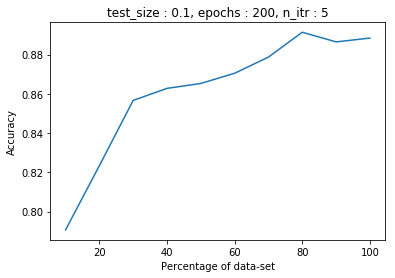

../dataset/bigdata1/result_dnn/graphs_dnn/test_size : 0.2epochs : 200n_itr : 5.png


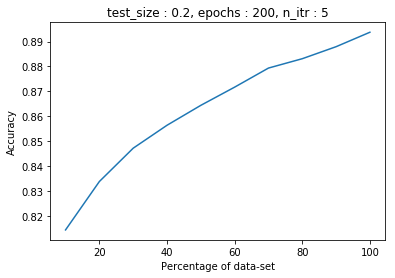

../dataset/bigdata1/result_dnn/graphs_dnn/test_size : 0.3epochs : 200n_itr : 5.png


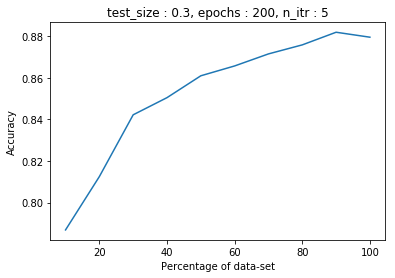

In [31]:
import matplotlib.pyplot as plt
x_axis = [10*i for i in range(1,11)]
title = []
for v in valuesOfTestSize:
    for e in valuesOfEpochs:
        title.append(["test_size : "+str(v),"epochs : " + str(e), "n_itr : " + str(n_itr)])
for i in range(0,len(overAllY)):
    y_axis = overAllY[i]
    plt.plot(x_axis,y_axis)
    plt.xlabel('Percentage of data-set')
    plt.ylabel('Accuracy')
    plt.title(title[i][0]+", "+title[i][1] + ", " + title[i][2])
    filename = "../dataset/bigdata1/result_dnn/graphs_dnn/"+str(title[i][0])+str(title[i][1])+str(title[i][2])+".png"
    print(filename)
    plt.savefig(filename)
    plt.show()

In [32]:
with open("../dataset/bigdata1/result_dnn/dnn_result_5iterations.txt","a+") as f:
    for i in range(0,len(overAllY)):
        line = str(title[i][0])+", "+ str(title[i][1])+", "+str(title[i][2])
        f.write(line+"\r\n")
        f.write(str(overAllY[i])+"\r\n")